In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
def getxy(xy):
    real, user, energy, threads = zip(*xy)
    real = list(map(lambda x: x / 1e9, real))
    user = list(map(lambda x: x / 1e9, user))
    energy = list(map(lambda y: y / 1e6, energy))
    energy_user = [(e if u >= r else e * (u / r)) for e, u, r in zip(energy, user, real)]
    w = [e / s for e, s in zip(energy, real)]
    print('Energy:', sum(energy), 'Real time:', sum(real), 'User time:', sum(user))
    return (real, user, energy, energy_user, w, threads)

In [30]:
def accx(x, offset=0):
    x2 = [x[0] + offset]
    for i, x in enumerate(x[1:]):
        x2.append(x2[i] + x)
    return x2

# Cluster - Dynamic Adaptation

- Every 30 iterations
- Frequency distribution
- Only including energy for user time / real time
- Penalizing for wasted time (real time > user time)
- So single-threaded performance estimation, instead we simply keep track of the best result

Energy: 7891.711733 Real time: 201.734931218 User time: 195.440066883
Energy: 4460.638363 Real time: 116.469698044 User time: 110.039018694


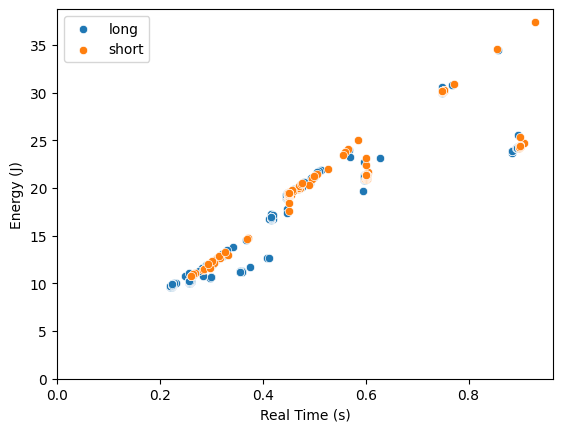

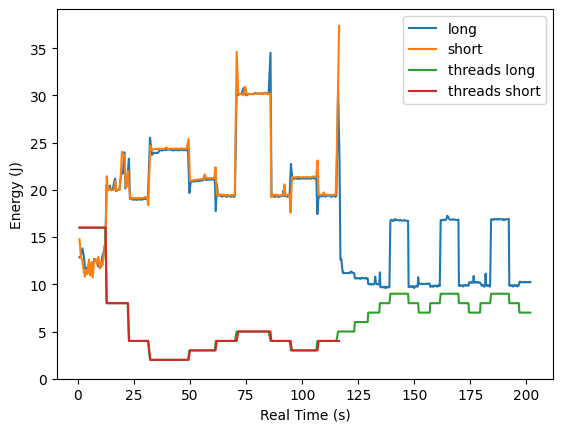

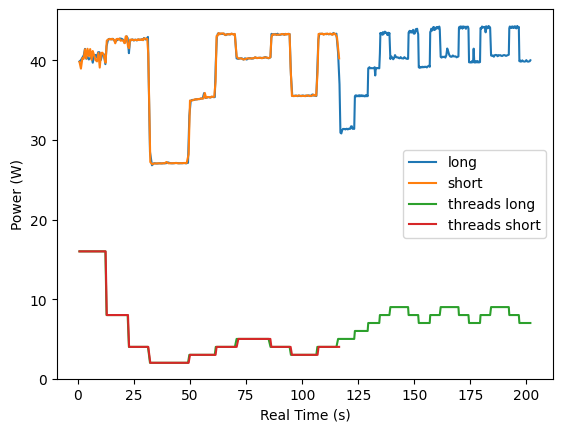

In [31]:
#real, user, energy, energy_user, est, t = getxy([(648010524, 329247924, 25987116, 25987116, 16), (555983658, 278648255, 22833132, 22833131, 16), (579958653, 287271163, 23096865, 23096865, 16), (567991586, 278236527, 22932375, 22932375, 16), (572036060, 284422510, 23480348, 23480348, 16), (563952272, 282726349, 22950686, 22950686, 16), (600019596, 297203612, 24477050, 24477050, 16), (747990949, 353734631, 29990584, 29990584, 16), (664006440, 309977221, 26809563, 26809563, 16), (643989044, 309866093, 25916438, 25916438, 16), (615990182, 309497553, 24874875, 24874875, 16), (616001033, 302828476, 25080136, 25080136, 16), (645657300, 309064415, 26035273, 26035273, 16), (654285936, 314463905, 25654780, 25654780, 16), (647990271, 321980677, 25707148, 25707148, 16), (612030025, 306025748, 24831662, 24831662, 16), (607993105, 327960534, 24516844, 24516844, 16), (635960772, 345726521, 24986630, 24986630, 16), (600037919, 309487595, 24300353, 24300353, 16), (635948106, 323209752, 25105344, 25105344, 16), (643994204, 334802815, 25267635, 25267635, 16), (659998874, 336518928, 25898433, 25898433, 16), (636019403, 326473895, 25581356, 25581356, 16), (683965773, 341221126, 26987113, 26987113, 16), (679992670, 353735933, 26574395, 26574394, 16), (636017269, 335981514, 25714778, 25714777, 16), (630429814, 321626881, 25511531, 25511531, 16), (629558932, 335586224, 25281918, 25281918, 16), (656009650, 329065699, 26547295, 26547295, 16), (561582249, 283080801, 22948306, 22948306, 16), (630341541, 328773457, 24805295, 24805295, 16), (622163533, 309487836, 25304440, 25304439, 16), (649820417, 335514026, 25601252, 25601251, 16), (743991661, 394656520, 29023668, 29023668, 16), (739992120, 416650914, 28832690, 28832690, 16), (715995263, 406096765, 27905202, 27905202, 16), (736023291, 411264196, 29263902, 29263901, 16), (607985588, 314990467, 24613890, 24613890, 16), (619987936, 315598021, 25254940, 25254940, 16), (624017395, 315181238, 25643428, 25643428, 16), (651945912, 310227455, 26226373, 26226373, 16), (603990346, 293637478, 24223388, 24223388, 16), (563991702, 275233408, 22515018, 22515018, 16), (553927521, 262965505, 22871524, 22871524, 16), (610096169, 298078856, 24707700, 24707700, 16), (623961539, 298457775, 24872434, 24872434, 16), (560027236, 269453761, 23325013, 23325013, 16), (621941511, 290859217, 25453915, 25453915, 16), (574050769, 275841690, 23734436, 23734436, 16), (563953580, 266242929, 22641849, 22641849, 16), (592049784, 280199790, 24278441, 24278441, 16), (582354464, 276388201, 23637208, 23637208, 16), (617579349, 301755017, 24653867, 24653867, 16), (648038042, 328865236, 26236871, 26236871, 16), (563941778, 287985689, 22535526, 22535526, 16), (559992517, 287747442, 22569888, 22569888, 16), (543999494, 274752905, 21508185, 21508185, 16), (636026330, 323321718, 26102655, 26102655, 16), (572001214, 292081832, 23823365, 23823365, 16), (599949699, 350620010, 24259642, 24259641, 16), (576009186, 383230300, 23065615, 23065615, 16), (507981752, 350977410, 20271615, 20271615, 16), (495974508, 323707115, 19662120, 19662120, 16), (480023344, 325498903, 19442882, 19442882, 16), (499991021, 339236600, 20109385, 20109385, 16), (511961924, 350971893, 20088572, 20088571, 16), (508004471, 345025983, 20213083, 20213083, 16), (478135744, 333374096, 19434582, 19434582, 16), (489868825, 343783070, 19708140, 19708140, 16), (495967273, 333843555, 19768199, 19768199, 16), (596018300, 404355188, 23219423, 23219423, 16), (552012954, 383745136, 22191228, 22191228, 16), (519985880, 358985508, 20711067, 20711067, 16), (545960140, 366035185, 22131658, 22131658, 16), (561990476, 378122246, 21440924, 21440924, 16), (541637663, 356590053, 22098638, 22098638, 16), (570370658, 359379641, 22160893, 22160893, 16), (476000414, 311000299, 19737315, 19737315, 16), (495998414, 322998587, 19705821, 19705821, 16), (470620922, 322378742, 19434459, 19434459, 16), (476651447, 336388944, 19149671, 19149671, 16), (470166689, 325978599, 19254528, 19254528, 16), (482551850, 345654378, 19469005, 19469005, 16), (598176701, 409117168, 23932373, 23932373, 16), (485800706, 321347466, 19301892, 19301892, 16), (499848584, 338831202, 20426461, 20426461, 16), (548144330, 382113698, 21700933, 21700932, 16), (487975002, 342733612, 19972727, 19972727, 16), (506168484, 353380878, 20239817, 20239816, 16), (569834785, 385105737, 23016726, 23016726, 16), (489776183, 327824831, 19454234, 19454234, 16), (510141110, 357837375, 20270456, 20270456, 16), (499992688, 345730713, 19650096, 19650096, 16), (504030075, 338135062, 20775032, 20775032, 16), (507988606, 342473661, 20393564, 20393564, 16), (604002434, 416361777, 24227965, 24227965, 16), (495982564, 334735074, 19962961, 19962961, 16), (491966389, 346271729, 19625744, 19625744, 16), (476027524, 319977214, 19324901, 19324901, 16), (531960450, 357252119, 21130622, 21130622, 16), (631992631, 411889465, 24645628, 24645628, 16), (555987462, 376564306, 21650946, 21650946, 16), (494088828, 338249912, 19932200, 19932199, 16), (633902240, 425209704, 24687315, 24687315, 16), (489402795, 318844123, 20130625, 20130624, 16), (518581675, 327260687, 20879463, 20879463, 16), (516045540, 334765792, 21114753, 21114753, 16), (571935234, 364855971, 22566532, 22566531, 16), (512021933, 322152069, 21294013, 21294013, 16), (511990246, 318133202, 20368539, 20368539, 16), (479980422, 317227012, 20048167, 20048166, 16), (520008002, 345261830, 20603218, 20603218, 16), (494259584, 318869633, 20629159, 20629159, 16), (545714645, 347129131, 21680242, 21680242, 16), (603997677, 394687303, 24447142, 24447142, 16), (563958690, 381371970, 21638128, 21638128, 16), (547993758, 356403368, 22141545, 22141545, 16), (583995572, 355152821, 22960696, 22960696, 16), (576024947, 334440292, 23397523, 23397523, 16), (647962525, 388885527, 25981623, 25981623, 16), (576000170, 364567671, 23810791, 23810791, 14), (614463409, 389018534, 25159115, 25159115, 14), (662831509, 440974190, 26573297, 26573297, 14), (602677769, 399607251, 24237120, 24237120, 14), (708009403, 486241582, 28075917, 28075917, 14), (587958264, 387970849, 24104553, 24104553, 14), (530286441, 357274157, 22129277, 22129277, 14), (548445585, 389544370, 22090458, 22090458, 14), (553291346, 376939980, 22506168, 22506168, 14), (578520972, 371317781, 23970215, 23970215, 14), (697413606, 464365663, 27598135, 27598135, 14), (715995489, 453954871, 27996876, 27996876, 14), (540026993, 347413193, 22290104, 22290104, 14), (583991729, 373985161, 23766479, 23766479, 14), (615852241, 397371005, 25118405, 25118405, 14), (584141982, 387985369, 24129516, 24129516, 14), (703956166, 472522958, 27912771, 27912770, 14), (695993071, 481493185, 27296377, 27296377, 14), (695998190, 455624658, 27372855, 27372854, 14), (695987658, 446995946, 27376334, 27376334, 14), (699989577, 432229845, 27933400, 27933400, 14), (570996927, 349464655, 23297731, 23297731, 14), (543705140, 314000905, 22831972, 22831972, 14), (563836722, 338584531, 23384035, 23384034, 14), (543461700, 339309337, 22326969, 22326969, 14), (591813023, 368821638, 24474791, 24474791, 14), (606148390, 376704798, 24209716, 24209716, 14), (544247634, 330970620, 22598331, 22598331, 14), (579778652, 339954976, 24082335, 24082335, 14), (667989227, 406550532, 27241569, 27241568, 14), (663960834, 385147499, 27037833, 27037832, 15), (691969373, 381877955, 27755606, 27755606, 15), (648002893, 349582797, 26079828, 26079828, 15), (603998441, 317848391, 24523131, 24523130, 15), (575994281, 293581264, 24254698, 24254698, 15), (543990362, 274659356, 22792422, 22792422, 15), (523993376, 272402314, 22082708, 22082707, 15), (531997054, 280214569, 22498660, 22498659, 15), (615971057, 323725596, 24943113, 24943113, 15), (660011333, 351996548, 27098929, 27098929, 15), (532024325, 295280888, 22329350, 22329350, 15), (520473921, 278960865, 22114751, 22114751, 15), (543458008, 287922232, 22379825, 22379825, 15), (600032532, 308652611, 24960630, 24960630, 15), (532397668, 276544389, 22499027, 22499027, 15), (646149858, 337015825, 26715019, 26715019, 15), (507166639, 279378178, 21382758, 21382757, 15), (598217204, 329042473, 24430357, 24430357, 15), (559994464, 305143817, 22938601, 22938601, 15), (548634861, 288876918, 23021792, 23021792, 15), (531389931, 290085860, 22498478, 22498478, 15), (535982969, 281235862, 22719851, 22719850, 15), (608482194, 325344615, 25218197, 25218197, 15), (643480346, 330557366, 25944026, 25944026, 15), (671996245, 340865491, 27304008, 27304008, 15), (524447396, 281624903, 22055729, 22055729, 15), (567538770, 312207431, 23347536, 23347536, 15), (648011612, 361057796, 26539604, 26539604, 15), (660002043, 381328823, 27016960, 27016960, 15), (540003749, 287400410, 22815432, 22815432, 15), (563956024, 286501488, 23687074, 23687074, 16), (635990801, 340994316, 26098016, 26098016, 16), (607999824, 330197994, 25002622, 25002621, 16), (603957919, 311104773, 24335387, 24335387, 16), (624030266, 321032194, 25864314, 25864314, 16), (619989941, 324245845, 25719783, 25719782, 16), (608015629, 318712862, 25300472, 25300472, 16), (619964790, 325180414, 25256954, 25256954, 16), (632010149, 332018611, 26006586, 26006586, 16), (591989919, 297251169, 25014463, 25014463, 16), (635988549, 335449665, 26200616, 26200616, 16), (631955181, 351240234, 25401485, 25401484, 16), (536035025, 295235059, 22586978, 22586978, 16), (615986411, 321712988, 25541744, 25541744, 16), (608000721, 319103997, 25269039, 25269039, 16), (591988798, 312122899, 24687193, 24687193, 16), (635956812, 320129829, 25717403, 25717403, 16), (600028973, 301615760, 24947751, 24947751, 16), (599957222, 317488378, 24241576, 24241576, 16), (656027710, 341771000, 27238333, 27238332, 16), (623997890, 317732990, 25949153, 25949153, 16), (550327213, 276395400, 23101808, 23101808, 16), (643550685, 321558777, 26549676, 26549676, 16), (598076583, 302121379, 24811521, 24811521, 16), (596006492, 307941091, 24678892, 24678891, 16), (608017918, 320399282, 25497066, 25497065, 16), (563967755, 300982285, 23538819, 23538819, 16), (544009188, 289444206, 22786807, 22786807, 16), (543951440, 288992685, 22507450, 22507450, 16), (580024050, 296126476, 24119078, 24119078, 16), (651969032, 333037071, 26970513, 26970513, 15), (603992700, 307677383, 25301082, 25301082, 15), (579970217, 286501578, 23785035, 23785035, 15), (547994973, 276304349, 22818484, 22818484, 15), (603992756, 311161789, 24690794, 24690794, 15), (611992821, 314492213, 24795224, 24795223, 15), (563994506, 286256487, 23378663, 23378663, 15), (679997448, 351348519, 27295585, 27295584, 15), (572018577, 301596845, 23869507, 23869506, 15), (631993636, 337756395, 26286737, 26286736, 15), (660032717, 342785744, 27093742, 27093742, 15), (615939806, 331058441, 25552669, 25552669, 15), (688018536, 377814391, 28199207, 28199207, 15), (547994720, 295366428, 23186220, 23186220, 15), (635996677, 339419405, 26386407, 26386406, 15), (511994174, 274156833, 21677801, 21677801, 15), (536996017, 289244860, 22764651, 22764651, 15), (521093512, 275180515, 22169804, 22169803, 15), (629852072, 334516321, 25772884, 25772884, 15), (679992651, 347081094, 27344778, 27344778, 15), (544024718, 293055605, 22790652, 22790652, 15), (544901523, 292051834, 22811099, 22811099, 15), (523049447, 277862939, 21672796, 21672795, 15), (652034636, 345840239, 27293448, 27293448, 15), (687956615, 379171354, 28266468, 28266467, 15), (780758556, 440660301, 31334087, 31334087, 15), (779257139, 448856161, 31437176, 31437176, 15), (725330821, 412061745, 29085375, 29085375, 15), (253145318, 252071458, 10880953, 10880952, 15), (252674757, 251479912, 10942660, 10942659, 15), (271876369, 272192655, 11591096, 11591096, 14), (271525439, 271942945, 11548798, 11548798, 14), (271339777, 271946340, 11546358, 11546358, 14), (272329933, 271971084, 11622712, 11622712, 14), (271845681, 271975510, 11556916, 11556916, 14), (271626205, 271963200, 11556245, 11556245, 14), (271506778, 271959947, 11594575, 11594575, 14), (270994056, 271893936, 11546967, 11546967, 14), (271245626, 268229174, 11547273, 11547272, 14), (271668392, 271972830, 11587800, 11587800, 14), (271065211, 271879743, 11534455, 11534455, 14), (271288443, 271936522, 11580781, 11580781, 14), (310424807, 309115575, 12922758, 12922758, 14), (271191492, 268225641, 11586518, 11586518, 14), (271192485, 271915946, 11552949, 11552949, 14), (271871298, 271990839, 11605134, 11605134, 14), (271355524, 271944455, 11555512, 11555512, 14), (271571669, 271943198, 11583161, 11583161, 14), (271349427, 271946895, 11550447, 11550447, 14), (271328347, 268227805, 11574311, 11574311, 14), (271696683, 271969821, 11581330, 11581330, 14), (271445096, 271924809, 11589509, 11589509, 14), (270634099, 271901082, 11523713, 11523713, 14), (270956035, 271916967, 11568879, 11568879, 14), (270853984, 268197288, 11559480, 11559480, 14), (271035535, 271906354, 11550324, 11550324, 14), (271221822, 271932301, 11560213, 11560213, 14), (271353598, 271951443, 11590790, 11590790, 14), (271233439, 271942346, 11563996, 11563996, 14), (271113594, 268216120, 11570222, 11570222, 14), (290251645, 292135374, 11903900, 11903900, 13), (290868084, 291903788, 12285797, 12285797, 13), (289907613, 288110222, 12244109, 12244109, 13), (290374761, 291857833, 12242705, 12242705, 13), (290786114, 288209164, 12283233, 12283233, 13), (290509648, 291868716, 12303680, 12303680, 13), (290368237, 291872720, 12247161, 12247161, 13), (291212031, 288237010, 12285246, 12285246, 13), (290851160, 291908435, 12302154, 12302154, 13), (290562737, 291839565, 12277862, 12277862, 13), (290335843, 288178012, 12250212, 12250212, 13), (291913233, 291985200, 12319427, 12319427, 13), (290480909, 291846838, 12255889, 12255889, 13), (291675414, 291947413, 12302764, 12302764, 13), (293784840, 292081811, 12399748, 12399748, 13), (307660224, 307670111, 12865690, 12865690, 13), (291984050, 291998327, 12318999, 12318999, 13), (290791571, 291907133, 12270233, 12270233, 13), (291326936, 291945048, 12346648, 12346648, 13), (290789418, 291904654, 12246917, 12246917, 13), (291925550, 288300525, 12313445, 12313445, 13), (290676487, 291895397, 12291167, 12291167, 13), (291202546, 291886843, 12285613, 12285613, 13), (290911547, 291914379, 12287444, 12287444, 13), (290767054, 288204278, 12294219, 12294219, 13), (290376020, 291909472, 12256316, 12256316, 13), (292020591, 291955057, 12337981, 12337980, 13), (291109076, 291927650, 12293426, 12293426, 13), (290107189, 288161368, 12291228, 12291228, 13), (291080171, 291920571, 12294952, 12294952, 13), (271131751, 271752623, 11556428, 11556428, 14), (270688775, 271905695, 11547150, 11547150, 14), (270674882, 268190830, 11561189, 11561188, 14), (270904383, 271886812, 11561555, 11561555, 14), (271295633, 271948350, 11581147, 11581147, 14), (270709284, 268192607, 11574128, 11574127, 14), (271369772, 271950993, 11607575, 11607575, 14), (270823166, 271916033, 11532380, 11532380, 14), (271270574, 271945778, 11605440, 11605440, 14), (270410140, 268171298, 11538605, 11538605, 14), (270627501, 271888012, 11568086, 11568086, 14), (271145642, 271933176, 11599641, 11599641, 14), (270720123, 271901173, 11521393, 11521393, 14), (270848473, 268202887, 11564668, 11564668, 14), (271495509, 271890258, 11588593, 11588593, 14), (270538504, 271894898, 11520296, 11520296, 14), (271177147, 271941141, 11632660, 11632660, 14), (271159671, 268219585, 11589753, 11589753, 14), (270911459, 271920589, 11578035, 11578035, 14), (270872982, 271899039, 11539338, 11539338, 14), (270739275, 268193877, 11566621, 11566621, 14), (271151389, 271934985, 11587494, 11587494, 14), (270619550, 271898507, 11585542, 11585542, 14), (270888619, 271920634, 11575288, 11575288, 14), (270796691, 268199706, 11581940, 11581940, 14), (270604912, 271866804, 11531831, 11531831, 14), (270634844, 271896349, 11569184, 11569184, 14), (271908127, 271993206, 11622712, 11622712, 14), (271530700, 271953220, 11578157, 11578157, 14), (270810907, 268198251, 11551545, 11551545, 14), (253616854, 255647744, 10965975, 10965975, 15), (254257258, 252135545, 10952853, 10952853, 15), (254169554, 255873887, 10963107, 10963107, 15), (253861945, 252121840, 10964571, 10964571, 15), (253969908, 255861540, 10957064, 10957064, 15), (253550371, 252102412, 10949741, 10949741, 15), (253499352, 252092084, 10939303, 10939303, 15), (253752819, 255843242, 10933382, 10933382, 15), (253851205, 252113058, 10945468, 10945468, 15), (252575309, 252037643, 10871981, 10871981, 15), (253509570, 252097256, 10962313, 10962313, 15), (252882008, 252043559, 10924106, 10924106, 15), (252663167, 252043486, 10915865, 10915865, 15), (253108448, 255798476, 10905368, 10905368, 15), (253478617, 252091223, 10899630, 10899629, 15), (252545558, 252032630, 10905490, 10905490, 15), (253959427, 255851811, 10890231, 10890231, 15), (255964038, 255734412, 11056185, 11056185, 15), (253978677, 252124796, 10954257, 10954257, 15), (258290962, 258897536, 11229707, 11229707, 15), (252694801, 252036165, 10947360, 10947360, 15), (252643421, 252029137, 10918307, 10918307, 15), (253817038, 252066380, 11029269, 11029269, 15), (253962762, 255860474, 11014864, 11014864, 15), (252512853, 252030652, 10962191, 10962190, 15), (252961383, 252064060, 10966341, 10966340, 15), (254292828, 255874556, 11028476, 11028476, 15), (253375945, 252061072, 10976534, 10976534, 15), (252672452, 252043307, 10969637, 10969637, 15), (252366062, 252022730, 10942599, 10942599, 15), (237847084, 239085705, 10414952, 10414952, 16), (234443034, 235898460, 10235325, 10235325, 16), (235173556, 232181780, 10353916, 10353915, 16), (236077211, 236003788, 10342076, 10342076, 16), (234754465, 235917653, 10307408, 10307408, 16), (261713891, 255149967, 11330049, 11330048, 16), (332026475, 318924559, 14038172, 14038172, 16), (396157365, 377467348, 16329365, 16329365, 16), (241557524, 237826624, 10656894, 10656894, 16), (241477044, 238188995, 10595920, 10595920, 16), (241127408, 242015752, 10562718, 10562718, 16), (244061470, 241500061, 10708712, 10708711, 16), (277074241, 269997324, 11974518, 11974518, 16), (238757066, 238227980, 10483738, 10483738, 16), (238739085, 234315936, 10541233, 10541233, 16), (246319661, 242778400, 10826083, 10826083, 16), (260392594, 256034563, 11359407, 11359407, 16), (306391116, 295398213, 12619596, 12619596, 16), (301621941, 283603084, 13050504, 13050504, 16), (338052251, 319438087, 14295922, 14295922, 16), (356295051, 332684956, 14702050, 14702050, 16), (287987591, 270499065, 12161285, 12161285, 16), (291055969, 270594053, 12670805, 12670804, 16), (340920836, 323370466, 13960596, 13960596, 16), (379989358, 357567691, 15458883, 15458883, 16), (310067227, 297750216, 12790312, 12790312, 16), (333919769, 314802953, 14030482, 14030482, 16), (368020428, 350349239, 15345481, 15345481, 16), (284403868, 278514460, 12243682, 12243682, 16), (235160548, 232190455, 10360020, 10360020, 16), (234830682, 235906920, 10364231, 10364231, 16), (234265696, 235885902, 10301121, 10301121, 16), (235104587, 232149196, 10351353, 10351353, 16), (235490769, 235943093, 10388829, 10388829, 16), (235373857, 235947037, 10350498, 10350498, 16), (234631804, 235909821, 10361302, 10361302, 16), (234989926, 235925164, 10372776, 10372776, 16), (235007243, 232172832, 10368809, 10368809, 16), (234255287, 235870537, 10343906, 10343906, 16), (235026889, 235928224, 10365330, 10365330, 16), (234214757, 232123394, 10324986, 10324986, 16), (234434531, 235892370, 10375156, 10375156, 16), (234308221, 232125036, 10320287, 10320287, 16), (235841241, 236036227, 10416416, 10416416, 16), (234609778, 235836620, 10322239, 10322239, 16), (235014810, 235884844, 10410801, 10410801, 16), (234527647, 232109928, 10305760, 10305760, 16), (234649937, 235894200, 10378635, 10378635, 16), (234217897, 235876248, 10336888, 10336888, 16), (234718940, 232152637, 10376072, 10376072, 16), (234878070, 235921118, 10362583, 10362583, 16), (235182218, 235946776, 10368687, 10368687, 16), (234413936, 232147491, 10343785, 10343785, 16), (234618076, 235900793, 10379307, 10379307, 16), (234672423, 235910970, 10346287, 10346287, 16), (234818745, 232144975, 10384739, 10384739, 16), (235049817, 235930008, 10374424, 10374424, 16), (234618807, 235907799, 10381260, 10381260, 16), (234571783, 235877823, 10363010, 10363010, 16), (234548456, 232150736, 10343724, 10343724, 16), (253146584, 252242824, 11024386, 11024385, 15), (253056560, 255793117, 11037508, 11037508, 15), (253096065, 252066829, 11032137, 11032137, 15), (252649151, 252037402, 11037936, 11037936, 15), (254628709, 255725299, 11150179, 11150179, 15), (253042101, 251880226, 11247896, 11247896, 15), (254035037, 255549656, 11332429, 11332429, 15), (252506041, 252031101, 11267855, 11267855, 15), (252729249, 251998511, 11219270, 11219270, 15), (252508756, 252040248, 11234469, 11234469, 15), (254024527, 255728697, 11338533, 11338533, 15), (253944401, 252087213, 11369172, 11369172, 15), (252756229, 252035527, 11317781, 11317781, 15), (253259656, 255807723, 11385164, 11385164, 15), (252766800, 252046033, 11306917, 11306916, 15), (252864729, 252023309, 11211092, 11211092, 15), (252783649, 252028649, 11220857, 11220857, 15), (253089175, 252062547, 11253695, 11253694, 15), (252647322, 255736102, 11234895, 11234895, 15), (252614345, 251989699, 11188082, 11188082, 15), (252673204, 251945415, 11256197, 11256197, 15), (252677455, 251959526, 11242464, 11242464, 15), (252897736, 251961746, 11240938, 11240938, 15), (254414398, 255887599, 11293977, 11293977, 15), (255214757, 255926464, 11333589, 11333589, 15), (254996203, 252149512, 11329927, 11329927, 15), (255320582, 255912860, 11375704, 11375704, 15), (254669502, 255846114, 11303071, 11303071, 15), (255467880, 255937827, 11392000, 11392000, 15), (256221181, 256001001, 11377595, 11377595, 15), (376079271, 352365925, 15719320, 15719320, 16), (369805726, 345085882, 15465476, 15465476, 16), (334560079, 314987921, 14236170, 14236170, 16), (409909161, 385947778, 16770220, 16770220, 16), (343518916, 318954106, 14567406, 14567406, 16), (345095371, 326055495, 14578271, 14578271, 16), (349031018, 326308484, 14750695, 14750695, 16), (315519927, 296201965, 13517848, 13517848, 16), (439834417, 412457785, 18044693, 18044693, 16), (391560446, 367169987, 16246235, 16246235, 16), (371413593, 348285350, 15559531, 15559531, 16), (331957033, 304812299, 13688746, 13688746, 16), (269970513, 259906541, 11722138, 11722138, 16), (242015176, 241419889, 10642001, 10642001, 16), (242640810, 237714763, 10680698, 10680697, 16), (262701870, 257624846, 11481294, 11481294, 16), (237509036, 235904691, 10465916, 10465915, 16), (240361376, 238869912, 10607516, 10607516, 16), (240355562, 237579524, 10574924, 10574924, 16), (242987408, 240882230, 10720310, 10720310, 16), (361414401, 346891174, 15101341, 15101341, 16), (294920690, 279890577, 12688688, 12688688, 16), (294540437, 285990276, 12655241, 12655240, 16), (306710142, 295644837, 13169217, 13169217, 16), (489468153, 464338947, 19895945, 19895945, 16), (282051257, 271337856, 12219390, 12219390, 16), (241837880, 243244249, 10641025, 10641025, 16), (234535232, 235865349, 10389866, 10389866, 16), (234678605, 232130786, 10343113, 10343112, 16), (235066564, 235931819, 10380039, 10380039, 16), (234422023, 235887898, 10379429, 10379429, 16), (234970623, 232074662, 10376134, 10376134, 16), (234386955, 235835126, 10343784, 10343784, 16), (235495534, 235846478, 10418247, 10418247, 16), (234670401, 232151185, 10352086, 10352086, 16), (235502484, 235959309, 10431247, 10431247, 16), (234363158, 235875566, 10350804, 10350804, 16), (234750794, 235904649, 10382359, 10382359, 16), (235022907, 232153267, 10381687, 10381687, 16), (234293986, 235881436, 10337864, 10337864, 16), (235185662, 235931557, 10417637, 10417637, 16), (235303786, 235827544, 10382420, 10382420, 16), (234769223, 232151295, 10388035, 10388035, 16), (234827367, 235921623, 10339878, 10339878, 16), (234476783, 235899716, 10379856, 10379856, 16), (234707759, 232113937, 10377842, 10377842, 16), (235434353, 235959025, 10377476, 10377476, 16), (234142637, 235864756, 10340123, 10340123, 16), (235057775, 232179010, 10390659, 10390658, 16), (235042190, 235907381, 10384739, 10384739, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(639979238, 312456495, 25233090, 25233090, 16), (580203489, 287779639, 23745728, 23745727, 16), (519802773, 260615330, 21360785, 21360785, 16), (528002729, 269744693, 21869939, 21869938, 16), (567955909, 284980949, 23141481, 23141481, 16), (492022650, 248996883, 20563729, 20563728, 16), (583959972, 295751674, 23260255, 23260255, 16), (608023162, 315988162, 24526366, 24526366, 16), (623986355, 329712930, 24760984, 24760984, 16), (631969406, 332795465, 24901852, 24901852, 16), (636022579, 323182344, 25708857, 25708857, 16), (587962352, 293384671, 23508180, 23508179, 16), (611994233, 311724475, 24443175, 24443175, 16), (675991750, 355914034, 26428705, 26428704, 16), (601794515, 311645084, 24199645, 24199645, 16), (614191693, 304102311, 24454649, 24454649, 16), (656021716, 319739195, 26629082, 26629082, 16), (663997064, 301490111, 26916862, 26916861, 16), (651991945, 308223577, 26160334, 26160334, 16), (631964371, 311157055, 25051999, 25051998, 16), (675998924, 326035465, 26616021, 26616021, 16), (670176463, 323616203, 26851372, 26851372, 16), (649844579, 319649625, 26203241, 26203240, 16), (639990383, 315748105, 25766047, 25766047, 16), (691958223, 343954934, 27057731, 27057731, 16), (620029950, 287997052, 24967649, 24967649, 16), (635989373, 307465583, 25594356, 25594356, 16), (643961055, 310233552, 25358883, 25358883, 16), (644030853, 307079392, 25990412, 25990412, 16), (571989833, 291743854, 23099489, 23099489, 16), (654999137, 313042573, 26362115, 26362115, 16), (608026536, 302241136, 24532225, 24532224, 16), (643964701, 315941809, 25816279, 25816279, 16), (734982339, 342388198, 29450242, 29450242, 16), (733043594, 329311557, 29049913, 29049913, 16), (713528553, 305586211, 28303089, 28303089, 16), (722416722, 318718218, 28347401, 28347401, 16), (681735512, 316306107, 27322623, 27322622, 16), (618273118, 300518023, 25143673, 25143673, 16), (544002356, 267278882, 22312931, 22312931, 16), (575982887, 293238292, 23425050, 23425049, 16), (539972536, 282832578, 21445746, 21445746, 16), (616027011, 315698024, 25124874, 25124874, 16), (571958730, 295371548, 22994021, 22994021, 16), (632033120, 327736270, 25939936, 25939936, 16), (623995642, 325241656, 25346859, 25346859, 16), (544000133, 280248940, 22331852, 22331852, 16), (559986639, 292730390, 23143679, 23143679, 16), (567987116, 299981747, 23238038, 23238038, 16), (579957570, 304514132, 23369081, 23369081, 16), (608024324, 320467931, 24971677, 24971677, 16), (651968410, 342984900, 26136164, 26136164, 16), (668016644, 349009884, 27354972, 27354971, 16), (647967293, 321598794, 25837885, 25837885, 16), (663997171, 325725945, 26612603, 26612603, 16), (559985651, 275238693, 22588749, 22588749, 16), (576031761, 281487409, 23886841, 23886840, 16), (575960518, 283969668, 23683289, 23683288, 16), (552017679, 272602121, 22791689, 22791689, 16), (563966662, 274210268, 23263979, 23263979, 16), (1059991216, 677421986, 42443373, 42443372, 8), (943993305, 630483911, 37946314, 37946313, 8), (951988323, 610985811, 38399743, 38399743, 8), (968004847, 609891845, 38937461, 38937461, 8), (951960073, 574507582, 37888087, 37888087, 8), (1120015750, 715945537, 44627266, 44627265, 8), (1027999254, 637593391, 41077592, 41077592, 8), (1047961788, 694373671, 41219621, 41219621, 8), (1100651907, 784025262, 43836436, 43836436, 8), (971365089, 674890810, 39403464, 39403464, 8), (987995311, 598713231, 40185383, 40185383, 8), (971957820, 575771360, 39065085, 39065085, 8), (1051996151, 685464777, 41266862, 41266862, 8), (1039992765, 637971128, 41274552, 41274552, 8), (972653365, 579466800, 39334494, 39334494, 8), (1047363811, 686909539, 42019058, 42019058, 8), (956004156, 582996495, 38917442, 38917441, 8), (983948328, 640481917, 39410543, 39410542, 8), (1028026820, 653963596, 41324235, 41324235, 8), (955963031, 597857517, 38657616, 38657616, 8), (1065225329, 697033765, 43141674, 43141674, 8), (1112107742, 711019755, 44428841, 44428841, 8), (1054640055, 693528697, 41566727, 41566727, 8), (987994730, 657621726, 40082478, 40082478, 8), (983989295, 662302182, 39475790, 39475790, 8), (946319116, 692703423, 38526269, 38526269, 8), (1017315319, 686591664, 41313737, 41313737, 8), (925874775, 662097794, 37867274, 37867274, 8), (1136799392, 774535364, 45422247, 45422246, 8), (953645518, 659208103, 38167321, 38167321, 8), (743937924, 420954508, 29804062, 29804062, 12), (739996488, 397995232, 29525315, 29525315, 12), (712007324, 423648494, 29148973, 29148973, 12), (795973251, 461633382, 32066569, 32066568, 12), (831993540, 457385831, 33290625, 33290625, 12), (828025875, 454251077, 32890602, 32890602, 12), (701653320, 387123395, 28757007, 28757007, 12), (782297705, 413494060, 31819926, 31819926, 12), (824023668, 440176527, 33203650, 33203650, 12), (717823781, 410766016, 29687424, 29687423, 12), (854128758, 491488499, 33965307, 33965307, 12), (672025942, 392306747, 27189261, 27189260, 12), (727990680, 429991594, 29842575, 29842575, 12), (683993616, 397277244, 27802908, 27802908, 12), (691986465, 385992295, 28421436, 28421436, 12), (813635217, 449514301, 32789711, 32789711, 12), (862330117, 449859653, 34061192, 34061191, 12), (828041164, 484570162, 33174048, 33174048, 12), (787945955, 472959738, 30816206, 30816205, 12), (699988594, 434172156, 27818227, 27818227, 12), (683993609, 449060796, 27779836, 27779835, 12), (695992482, 429792345, 28418446, 28418446, 12), (636030636, 383663825, 26563775, 26563775, 12), (723956939, 446809232, 29134874, 29134874, 12), (644025827, 398693964, 26501702, 26501702, 12), (668010488, 433251846, 27613943, 27613943, 12), (743979322, 461869315, 30264877, 30264877, 12), (815988685, 496266921, 33129187, 33129186, 12), (803991521, 536237588, 32475991, 32475990, 12), (731963288, 487600592, 29280992, 29280992, 12), (552005100, 320561375, 23168337, 23168337, 14), (563985561, 346842451, 23554749, 23554749, 14), (567999674, 331516308, 23924561, 23924561, 14), (544124472, 315718545, 23055910, 23055910, 14), (635856099, 367923551, 26239374, 26239374, 14), (631982619, 362512462, 26024469, 26024468, 14), (604011096, 329013313, 25148862, 25148862, 14), (559980020, 319977211, 23683655, 23683655, 14), (591992181, 343178537, 24861508, 24861508, 14), (607971317, 356673253, 25145322, 25145322, 14), (591523270, 347927937, 24932309, 24932309, 14), (624499191, 357023754, 25807978, 25807978, 14), (607979619, 338851810, 25744685, 25744684, 14), (607990904, 335592270, 25304074, 25304074, 14), (607989673, 352960304, 25412959, 25412959, 14), (571960320, 319088107, 23622010, 23622010, 14), (560040132, 320096290, 23755067, 23755067, 14), (635103015, 361486449, 26572014, 26572014, 14), (684863652, 405964966, 28076649, 28076649, 14), (683997578, 414464231, 27915884, 27915884, 14), (591993262, 333906066, 24714048, 24714048, 14), (555992208, 311986570, 23428712, 23428712, 14), (675963186, 365415237, 27058585, 27058585, 14), (704019647, 371421339, 28755176, 28755175, 14), (547998263, 314281640, 23185304, 23185303, 14), (639995036, 356527710, 26707329, 26707329, 14), (731993594, 379981235, 30058395, 30058395, 14), (699963407, 377399069, 28402332, 28402332, 14), (636026928, 353032156, 26435175, 26435175, 14), (595957951, 331272406, 24252257, 24252257, 14), (639962640, 325073153, 25873713, 25873712, 15), (719996386, 366974195, 29307970, 29307969, 15), (704020309, 351997828, 28898424, 28898424, 15), (564023320, 289867580, 23790528, 23790528, 15), (656075726, 337050111, 27119254, 27119254, 15), (707842843, 337307424, 28419361, 28419361, 15), (668031936, 318913653, 27816213, 27816213, 15), (572001633, 294130162, 23777466, 23777466, 15), (615944184, 313505618, 25111813, 25111813, 15), (704035003, 351590209, 29197740, 29197740, 15), (587951889, 321335010, 23755615, 23755615, 15), (671991455, 350385500, 27210624, 27210624, 15), (604036407, 300137621, 25237667, 25237667, 15), (595992190, 306564596, 24641111, 24641111, 15), (603997077, 322128693, 25036069, 25036069, 15), (728340397, 372326642, 30489607, 30489607, 15), (683597493, 360643755, 27776662, 27776662, 15), (656033031, 349319019, 27265677, 27265677, 15), (587947251, 291789911, 24178588, 24178588, 15), (631997075, 314912172, 25967341, 25967340, 15), (620018495, 312782328, 25995356, 25995356, 15), (556707674, 277105271, 23554627, 23554627, 15), (639293490, 333336390, 26500787, 26500787, 15), (635947279, 353287092, 25904902, 25904902, 15), (588038756, 328568403, 24661497, 24661497, 15), (572004135, 325974966, 24042113, 24042113, 15), (517087685, 290943919, 22043767, 22043766, 15), (610840431, 338290654, 25162961, 25162961, 15), (632323858, 349346001, 26262567, 26262567, 15), (567664407, 316238944, 23436280, 23436280, 15), (666892801, 392310652, 27433096, 27433096, 14), (621125287, 360037146, 25811213, 25811213, 14), (615938108, 352022864, 25230282, 25230281, 14), (688072224, 402977785, 28204030, 28204030, 14), (639907521, 363225691, 26018793, 26018793, 14), (712022189, 392568587, 29179246, 29179246, 14), (607967973, 346036885, 24973386, 24973385, 14), (663992819, 377901394, 26942741, 26942740, 14), (563994114, 321466498, 23603699, 23603699, 14), (571991661, 326069026, 23760193, 23760193, 14), (568029117, 326664378, 24210143, 24210142, 14), (679987693, 396396637, 28129078, 28129077, 14), (655964410, 382516340, 26461358, 26461358, 14), (643996141, 363410434, 26637077, 26637076, 14), (555990292, 324544061, 23185732, 23185732, 14), (596045640, 339348008, 25209835, 25209835, 14), (655983968, 359989341, 27220084, 27220083, 14), (811950713, 442067281, 32208231, 32208231, 14), (831994600, 438204660, 32924049, 32924049, 14), (828030504, 451698536, 33212439, 33212439, 14)])

#real, user, energy, energy_user, est, t = getxy([(936015152, 392584583, 36820706, 36820706, 16), (827949159, 383208136, 31676067, 31676066, 16), (739994381, 340110611, 29066515, 29066515, 16), (768019254, 360511866, 30295332, 30295332, 16), (723960290, 375215102, 28012441, 28012441, 16), (736039656, 387294691, 29084642, 29084642, 16), (919943894, 462082755, 35575898, 35575898, 16), (831993167, 411977626, 32189676, 32189675, 16), (735992064, 365523900, 28820483, 28820483, 16), (604026067, 299187616, 24693418, 24693418, 16), (623987411, 298746070, 25449215, 25449214, 16), (591990284, 283547728, 24244383, 24244382, 16), (585556968, 285593501, 23724671, 23724671, 16), (605625164, 305970349, 24650511, 24650511, 16), (632767859, 339074913, 25126522, 25126522, 16), (544019498, 288998100, 22370487, 22370486, 16), (587967497, 297663961, 23708252, 23708252, 16), (676025236, 321681697, 27454703, 27454703, 16), (631988049, 288475630, 25859492, 25859492, 16), (643999877, 295242835, 26142877, 26142877, 16), (660002712, 299715981, 26724663, 26724663, 16), (719986341, 347460146, 28574451, 28574451, 16), (723963904, 318484980, 28633777, 28633777, 16), (656172673, 307371118, 26161555, 26161555, 16), (643813932, 311077839, 25638850, 25638850, 16), (662016916, 325063629, 26775871, 26775871, 16), (597996053, 312739828, 24143921, 24143920, 16), (607994016, 319224150, 24852719, 24852719, 16), (560000097, 285769983, 23184877, 23184877, 16), (567962784, 291462421, 23242006, 23242006, 16), (563964883, 288960524, 22503177, 22503177, 16), (608039737, 307555256, 25033200, 25033200, 16), (615989999, 312369551, 25592402, 25592402, 16), (663981507, 332159399, 27007561, 27007561, 16), (627962975, 311103055, 25074093, 25074093, 16), (628035753, 312709652, 25761774, 25761774, 16), (651948756, 312324273, 26034419, 26034419, 16), (624037657, 303850675, 25592891, 25592891, 16), (639953030, 322538219, 25445675, 25445675, 16), (659994194, 327443549, 26659783, 26659783, 16), (763980410, 387719128, 29660996, 29660995, 16), (759994968, 386881288, 30007187, 30007187, 16), (744034746, 368189338, 29813278, 29813278, 16), (719950667, 369231452, 28349171, 28349171, 16), (631994735, 319735998, 25164181, 25164180, 16), (595993871, 312112207, 23935363, 23935362, 16), (636034564, 328247771, 25934809, 25934809, 16), (599947799, 311283173, 24018249, 24018249, 16), (581669109, 303758327, 23854859, 23854859, 16), (606349830, 327597775, 24842343, 24842343, 16), (507994314, 255939507, 21175361, 21175361, 16), (503996797, 251730237, 21431769, 21431768, 16), (515961716, 258041806, 21456549, 21456548, 16), (480028753, 240918288, 20442575, 20442575, 16), (515961290, 257178003, 21321051, 21321051, 16), (482605080, 240410285, 20753426, 20753426, 16), (505385494, 255292595, 20944221, 20944221, 16), (484028891, 241468763, 20837715, 20837715, 16), (507960651, 253836948, 21218879, 21218879, 16), (482306161, 265892537, 20506906, 20506906, 16), (509707462, 353399651, 20966987, 20966987, 16), (487987843, 346199422, 19602489, 19602489, 16), (487990592, 334392903, 20209177, 20209177, 16), (491963130, 349241277, 19336071, 19336071, 16), (534873193, 369595534, 21831365, 21831365, 16), (533137989, 365282754, 21356696, 21356695, 16), (474756891, 319639448, 19745982, 19745982, 16), (489952718, 323617746, 19743052, 19743052, 16), (487281617, 335574260, 20074534, 20074534, 16), (531984633, 367649098, 21442938, 21442938, 16), (483974774, 321995109, 19386059, 19386059, 16), (512024730, 328490693, 20799202, 20799202, 16), (503992995, 336736779, 20409799, 20409799, 16), (479992430, 333473765, 19500499, 19500499, 16), (480000629, 335736055, 19705699, 19705699, 16), (481765453, 334853613, 19594371, 19594370, 16), (494230804, 326594157, 20245004, 20245004, 16), (483958235, 316976078, 19771007, 19771007, 16), (580013912, 412364479, 23058840, 23058840, 16), (503993505, 335994857, 20718148, 20718148, 16), (491973193, 329094174, 19268322, 19268322, 16), (476022597, 326465285, 19784557, 19784557, 16), (473548676, 314710682, 19258373, 19258373, 16), (494412424, 329898376, 20309030, 20309030, 16), (504009699, 334806552, 20303659, 20303659, 16), (503977417, 331746864, 20381235, 20381235, 16), (496135594, 338681921, 19963450, 19963450, 16), (527610664, 333811515, 21871465, 21871465, 16), (492264403, 320502070, 19977488, 19977488, 16), (511991292, 329482390, 21156929, 21156929, 16), (531936071, 341740229, 21111091, 21111090, 16), (480039472, 305994973, 20024241, 20024241, 16), (481881111, 316129605, 19935130, 19935130, 16), (498060200, 323875887, 20007761, 20007761, 16), (572033890, 368767952, 23518495, 23518495, 16), (503989577, 331734906, 20293161, 20293161, 16), (615992640, 384262233, 24996823, 24996823, 16), (511957761, 331728080, 20953804, 20953804, 16), (495996808, 321351574, 19899912, 19899912, 16), (511989935, 337244894, 20567452, 20567452, 16), (487998599, 289954517, 19448681, 19448681, 16), (491991850, 305589141, 19824656, 19824655, 16), (494041483, 304676314, 20069773, 20069773, 16), (501974193, 319925156, 20421639, 20421638, 16), (499992025, 310382597, 20570076, 20570076, 16), (516003159, 315617687, 20712899, 20712899, 16), (477876626, 301690602, 19799876, 19799876, 16), (530112690, 353272675, 21280219, 21280219, 16), (505980774, 337824504, 20918098, 20918098, 16), (578070869, 376432382, 22969973, 22969973, 16), (476034164, 314233400, 19951059, 19951059, 16), (519856733, 322815937, 20306649, 20306649, 16), (528028110, 325281348, 22109868, 22109868, 16), (528011841, 344492750, 21183905, 21183905, 16), (482544617, 324182395, 20149057, 20149057, 16), (501376735, 342335821, 19647655, 19647655, 16), (504031829, 288993906, 21221565, 21221565, 16), (571956170, 332612754, 23098024, 23098024, 16), (596018855, 361002845, 23958130, 23958130, 16), (541645027, 310202511, 22381168, 22381168, 16), (550335684, 332156271, 22957705, 22957705, 14), (583957205, 344184108, 23872863, 23872862, 14), (563999823, 343867114, 23109926, 23109925, 14), (591982190, 373978474, 23926513, 23926513, 14), (608027611, 381326834, 25107785, 25107785, 14), (573823980, 356831895, 23579163, 23579162, 14), (602152435, 389984747, 24510436, 24510436, 14), (604003889, 381126309, 24635618, 24635618, 14), (575045509, 338129670, 23984802, 23984802, 14), (746940609, 435019469, 30068648, 30068647, 14), (697970064, 388979910, 27983510, 27983510, 14), (707983674, 426331352, 27870596, 27870596, 14), (688027516, 437284685, 27530997, 27530997, 14), (575946505, 375378227, 23515625, 23515625, 14), (672000432, 431099586, 26881340, 26881339, 14), (611997262, 368542324, 25144467, 25144466, 14), (643986496, 395814065, 26209100, 26209100, 14), (671994497, 394953177, 27221000, 27221000, 14), (831984739, 498615356, 32593972, 32593972, 14), (660012906, 401992366, 26498650, 26498649, 14), (603963097, 381455485, 24361632, 24361631, 14), (599989596, 406451156, 24357909, 24357908, 14), (544078916, 362556311, 22660465, 22660465, 14), (555910784, 355729576, 22820986, 22820986, 14), (568014071, 354478201, 23652100, 23652099, 14), (583476478, 361098770, 24112304, 24112303, 14), (580488713, 354243164, 23620362, 23620361, 14), (591990155, 371707068, 23814026, 23814026, 14), (659993677, 430589708, 26171259, 26171259, 14), (540376258, 343149789, 22731449, 22731449, 14), (631571855, 381095240, 25813349, 25813348, 15), (684028437, 391603782, 27815725, 27815725, 15), (655956460, 341836721, 26540276, 26540276, 15), (716038781, 373300720, 29433335, 29433334, 15), (728002485, 378561258, 29772934, 29772934, 15), (531985626, 292181009, 22365971, 22365971, 15), (551947378, 304328486, 22620791, 22620791, 15), (576024691, 324816461, 24069823, 24069823, 15), (620003906, 346354152, 25915217, 25915216, 15), (535944533, 305872104, 21862310, 21862310, 15), (603996531, 338681127, 24641904, 24641904, 15), (567992638, 313053727, 23228762, 23228761, 15), (592039660, 317570801, 25109311, 25109311, 15), (607940714, 335509503, 24695188, 24695188, 15), (563994469, 316794363, 23067445, 23067445, 15), (531995135, 290427774, 22019902, 22019902, 15), (512030435, 282921333, 21836309, 21836309, 15), (551958105, 303540765, 22666018, 22666018, 15), (623994808, 317057016, 25227353, 25227353, 15), (623998408, 335249737, 25365597, 25365597, 15), (527996262, 289189295, 22195683, 22195683, 15), (575988025, 312304657, 23750122, 23750122, 15), (740016120, 403879920, 30343123, 30343123, 15), (648003027, 354919966, 26506097, 26506097, 15), (539999800, 304330716, 22889102, 22889102, 15), (589172421, 333374882, 24654844, 24654844, 15), (594815787, 333653296, 24672178, 24672178, 15), (575953573, 315798300, 23343080, 23343080, 15), (527993132, 297335532, 21790777, 21790776, 15), (531993436, 294997456, 22222416, 22222416, 15), (635997299, 343630677, 26406976, 26406976, 16), (655995892, 355200755, 26953849, 26953849, 16), (647957052, 341547479, 26230035, 26230035, 16), (632029065, 318363953, 26457757, 26457757, 16), (575998324, 290501873, 24373351, 24373351, 16), (563980859, 291231859, 23766419, 23766419, 16), (563969644, 288576285, 23088991, 23088991, 16), (628024017, 319954854, 26245599, 26245599, 16), (560003168, 280731940, 23718140, 23718140, 16), (559999777, 277243049, 23841369, 23841369, 16), (627943650, 307546024, 25781795, 25781795, 16), (611990399, 308788448, 25136349, 25136349, 16), (531989291, 270239657, 22198857, 22198857, 16), (692032561, 337961209, 28539173, 28539172, 16), (619954435, 301804571, 25139584, 25139584, 16), (588036118, 292923579, 24590818, 24590818, 16), (663946225, 326989471, 27094230, 27094230, 16), (572035198, 287747363, 24066222, 24066222, 16), (540000738, 273247888, 22774173, 22774173, 16), (609994177, 319730209, 25059628, 25059628, 16), (585971815, 307638572, 24567198, 24567197, 16), (511973796, 263097287, 21486334, 21486334, 16), (496021095, 256233615, 21396186, 21396185, 16), (499961786, 259226765, 21086250, 21086250, 16), (485826922, 249847618, 21072822, 21072822, 16), (610162179, 315494954, 25275143, 25275143, 16), (535992506, 267675532, 22358342, 22358342, 16), (499996493, 249825889, 21049507, 21049507, 16), (504031112, 252200300, 21806341, 21806341, 16), (515993609, 258032870, 22129521, 22129521, 16), (539980866, 261730909, 23128541, 23128541, 16), (575985684, 275971573, 24296264, 24296264, 16), (527990694, 264720908, 22548282, 22548281, 16), (535954738, 278491842, 22287052, 22287051, 16), (611992960, 303009913, 25535824, 25535824, 16), (623087703, 302663006, 25794428, 25794428, 16), (749748390, 371677112, 30257063, 30257063, 16), (747169852, 355900615, 30369307, 30369306, 16), (755992925, 362810431, 30749005, 30749004, 16), (739989092, 357229534, 30150314, 30150314, 16), (703990452, 335512969, 28795031, 28795031, 16), (630214580, 303383404, 26153559, 26153558, 16), (645790986, 311514044, 26858635, 26858634, 16), (667974918, 324734850, 27691274, 27691274, 16), (559962957, 278824620, 23169802, 23169801, 16), (636033987, 314722834, 26416863, 26416863, 16), (623981640, 305212973, 26227594, 26227594, 16), (661006781, 322315158, 27515249, 27515249, 16), (646947639, 325825282, 26250666, 26250666, 16), (556046372, 281248281, 23687867, 23687867, 16), (603967309, 308067097, 25459042, 25459042, 16), (631956350, 302501879, 25994745, 25994745, 16), (631999645, 301040423, 26170832, 26170832, 16), (541274265, 267151263, 23211794, 23211794, 16), (236576483, 235480855, 10418003, 10418003, 16), (235062649, 235938443, 10322728, 10322728, 16), (235038004, 232186473, 10312168, 10312168, 16), (234453171, 235885212, 10333897, 10333897, 16), (234387346, 235870493, 10285252, 10285252, 16), (234868345, 232156652, 10302952, 10302952, 16), (253095593, 256049893, 10913363, 10913363, 15), (252879261, 252017139, 10942050, 10942050, 15), (252842204, 252032310, 10894076, 10894076, 15), (253036469, 252068164, 10951083, 10951083, 15), (254258456, 255880552, 10960482, 10960482, 15), (252562802, 252028433, 10918856, 10918855, 15), (253578238, 255832846, 10983798, 10983798, 15), (253056503, 252068301, 10923678, 10923678, 15), (253315610, 252084882, 10924288, 10924288, 15), (253275472, 252082285, 10935092, 10935091, 15), (254377130, 255294054, 11133883, 11133883, 15), (253203554, 252079299, 10914828, 10914828, 15), (308773716, 308034134, 12893826, 12893826, 15), (253047715, 252046819, 10922580, 10922580, 15), (252398563, 252006998, 10902743, 10902743, 15), (252681013, 252033353, 10902438, 10902438, 15), (252732265, 252044781, 10868563, 10868563, 15), (252738740, 252024981, 10905734, 10905734, 15), (252885660, 255775186, 10917941, 10917941, 15), (252472529, 252030830, 10930209, 10930209, 15), (252704174, 252042622, 10888522, 10888522, 15), (253095896, 252173271, 10930025, 10930025, 15), (252616883, 251925931, 10920871, 10920871, 15), (252521727, 252029367, 10873263, 10873263, 15), (252802522, 255782336, 10887118, 10887118, 15), (252624845, 252021014, 10908664, 10908664, 15), (256609800, 255777582, 11082430, 11082430, 15), (252518064, 252029294, 10891268, 10891267, 15), (252540143, 252031126, 10919467, 10919467, 15), (252616523, 252028123, 10886081, 10886080, 15), (270263416, 272139490, 11602082, 11602082, 14), (270264594, 271865181, 11542268, 11542268, 14), (270229045, 268154431, 11541291, 11541291, 14), (271708421, 271946187, 11611176, 11611176, 14), (271051003, 271931165, 11615510, 11615510, 14), (270319553, 268156098, 11556916, 11556916, 14), (270506570, 271881149, 11589631, 11589631, 14), (271410628, 271937629, 11607881, 11607881, 14), (270320902, 268155482, 11545319, 11545319, 14), (270818548, 271914042, 11576753, 11576753, 14), (270232863, 271861764, 11554169, 11554169, 14), (283186890, 283730608, 12071564, 12071564, 14), (271198292, 268115443, 11630707, 11630707, 14), (270289431, 271874913, 11559907, 11559907, 14), (270246720, 268151412, 11552827, 11552826, 14), (270296956, 271876085, 11608491, 11608491, 14), (270218655, 271870405, 11556367, 11556367, 14), (270294061, 268142908, 11563386, 11563386, 14), (270510454, 271884812, 11617890, 11617890, 14), (271070184, 271916321, 11589692, 11589692, 14), (270590557, 268210875, 11576935, 11576934, 14), (270445998, 271837683, 11592988, 11592988, 14), (270215379, 268154079, 11556001, 11556001, 14), (270308077, 271876653, 11544953, 11544953, 14), (270532080, 271892140, 11582246, 11582246, 14), (270243945, 268148129, 11566621, 11566621, 14), (272359248, 272018410, 11681794, 11681794, 14), (270498339, 271891712, 11586152, 11586152, 14), (270256680, 268152946, 11554353, 11554353, 14), (270288409, 271872935, 11601471, 11601471, 14), (254294676, 255477862, 11017611, 11017611, 15), (252434205, 252027547, 10927707, 10927706, 15), (252503294, 252028984, 10997774, 10997774, 15), (252728188, 252041805, 10970431, 10970431, 15), (252965336, 252063509, 10982028, 10982028, 15), (252700432, 252045546, 10911349, 10911348, 15), (252356417, 255748040, 10955233, 10955233, 15), (252528259, 252030843, 10922152, 10922152, 15), (252714366, 252033865, 10976901, 10976901, 15), (252573268, 252037322, 10919344, 10919344, 15), (252452947, 252016992, 10938998, 10938998, 15), (253111883, 252066977, 10971041, 10971040, 15), (252480875, 252031018, 10952487, 10952487, 15), (252940820, 255794822, 10940706, 10940706, 15), (252727248, 252034941, 10980197, 10980197, 15), (252494271, 252028182, 10969088, 10969087, 15), (253371244, 252089514, 10974520, 10974520, 15), (252567298, 255769255, 10927402, 10927402, 15), (252977987, 252061793, 11035372, 11035372, 15), (253305685, 252080500, 10989351, 10989351, 15), (252844682, 252055420, 10983188, 10983188, 15), (252231831, 252014429, 10948336, 10948336, 15), (253424265, 255819110, 11008700, 11008700, 15), (253510893, 252094822, 11051790, 11051790, 15), (252530164, 252033923, 10949618, 10949618, 15), (253194927, 255811104, 11036166, 11036166, 15), (252805443, 252044125, 11024569, 11024568, 15), (252725855, 252034035, 10960421, 10960421, 15), (252871286, 252044178, 11007235, 11007235, 15), (252323165, 252019701, 10964633, 10964633, 15), (234892194, 235448625, 10372287, 10372287, 16), (234189989, 232129981, 10331944, 10331944, 16), (234346922, 235891833, 10368016, 10368016, 16), (234210351, 235857856, 10317356, 10317356, 16), (234233234, 232125626, 10317051, 10317050, 16), (234292614, 235873454, 10358983, 10358983, 16), (234283097, 232122286, 10325962, 10325962, 16), (234936373, 235931555, 10395603, 10395603, 16), (234671123, 235870955, 10356175, 10356175, 16), (234421455, 232145928, 10331211, 10331210, 16), (234336566, 235891384, 10330540, 10330540, 16), (234362757, 235892248, 10381993, 10381993, 16), (235121850, 232190128, 10376194, 10376194, 16), (234308159, 235891614, 10336521, 10336521, 16), (234434683, 232134177, 10372166, 10372166, 16), (235545899, 235960086, 10393040, 10393040, 16), (234884716, 235897750, 10365879, 10365879, 16), (234304419, 235881530, 10328282, 10328282, 16), (234326492, 232139056, 10355442, 10355442, 16), (245393521, 247744204, 10734531, 10734531, 16), (240537927, 239992634, 10586398, 10586398, 16), (234553975, 232157239, 10357396, 10357396, 16), (234768638, 235894983, 10371677, 10371677, 16), (234259074, 235888125, 10349278, 10349278, 16), (234132123, 232131196, 10316319, 10316319, 16), (234286443, 235883152, 10335117, 10335117, 16), (234348601, 232137311, 10371251, 10371251, 16), (234482751, 235899400, 10348240, 10348240, 16), (235501176, 235946435, 10445041, 10445041, 16), (234887822, 235898672, 10379246, 10379246, 16), (234637007, 232154841, 10335057, 10335057, 16), (234765657, 235906026, 10371433, 10371433, 16), (234859087, 235926634, 10363194, 10363194, 16), (234834975, 232174689, 10368504, 10368504, 16), (234415012, 235892886, 10348789, 10348789, 16), (234296635, 235888263, 10385288, 10385288, 16), (234329180, 232140627, 10343236, 10343236, 16), (234341795, 235893394, 10320041, 10320041, 16), (234162421, 232132808, 10365513, 10365512, 16), (298131506, 293055195, 12731779, 12731779, 16), (234418465, 232141554, 10350438, 10350438, 16), (234882592, 235918900, 10380649, 10380649, 16), (235410012, 235879590, 10379918, 10379918, 16), (235353995, 235909405, 10408298, 10408298, 16), (234435254, 232147970, 10342869, 10342869, 16), (237422208, 239789644, 10494602, 10494602, 16), (251410602, 251711684, 10952487, 10952487, 16), (234252642, 232123681, 10332310, 10332310, 16), (234178878, 235870154, 10342991, 10342991, 16), (235037524, 232166780, 10393589, 10393589, 16), (234907062, 235825813, 10378697, 10378697, 16), (234218475, 235879115, 10354893, 10354893, 16), (234692592, 232163263, 10339695, 10339695, 16), (234093651, 235874733, 10320225, 10320225, 16), (234926830, 235897699, 10367283, 10367283, 16), (234223796, 232135394, 10312290, 10312290, 16), (234215674, 235870816, 10368870, 10368870, 16), (234349987, 232143905, 10321385, 10321385, 16), (234357297, 235894756, 10329441, 10329441, 16), (234451162, 235893352, 10372105, 10372105, 16), (234684589, 232162970, 10368626, 10368626, 16), (234587642, 235904450, 10322666, 10322666, 16), (234353684, 235884356, 10374364, 10374364, 16), (234537342, 232155016, 10331638, 10331638, 16), (234641306, 235883983, 10389012, 10389012, 16), (234103737, 232122049, 10336155, 10336154, 16), (234288499, 235891077, 10317356, 10317356, 16), (234915680, 235899031, 10380833, 10380833, 16), (234344006, 232132297, 10321507, 10321507, 16), (234373461, 235885741, 10366611, 10366611, 16), (234771265, 235898749, 10386204, 10386204, 16), (234927176, 232178715, 10336705, 10336705, 16), (234156272, 235881521, 10365818, 10365818, 16), (234165897, 232126460, 10329563, 10329563, 16), (235011517, 235902109, 10378087, 10378087, 16), (234165790, 235882369, 10324131, 10324131, 16), (234366430, 232137425, 10329869, 10329869, 16), (234122413, 235878300, 10337742, 10337742, 16), (234396799, 232146050, 10369846, 10369846, 16), (234268256, 235889229, 10337376, 10337376, 16), (234852492, 235896810, 10358372, 10358372, 16), (234272751, 232137178, 10333286, 10333286, 16), (234194912, 235873401, 10321873, 10321873, 16), (234479928, 232145243, 10376439, 10376439, 16), (234053539, 235872873, 10329075, 10329075, 16), (234675537, 235864187, 10363987, 10363987, 16), (234468494, 232145240, 10324864, 10324864, 16), (234223043, 235886319, 10328892, 10328892, 16), (234275233, 232138032, 10369053, 10369053, 16), (234124683, 235865346, 10323215, 10323215, 16), (252519573, 252114780, 10999118, 10999118, 15), (252643140, 252002057, 11036104, 11036104, 15), (252537487, 251998735, 11053927, 11053927, 15), (252410843, 252012685, 11005953, 11005953, 15), (252572116, 255766557, 11018954, 11018954, 15), (252842253, 252053019, 11042147, 11042147, 15), (252443871, 252025869, 11043002, 11043002, 15), (253096442, 252059486, 11050997, 11050997, 15), (252416076, 252021017, 11014193, 11014193, 15), (252590845, 252191293, 11051668, 11051668, 15), (254104880, 254657586, 11305025, 11305025, 15), (252572348, 252005035, 11045565, 11045564, 15), (252998503, 252061116, 11047579, 11047579, 15), (252621866, 252206893, 11001376, 11001376, 15), (252682796, 255406648, 11011324, 11011324, 15), (252895080, 251971811, 11012484, 11012484, 15), (253491610, 252071708, 11065096, 11065096, 15), (253435389, 255826867, 11081881, 11081881, 15), (252587865, 252033639, 11007357, 11007357, 15), (252572374, 252013399, 11038973, 11038973, 15), (252580905, 252034372, 11041903, 11041903, 15), (252857234, 252032945, 11038607, 11038607, 15), (252676826, 252039441, 11008761, 11008761, 15), (252658957, 255764947, 11045809, 11045809, 15), (252719758, 252041033, 10999850, 10999850, 15), (252493592, 252025461, 11052035, 11052035, 15), (252545595, 251999784, 11052096, 11052095, 15), (252513045, 252029181, 11011568, 11011568, 15), (252669045, 252040050, 11049899, 11049898, 15), (252626270, 252038657, 11004183, 11004183, 15), (237629334, 239097890, 10494236, 10494236, 16), (234305924, 232139752, 10333347, 10333347, 16), (234318846, 235878166, 10366917, 10366917, 16), (234370899, 235881177, 10327488, 10327488, 16), (235104442, 232192828, 10392918, 10392918, 16), (234248024, 235836839, 10337315, 10337315, 16), (234740466, 235904908, 10380283, 10380283, 16), (234214336, 232136422, 10338841, 10338841, 16), (235687338, 235977942, 10425938, 10425938, 16), (235129354, 235908691, 10384189, 10384189, 16), (234593239, 235884132, 10385350, 10385350, 16), (234228593, 232137452, 10351414, 10351414, 16), (234798221, 235889069, 10375645, 10375645, 16), (234215656, 232130864, 10349765, 10349764, 16), (234593132, 235901944, 10398411, 10398411, 16), (234263461, 235873945, 10340123, 10340123, 16), (234497496, 232148519, 10341953, 10341952, 16), (234195418, 235884261, 10385838, 10385838, 16), (234341881, 232141462, 10338719, 10338719, 16), (234159469, 235874449, 10346043, 10346043, 16), (234073683, 232120845, 10334263, 10334263, 16), (234575574, 235880969, 10385044, 10385044, 16), (235382374, 235904348, 10373569, 10373569, 16), (252145202, 251795955, 11013461, 11013461, 16), (234207201, 232072132, 10339146, 10339146, 16), (234389266, 235889825, 10377903, 10377903, 16), (234058217, 235871072, 10342686, 10342686, 16), (234734252, 232152254, 10388767, 10388767, 16), (234296137, 235886295, 10355687, 10355687, 16), (234979878, 235927025, 10391086, 10391086, 16), (234544618, 232155754, 10386998, 10386998, 16), (234307626, 235880238, 10339390, 10339390, 16), (234154068, 232118370, 10333408, 10333408, 16), (234853575, 235907243, 10383824, 10383824, 16), (234759777, 235881828, 10381809, 10381809, 16), (234110608, 232125593, 10342564, 10342564, 16), (234175581, 235876296, 10344822, 10344822, 16), (234629991, 235905923, 10394200, 10394200, 16), (234410264, 232148531, 10352207, 10352207, 16), (234558775, 235900956, 10387303, 10387303, 16), (234483150, 232149816, 10351352, 10351352, 16), (234436419, 235895762, 10336644, 10336644, 16), (234447393, 235900392, 10347325, 10347325, 16), (234242760, 232136584, 10351780, 10351780, 16), (273554626, 269446522, 11910370, 11910370, 16), (234326917, 232142337, 10344822, 10344822, 16), (234450290, 235882047, 10338841, 10338841, 16), (235203013, 235907719, 10437290, 10437290, 16), (234631303, 232123763, 10333225, 10333225, 16), (234757306, 235897520, 10379551, 10379551, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(763973050, 445828470, 29485947, 29485947, 16), (820036352, 446494247, 31947733, 31947733, 16), (723937191, 387084381, 28166859, 28166859, 16), (720031520, 388646664, 28579456, 28579455, 16), (755954403, 371966567, 29311387, 29311387, 16), (739990358, 349491414, 28659107, 28659107, 16), (871998981, 414356786, 33808996, 33808996, 16), (840022388, 424137697, 32775490, 32775489, 16), (696003690, 350187638, 27704580, 27704580, 16), (611964746, 308239529, 24690001, 24690001, 16), (628006202, 323221824, 25571284, 25571283, 16), (599989491, 311256484, 24430968, 24430968, 16), (655993580, 341175744, 26717583, 26717583, 16), (603992531, 303498237, 24823911, 24823911, 16), (639986387, 299437005, 26017634, 26017633, 16), (615959281, 288734871, 24604734, 24604734, 16), (659989148, 322513117, 26482110, 26482109, 16), (619989769, 323029520, 24635801, 24635801, 16), (579993959, 312229153, 23199770, 23199770, 16), (600030422, 329662005, 24338988, 24338988, 16), (635960909, 343228891, 25237118, 25237118, 16), (703336563, 366445925, 28257313, 28257313, 16), (699215105, 382445358, 27707205, 27707205, 16), (705448626, 385461220, 28137562, 28137562, 16), (631992032, 331074414, 25607723, 25607723, 16), (635996869, 323034019, 25796076, 25796076, 16), (647965474, 321858198, 25570797, 25570796, 16), (612022678, 286972932, 24981259, 24981259, 16), (595998008, 289905160, 24575987, 24575986, 16), (541453044, 261576247, 22608463, 22608463, 16), (674021446, 330047422, 27060294, 27060294, 16), (575988971, 286186644, 23253786, 23253786, 16), (564046705, 270072795, 23356324, 23356324, 16), (631946957, 313992612, 25250607, 25250606, 16), (632021799, 319459960, 25718013, 25718012, 16), (599983467, 297906827, 24638303, 24638303, 16), (611997756, 316736729, 24934690, 24934690, 16), (583993666, 301425156, 23873352, 23873352, 16), (607957539, 304947530, 24518492, 24518492, 16), (617736516, 314105120, 25097103, 25097102, 16), (752998642, 371913956, 30454573, 30454572, 16), (721257921, 357441165, 28749988, 28749988, 16), (720002562, 355165911, 28682116, 28682115, 16), (719989535, 359199043, 28751697, 28751697, 16), (650242339, 320630786, 26142938, 26142937, 16), (637747529, 310855859, 26068049, 26068049, 16), (647994129, 305104002, 26638603, 26638603, 16), (663969374, 321705106, 26699334, 26699334, 16), (640019989, 307434788, 26248712, 26248712, 16), (627965592, 293416808, 24933713, 24933713, 16), (619995066, 298899716, 24827757, 24827756, 16), (496027012, 249474208, 21101814, 21101814, 16), (507959276, 253393264, 20970284, 20970283, 16), (512022176, 255798539, 21769171, 21769171, 16), (507963335, 254070803, 21106269, 21106269, 16), (481764244, 239601488, 20535592, 20535591, 16), (502251232, 250166037, 21528632, 21528632, 16), (480001535, 240487720, 20509102, 20509101, 16), (495995352, 250129273, 21265510, 21265509, 16), (483980870, 241990966, 20698067, 20698067, 16), (987986800, 601357340, 40639606, 40639606, 8), (979942155, 576654837, 39375753, 39375753, 8), (1020037696, 639540188, 41307755, 41307755, 8), (967985610, 641067007, 39499838, 39499838, 8), (971950482, 599098798, 39305625, 39305625, 8), (947990849, 644799881, 38467370, 38467370, 8), (944833427, 634564142, 38377831, 38377831, 8), (947172430, 573886006, 38733055, 38733055, 8), (949094436, 620128415, 38698509, 38698508, 8), (1010869027, 625571609, 40141194, 40141194, 8), (952028236, 633754680, 38766808, 38766808, 8), (948710624, 613259339, 38970298, 38970297, 8), (929282358, 621499107, 38242028, 38242028, 8), (961953512, 632252844, 38740502, 38740501, 8), (972015759, 684834019, 39706197, 39706197, 8), (972011639, 706480816, 39702535, 39702535, 8), (823953578, 577645297, 33490027, 33490027, 8), (788029826, 539963890, 32649452, 32649452, 8), (979954740, 684842367, 39524130, 39524129, 8), (775028689, 578721205, 31291057, 31291057, 8), (819471324, 563394037, 34321141, 34321141, 8), (947618078, 687892864, 38603721, 38603721, 8), (953889511, 755319424, 39020164, 39020164, 8), (947956797, 691845898, 38144007, 38144007, 8), (955991652, 745196231, 38166345, 38166345, 8), (953753615, 658172081, 38926109, 38926109, 8), (1038791025, 701672974, 42068801, 42068801, 8), (967472053, 680650067, 39800984, 39800984, 8), (984866282, 704875403, 40543171, 40543171, 8), (999111492, 635067809, 40995683, 40995683, 8), (689665772, 393055332, 28668811, 28668811, 12), (846234707, 455595357, 34229832, 34229832, 12), (688028014, 383464691, 28249745, 28249745, 12), (655983572, 414628298, 27041740, 27041740, 12), (659966241, 420004129, 26995963, 26995962, 12), (632563203, 380442325, 26469415, 26469415, 12), (639447621, 393603099, 26520440, 26520440, 12), (684022813, 411080898, 28208790, 28208790, 12), (743941622, 438599381, 29797592, 29797592, 12), (768028258, 452621899, 31115948, 31115948, 12), (731953476, 473374385, 29668808, 29668808, 12), (783997109, 534956129, 30925458, 30925458, 12), (819990826, 534424544, 32855812, 32855812, 12), (815993980, 491527856, 32384378, 32384377, 12), (742126675, 425176524, 30095077, 30095077, 12), (729861025, 430519737, 29020251, 29020251, 12), (691991135, 402135320, 28447192, 28447192, 12), (831990000, 499650756, 33753087, 33753086, 12), (916125507, 570228935, 36552702, 36552702, 12), (811902160, 505692455, 32536171, 32536171, 12), (727990878, 427509846, 29861679, 29861679, 12), (685267978, 372756354, 28136464, 28136464, 12), (654683236, 369551719, 27266593, 27266593, 12), (659993938, 391658842, 27543020, 27543019, 12), (649534929, 392408334, 26986076, 26986076, 12), (658316973, 402501964, 27178153, 27178153, 12), (664100313, 409657849, 27163322, 27163321, 12), (769226966, 439673516, 31113995, 31113995, 12), (654784186, 387944392, 27504385, 27504384, 12), (820002513, 473815894, 33635778, 33635778, 12), (668036733, 382078821, 27390738, 27390737, 14), (631955798, 365816152, 25553401, 25553401, 14), (640044582, 380672818, 26089777, 26089777, 14), (627941360, 364435189, 25208371, 25208371, 14), (580023980, 321955616, 24537352, 24537352, 14), (595961269, 321312376, 24587827, 24587827, 14), (600023295, 333064122, 25181271, 25181271, 14), (619965594, 329706972, 25392818, 25392817, 14), (611995733, 324251873, 25157773, 25157772, 14), (596023785, 329909342, 24845578, 24845578, 14), (547985389, 308834013, 23215395, 23215395, 14), (624009373, 348777982, 26175165, 26175165, 14), (659952018, 352765615, 26905632, 26905632, 14), (579993776, 323358877, 23795349, 23795349, 14), (560003536, 310870232, 23634400, 23634399, 14), (556034159, 311896794, 23705811, 23705811, 14), (667239090, 391356212, 27576406, 27576406, 14), (643824791, 362745970, 26666131, 26666131, 14), (544887811, 306770445, 23163820, 23163820, 14), (603989404, 338755540, 25313473, 25313473, 14), (675997820, 377817097, 27818837, 27818837, 14), (719983668, 399414308, 29371873, 29371872, 14), (572002302, 307103522, 24211608, 24211607, 14), (671966492, 359990352, 27448111, 27448111, 14), (684028534, 373370723, 28358570, 28358570, 14), (620001174, 341037486, 26012994, 26012994, 14), (555976169, 304819985, 23692994, 23692994, 14), (627994482, 330536683, 26444939, 26444938, 14), (679968004, 361880497, 27599600, 27599600, 14), (723992798, 383472825, 29207444, 29207444, 14), (628047321, 329305597, 26223200, 26223200, 15), (568876301, 301110592, 23950622, 23950622, 15), (603118992, 316197476, 25478206, 25478206, 15), (639974885, 331423929, 26700738, 26700738, 15), (635955123, 331369277, 25984491, 25984491, 15), (587992565, 313859073, 24303832, 24303832, 15), (567991336, 306659021, 23719788, 23719788, 15), (627993013, 334307159, 25800837, 25800836, 15), (647990541, 344946390, 26425469, 26425468, 15), (615996361, 325279708, 25518978, 25518978, 15), (679992669, 368004960, 27525503, 27525503, 15), (676026644, 369197702, 28097096, 28097095, 15), (571963322, 309050083, 23627137, 23627136, 15), (628027075, 337267057, 26103204, 26103204, 15), (631963263, 335721530, 26136957, 26136957, 15), (699993487, 364246972, 28942980, 28942980, 15), (635991781, 318214113, 26195062, 26195062, 15), (601220776, 308076513, 25317745, 25317744, 15), (538795130, 277099792, 23195803, 23195803, 15), (515991117, 266612827, 22349491, 22349491, 15), (523994880, 270432620, 22599795, 22599795, 15), (571996079, 295580175, 24236999, 24236999, 15), (535986536, 283791864, 22960879, 22960879, 15), (555982724, 298253712, 23628479, 23628479, 15), (551995399, 294420970, 23676819, 23676819, 15), (508006528, 271359051, 21925359, 21925359, 15), (611987466, 335991695, 25870295, 25870295, 15), (551990586, 304791498, 23474122, 23474122, 15), (551998526, 293327487, 23654725, 23654725, 15), (572184277, 297288342, 24343627, 24343627, 15), (611764960, 308482831, 25752741, 25752741, 16), (728016297, 356747159, 30439742, 30439742, 16), (755975407, 388107309, 30632490, 30632489, 16), (711990507, 372848742, 28911181, 28911181, 16), (727995871, 377455488, 29689621, 29689621, 16), (715988517, 375949986, 29090624, 29090624, 16), (714443656, 367351751, 29318772, 29318772, 16), (629546839, 326614952, 26234125, 26234125, 16), (639963561, 335620368, 25992975, 25992975, 16), (614102111, 311030004, 25500057, 25500057, 16), (637878388, 323494242, 26261346, 26261346, 16), (592031435, 298958686, 24681150, 24681150, 16), (579957861, 293766017, 23930908, 23930908, 16), (580000551, 299492987, 23608765, 23608765, 16), (640028466, 316516182, 26733452, 26733452, 16), (635994101, 311240130, 26920219, 26920219, 16), (560002982, 275201985, 23711427, 23711426, 16), (607956871, 316178465, 24938534, 24938534, 16), (600038381, 314437659, 25223995, 25223995, 16), (531941787, 271713307, 22320805, 22320805, 16)])

#real, user, energy, energy_user, est, t = getxy([(836297814, 352932017, 33750463, 33750463, 16), (735943393, 356245403, 28770679, 28770679, 16), (740017612, 389742659, 29523179, 29523179, 16), (713881258, 368050162, 28693652, 28693651, 16), (734076047, 371751427, 28979113, 28979113, 16), (739990252, 372039552, 29248277, 29248277, 16), (783995227, 382786971, 30879193, 30879193, 16), (847993055, 410999394, 32762733, 32762733, 16), (667991070, 352843457, 26454949, 26454948, 16), (621826261, 318600533, 25306820, 25306820, 16), (630290131, 310841398, 25822322, 25822321, 16), (643862827, 308604241, 25964533, 25964533, 16), (639987031, 291739517, 25795405, 25795405, 16), (607997479, 300631117, 24389952, 24389952, 16), (596032604, 301881708, 24886350, 24886349, 16), (507982294, 253519925, 21378180, 21378180, 16), (503964131, 251819588, 21114570, 21114569, 16), (504028232, 252096185, 21569586, 21569586, 16), (495958222, 248735831, 20870918, 20870918, 16), (508000616, 266927814, 21181220, 21181220, 16), (500927429, 495158318, 21380744, 21380744, 8), (470416511, 468194252, 20404122, 20404122, 8), (470430059, 471798321, 20400400, 20400400, 8), (470786137, 471748185, 20403939, 20403939, 8), (470605634, 468313051, 20393503, 20393503, 8), (470728359, 471824863, 20423592, 20423592, 8), (471289644, 471869505, 20413461, 20413461, 8), (470438564, 468160945, 20431039, 20431039, 8), (496312469, 496222061, 21302619, 21302619, 8), (469430937, 468168880, 20388070, 20388070, 8), (470063440, 468230486, 20420602, 20420602, 8), (469785897, 471688771, 20407541, 20407541, 8), (469127905, 468131217, 20353219, 20353219, 8), (469895611, 471727251, 20412729, 20412729, 8), (469596863, 468121889, 20345468, 20345468, 8), (469488314, 468181139, 20398690, 20398689, 8), (469586014, 471683083, 20365549, 20365549, 8), (469303589, 468112559, 20397897, 20397897, 8), (469183570, 468122600, 20361703, 20361703, 8), (469198246, 471631307, 20051035, 20051035, 8), (559929556, 560757638, 21351325, 21351325, 4), (443039463, 440756024, 19183300, 19183300, 4), (481403795, 483341654, 20778756, 20778756, 4), (446821252, 447703554, 19325084, 19325084, 4), (446496348, 444617799, 19361218, 19361218, 4), (446551005, 447633253, 19319164, 19319164, 4), (446509800, 444623563, 19359082, 19359082, 4), (446465846, 447610712, 19323009, 19323009, 4), (446451741, 447608444, 19316601, 19316601, 4), (446557734, 444634164, 19325940, 19325940, 4), (446548581, 447633804, 19325756, 19325756, 4), (446538780, 447626535, 19330150, 19330150, 4), (446529251, 444631062, 19367871, 19367871, 4), (446694614, 447668863, 19368175, 19368175, 4), (446552374, 444632903, 19333630, 19333630, 4), (446515227, 447626079, 19366711, 19366711, 4), (446536751, 447633035, 19328502, 19328502, 4), (442822042, 440702327, 19203504, 19203504, 4), (442979241, 443743498, 19208385, 19208385, 4), (442928827, 443728878, 19210156, 19210156, 4), (898318085, 893204575, 24345519, 24345519, 2), (882498126, 881231874, 23982910, 23982910, 2), (882158791, 883072040, 24019286, 24019286, 2), (882458541, 881213757, 24020935, 24020935, 2), (882731031, 883357850, 24039917, 24039917, 2), (894691901, 895339211, 24366087, 24366087, 2), (894512847, 893244646, 24330931, 24330930, 2), (904868274, 906427630, 27181449, 27181449, 2), (911447451, 909705898, 25084348, 25084348, 2), (894636702, 895310025, 24332152, 24332152, 2), (894815912, 895385160, 24359435, 24359435, 2), (892305514, 892144817, 24262145, 24262145, 2), (892603507, 892290658, 24241820, 24241819, 2), (892628692, 892303729, 24316466, 24316466, 2), (892543294, 892260720, 24283202, 24283202, 2), (892761165, 892367715, 24301390, 24301390, 2), (892697600, 894341505, 24336242, 24336242, 2), (892766256, 892380032, 24303465, 24303465, 2), (892607178, 892296204, 24276611, 24276611, 2), (892797287, 892392517, 24302061, 24302060, 2), (446617870, 446249363, 19303967, 19303967, 4), (446501521, 444624107, 19277416, 19277416, 4), (446518242, 447623155, 19373425, 19373425, 4), (446530492, 447630922, 19291149, 19291149, 4), (446551342, 444634691, 19378064, 19378064, 4), (447058750, 447757681, 19369884, 19369884, 4), (446706825, 447671786, 19379040, 19379040, 4), (447194386, 447793887, 19379894, 19379894, 4), (446705688, 444670472, 19370922, 19370922, 4), (446648560, 447658943, 19342114, 19342114, 4), (446582332, 447643053, 19420848, 19420848, 4), (446558241, 444635099, 19262830, 19262830, 4), (446441570, 447606611, 19381298, 19381298, 4), (446403522, 444599754, 19342235, 19342235, 4), (446505659, 447615672, 19367504, 19367504, 4), (446433172, 447607004, 19297253, 19297253, 4), (446440992, 444602508, 19350048, 19350048, 4), (446383722, 447592457, 19386853, 19386853, 4), (446442359, 447606481, 19306530, 19306530, 4), (446487746, 444620635, 19379528, 19379528, 4), (747368047, 747348503, 30545210, 30545210, 5), (746958402, 747782894, 30564680, 30564680, 5), (748359515, 748063865, 30564130, 30564130, 5), (748257934, 748045268, 30506514, 30506514, 5), (747785432, 747954782, 30569868, 30569868, 5), (747188837, 747834497, 30488630, 30488630, 5), (748261014, 748040356, 30634810, 30634809, 5), (748611852, 748114891, 30607648, 30607648, 5), (748082761, 748015212, 30624068, 30624068, 5), (748845858, 748160854, 30624738, 30624737, 5), (747994510, 747993625, 30711469, 30711469, 5), (748279593, 748048500, 30701887, 30701886, 5), (748472880, 748088436, 30656477, 30656477, 5), (747665643, 747931089, 30595747, 30595747, 5), (747872380, 747965275, 30676862, 30676862, 5), (749056776, 748205717, 30727277, 30727277, 5), (747695479, 747931216, 30681929, 30681929, 5), (747080780, 747808923, 30665448, 30665448, 5), (747672441, 747927562, 30670637, 30670637, 5), (753959601, 755576596, 31058148, 31058148, 5), (447289723, 444870336, 19285840, 19285840, 4), (446547655, 447630784, 19557628, 19557628, 4), (446497650, 447617461, 19715220, 19715220, 4), (446506858, 444621676, 19560741, 19560741, 4), (465023230, 462583932, 20348825, 20348825, 4), (446623844, 444649097, 19390942, 19390941, 4), (446477026, 447618173, 19649730, 19649730, 4), (446491510, 444614780, 19735240, 19735240, 4), (446608715, 447644200, 19703684, 19703684, 4), (446534019, 447626456, 19596813, 19596813, 4), (446487463, 444620317, 19570934, 19570934, 4), (446435563, 447603911, 19615611, 19615611, 4), (446434478, 447606884, 19547314, 19547314, 4), (446382944, 444592458, 19687876, 19687876, 4), (446553925, 447629988, 19669078, 19669078, 4), (446401415, 444598748, 19728832, 19728832, 4), (446505674, 447623413, 19640941, 19640941, 4), (446577567, 447640124, 19730967, 19730967, 4), (446485433, 444619199, 19706066, 19706066, 4), (446582771, 447640819, 19743113, 19743113, 4), (596111139, 596621483, 21896001, 21896001, 3), (596096881, 596029376, 21248359, 21248359, 3), (608080017, 608014322, 21820501, 21820501, 3), (596080832, 596022922, 21227606, 21227605, 3), (596133420, 596040609, 21292609, 21292609, 3), (596074578, 596020049, 21277656, 21277656, 3), (596060251, 596016876, 21273261, 21273261, 3), (596034804, 596007231, 21271796, 21271796, 3), (596177218, 596051486, 21272895, 21272895, 3), (596252731, 596077238, 21275519, 21275519, 3), (596016563, 596003493, 21279792, 21279791, 3), (596149464, 596048378, 21267462, 21267462, 3), (596065557, 596019762, 21277473, 21277473, 3), (596076166, 596021530, 21275763, 21275763, 3), (596149620, 596047616, 21306342, 21306342, 3), (596050564, 596014053, 21279487, 21279486, 3), (596045099, 596008529, 21274542, 21274542, 3), (596023690, 596005574, 21275947, 21275947, 3), (596159525, 596048158, 21264472, 21264472, 3), (595970396, 595984210, 21259650, 21259650, 3), (446458720, 446681278, 18809644, 18809644, 4), (446539293, 447630506, 19713878, 19713878, 4), (446516423, 444625516, 19719432, 19719432, 4), (446893375, 447716690, 19674144, 19674144, 4), (446540830, 447634152, 19740855, 19740855, 4), (447758697, 447928991, 19682994, 19682994, 4), (446611067, 444651563, 19714977, 19714977, 4), (446797337, 447691765, 19736704, 19736704, 4), (446536318, 447630311, 19722301, 19722301, 4), (446596026, 444643646, 19679881, 19679881, 4), (446466969, 447613673, 19738292, 19738292, 4), (446658910, 447662989, 19699351, 19699351, 4), (447367883, 444830951, 19797252, 19797252, 4), (446473704, 447616505, 19684032, 19684032, 4), (446481260, 447616041, 19746531, 19746531, 4), (446669357, 444662175, 19720226, 19720226, 4), (447310588, 447824615, 19761546, 19761546, 4), (446328272, 447577357, 19726084, 19726084, 4), (446428009, 444602713, 19684520, 19684520, 4), (446311394, 447575832, 19743907, 19743907, 4), (746500614, 747386667, 31241314, 31241314, 5), (747901554, 744770583, 30744184, 30744184, 5), (747063863, 747807381, 30726057, 30726057, 5), (748074473, 748013233, 30744733, 30744733, 5), (746526424, 747698584, 30719953, 30719953, 5), (748297784, 748058902, 30771589, 30771589, 5), (747741666, 747939645, 30749311, 30749311, 5), (749187385, 748231958, 30813825, 30813824, 5), (749094821, 748212711, 30808271, 30808271, 5), (747283219, 747853764, 30747418, 30747418, 5), (746527646, 747700528, 30680464, 30680464, 5), (749023522, 748197892, 30812238, 30812238, 5), (747719824, 747939317, 30763593, 30763593, 5), (749542186, 751506579, 30822797, 30822797, 5), (747237534, 744643358, 30890790, 30890789, 5), (747301330, 747853288, 30746687, 30746687, 5), (749209750, 748234301, 30816632, 30816632, 5), (749416314, 751475251, 30842756, 30842756, 5), (746768641, 747746395, 30740216, 30740216, 5), (750135206, 748422429, 30894819, 30894819, 5), (447252842, 448301794, 14850670, 14850670, 4), (446592140, 447608549, 12334014, 12334014, 4), (446438166, 444576916, 12320586, 12320586, 4), (446544634, 447615853, 12415740, 12415740, 4), (447870670, 447937077, 12605436, 12605436, 4), (446472382, 444594542, 12299529, 12299529, 4), (446553296, 447614944, 12334441, 12334441, 4), (446412944, 447576344, 12285003, 12285003, 4), (446414451, 444593248, 12286162, 12286162, 4), (446406162, 447578310, 12286468, 12286468, 4), (446371536, 444572074, 12258575, 12258575, 4), (446522212, 447604663, 12378081, 12378081, 4), (446514807, 447606055, 12276519, 12276519, 4), (446530445, 444608038, 12384856, 12384855, 4), (446342614, 447562005, 12248259, 12248259, 4), (446420601, 444579431, 12279388, 12279388, 4), (446410593, 447590224, 12260100, 12260100, 4), (446424580, 447582608, 12242828, 12242828, 4), (446418077, 444578621, 12258452, 12258451, 4), (446501461, 447601205, 12346709, 12346709, 4), (596040354, 596557687, 14243067, 14243067, 3), (596279894, 596046996, 14214746, 14214746, 3), (596182664, 596002733, 14135584, 14135584, 3), (596319369, 596054107, 14028407, 14028406, 3), (596187394, 596034240, 14149988, 14149988, 3), (596302700, 596071558, 14178674, 14178674, 3), (596187324, 596029362, 14187403, 14187402, 3), (596470165, 596123785, 14212549, 14212549, 3), (596198217, 596033348, 14185877, 14185877, 3), (596064065, 596003129, 14167810, 14167810, 3), (598363369, 599435375, 14928246, 14928246, 3), (602296424, 603401011, 14697777, 14697777, 3), (596593430, 596160981, 16526813, 16526812, 3), (596540294, 596138833, 16800067, 16800067, 3), (596470338, 596119202, 16683429, 16683429, 3), (596543493, 596151318, 16576007, 16576007, 3), (596314766, 596094573, 15998922, 15998922, 3), (596131551, 596027169, 14316247, 14316247, 3), (596001757, 595970470, 14185694, 14185694, 3), (596799712, 598910902, 14189539, 14189539, 3), (447040479, 444699330, 12245513, 12245513, 4), (446802368, 447674582, 12281158, 12281158, 4), (446536552, 447608411, 12262053, 12262053, 4), (446648618, 444637401, 12239227, 12239227, 4), (446520459, 447602836, 12260283, 12260283, 4), (446568492, 447619115, 12258025, 12258025, 4), (446544970, 444613048, 12243072, 12243072, 4), (446658005, 447640406, 12263580, 12263580, 4), (446539815, 447610817, 12244780, 12244780, 4), (446686362, 444645625, 12490447, 12490447, 4), (455764522, 455917933, 12740812, 12740812, 4), (446646647, 447634498, 12245635, 12245635, 4), (463036289, 459652609, 12621245, 12621245, 4), (447026639, 444712245, 12249846, 12249846, 4), (446845720, 447667881, 12254424, 12254424, 4), (446953413, 447708643, 13050321, 13050321, 4), (463386772, 463827011, 14479394, 14479394, 4), (447991400, 448086298, 12973050, 12973050, 4), (447455971, 444987519, 12297332, 12297332, 4), (447608398, 447950507, 12238799, 12238799, 4), (358020761, 358895790, 11240328, 11240328, 5), (358052579, 356407731, 11244234, 11244234, 5), (358053315, 359605594, 11253267, 11253267, 5), (357974653, 356391394, 11244722, 11244722, 5), (358035215, 359595627, 11270052, 11270052, 5), (357884843, 356375128, 11243685, 11243685, 5), (358081588, 359612264, 11258455, 11258455, 5), (358171141, 356432351, 11272798, 11272797, 5), (358033317, 359603030, 11268831, 11268831, 5), (357916029, 356378420, 11225862, 11225862, 5), (358045113, 359606041, 11296541, 11296541, 5), (358110716, 356413866, 11261690, 11261690, 5), (358011886, 359601043, 11263643, 11263643, 5), (358236684, 359644139, 11259371, 11259371, 5), (358045317, 356403149, 11256013, 11256012, 5), (358115236, 359616684, 11265352, 11265352, 5), (358115637, 356422204, 11256075, 11256075, 5), (357967800, 359588997, 11265047, 11265047, 5), (358132949, 356424145, 11282686, 11282686, 5), (358000179, 359597681, 11261629, 11261629, 5), (299859723, 299859203, 10694553, 10694553, 6), (299850081, 299971544, 10707919, 10707919, 6), (299890364, 299977107, 10708774, 10708774, 6), (299884425, 299979091, 10707614, 10707614, 6), (299797083, 296630399, 10719516, 10719515, 6), (299811185, 299963540, 10682285, 10682285, 6), (299834136, 299970675, 10693759, 10693759, 6), (299922559, 299976566, 10698093, 10698093, 6), (299938808, 299987056, 10712985, 10712985, 6), (299825297, 299970207, 10704867, 10704867, 6), (299737042, 299952548, 10708469, 10708469, 6), (299996282, 299997182, 10706027, 10706027, 6), (299872826, 299978357, 10674839, 10674839, 6), (299887425, 299976994, 10705173, 10705173, 6), (299878304, 299973323, 10724948, 10724948, 6), (300012490, 300006050, 10703647, 10703647, 6), (299918754, 299972173, 10702243, 10702243, 6), (299787470, 299961137, 10705478, 10705478, 6), (299972924, 299992464, 10710422, 10710422, 6), (299869780, 299977342, 10705233, 10705233, 6), (257401201, 255875903, 10088903, 10088903, 7), (257644967, 259656902, 10120030, 10120030, 7), (257238758, 256173253, 10134068, 10134068, 7), (257274165, 256180605, 10132482, 10132482, 7), (257297359, 259612843, 10168370, 10168370, 7), (257333259, 256186303, 10130467, 10130467, 7), (257268366, 256178302, 10139012, 10139012, 7), (257416583, 259628354, 10170689, 10170689, 7), (257385608, 256196061, 10148412, 10148412, 7), (257284951, 256178976, 10198399, 10198399, 7), (257303315, 259608515, 10159581, 10159581, 7), (257297672, 256184335, 10169713, 10169713, 7), (257315139, 256187413, 10166172, 10166171, 7), (257288390, 259607909, 10181676, 10181676, 7), (257357983, 256192752, 10156651, 10156651, 7), (257288640, 256182638, 10158727, 10158727, 7), (257320335, 259615037, 10208897, 10208897, 7), (257250022, 256174196, 10166661, 10166661, 7), (257192547, 256169782, 10188939, 10188939, 7), (257220662, 259602273, 10171971, 10171971, 7), (226503376, 224224303, 9914220, 9914220, 8), (229637240, 231698910, 10044652, 10044652, 8), (224990994, 224122708, 9931432, 9931432, 8), (224050284, 224004722, 9871740, 9871740, 8), (223850662, 223977067, 9893834, 9893834, 8), (223725162, 223962140, 9905554, 9905554, 8), (223900496, 223985495, 9899694, 9899694, 8), (223784954, 223967919, 9900060, 9900060, 8), (223863795, 223980872, 9903356, 9903356, 8), (223759115, 223969055, 9860082, 9860082, 8), (223784315, 223970523, 9889379, 9889379, 8), (223890359, 223984285, 9887487, 9887487, 8), (223853583, 223980083, 9904698, 9904698, 8), (223718197, 223962918, 9900488, 9900488, 8), (223757028, 220463610, 9862645, 9862644, 8), (223975176, 223994840, 9939306, 9939306, 8), (224010267, 224000413, 9866003, 9866003, 8), (223860218, 223981182, 9904881, 9904881, 8), (223758397, 223968888, 9902502, 9902502, 8), (224035074, 224003153, 9906164, 9906163, 8), (416515033, 415670842, 16888140, 16888139, 9), (414501119, 415830178, 16754718, 16754718, 9), (414712794, 415850275, 16805377, 16805377, 9), (415253690, 415915798, 16797015, 16797015, 9), (414096460, 412229755, 16768328, 16768328, 9), (415230125, 415912422, 16805072, 16805072, 9), (414117523, 412229291, 16818133, 16818133, 9), (415429920, 415934309, 16933795, 16933795, 9), (414179189, 415797255, 16750018, 16750018, 9), (414811558, 415865511, 16786517, 16786517, 9), (414611560, 412287888, 16829486, 16829486, 9), (414136491, 415786081, 16746844, 16746844, 9), (415878499, 415977832, 16869769, 16869769, 9), (415316876, 415923651, 16793780, 16793780, 9), (414169624, 412236140, 16778949, 16778949, 9), (414620127, 415843431, 16772174, 16772174, 9), (414356069, 412255004, 16787677, 16787677, 9), (415162243, 415904623, 16779070, 16779070, 9), (415536585, 415946404, 16852680, 16852680, 9), (416813608, 416088987, 16874529, 16874529, 9), (223785030, 224346486, 9856664, 9856664, 8), (223872802, 223979599, 9906103, 9906103, 8), (224758029, 224089273, 9939183, 9939183, 8), (228641614, 231573920, 10097631, 10097631, 8), (223729834, 220465177, 9870336, 9870336, 8), (223736944, 223966625, 9902746, 9902746, 8), (223722992, 223962802, 9910436, 9910436, 8), (223717366, 223960993, 9885106, 9885106, 8), (223631931, 223950919, 9869482, 9869482, 8), (223809991, 223975635, 9905370, 9905370, 8), (223751356, 223965685, 9907384, 9907384, 8), (223772602, 223967603, 9911596, 9911596, 8), (223895816, 223986197, 9901036, 9901036, 8), (223912755, 223988274, 9906713, 9906713, 8), (223740964, 223965154, 9871557, 9871557, 8), (223954574, 223993125, 9908971, 9908971, 8), (223762711, 223969500, 9904699, 9904699, 8), (223776780, 223970611, 9906713, 9906713, 8), (223818433, 223975809, 9902318, 9902318, 8), (223740358, 223965427, 9869604, 9869604, 8), (257341628, 256274085, 10285923, 10285923, 7), (257286262, 256177874, 10256383, 10256383, 7), (257365875, 259621704, 10253270, 10253270, 7), (257365565, 256194165, 10293064, 10293064, 7), (258258048, 259747115, 10293431, 10293431, 7), (257221619, 256172094, 10260838, 10260838, 7), (257316347, 256186433, 10261875, 10261875, 7), (257317070, 259613578, 10283299, 10283299, 7), (257279745, 256179288, 10256138, 10256138, 7), (257231722, 256175151, 10251073, 10251073, 7), (257244418, 256175185, 10290196, 10290196, 7), (257222412, 259601752, 10276402, 10276402, 7), (257221776, 256171434, 10261509, 10261509, 7), (257209930, 256167676, 10252842, 10252841, 7), (257325366, 259616164, 10266148, 10266148, 7), (257330384, 256186006, 10286900, 10286900, 7), (258265924, 259749105, 10295689, 10295689, 7), (257378684, 256189381, 10252110, 10252110, 7), (257298047, 256183699, 10253087, 10253087, 7), (257256463, 259604119, 10260654, 10260654, 7), (223753556, 223910708, 9903845, 9903845, 8), (223692738, 220459637, 9908666, 9908666, 8), (265587536, 267695592, 11541108, 11541108, 8), (264888333, 264105884, 11726288, 11726288, 8), (249483073, 248174973, 11123690, 11123690, 8), (249322132, 251661579, 11097140, 11097140, 8), (249411402, 248172097, 10990267, 10990266, 8), (226000344, 227747525, 10000096, 10000096, 8), (224424566, 224047132, 9936865, 9936865, 8), (223882804, 223981209, 9910619, 9910619, 8), (223779919, 223970478, 9874242, 9874242, 8), (223739783, 223960262, 9908605, 9908605, 8), (223914764, 223981006, 9904882, 9904882, 8), (223826429, 223972947, 9914159, 9914159, 8), (223785401, 220469720, 9906469, 9906469, 8), (223742203, 223966480, 9870763, 9870763, 8), (223770508, 223968314, 9908910, 9908910, 8), (223823051, 223974266, 9910375, 9910375, 8), (223771601, 223968415, 9913915, 9913915, 8), (223700116, 223959912, 9904943, 9904943, 8), (416611881, 415748712, 17092303, 17092303, 9), (415626641, 415956536, 16864092, 16864092, 9), (415581384, 415951334, 16800433, 16800433, 9), (414004069, 415773037, 16758747, 16758747, 9), (415120944, 412342009, 16895403, 16895403, 9), (414069870, 415774650, 16836749, 16836749, 9), (416581168, 416056487, 16971758, 16971758, 9), (414005221, 415777201, 16835589, 16835589, 9), (414520750, 412277227, 16882770, 16882769, 9), (413990454, 415772090, 16832171, 16832171, 9), (414838201, 412309057, 16863604, 16863604, 9), (415746628, 415971303, 16863483, 16863483, 9), (415059917, 415894155, 16875017, 16875017, 9), (413983220, 415773790, 16832416, 16832416, 9), (416183701, 416014558, 16942217, 16942217, 9), (414482031, 412267942, 16839984, 16839984, 9), (415573959, 415944614, 16934222, 16934222, 9), (414720066, 415854107, 16851946, 16851946, 9), (414498026, 415831296, 16871844, 16871844, 9), (414616291, 412285040, 16835223, 16835223, 9), (223789829, 224312653, 9872350, 9872350, 8), (223790460, 223972260, 9915014, 9915014, 8), (223720751, 223964352, 9906774, 9906774, 8), (223785579, 223971799, 9909825, 9909825, 8), (223731506, 223965278, 9878576, 9878576, 8), (223872767, 223983359, 9909887, 9909887, 8), (223713724, 223962681, 9911107, 9911107, 8), (223745858, 223966971, 9909094, 9909094, 8), (223794473, 223969614, 9869664, 9869664, 8), (253192557, 252147040, 11096469, 11096469, 8), (238189580, 239766927, 10469150, 10469150, 8), (223756554, 220469177, 9899023, 9899022, 8), (223737476, 223965476, 9875829, 9875829, 8), (223824237, 223975034, 9913060, 9913060, 8), (223809027, 223971889, 9912145, 9912145, 8), (224038629, 224003549, 9907690, 9907690, 8), (223742838, 223967231, 9911168, 9911168, 8), (224592020, 224065650, 9903417, 9903417, 8), (224060255, 224003663, 9911047, 9911047, 8), (223715034, 223963229, 9917150, 9917150, 8), (257089517, 260068209, 10263767, 10263767, 7), (257228171, 256174173, 10266270, 10266269, 7), (257301714, 256182886, 10300694, 10300694, 7), (257134918, 259587737, 10259373, 10259373, 7), (257272182, 256180609, 10259068, 10259068, 7), (257295821, 256180581, 10253941, 10253941, 7), (257246398, 256170927, 10298131, 10298131, 7), (257214249, 259599929, 10277805, 10277805, 7), (257249046, 256177306, 10277623, 10277623, 7), (257309668, 256182855, 10268101, 10268101, 7), (257324517, 259617267, 10275059, 10275059, 7), (257293997, 256184505, 10279026, 10279026, 7), (257292491, 256184094, 10281163, 10281163, 7), (257290567, 259606790, 10311985, 10311985, 7), (257301804, 256184917, 10269627, 10269627, 7), (257228437, 256174944, 10296361, 10296360, 7), (257277219, 259607317, 10312473, 10312473, 7), (257482650, 256207252, 10267369, 10267369, 7), (257217448, 256172143, 10269688, 10269688, 7), (257139315, 259590239, 10264561, 10264561, 7), (223832065, 223889007, 9910070, 9910070, 8), (224182855, 224015846, 9916906, 9916906, 8), (224217775, 224021177, 9954381, 9954381, 8), (224376749, 224046556, 9910497, 9910497, 8), (224368653, 224045042, 9902563, 9902563, 8), (224734763, 224088331, 9952611, 9952611, 8), (223776728, 223967971, 9910009, 9910009, 8), (223937590, 223989678, 9903722, 9903722, 8), (224853326, 224105513, 9944371, 9944371, 8), (228898362, 228108718, 10106237, 10106236, 8), (223863678, 223979781, 9868322, 9868322, 8), (223801138, 223974291, 9898534, 9898534, 8), (223781510, 223971396, 9895177, 9895177, 8), (223785683, 223971640, 9897253, 9897253, 8), (224158400, 224018124, 9897008, 9897008, 8), (223789086, 223972140, 9907201, 9907201, 8), (223874008, 223981752, 9900549, 9900549, 8), (223816293, 223976192, 9894750, 9894750, 8), (224005254, 223996696, 9868383, 9868383, 8), (223778800, 223969561, 9906346, 9906346, 8)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(643985189, 380723670, 25761897, 25761897, 16), (732017803, 384715669, 29105882, 29105882, 16), (723977757, 353416153, 29000353, 29000353, 16), (719995313, 338213937, 28759204, 28759204, 16), (703991732, 348178892, 28416736, 28416736, 16), (731965521, 362180033, 28919238, 28919238, 16), (751988245, 376748887, 29516221, 29516220, 16), (868043094, 453346301, 34014501, 34014501, 16), (687942800, 333982537, 27239615, 27239615, 16), (700026221, 329484576, 28344349, 28344349, 16), (643984198, 327479458, 26373284, 26373283, 16), (608005865, 311938626, 25027646, 25027646, 16), (647613255, 347744767, 26151911, 26151911, 16), (632361049, 333842859, 26015742, 26015742, 16), (560018899, 275606371, 23397096, 23397096, 16), (571925392, 284415138, 23165162, 23165162, 16), (500035330, 250995153, 21358344, 21358344, 16), (495949828, 246946937, 20731758, 20731758, 16), (499990854, 249476857, 20913398, 20913397, 16), (512046223, 255153462, 21966863, 21966863, 16), (561572537, 514736332, 23858948, 23858948, 8), (469780939, 468192807, 20241037, 20241037, 8), (470583425, 471754607, 20442208, 20442208, 8), (470814912, 471823685, 20401987, 20401987, 8), (470728245, 471820477, 20380929, 20380929, 8), (474707802, 471843437, 20608651, 20608651, 8), (470910710, 471803167, 20412667, 20412667, 8), (470439963, 471754729, 20376901, 20376901, 8), (499890667, 496249959, 21606390, 21606390, 8), (469058541, 468108019, 20218210, 20218210, 8), (469507237, 468144111, 20423593, 20423593, 8), (469696134, 471692434, 20406381, 20406381, 8), (469309954, 468141322, 20341989, 20341989, 8), (469274206, 468131368, 20379708, 20379708, 8), (469070928, 471598828, 20351999, 20351999, 8), (469474034, 468160165, 20400277, 20400277, 8), (469575866, 468185750, 20351816, 20351816, 8), (469230727, 471617085, 20400094, 20400094, 8), (469276305, 468149898, 20358896, 20358896, 8), (469672454, 468181273, 20362252, 20362252, 8), (639117380, 643084180, 24495665, 24495665, 4), (445642676, 447406358, 19282727, 19282727, 4), (458161441, 456527791, 19844492, 19844492, 4), (445710263, 444423950, 19241101, 19241100, 4), (445693441, 447417293, 19312084, 19312084, 4), (445678774, 444414198, 19318798, 19318798, 4), (445770863, 447433822, 19280774, 19280774, 4), (445692845, 444417342, 19320385, 19320385, 4), (457343832, 459327811, 19743358, 19743358, 4), (445723972, 444426871, 19323803, 19323803, 4), (446000841, 444487305, 19288036, 19288036, 4), (445722137, 447422411, 19330700, 19330700, 4), (445843520, 444457132, 19323498, 19323498, 4), (445752583, 447431636, 19286450, 19286450, 4), (445713502, 444414526, 19330517, 19330517, 4), (445743575, 447432525, 19321606, 19321606, 4), (445733183, 444427584, 19327404, 19327404, 4), (445646049, 447405360, 19285656, 19285656, 4), (445735272, 444426672, 19337597, 19337597, 4), (445732923, 444427521, 19315380, 19315380, 4), (904458494, 901549223, 24457396, 24457396, 2), (886344731, 885155735, 24128173, 24128173, 2), (883870040, 883920561, 24049377, 24049377, 2), (883955519, 883963496, 24075439, 24075439, 2), (884319164, 884131487, 24097411, 24097411, 2), (894026545, 894985470, 24326659, 24326659, 2), (894463596, 893206913, 24333190, 24333190, 2), (898360010, 899144172, 27031974, 27031974, 2), (894912470, 895426907, 24619566, 24619566, 2), (894770035, 893367861, 24334899, 24334899, 2), (893804285, 894870365, 24336180, 24336180, 2), (893537527, 892763536, 24284301, 24284300, 2), (893992181, 894983734, 24295897, 24295897, 2), (893934735, 892941458, 24342833, 24342832, 2), (893612477, 894786915, 24308532, 24308532, 2), (893674330, 892820976, 24325560, 24325560, 2), (893445316, 892701534, 24338622, 24338622, 2), (894031918, 894998014, 24328734, 24328734, 2), (893905759, 892932201, 24331908, 24331908, 2), (893872196, 894908611, 24336546, 24336546, 2), (464550078, 463580317, 20049204, 20049204, 4), (447125081, 447779433, 19368969, 19368969, 4), (446854057, 444709357, 19375561, 19375561, 4), (447011707, 447747108, 19332409, 19332409, 4), (447338497, 447821191, 19374340, 19374340, 4), (447017108, 447741762, 19377209, 19377209, 4), (447187162, 447795831, 19376171, 19376171, 4), (447632442, 444901287, 19419323, 19419323, 4), (447014141, 447741852, 19381786, 19381786, 4), (449588675, 451392287, 19512035, 19512035, 4), (479129420, 476779906, 20722542, 20722542, 4), (447043188, 447756843, 19390026, 19390026, 4), (446892231, 447710196, 19373425, 19373425, 4), (446890195, 447708468, 19390636, 19390636, 4), (463288938, 460813291, 20021250, 20021250, 4), (447625088, 447897897, 19429943, 19429943, 4), (446960241, 447727157, 19385449, 19385449, 4), (447092321, 447760904, 19388805, 19388805, 4), (447217899, 447797767, 19348583, 19348583, 4), (529811434, 528447307, 22759402, 22759402, 4), (747377282, 747368673, 30504439, 30504438, 5), (747161198, 747820117, 30556196, 30556196, 5), (748356596, 748063240, 30548018, 30548018, 5), (748150807, 748018676, 30513532, 30513532, 5), (748069471, 748006371, 30639631, 30639631, 5), (747068344, 747807911, 30492598, 30492598, 5), (748795741, 748147161, 30661115, 30661115, 5), (748659485, 748121722, 30586165, 30586164, 5), (747862167, 747958403, 30640302, 30640302, 5), (748706865, 748136686, 30640974, 30640974, 5), (748024772, 747996877, 30704206, 30704206, 5), (748814364, 748150950, 30743696, 30743696, 5), (748326661, 748055723, 30641523, 30641523, 5), (747686952, 747928325, 30601240, 30601240, 5), (748213071, 748029702, 30688886, 30688886, 5), (748632459, 751322572, 30734480, 30734480, 5), (747787433, 747948447, 30681012, 30681012, 5), (747214549, 744627915, 30669233, 30669232, 5), (747652017, 747923615, 30671919, 30671919, 5), (749289104, 751449009, 30847943, 30847943, 5), (447402047, 444952555, 19549328, 19549328, 4), (446920986, 447728470, 19678599, 19678599, 4), (447075072, 447761990, 19690563, 19690563, 4), (446918814, 447720773, 19620616, 19620616, 4), (463296760, 459721320, 20060496, 20060496, 4), (446759362, 444683649, 19596446, 19596446, 4), (447095480, 447764597, 19695445, 19695445, 4), (447001035, 447744578, 19729747, 19729747, 4), (447040698, 447743876, 19683665, 19683665, 4), (446977217, 444738410, 19630993, 19630992, 4), (447375994, 447842196, 19618907, 19618907, 4), (447161428, 447784790, 19676524, 19676524, 4), (447020800, 447740555, 19579052, 19579052, 4), (447187863, 444789116, 19683787, 19683787, 4), (447391252, 447842233, 19732311, 19732311, 4), (448587501, 448142047, 19805979, 19805979, 4), (446747724, 447682920, 19694347, 19694347, 4), (446801403, 447690025, 19739207, 19739207, 4), (447125684, 447771103, 19751231, 19751231, 4), (446945794, 444734129, 18940931, 18940931, 4), (596813197, 600070648, 21257269, 21257269, 3), (596919602, 596291397, 21291023, 21291023, 3), (609178432, 608383507, 21865300, 21865299, 3), (596623517, 596201216, 21250251, 21250250, 3), (596308132, 596088932, 21261603, 21261603, 3), (596615121, 596192832, 21277472, 21277472, 3), (596723973, 598904649, 21308540, 21308540, 3), (596601049, 596188810, 21304449, 21304449, 3), (596441340, 596130178, 21277168, 21277168, 3), (597286833, 596423656, 21308295, 21308295, 3), (596674288, 596212901, 21316107, 21316107, 3), (596718743, 598893077, 21305549, 21305549, 3), (596290214, 596086522, 21271613, 21271612, 3), (596468662, 596144520, 21278510, 21278510, 3), (596451891, 596141794, 21307074, 21307074, 3), (597058468, 596336961, 21315619, 21315619, 3), (596409306, 596133094, 21278083, 21278083, 3), (596375411, 596113875, 21303779, 21303779, 3), (596861771, 598940850, 21300177, 21300177, 3), (596486822, 596159589, 21920293, 21920293, 3), (447303850, 447598323, 19720836, 19720836, 4), (447038329, 444753163, 19712107, 19712107, 4), (447032676, 447748717, 19724926, 19724926, 4), (446908302, 447720213, 19717112, 19717112, 4), (462461761, 460612989, 20366830, 20366830, 4), (447963498, 447981593, 19781078, 19781078, 4), (447055146, 447753496, 19752024, 19752024, 4), (447449146, 447855024, 19722606, 19722606, 4), (446966221, 447738769, 19737193, 19737193, 4), (447232213, 447804319, 19759654, 19759654, 4), (446916335, 444718500, 19711497, 19711497, 4), (447305569, 447820163, 19779125, 19779125, 4), (446790348, 447691767, 19741648, 19741648, 4), (446779051, 447691896, 19703441, 19703441, 4), (447272171, 444814981, 19786632, 19786632, 4), (447018838, 447742027, 19743601, 19743601, 4), (447011205, 447744289, 19747020, 19747020, 4), (446825930, 447704989, 19744884, 19744884, 4), (447070523, 444762261, 19754771, 19754771, 4), (446839707, 447699450, 19657603, 19657603, 4), (746483676, 747239036, 30696699, 30696699, 5), (746392918, 744469372, 30675093, 30675093, 5), (746151277, 747620537, 30675275, 30675275, 5), (746185774, 744433277, 30694746, 30694746, 5), (746179370, 747633151, 30698102, 30698102, 5), (746216833, 744431451, 30681623, 30681623, 5), (746203714, 747632766, 30676069, 30676069, 5), (746334934, 747658635, 30727216, 30727216, 5), (746141172, 744418468, 30684004, 30684004, 5), (746301747, 747657134, 30657697, 30657697, 5), (746644706, 744519531, 30739424, 30739423, 5), (746190116, 747625667, 30669111, 30669111, 5), (746179109, 744430798, 30705487, 30705486, 5), (746663531, 747716204, 30751997, 30751997, 5), (746147805, 747623229, 30781171, 30781171, 5), (746302294, 744455702, 30706098, 30706098, 5), (746609783, 747708416, 30749799, 30749799, 5), (746992943, 747794753, 30745283, 30745283, 5), (746900178, 744568945, 30757123, 30757123, 5), (746263610, 747645733, 30731001, 30731001, 5)])

#real, user, energy, energy_user, w, t = getxy([(726338187, 343416829, 29510972, 16), (685576430, 307829872, 27906300, 16), (652009640, 298742911, 26909477, 16), (659992704, 299670372, 27317923, 16), (663995917, 313228403, 27130606, 16), (611989025, 290730084, 25333432, 16), (544001479, 272726634, 23252687, 16), (579965168, 283740980, 24426817, 16), (655998606, 330144074, 26282160, 16), (647990601, 319227837, 26694450, 16), (671990198, 321443681, 27155631, 16), (651995035, 312416261, 26464226, 16), (643995043, 323304320, 26631279, 16), (594220785, 297888575, 24935422, 16), (609801301, 304961273, 25679073, 16), (611980928, 312783533, 24998654, 16), (537482363, 262589338, 23041079, 16), (622488135, 298531480, 25738948, 16), (608016571, 295604821, 25725642, 16), (505079849, 296255920, 20930428, 16), (500487038, 495107622, 21345648, 8), (469503178, 468151882, 20541024, 8), (469460831, 471623863, 20579904, 8), (470052901, 468246540, 20567025, 8), (469577081, 471665954, 20565926, 8), (469701095, 468196906, 20676888, 8), (469355748, 468139708, 20624703, 8), (469622513, 471684277, 20656563, 8), (499083136, 496080815, 21709601, 8), (468645030, 468034949, 20596688, 8), (469138745, 468093779, 20602425, 8), (469996155, 468236320, 20688973, 8), (469265963, 471640736, 20697151, 8), (490356693, 482175827, 21398810, 8), (468226306, 468018379, 20544381, 8), (469558902, 471648136, 20698922, 8), (468821537, 468088119, 20644539, 8), (469670077, 468200524, 20613046, 8), (469459698, 471638098, 20680550, 8), (467447097, 467888018, 20474557, 8), (449752300, 449147736, 19467479, 4), (449631065, 451404662, 19843699, 4), (449749982, 448435906, 19861278, 4), (449953813, 448477028, 19899546, 4), (449821314, 451449108, 19893870, 4), (449742856, 448433662, 19896494, 4), (449877655, 451457277, 19869578, 4), (449902428, 448467151, 19900218, 4), (449602683, 451389353, 19863536, 4), (449686901, 448418701, 19900645, 4), (449665524, 451412425, 19902842, 4), (449534086, 448379173, 19832224, 4), (449670022, 448413628, 19905711, 4), (449701506, 451420318, 19903208, 4), (450439125, 448607002, 19900950, 4), (449723294, 451421907, 19897716, 4), (449659543, 448415206, 19859385, 4), (449676761, 451413987, 19878245, 4), (449506241, 448373101, 19905466, 4), (449563709, 448387979, 18707350, 4), (912392975, 911092442, 25080746, 2), (898805087, 897393106, 24579832, 2), (899431414, 899699968, 24674620, 2), (898854849, 899407633, 24623716, 2), (899902913, 899939579, 25278195, 2), (906609502, 905285008, 27283072, 2), (899129121, 899540140, 24639768, 2), (899184734, 899573262, 24681334, 2), (899596455, 899785566, 24640745, 2), (899121871, 899533015, 24656553, 2), (915242783, 915612487, 25128781, 2), (899015770, 897486783, 24639463, 2), (899140022, 899548050, 24621336, 2), (898983083, 899468489, 24640073, 2), (899808307, 899882631, 24652220, 2), (899153478, 899558498, 24609068, 2), (899107962, 897532486, 24643369, 2), (899202297, 899579871, 24598021, 2), (899160991, 899564531, 24598570, 2), (899950811, 899968873, 25853877, 2), (603281416, 603189899, 22034672, 3), (599983975, 599983194, 21460883, 3), (600234082, 600078462, 21482306, 3), (600220624, 600051209, 21445684, 3), (600223116, 600062859, 21464972, 3), (600438386, 600143395, 21487555, 3), (600237604, 600067949, 21491156, 3), (600631039, 600197108, 21526495, 3), (600185168, 600050755, 21484625, 3), (600051264, 600014263, 21514350, 3), (600807598, 600250874, 21954167, 3), (605531663, 607172498, 24071350, 3), (602341996, 600767176, 23818786, 3), (601237973, 603046985, 23970215, 3), (601492159, 600485785, 23752563, 3), (600513450, 600167893, 22371952, 3), (600570979, 600185981, 21595526, 3), (600228091, 600057424, 21567938, 3), (600512972, 602828407, 21591925, 3), (600263013, 600080357, 22529788, 3), (450010685, 448292925, 19881236, 4), (449872231, 451453828, 19866221, 4), (449842882, 448461008, 19886180, 4), (449858485, 451460734, 19865977, 4), (449920334, 448474654, 19888987, 4), (449998283, 451484397, 19885386, 4), (455893370, 455969990, 20121347, 4), (449605492, 448399062, 19850963, 4), (449608517, 448393539, 19871470, 4), (449582561, 451382867, 19882701, 4), (449685247, 448413849, 19854258, 4), (449550778, 451388038, 19875254, 4), (449599067, 448393313, 19829539, 4), (606183883, 607538629, 26728936, 4), (543034330, 540778505, 24038695, 4), (457495736, 459495855, 20165842, 4), (449829743, 448565251, 19801463, 4), (449890019, 451460907, 19888560, 4), (449625888, 448384975, 19887339, 4), (848010020, 847996745, 34819491, 4), (749532299, 747904642, 30876325, 5), (750016461, 751587956, 30946820, 5), (749931579, 748373200, 30915815, 5), (749200296, 751416587, 30805585, 5), (767413811, 764344296, 31502544, 5), (749760422, 748344406, 30894147, 5), (749831538, 748350501, 30873822, 5), (749880249, 751575134, 30942548, 5), (750728670, 751736093, 30961041, 5), (750028616, 748387284, 30933087, 5), (749571876, 748311608, 30953962, 5), (748510514, 751292765, 30958783, 5), (749427248, 748282126, 30932049, 5), (746623738, 747714608, 30839399, 5), (746769891, 744545975, 30869062, 5), (750700983, 751739520, 31032025, 5), (749687793, 748330988, 30959820, 5), (749668754, 751524723, 31083112, 5), (748600466, 748117848, 30934125, 5), (746532237, 747693605, 31802286, 5), (449622509, 448533274, 19893199, 4), (449670564, 448415905, 19886118, 4), (449701012, 451423127, 19850780, 4), (453970981, 452485674, 20066416, 4), (451676002, 451907898, 19977915, 4), (449631210, 451406207, 19896677, 4), (449726293, 448429827, 19856700, 4), (449592925, 451384821, 19910655, 4), (450050681, 448502691, 19901072, 4), (449796619, 451445476, 19899424, 4), (449856756, 448463086, 19884043, 4), (449606051, 448398695, 19866954, 4), (449744749, 451426168, 19899058, 4), (449711317, 448419946, 19901804, 4), (450117948, 451527673, 19903147, 4), (449751272, 448434732, 19893626, 4), (449697627, 451413843, 19852183, 4), (449665963, 448398417, 19902964, 4), (449851520, 451457990, 18625075, 4), (449930165, 448480673, 17966140, 4), (600416728, 600801278, 21890020, 3), (600341172, 600095998, 21926763, 3), (600027801, 600004084, 21890935, 3), (599991188, 599991056, 21914250, 3), (600131323, 600033504, 21899358, 3), (599912313, 599963965, 21893743, 3), (600167716, 600048075, 21890508, 3), (600193669, 600054228, 21887578, 3), (600714542, 600230267, 21925298, 3), (600165808, 602719768, 21872076, 3), (600182929, 600042063, 21882634, 3), (599868235, 599944212, 21896795, 3), (600050170, 600011799, 21880437, 3), (600061272, 600017852, 21886479, 3), (600115491, 600026750, 21898870, 3), (599917286, 599966731, 21886663, 3), (600341200, 600104486, 21887761, 3), (600067713, 600008507, 21928838, 3), (599918056, 599969215, 22453617, 3), (600054205, 600013146, 24001831, 3), (449626768, 448206696, 19852610, 4), (477427961, 476336392, 20841133, 4), (466999552, 467732437, 20324838, 4), (449984887, 451490412, 19892588, 4), (454996470, 452745402, 20162607, 4), (476448381, 479086075, 21105293, 4), (450149761, 448526673, 19896311, 4), (449720994, 451428386, 19901805, 4), (454765217, 452689401, 20101084, 4), (460555183, 460131345, 20286630, 4), (449660463, 451399926, 19903819, 4), (449700658, 448420511, 19923716, 4), (449703890, 451424347, 19869028, 4), (449595019, 448389613, 19929027, 4), (449737387, 448425904, 19929514, 4), (449761164, 451421698, 19946787, 4), (449808379, 448450343, 19868907, 4), (449772033, 451440412, 19908885, 4), (449884424, 448468104, 14531579, 4), (449178811, 451279918, 12651517, 4), (408920172, 408099324, 12654204, 5), (359314132, 359860172, 11601472, 5), (359425354, 359880175, 11568818, 5), (359267524, 356649278, 11571808, 5), (359271217, 359853705, 11602510, 5), (359269320, 359847922, 11582490, 5), (359367345, 359871554, 11569794, 5), (359207370, 359837815, 11574067, 5), (359285453, 356653057, 11606294, 5), (359284002, 359855965, 11571503, 5), (359267458, 359851222, 11570466, 5), (359304618, 359853822, 11576570, 5), (359286722, 359856175, 11603364, 5), (359162164, 359828484, 11561066, 5), (359340408, 356665220, 11569734, 5), (359261386, 359851542, 11562531, 5), (359305966, 359854414, 11596589, 5), (359158522, 359830055, 11559785, 5), (359257497, 359851800, 11560456, 5), (359093086, 356614767, 11564119, 5), (300928312, 302897525, 10959872, 6), (300953553, 300158301, 10975680, 6), (300990719, 300159590, 10975863, 6), (300917242, 300152540, 10970003, 6), (300903788, 303482357, 10972384, 6), (300829832, 300138666, 10972934, 6), (301001631, 300159856, 10970980, 6), (300973516, 300161299, 10980440, 6), (300964535, 300158740, 10975192, 6), (300958670, 303488772, 10971835, 6), (301017615, 300169026, 10978182, 6), (300853401, 300142542, 10971652, 6), (301035316, 300169937, 10974154, 6), (300966533, 303490150, 10968783, 6), (300946061, 300155823, 10980318, 6), (300876547, 300144258, 10941562, 6), (301097252, 300178374, 11005648, 6), (300960729, 303493516, 10977205, 6), (300981493, 300163094, 10983554, 6), (300999367, 300164621, 10970919, 6), (314159259, 315339644, 11889557, 7), (258237495, 256317855, 10299412, 7), (258325534, 259758482, 10301793, 7), (258305082, 256326868, 10327549, 7), (258391785, 259769268, 10293980, 7), (258307202, 259757057, 10303562, 7), (258251636, 256320467, 10328343, 7), (258291691, 259753623, 10297825, 7), (258271821, 256324038, 10298985, 7), (258281647, 259751026, 10297337, 7), (258267728, 256319818, 10332188, 7), (258240543, 259746790, 10295872, 7), (298013662, 294067058, 11532685, 7), (258277111, 256324728, 10295628, 7), (258360668, 259764322, 10329503, 7), (258300761, 256323619, 10303257, 7), (258313767, 259754640, 10293064, 7), (258234862, 256315409, 10328709, 7), (258721348, 259813775, 10305272, 7), (258620823, 259800209, 10346531, 7), (295106027, 295763334, 12073822, 8), (224995825, 224123556, 9941869, 8), (225151728, 224142392, 9947362, 8), (224993032, 224121823, 9950902, 8), (225126921, 227639446, 9949254, 8), (225085377, 224133660, 9941442, 8), (225054046, 224130682, 9943761, 8), (224955530, 224116844, 9953405, 8), (224955071, 227618538, 9951452, 8), (224908277, 224112258, 9944432, 8), (224963000, 224119575, 9956762, 8), (224972106, 224119408, 9954259, 8), (224968412, 227614449, 9931493, 8), (225344952, 224167239, 9986913, 8), (224926641, 224113035, 9902441, 8), (224936330, 224114699, 9948888, 8), (224934604, 227615893, 9943761, 8), (224911221, 224113291, 9942540, 8), (224984399, 224122226, 9945532, 8), (224896448, 224110887, 9931126, 8), (415439360, 415576220, 17157061, 9), (415921762, 415989709, 16967181, 9), (415555732, 415948074, 17042681, 9), (416011894, 415999054, 17003130, 9), (416475234, 416050234, 17082720, 9), (416689237, 416068313, 17009539, 9), (415512498, 415944168, 16995989, 9), (416446112, 416045480, 16992266, 9), (416679635, 416074710, 17038165, 9), (416417256, 419600505, 17008379, 9), (427624092, 427956024, 17498490, 9), (415986263, 415995154, 17029681, 9), (415900085, 412433167, 16997881, 9), (415559174, 415947953, 16943804, 9), (415783394, 415971294, 17023883, 9), (416025785, 416000725, 17006182, 9), (415278238, 415916330, 17004045, 9), (416810982, 416089299, 17023516, 9), (416419283, 416045555, 17051104, 9), (417040477, 419668833, 17050250, 9), (225421094, 224287122, 9935460, 8), (225025644, 224124891, 9940648, 8), (224973749, 227617450, 9924719, 8), (224962435, 224120548, 9923253, 8), (224855249, 224106743, 9929845, 8), (224979645, 224119513, 9927648, 8), (224875409, 224108562, 9929662, 8), (224985863, 227622350, 9920629, 8), (224957439, 224114547, 9928869, 8), (225176685, 224144336, 9926854, 8), (225075672, 227631535, 9909765, 8), (225120766, 224138216, 9923925, 8), (225055210, 224130279, 9918187, 8), (225143125, 224140824, 9919347, 8), (225009480, 227625365, 9921056, 8), (225024571, 224126518, 9918920, 8), (225018959, 224126343, 9919714, 8), (225021005, 224127358, 9954076, 8), (225040400, 227629128, 9920262, 8), (225008222, 224124365, 9922338, 8), (258779945, 260061428, 10284703, 7), (258788924, 256396853, 10323033, 7), (259049943, 259863289, 10322849, 7), (258819708, 259830480, 10323216, 7), (258653173, 256378048, 10324620, 7), (258753690, 259817190, 10294834, 7), (258909567, 259843584, 10331700, 7), (258792027, 259823754, 10329868, 7), (258918688, 256415327, 10327061, 7), (258719449, 259817249, 10334752, 7), (258760552, 259821651, 10297153, 7), (258791837, 256396706, 10345189, 7), (258784581, 259825818, 10334751, 7), (258968901, 259850592, 10338780, 7), (258809561, 259828433, 10337193, 7), (258804042, 256396614, 10322910, 7), (258851216, 259833507, 10320164, 7), (258795125, 259826870, 10290867, 7), (258801446, 256398600, 10310216, 7), (258765010, 259821907, 10306248, 7), (225120318, 223872897, 9922338, 8), (225086098, 227633657, 9922521, 8), (226981235, 224373255, 9991734, 8), (232324096, 232033756, 10183080, 8), (224974977, 227619642, 9916234, 8), (224876340, 224109615, 9921606, 8), (225210728, 224151539, 9962376, 8), (224859085, 224107535, 9887670, 8), (224916513, 227612596, 9930029, 8), (225154788, 224143711, 9931066, 8), (224946716, 224116624, 9959142, 8), (224978047, 224120885, 9912877, 8), (224967239, 227614964, 9930883, 8), (224939264, 224115108, 9926610, 8), (224890218, 224110449, 9925146, 8), (224862594, 224106970, 9919652, 8), (224883856, 227608956, 9919347, 8), (224899429, 224110105, 9911657, 8), (225076522, 224127900, 9925939, 8), (225149492, 224142967, 9916112, 8), (414772996, 415502441, 17143694, 9), (415542705, 415944364, 17132097, 9), (415236364, 415915407, 17087237, 9), (415631239, 415957504, 17100298, 9), (416336396, 416036178, 17196489, 9), (416108126, 416005331, 17050066, 9), (414873064, 412318783, 16985064, 9), (416482547, 419607934, 17072344, 9), (415337003, 412365858, 17127276, 9), (416699133, 419631826, 17071001, 9), (416419765, 416040157, 17157671, 9), (414778651, 412308189, 17024370, 9), (415314551, 415924097, 17106890, 9), (415374971, 415928318, 17042925, 9), (415258915, 415915997, 17097918, 9), (415891020, 415984064, 17093096, 9), (415027402, 415891475, 17151994, 9), (416466276, 416050655, 17154375, 9), (415472016, 415933462, 17233782, 9), (445462692, 444160611, 18360305, 9), (255805712, 256192359, 11035982, 8), (256563281, 256067353, 11125582, 8), (257344256, 256168074, 11112459, 8), (259770949, 259971458, 11223299, 8), (235503343, 235932511, 10335911, 8), (224935203, 224115677, 9922582, 8), (224899629, 227609993, 9930761, 8), (224916776, 224106923, 9920385, 8), (225012348, 224119642, 9919591, 8), (225024641, 224126066, 9907812, 8), (225080595, 227634025, 10004674, 8), (225195655, 224148413, 9919774, 8), (225017436, 224124642, 9955846, 8), (224972948, 224120294, 9915014, 8), (225038805, 227625133, 9944005, 8), (225274788, 224157920, 9909704, 8), (225040218, 224126240, 9908361, 8), (224996196, 227620906, 9907689, 8), (225018525, 224126707, 9973607, 8), (224855150, 224106041, 9927953, 8), (258749871, 260126163, 10311436, 7), (258610946, 256370875, 10278844, 7), (258690175, 259810460, 10319065, 7), (258939743, 259847809, 10326634, 7), (258735722, 256389947, 10319187, 7), (258763174, 259819626, 10313450, 7), (258653149, 259806517, 10276341, 7), (258949007, 259848855, 10311864, 7), (258719155, 256387477, 10309421, 7), (258699833, 259812824, 10327122, 7), (258709285, 259808874, 10291295, 7), (258969513, 256421933, 10322239, 7), (258597970, 259797065, 10325962, 7), (258743581, 259817279, 10321202, 7), (258657062, 256376953, 10282628, 7), (258787494, 259824436, 10323337, 7), (258744230, 259820803, 10323765, 7), (258801245, 256399687, 10325169, 7), (258770000, 259821054, 10285741, 7), (259073033, 259866676, 10319553, 7), (225053870, 223924772, 9914892, 8), (225005541, 224124802, 9962499, 8), (225033345, 227626936, 9921239, 8), (224963089, 224118417, 9927831, 8), (225034217, 224128342, 9913793, 8), (225925284, 227737512, 9959874, 8), (233776821, 232215954, 10260411, 8), (224918326, 224112819, 9945043, 8), (225057410, 227632365, 9930517, 8), (224985468, 224122329, 9919103, 8), (225102672, 224135115, 9916600, 8), (224944833, 224117541, 9973119, 8), (225338162, 227665965, 9971044, 8), (225079501, 224134052, 9933385, 8), (224987364, 224121736, 10041417, 8), (225003906, 224125669, 9967504, 8), (224947416, 227614797, 9909521, 8), (225035251, 224129541, 9918981, 8), (225043365, 224127737, 9916417, 8), (245884129, 247735178, 10889926, 8), (415220922, 415823170, 17628861, 9), (415504257, 412378588, 17562821, 9), (414882429, 415866663, 17615006, 9), (415874845, 415982587, 17641740, 9), (416427476, 416029790, 17611588, 9), (417101213, 416114211, 17520341, 9), (415938935, 415986540, 17566422, 9), (415346003, 415923504, 17324724, 9), (414619046, 415833729, 17187090, 9), (414748435, 415853474, 17095110, 9), (415328105, 412366012, 17210649, 9), (415446460, 415936515, 17078570, 9), (415022101, 415884062, 17095171, 9), (416145851, 416008225, 17151750, 9), (416448682, 416040530, 17142718, 9), (414780775, 415863763, 17091265, 9), (415405155, 415930314, 17124528, 9), (414585601, 412284969, 17088824, 9), (414655614, 415842353, 17127886, 9), (415205283, 415909201, 17151567, 9), (225202353, 224348192, 9987646, 8), (225059289, 224130624, 10008458, 8), (225081248, 227632834, 9968907, 8), (225058087, 224126543, 10026220, 8), (224978592, 224122482, 10030553, 8), (224975129, 224118691, 9933995, 8), (225065298, 227624700, 9940160, 8), (224980286, 224120412, 9961401, 8), (225213189, 224150252, 10039586, 8), (224955008, 227617449, 9978246, 8), (225016442, 224124641, 10029027, 8), (224909501, 224113852, 10075780, 8), (224917867, 224114362, 9930699, 8), (224927726, 224115652, 10073339, 8), (224945948, 227615002, 9938207, 8), (224995251, 224122786, 10039769, 8), (224847510, 224106402, 9992345, 8), (224934270, 224116211, 10063573, 8), (224931613, 227614364, 9974218, 8), (224916086, 224113224, 10016942, 8), (258732870, 260038487, 10324192, 7), (258991216, 256425275, 10320774, 7), (258816041, 259829812, 10328831, 7), (258770149, 259818957, 10323460, 7), (258832531, 256403838, 10315281, 7), (258526033, 259788216, 10273106, 7), (258619896, 259801868, 10321141, 7), (271480357, 271923108, 10776889, 7), (286895214, 284412836, 11368196, 7), (258831836, 259831919, 10332066, 7), (258627230, 259801290, 10329563, 7), (258693129, 256382392, 10286473, 7), (258620672, 259801455, 10328343, 7), (258836698, 259833077, 10324070, 7), (258635350, 256373697, 10296421, 7), (258617632, 259800478, 10329014, 7), (258603899, 259796673, 10321568, 7), (258641600, 256376718, 10290745, 7), (258802895, 259824481, 10323338, 7), (258658065, 259806201, 10311131, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(756031263, 398145827, 30669904, 16), (607982939, 336736040, 25168820, 16), (635953363, 344466735, 25862483, 16), (604037992, 332251398, 25100400, 16), (691987643, 365478469, 28235035, 16), (647979863, 340231897, 26788140, 16), (523989757, 262242889, 22340091, 16), (547990916, 277735812, 23356264, 16), (538156670, 271302772, 22795596, 16), (573959133, 285983796, 23931518, 16), (671832287, 348478034, 27429373, 16), (632004166, 335603328, 25930232, 16), (577600001, 286728802, 24192748, 16), (614402674, 307866851, 25582027, 16), (592008224, 292221554, 24934140, 16), (611976555, 306607300, 25635860, 16), (581784154, 286863131, 24392454, 16), (562216863, 289620820, 24043274, 16), (587987559, 298952488, 24771665, 16), (655994525, 335116777, 27505850, 16), (644259020, 559634024, 27266959, 8), (469281383, 468111262, 20393624, 8), (469326995, 468158744, 20631295, 8), (470037752, 471680713, 20534493, 8), (470747512, 468338647, 20550668, 8), (469768710, 471697656, 20697396, 8), (469534275, 468185184, 20650032, 8), (469507211, 471651647, 20617074, 8), (499464945, 496187043, 21889898, 8), (475534474, 472499098, 20749519, 8), (484230389, 483272974, 21297370, 8), (470146110, 471762879, 20657357, 8), (469985385, 468207346, 20705635, 8), (507751248, 501382827, 22221135, 8), (487005927, 487567695, 21318549, 8), (469733276, 471519707, 20704232, 8), (471194533, 468308839, 20711250, 8), (469728641, 471711644, 20658944, 8), (469512594, 468166404, 20690377, 8), (469420390, 471670813, 20652291, 8), (502464304, 501017605, 21685491, 4), (445817664, 447450748, 19665965, 4), (442223405, 440550442, 19538402, 4), (442185961, 443539573, 19589733, 4), (442603870, 440646701, 19546092, 4), (442015719, 443499730, 19543530, 4), (442728990, 443673970, 19553477, 4), (442179633, 440538312, 19550121, 4), (442526594, 443627533, 19587352, 4), (442209996, 440548587, 19552563, 4), (442342677, 443582863, 19550059, 4), (442306848, 443575572, 19563061, 4), (442253514, 440558885, 19547191, 4), (442182091, 443542650, 19557689, 4), (442395029, 440593592, 19584789, 4), (442090860, 443519975, 19547740, 4), (442803681, 440694611, 19546459, 4), (442647199, 443659501, 19578868, 4), (442328687, 443581244, 19551342, 4), (442345245, 440584033, 19566173, 4), (896895112, 895025295, 25980219, 2), (883736010, 881860304, 24129638, 2), (885187758, 886580658, 24282348, 2), (883487983, 883731632, 24193785, 2), (883620376, 883802731, 24220886, 2), (917176313, 916562449, 28078114, 2), (898348777, 897151975, 24712278, 2), (898239010, 899106815, 24630552, 2), (898271156, 899129793, 24617979, 2), (898131514, 897061667, 24609373, 2), (898219143, 899103744, 24656431, 2), (898232145, 897108377, 24615232, 2), (897869857, 898931079, 24604307, 2), (897910411, 896951765, 24597227, 2), (897948484, 898967283, 24611876, 2), (897977989, 896979289, 24579832, 2), (898041466, 899013955, 24607420, 2), (897968065, 896973483, 24570799, 2), (898000040, 898993660, 24595274, 2), (898009184, 897000720, 24528929, 2), (600932703, 599420042, 21177863, 3), (599473686, 599821490, 21456427, 3), (599510128, 599835514, 21416266, 3), (599536046, 599841501, 21448492, 3), (599409521, 599797019, 21428046, 3), (599376654, 599787280, 21406806, 3), (599435645, 599808276, 21473944, 3), (599489875, 597158247, 21464422, 3), (599421061, 599801782, 21484076, 3), (599315168, 599770620, 21460272, 3), (599423720, 599800996, 21478339, 3), (602599594, 603516212, 23340822, 3), (615651097, 615873323, 24418760, 3), (601013712, 600317988, 23908508, 3), (601744055, 600571933, 23796448, 3), (600544716, 600169949, 23227419, 3), (599461480, 599814338, 21626104, 3), (599615005, 599868267, 21549506, 3), (600169248, 600051311, 21548223, 3), (600341337, 600107490, 21598578, 3), (449327134, 450509059, 18780713, 4), (449208804, 448299953, 19842723, 4), (449253120, 448305181, 19859568, 4), (449216344, 451303058, 19829723, 4), (449161417, 448287710, 19839670, 4), (449296653, 448319544, 19837840, 4), (449246914, 448308315, 19890269, 4), (449190072, 451289729, 19813304, 4), (449253062, 448309161, 19848704, 4), (449229459, 448300562, 19824717, 4), (449164111, 451289055, 19849010, 4), (449293709, 448317702, 19874033, 4), (449201207, 448297822, 19847545, 4), (449745189, 451433239, 19929941, 4), (459810595, 459942903, 20148630, 4), (554461389, 552659677, 24440428, 4), (485576238, 487519338, 21456488, 4), (449159447, 448377168, 19851268, 4), (449335471, 448323295, 19848948, 4), (449505898, 451368127, 19890330, 4), (750602789, 748318693, 30548140, 5), (749501374, 751498196, 30898114, 5), (749998797, 748395785, 30950971, 5), (749780363, 751552386, 30912152, 5), (771188337, 767463946, 31695597, 5), (750376731, 748456432, 30872236, 5), (749659349, 751516089, 30849835, 5), (749799828, 748356394, 30917951, 5), (750379272, 751672366, 30944501, 5), (750714749, 748535092, 30956647, 5), (750024988, 751597637, 30924847, 5), (749524889, 748303984, 30917402, 5), (748879402, 748172049, 30997052, 5), (749440584, 751478351, 30934125, 5), (759819040, 759951611, 31415080, 5), (754889556, 752570423, 31193219, 5), (750702782, 751738103, 30993023, 5), (749670563, 751529856, 31003095, 5), (749631672, 748322856, 31081585, 5), (749626215, 748322420, 30935346, 5), (449261445, 452140895, 19508617, 4), (449073632, 448246107, 19096204, 4), (449303708, 448320520, 19841685, 4), (449226511, 451304274, 19853403, 4), (449212244, 448298655, 19842113, 4), (449843032, 448457831, 19884226, 4), (449486639, 451364341, 19894480, 4), (449317841, 448325282, 19856700, 4), (449311592, 448324859, 19863292, 4), (450001710, 451495436, 19907724, 4), (449820601, 448449510, 19899425, 4), (449242457, 451307504, 19853464, 4), (449060069, 448262809, 19854869, 4), (449253324, 448311239, 19899851, 4), (449156226, 448285771, 19852428, 4), (449906313, 451468021, 19899729, 4), (449285117, 448318318, 19862376, 4), (449342060, 451329188, 19851634, 4), (449440505, 448352165, 19897715, 4), (449214948, 448295308, 19860545, 4), (599702754, 600972709, 23959350, 3), (599514229, 599834473, 22358951, 3), (599399099, 599796562, 21889715, 3), (599432413, 599805877, 21855962, 3), (599467401, 599817625, 21910222, 3), (599441588, 599802502, 21867681, 3), (599373878, 597115803, 21859868, 3), (599363379, 599783181, 21885748, 3), (599345581, 599777412, 21858830, 3), (599528732, 599837721, 21890264, 3), (599550358, 599841042, 21841131, 3), (599510468, 599825120, 21862432, 3), (599434945, 599810322, 21868474, 3), (599514682, 597163704, 21883916, 3), (599552389, 599846299, 21850591, 3), (599410618, 599802461, 21890813, 3), (599454261, 599815437, 21856817, 3), (599440744, 599812314, 21879216, 3), (599368439, 599782736, 21863775, 3), (599394843, 599795950, 21850774, 3), (449007350, 448100186, 17951370, 4), (449135906, 448281410, 18570143, 4), (449151326, 448286363, 19859080, 4), (491209283, 491801305, 21135505, 4), (450221737, 451550874, 19852061, 4), (449199992, 448294361, 19857188, 4), (472260055, 472053488, 20933723, 4), (459960071, 459988515, 20410470, 4), (449274533, 451311143, 19858409, 4), (449381142, 448338787, 19859263, 4), (449283118, 448316028, 19863231, 4), (449499316, 451370730, 19815806, 4), (449784219, 448434986, 19898753, 4), (449320642, 448325292, 19885630, 4), (449246371, 451307448, 19886301, 4), (449318506, 448318730, 19918528, 4), (449252678, 448310000, 19884410, 4), (449209935, 451293195, 19893382, 4), (449145792, 448284030, 19877817, 4), (449266792, 448313205, 19895152, 4)])

#real, user, energy, energy_user, w, t = getxy([(627972541, 328062120, 24590208, 16), (635984625, 330829733, 24708311, 16), (602147427, 329129686, 23934082, 16), (603748687, 332352032, 23912414, 16), (616001597, 337235337, 24406615, 16), (522093451, 285197623, 21575262, 16), (567970451, 286236850, 22645938, 16), (544022801, 275125216, 22150090, 16), (635997294, 297805708, 25741145, 16), (623962759, 300487187, 24994199, 16), (609299244, 277598130, 24911679, 16), (630714868, 302660179, 25446529, 16), (630255912, 288363863, 25486568, 16), (621732087, 295313363, 25260861, 16), (647990972, 305231133, 26112116, 16), (619993735, 296954711, 25084591, 16), (675986640, 318649397, 27095939, 16), (618328411, 292885816, 25015195, 16), (605631615, 291670857, 24098449, 16), (608029080, 289690513, 24599058, 16), (947651752, 623967140, 37358181, 8), (468559587, 471504553, 19885691, 8), (499778050, 492689700, 21076240, 8), (468993405, 468116526, 19975413, 8), (469123174, 468123986, 19984629, 8), (468988664, 468108602, 19988474, 8), (469254778, 471638996, 20027171, 8), (468839563, 468094286, 19957346, 8), (498706145, 496159186, 21159309, 8), (468460138, 468041728, 19839121, 8), (469139074, 468134653, 19992381, 8), (469079948, 468100337, 19991465, 8), (469408847, 471637831, 19992685, 8), (469077172, 468125093, 19996592, 8), (469007256, 468117601, 19998362, 8), (469222893, 468147433, 20043467, 8), (469041669, 471616474, 20021616, 8), (469074979, 468126523, 19992991, 8), (469161735, 468109489, 20002207, 8), (470076839, 471750256, 20047861, 8), (645695650, 645317456, 24868345, 4), (444231158, 444055527, 18741041, 4), (444067415, 444013682, 18915784, 4), (444485341, 444116771, 18939832, 4), (444341718, 444081142, 18923840, 4), (443832264, 443955089, 18919691, 4), (462813089, 463696980, 19821055, 4), (444337317, 444080010, 18913038, 4), (443826307, 443939994, 18916699, 4), (443343230, 443827985, 18880323, 4), (443646559, 443906014, 18917859, 4), (443899918, 443963381, 18917432, 4), (443225494, 443801683, 18878309, 4), (443468346, 443861987, 18884107, 4), (444017948, 444001811, 18925244, 4), (443665940, 440910350, 18920850, 4), (443438248, 443854172, 18884779, 4), (444100006, 444016905, 18917676, 4), (443871799, 443963197, 18928357, 4), (442841573, 443705198, 18877820, 4), (893978386, 892465616, 25581905, 2), (883704522, 881778170, 23584290, 2), (884733431, 886323762, 23729371, 2), (883417554, 883652731, 23541810, 2), (884638373, 884259425, 23796936, 2), (895481342, 895695140, 24057800, 2), (895035254, 893468701, 24104491, 2), (895200549, 895552987, 24106262, 2), (895002774, 895452256, 24106444, 2), (894976411, 895441014, 24143737, 2), (895000710, 893453128, 24114379, 2), (893532550, 894740002, 24146972, 2), (893583327, 892747219, 24131042, 2), (893760203, 894830546, 24087707, 2), (919473420, 917683850, 24949399, 2), (893919116, 894938473, 24127257, 2), (893547707, 892725509, 24105285, 2), (893915214, 894902179, 24146972, 2), (893697945, 892803271, 24178039, 2), (893750344, 894831548, 24160400, 2), (596365691, 595866518, 20085214, 3), (596670119, 596212657, 20819100, 3), (596590265, 596182886, 20780098, 3), (596568309, 596184335, 20835518, 3), (596661655, 596207880, 20844002, 3), (596674613, 598884603, 20840034, 3), (596567716, 596181165, 20853951, 3), (596523573, 596155779, 20811897, 3), (596508480, 596162121, 20860481, 3), (596678573, 596212592, 20874459, 3), (597114171, 596364401, 20930610, 3), (596629620, 598863441, 20850045, 3), (596482965, 596148702, 20888374, 3), (596597815, 596185827, 20858528, 3), (596513409, 596155403, 20880745, 3), (596438922, 596139507, 20911812, 3), (596348489, 596103652, 20923408, 3), (596574502, 596181354, 20926033, 3), (596488781, 596155531, 20961189, 3), (596441107, 598802265, 20916267, 3), (446848959, 444640186, 18406630, 4), (446915607, 447718669, 19123303, 4), (446916825, 447724568, 19107312, 4), (446694726, 444668145, 19086011, 4), (446933685, 447731930, 19167431, 4), (447115040, 447774500, 19109265, 4), (446559135, 447633552, 19102246, 4), (446572773, 444642033, 19215649, 4), (446690410, 447669041, 19305859, 4), (446799483, 447694870, 19265149, 4), (446802413, 444686174, 19135449, 4), (447824761, 447948329, 19237500, 4), (447103022, 447761786, 19108532, 4), (446847021, 447701028, 19184094, 4), (446652024, 444655812, 19176465, 4), (446655464, 447655278, 19063428, 4), (446446277, 447603091, 19299633, 4), (446640456, 444657562, 19281261, 4), (446567408, 447635560, 19156873, 4), (446858285, 447699350, 19354442, 4), (750522675, 748329885, 30515791, 5), (748741843, 751339441, 30062240, 5), (749954134, 748381910, 30161788, 5), (749325343, 748255060, 30049667, 5), (776683853, 773897173, 31129803, 5), (748142850, 748013011, 30014755, 5), (749749197, 748343617, 30115401, 5), (748450757, 748073608, 30029831, 5), (750748316, 751736585, 30110640, 5), (748660664, 748121885, 30081649, 5), (749131532, 748211422, 30105941, 5), (750958814, 751778499, 30154037, 5), (748267659, 748042282, 30047103, 5), (749355269, 748263209, 30123641, 5), (749577755, 751509755, 30118698, 5), (748361888, 748055957, 30100081, 5), (750226561, 748434563, 30157943, 5), (751537118, 751903425, 30196883, 5), (747820512, 747954113, 30099411, 5), (749290360, 751448699, 30134810, 5), (508566345, 508246085, 21517767, 4), (452033862, 451992072, 19456310, 4), (446653040, 444659744, 19056897, 4), (446888554, 447714088, 19098523, 4), (446504131, 447622523, 19192456, 4), (446644849, 444654358, 19323131, 4), (446637048, 447653458, 19317700, 4), (446654259, 447655912, 19286205, 4), (446828844, 444703557, 19313611, 4), (457146370, 459283871, 19827525, 4), (890233171, 888547491, 37920618, 4), (741508502, 743364057, 31905070, 4), (476663304, 476151443, 20842781, 4), (461536934, 460372876, 19995249, 4), (447302695, 447819194, 19303844, 4), (446797460, 447694353, 19297314, 4), (446590460, 444643288, 19343274, 4), (446725422, 447679435, 19346813, 4), (446746338, 447675527, 19135083, 4), (446726525, 444671704, 17455338, 4), (596197716, 600048614, 21183906, 3), (596250520, 596070234, 21226813, 3), (596256401, 596083060, 21201240, 3), (596382318, 596114135, 21185737, 3), (596127353, 596023631, 21198066, 3), (596334810, 596096983, 21226447, 3), (596064945, 596008364, 21193122, 3), (596374301, 596118327, 21182685, 3), (596204526, 596055400, 21190070, 3), (596408687, 596125109, 21228828, 3), (596212959, 596063759, 21188300, 3), (596414822, 596124231, 21184577, 3), (596411471, 596126070, 21223029, 3), (596411554, 598792073, 21202460, 3), (596342594, 596100259, 21212959, 3), (596546027, 596175942, 21365973, 3), (596230809, 596072771, 21144111, 3), (596296823, 596096810, 21198676, 3), (596104433, 596020229, 21174506, 3), (596395205, 596122215, 22812259, 3), (446670020, 447141620, 19352062, 4), (446846516, 444709822, 19359997, 4), (446701469, 447669637, 19318249, 4), (446863865, 447712704, 19362011, 4), (446980805, 447740010, 19355419, 4), (446911060, 444725877, 19361889, 4), (446709480, 447668725, 19358532, 4), (446694699, 447659907, 19350597, 4), (446618636, 444648213, 19321240, 4), (446830673, 447702816, 19359387, 4), (446671087, 447663474, 19372447, 4), (446818564, 444701141, 19316296, 4), (446561624, 447635775, 19366345, 4), (446739231, 447682337, 19361095, 4), (446507764, 444625282, 19325817, 4), (446602442, 447642406, 19356213, 4), (446531009, 447623525, 19364147, 4), (446666530, 444660774, 19324108, 4), (447381925, 447841497, 18908033, 4), (446339284, 447581894, 12126983, 4), (357042627, 356038402, 11180880, 5), (356913135, 356180010, 11181978, 5), (356899278, 356174751, 11183809, 5), (357069010, 359411728, 11185824, 5), (356880222, 356174636, 11187715, 5), (356953036, 356184432, 11193331, 5), (356906109, 356175751, 11197115, 5), (356986298, 359390387, 11196199, 5), (356890537, 356171032, 11167147, 5), (357016197, 356202506, 11204134, 5), (356813046, 356157799, 11191255, 5), (356911113, 359378193, 11197542, 5), (356883316, 356175113, 11194552, 5), (356908546, 356176215, 11189058, 5), (356907611, 356178599, 11202303, 5), (356966254, 356192444, 11187349, 5), (357213409, 359433987, 11242220, 5), (356979360, 356189952, 11195528, 5), (356913374, 356180513, 11195467, 5), (357005826, 356192663, 11195101, 5), (298896876, 299154529, 10625766, 6), (298890236, 299813257, 10626071, 6), (298930440, 299811061, 10626194, 6), (299002679, 296497979, 10623325, 6), (298935842, 299818773, 10631686, 6), (298962447, 299819962, 10630955, 6), (298880145, 299809607, 10621921, 6), (298998693, 296498942, 10718112, 6), (298946864, 299823333, 10775180, 6), (298961861, 299824440, 10584445, 6), (298829270, 299798315, 10619663, 6), (298834687, 296469769, 10620151, 6), (298892968, 299812164, 10618076, 6), (298955564, 299822793, 10627536, 6), (298873202, 296477615, 10614902, 6), (299032506, 299835565, 10624180, 6), (298954417, 299822496, 10625766, 6), (299280887, 299878240, 11459260, 6), (300241639, 300034840, 11669831, 6), (300900332, 300145125, 11387056, 6), (256632574, 255771815, 10020299, 7), (256660886, 256092407, 10019261, 7), (256669299, 259519208, 9977697, 7), (256756723, 256105085, 10016271, 7), (256685489, 256092332, 10018346, 7), (256633406, 256088725, 10011510, 7), (256584753, 256081862, 9984532, 7), (256678667, 256093475, 10016881, 7), (256695072, 259525524, 9985693, 7), (256700582, 256098708, 10011571, 7), (256601174, 256084797, 10022740, 7), (256725108, 256102206, 9978246, 7), (273812597, 273236530, 10542637, 7), (256694693, 256096622, 10016820, 7), (256657495, 256091689, 10013219, 7), (256794335, 256111093, 9996556, 7), (256740277, 256104542, 10020360, 7), (256681068, 256094921, 10014135, 7), (256671214, 259520618, 10024754, 7), (282685012, 280379432, 11039889, 7), (272079629, 271619754, 11138766, 8), (223268276, 223906418, 9697973, 8), (223233756, 223901649, 9657202, 8), (223233317, 223897566, 9651830, 8), (223198910, 223898236, 9657690, 8), (223221339, 220401556, 9663916, 8), (223185035, 223896059, 9701086, 8), (223177137, 223895524, 9667700, 8), (223173691, 223894545, 9664526, 8), (223347508, 223916302, 9662024, 8), (223194891, 220397475, 9666845, 8), (223227766, 223902566, 9664710, 8), (223297655, 223909511, 9670446, 8), (223184509, 223897311, 9666479, 8), (223250307, 223905646, 9699194, 8), (223219781, 220399310, 9667700, 8), (223181203, 223896294, 9671240, 8), (223171066, 223890865, 9661291, 8), (223117025, 223887123, 9664160, 8), (223110102, 223887742, 9662573, 8), (415143695, 412316846, 16736834, 9), (415029880, 415891668, 16676593, 9), (414996695, 415885614, 16704364, 9), (415174024, 415905550, 16682758, 9), (414773853, 412305073, 16705524, 9), (414790649, 415863952, 16652728, 9), (414999756, 415888290, 16673908, 9), (414837450, 412312495, 16641070, 9), (414865168, 415867486, 16747089, 9), (415365907, 415928158, 16696673, 9), (414763172, 415859333, 16740009, 9), (414754408, 412302875, 16654498, 9), (415051252, 415891852, 16713153, 9), (415032853, 415889992, 16701923, 9), (414888464, 415875316, 16759661, 9), (415303346, 415919932, 16753009, 9), (414752297, 412304297, 16833087, 9), (415062446, 415891390, 16953814, 9), (415048428, 415886236, 16789142, 9), (414804631, 412308133, 16754229, 9), (223220394, 224369178, 9669043, 8), (223138599, 223891527, 9676184, 8), (223258432, 223904516, 9682165, 8), (224114951, 224008160, 9712438, 8), (223239686, 223899411, 9664648, 8), (223309677, 223912574, 9680273, 8), (223165692, 220394410, 9680212, 8), (224467181, 224055269, 9756384, 8), (234444335, 235801352, 10073339, 8), (223282464, 223905615, 9716466, 8), (223136696, 223890535, 9676001, 8), (223264586, 220407189, 9704748, 8), (223173010, 223893958, 9711096, 8), (223199856, 223898106, 9767065, 8), (223259944, 223902176, 9736791, 8), (223317671, 223913876, 9696692, 8), (223062082, 220381294, 9740514, 8), (223132022, 223889045, 9764563, 8), (223135991, 223891132, 9755529, 8), (223278465, 223908337, 9697729, 8), (256725918, 256303938, 10005101, 7), (256680100, 256094173, 10034460, 7), (256629200, 256087828, 10033055, 7), (256585780, 259511412, 9993993, 7), (256600531, 256084390, 10025853, 7), (256703803, 256098707, 10032994, 7), (256579088, 256081886, 9997045, 7), (256718556, 256101828, 10033117, 7), (256618347, 256083011, 10001378, 7), (256708042, 256100079, 10033543, 7), (256657012, 259518134, 10031713, 7), (256590903, 256082440, 9999791, 7), (256675408, 256095182, 10025976, 7), (256713734, 256098649, 10035679, 7), (256672188, 256093321, 9998388, 7), (256726565, 259530208, 10035070, 7), (257612525, 256225395, 10070286, 7), (256703611, 256098519, 9994359, 7), (256682325, 256096633, 10031896, 7), (256741827, 256098449, 10033483, 7), (223133674, 223410774, 9668432, 8), (223153075, 223889113, 9679663, 8), (223204239, 223899505, 9714391, 8), (223187510, 223897067, 9710242, 8), (223154174, 220392409, 9712377, 8), (223252370, 223902337, 9785131, 8), (223143531, 223890587, 9723974, 8), (223244982, 223901928, 9749487, 8), (223208301, 223899415, 9686194, 8), (223236173, 220403814, 9803502, 8), (223175794, 223893631, 9737402, 8), (223233893, 223903527, 9742529, 8), (223185016, 223895915, 9811681, 8), (223127679, 223887893, 9738318, 8), (223206672, 220399215, 9726598, 8), (223177834, 223896261, 9833960, 8), (223239662, 223902725, 9736181, 8), (223223758, 223900580, 9857091, 8), (223207510, 223900142, 9824072, 8), (223168023, 220394920, 9760046, 8), (415369433, 415516083, 16723712, 9), (414911126, 415875032, 16683245, 9), (414865129, 415868662, 16749469, 9), (414874392, 412315370, 16641559, 9), (414901870, 415875942, 16726642, 9), (414890372, 415875129, 16681293, 9), (414867446, 415870146, 16697589, 9), (414875166, 412317560, 16789202, 9), (415182420, 415904898, 16735920, 9), (414886657, 415874897, 16720843, 9), (414886563, 415873821, 16692218, 9), (415146134, 412340723, 16761554, 9), (414789615, 415859933, 16669330, 9), (414844010, 415868949, 16675189, 9), (414833919, 412312892, 16752276, 9), (415943656, 415992221, 16773029, 9), (415168348, 415904789, 16760577, 9), (414957125, 415882964, 16710895, 9), (414858539, 415871526, 16774371, 9), (415061652, 412338708, 16763873, 9), (223255667, 224394778, 9836645, 8), (223201322, 223897549, 9876134, 8), (223233967, 223902966, 9850988, 8), (223185791, 223892987, 9848546, 8), (223078736, 220383922, 9800757, 8), (223187343, 223897452, 9856969, 8), (223169506, 223894971, 9845556, 8), (223279452, 223908589, 9846410, 8), (223215777, 223901466, 9852758, 8), (223152281, 220392283, 9852880, 8), (223196248, 223898107, 9820898, 8), (223265784, 223906796, 9852087, 8), (235835885, 235977067, 10277561, 8), (223341591, 223917194, 9889623, 8), (223191394, 223897015, 9840795, 8), (223235253, 220402781, 9833288, 8), (223136714, 223891196, 9841772, 8), (223229377, 223902901, 9838171, 8), (223131507, 223887919, 9875646, 8), (223290783, 223908261, 9826879, 8), (256771775, 256219916, 10080296, 7), (256701906, 256094667, 10085118, 7), (256615999, 256084973, 10058568, 7), (256856019, 256120383, 10098852, 7), (256709664, 259525099, 10121006, 7), (257145183, 256163097, 10123449, 7), (256834923, 256118348, 10121983, 7), (256708248, 256096928, 10080113, 7), (256752409, 256103420, 10123998, 7), (256682455, 259524539, 10118931, 7), (256731269, 256103919, 10114721, 7), (257743993, 256246602, 10368076, 7), (260182019, 260022259, 10318943, 7), (256697596, 256098964, 10122411, 7), (256701895, 259527663, 10123570, 7), (256795888, 256106169, 10145848, 7), (256630769, 256081765, 10115941, 7), (256662014, 256093018, 10150731, 7), (256614134, 256086416, 10131566, 7), (256694879, 259517830, 10095677, 7), (223200353, 220379399, 9825048, 8), (223349810, 223916301, 9891516, 8), (223105257, 223886159, 9860631, 8), (223288742, 223906542, 9853490, 8), (223129845, 223889414, 9837439, 8), (223225600, 220401927, 9894017, 8), (223166315, 223893884, 9862097, 8), (223196732, 223894635, 9852208, 8), (223153824, 223890864, 9837316, 8), (223324129, 223914619, 9848669, 8), (223161596, 220394323, 9898473, 8), (223197497, 223898902, 9858190, 8), (223225810, 223899670, 9855627, 8), (223226571, 223901939, 9854406, 8), (223194170, 223894368, 9856481, 8), (223176203, 220396070, 9896764, 8), (223598848, 223945780, 9849645, 8), (223171382, 223891603, 9839148, 8), (223107479, 223886060, 9890294, 8), (223305531, 223911950, 9858312, 8), (415797256, 415895655, 16831744, 9), (414963973, 412325045, 16832782, 9), (414872517, 415872367, 16800006, 9), (414969327, 415882046, 16778460, 9), (414936882, 415881148, 16856036, 9), (414972887, 412324589, 16808185, 9), (414858395, 415865350, 16829790, 9), (414916169, 415875657, 16830036, 9), (414912522, 412317931, 16832842, 9), (414908051, 415877369, 16829547, 9), (414941857, 415875873, 16858599, 9), (414944550, 415880602, 16822528, 9), (415129911, 412345761, 16861773, 9), (414890948, 415873815, 16826739, 9), (414898398, 415876207, 16820697, 9), (414922755, 415870944, 16851520, 9), (414924169, 412318917, 16828387, 9), (414837067, 415869333, 16798724, 9), (414942541, 415880360, 16844439, 9), (414932844, 415879903, 16821368, 9), (223251682, 220432401, 9891332, 8), (223221896, 223900653, 9857946, 8), (223190128, 223897185, 9854650, 8), (223247755, 223905013, 9860693, 8), (223205939, 223898908, 9858861, 8), (223248866, 220402617, 9854650, 8), (223145084, 223892614, 9864660, 8), (223210603, 223897526, 9857885, 8), (223225978, 223902636, 9863256, 8), (223255121, 223902873, 9898778, 8), (267712010, 267954788, 11571931, 8), (223234844, 220401584, 9894262, 8), (223209547, 223899451, 9859045, 8), (223433442, 223926944, 9864354, 8), (223111019, 223884127, 9861852, 8), (223213538, 223900616, 9895300, 8), (223233216, 220401765, 9866979, 8), (225491153, 227683238, 9945104, 8), (223149630, 223889651, 9895971, 8), (223253872, 220403940, 9849889, 8), (256682922, 260030256, 10186925, 7), (256819232, 256113772, 10235325, 7), (256591177, 256079266, 10233067, 7), (256660278, 256093727, 10190098, 7), (256609150, 256083254, 10222875, 7), (256670976, 256094276, 10231358, 7), (256699066, 259523768, 10192601, 7), (256659528, 256090100, 10234715, 7), (256717078, 256099447, 10225926, 7), (256662112, 256093315, 10184239, 7), (256604122, 256083304, 10222630, 7), (256666553, 256094911, 10223423, 7), (256694889, 259523857, 10191014, 7), (256642734, 256088633, 10220311, 7), (256634820, 256089264, 10228917, 7), (256773754, 256108569, 10222691, 7), (256699050, 256096405, 10196019, 7), (256714992, 256100735, 10220310, 7), (256618889, 259514832, 10225255, 7), (256686589, 256097535, 10190404, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(729967600, 338182928, 29224229, 16), (742030516, 348506882, 29597703, 16), (763953598, 343108626, 29892685, 16), (740031630, 336740077, 29267930, 16), (667953613, 307571339, 27017387, 16), (620010118, 305589612, 25288510, 16), (610170468, 312613797, 24837888, 16), (589685214, 315708485, 23835144, 16), (628142979, 326966176, 25330745, 16), (571998877, 311704653, 23247255, 16), (647946759, 337224232, 25608821, 16), (579993790, 312243881, 22935610, 16), (568027669, 296435908, 23200807, 16), (643956709, 342737921, 25448177, 16), (647991762, 336485771, 25587825, 16), (652047952, 346329337, 26120295, 16), (607989677, 319732427, 24679197, 16), (691940624, 359636982, 27352224, 16), (591991844, 332748110, 23408144, 16), (579995593, 417984493, 22517582, 16), (490040936, 482678636, 20177317, 8), (512292613, 506034555, 21747015, 8), (469188240, 468089987, 19858408, 8), (469823609, 471607166, 19994639, 8), (469920034, 468089058, 20026499, 8), (469233517, 471617581, 19993174, 8), (469203246, 468135185, 19989695, 8), (469154134, 468123655, 19996226, 8), (501090718, 499596637, 21090705, 8), (469381516, 468126051, 19997263, 8), (469701615, 468128614, 20030711, 8), (469429571, 471624838, 20034616, 8), (469060670, 468121683, 19993540, 8), (469349207, 468123936, 19997569, 8), (469223232, 471626002, 20007151, 8), (468847685, 468094289, 20013071, 8), (469117552, 468126502, 19995432, 8), (469364350, 468058315, 20041697, 8), (469276822, 471646400, 20007883, 8), (468857002, 468096430, 18948621, 8), (564898211, 565965577, 22284794, 4), (443469570, 443863418, 18867872, 4), (443590679, 443892928, 18918348, 4), (443403516, 443841996, 18863049, 4), (443381740, 443840457, 18914930, 4), (443429233, 440851622, 18879957, 4), (458009826, 459497006, 19601329, 4), (443901622, 443958928, 18915173, 4), (443838406, 443954446, 18918958, 4), (443673175, 443908614, 18882948, 4), (443898629, 443971589, 18920361, 4), (443703316, 443918266, 18918775, 4), (443784731, 443938484, 18916822, 4), (443643329, 443906233, 18923108, 4), (443667602, 443911913, 18877149, 4), (443633689, 440906063, 18931226, 4), (443777061, 443935245, 18923230, 4), (443652338, 443910086, 18884351, 4), (443846130, 443956186, 18913038, 4), (443841176, 443936618, 17456987, 4), (909232704, 904346236, 24339354, 2), (883970178, 883895731, 23668762, 2), (884001040, 883905645, 23698487, 2), (883889982, 883898034, 23555970, 2), (883604384, 881753662, 23787781, 2), (893692987, 894820560, 24015014, 2), (893474270, 892689066, 24035461, 2), (893720070, 894804485, 24072509, 2), (893542199, 892716819, 24040771, 2), (893462216, 892684515, 24129210, 2), (893460141, 894680846, 24082458, 2), (892295245, 892096025, 24098266, 2), (892193199, 892048862, 24092712, 2), (896704888, 896299997, 24302184, 2), (892342324, 892126353, 24095214, 2), (892313985, 892106400, 24068054, 2), (892260236, 892066362, 24088622, 2), (892498829, 892191967, 24118408, 2), (892110856, 892008633, 24124694, 2), (892614541, 894270152, 24729795, 2), (595775582, 595758733, 20738716, 3), (595706905, 593228812, 20785042, 3), (595822652, 595938191, 20789193, 3), (595834026, 595936352, 20802498, 3), (595711788, 595899230, 20778694, 3), (595953152, 595981159, 20833260, 3), (595817383, 595932652, 20783333, 3), (595909818, 595962003, 20816170, 3), (595626645, 595872111, 20830085, 3), (596959008, 596314827, 20904915, 3), (595614124, 595862299, 20839546, 3), (595959876, 595980686, 20847237, 3), (595909934, 595962090, 20858345, 3), (595965881, 595982411, 20853462, 3), (595767023, 595914377, 20852608, 3), (595838509, 595937837, 20886360, 3), (595848069, 595942213, 20928108, 3), (595710342, 595900027, 20886360, 3), (595732298, 595905579, 20931404, 3), (596098785, 596030226, 21410041, 3), (447041762, 447217532, 19042370, 4), (446969327, 447734036, 19128369, 4), (446128913, 444528096, 19073316, 4), (446124047, 447527947, 19070752, 4), (446260662, 444558208, 19128918, 4), (446427130, 447603593, 19073071, 4), (446240930, 444554130, 19163281, 4), (446376900, 447591467, 19215833, 4), (446191975, 444546232, 19223034, 4), (446940881, 447730085, 19297009, 4), (446549690, 447629552, 19190075, 4), (446143615, 444534605, 19134778, 4), (446266581, 447560457, 19143749, 4), (446238717, 447554121, 19121717, 4), (446253341, 444561066, 19077648, 4), (446249317, 447560837, 19114759, 4), (446440804, 444604193, 19252514, 4), (446240292, 447557092, 19247936, 4), (446751249, 447678333, 19246594, 4), (446745102, 444676347, 19308056, 4), (746241423, 747076821, 29861740, 5), (748786785, 748155185, 30067977, 5), (748790053, 748155184, 30120712, 5), (748429436, 748082348, 30018844, 5), (768997127, 761389908, 30794416, 5), (748081039, 748006657, 30012618, 5), (747869382, 747966578, 30058578, 5), (748343142, 748063180, 30050704, 5), (748240721, 748040441, 30001327, 5), (748194414, 748033902, 30045273, 5), (748255884, 748044360, 30072432, 5), (748377088, 748070776, 30076400, 5), (748262372, 748043182, 30040329, 5), (747942794, 747985795, 30052352, 5), (748355283, 748068273, 30077926, 5), (748040740, 747996723, 30059493, 5), (748247506, 748043252, 30127059, 5), (748061741, 748007226, 30061691, 5), (747960811, 747987395, 30076034, 5), (748394525, 748076871, 30097823, 5), (460222594, 460757329, 19843699, 4), (511066925, 511757476, 21782964, 4), (505346037, 504333494, 21629889, 4), (482091622, 483510002, 20719917, 4), (446366734, 444582460, 19286816, 4), (446393455, 447591612, 19320446, 4), (446075078, 447513415, 19276685, 4), (446474666, 444610810, 19283886, 4), (446252426, 447560466, 19271191, 4), (472090146, 472010242, 20612191, 4), (446247238, 444552175, 19057751, 4), (446307994, 447571702, 19049207, 4), (447146007, 447782082, 19072644, 4), (503338956, 503807892, 21836736, 4), (460037216, 459998548, 19995310, 4), (446224994, 444550404, 19245739, 4), (446301763, 447569580, 19286389, 4), (446405823, 444594170, 19303295, 4), (446643664, 447656317, 19349987, 4), (446387232, 447584968, 19303357, 4), (595916025, 596103788, 22914126, 3), (595738816, 595901682, 21154120, 3), (595665924, 593219599, 21191474, 3), (595675251, 595887305, 21199836, 3), (595696685, 595892612, 21148201, 3), (595691285, 595878768, 21201056, 3), (595614142, 595866310, 21160529, 3), (595883536, 595949080, 21183052, 3), (595712376, 595892355, 21152656, 3), (595749054, 595911426, 21183722, 3), (595658276, 595879750, 21192024, 3), (595670213, 595879042, 21160468, 3), (604871151, 604282141, 21486761, 3), (595720839, 595904834, 21202827, 3), (595789055, 595923405, 21200385, 3), (597937855, 596635993, 21365851, 3), (611045254, 611675946, 21751287, 3), (595916456, 595967846, 21166999, 3), (596205277, 596055660, 21173225, 3), (595688929, 595885731, 21141608, 3), (446056210, 446899029, 17405656, 4), (446527968, 444624670, 19206799, 4), (446259864, 447560581, 19317639, 4), (446452127, 444600789, 19351513, 4), (446362696, 447585753, 19315929, 4), (446604954, 447640346, 19356030, 4), (446404688, 444596973, 19320141, 4), (446348516, 447577951, 19354931, 4), (446321136, 444572972, 19319713, 4), (446363089, 447587716, 19312817, 4), (446274562, 447567066, 19361706, 4), (446217551, 444550510, 19324047, 4), (446324096, 447578276, 19321118, 4), (446099353, 444523085, 19325756, 4), (446324806, 447577159, 19361156, 4), (446317644, 444571947, 19317761, 4), (446314568, 447576210, 19323010, 4), (446449558, 447604620, 19362743, 4), (446351544, 444585134, 19322399, 4), (446349881, 447585772, 19323620, 4)])

real, user, energy, energy_user, w, t = getxy([(687918963, 322655425, 27421195, 16), (663989047, 325080145, 26572746, 16), (656008902, 342394056, 26457147, 16), (619965324, 320549867, 25195492, 16), (539995777, 281084312, 22377018, 16), (563962853, 291150089, 22674686, 16), (567995502, 289481134, 22946170, 16), (579992969, 302744172, 23263429, 16), (551992067, 283578313, 22233830, 16), (575994522, 291850658, 23302309, 16), (615989487, 303944374, 24455260, 16), (628034326, 312321441, 25506831, 16), (599961214, 309494275, 24405516, 16), (595996493, 307075796, 24050049, 16), (578465085, 289604661, 23730652, 16), (577562171, 291342965, 23689332, 16), (591950047, 295107805, 23695374, 16), (624038859, 316680547, 25406674, 16), (687996275, 330198950, 28060170, 16), (743937369, 367395033, 29401414, 16), (533011876, 491629671, 22265019, 8), (471306646, 471543037, 19976633, 8), (474167801, 470468108, 20233102, 8), (482009751, 478956327, 20579110, 8), (469714980, 468147254, 20035594, 8), (469209250, 468134439, 20008493, 8), (472436474, 471529644, 20172922, 8), (488289965, 491088845, 20761605, 8), (503772079, 499722697, 21368659, 8), (469144586, 468044123, 19902414, 8), (469880144, 468197722, 20054270, 8), (469351446, 471618106, 20003245, 8), (469384902, 468169183, 20053416, 8), (500124446, 492964376, 21371588, 8), (545178429, 513467865, 23279542, 8), (548012914, 510147301, 23344850, 8), (610722174, 568029608, 25784419, 8), (484182140, 476975113, 20456186, 8), (481430343, 472913641, 20709053, 8), (514126633, 505344101, 22005010, 8), (569793036, 569705254, 23305604, 4), (450527832, 451625763, 19115186, 4), (447495451, 447853272, 19020886, 4), (446555017, 447629314, 19030652, 4), (446556833, 444635619, 19030469, 4), (446752799, 447685014, 18981946, 4), (446671681, 447661434, 19018017, 4), (446542121, 444627742, 19023023, 4), (446733219, 447670043, 18985181, 4), (446577493, 444636510, 19028516, 4), (446346801, 447583969, 19019543, 4), (446665180, 447660362, 19025525, 4), (446422955, 444599205, 19014905, 4), (446403137, 447594927, 19039441, 4), (446492980, 447616778, 18992505, 4), (446279344, 444567771, 19103772, 4), (447045808, 447748520, 19080457, 4), (446518053, 447627782, 19024975, 4), (446487919, 444619139, 19095044, 4), (446653651, 447661990, 19179883, 4), (902709887, 896198594, 25715083, 2), (884409549, 884195568, 23715088, 2), (884113834, 884044777, 23933594, 2), (884369050, 884167915, 23918945, 2), (884500850, 884232884, 23914978, 2), (895010810, 895495769, 24229491, 2), (894602882, 893289779, 24190978, 2), (894675112, 895327745, 24226989, 2), (894591485, 895282289, 24216796, 2), (895128249, 893554338, 24331236, 2), (895264549, 895613504, 24256103, 2), (894371166, 895172682, 24205382, 2), (894378564, 893180601, 24213866, 2), (894170888, 895076449, 24244201, 2), (893934217, 892960741, 24207946, 2), (894404257, 895194134, 24210143, 2), (894183228, 895083061, 24213317, 2), (894377557, 893174236, 24241454, 2), (893852904, 894919844, 24192382, 2), (894424161, 893201636, 24260069, 2), (596808465, 595251822, 19723278, 3), (596824085, 598933937, 20819832, 3), (597086666, 596357521, 20915107, 3), (596981299, 596322394, 20902107, 3), (597068004, 596352461, 20924690, 3), (596996460, 598991594, 20958748, 3), (596109581, 596032978, 20933235, 3), (596427900, 596135740, 20951484, 3), (596194667, 596056589, 20959786, 3), (596664807, 596215496, 21004707, 3), (596472125, 596146035, 21008552, 3), (597116527, 596371234, 21425299, 3), (597061197, 599004826, 21064582, 3), (596996060, 596318796, 21073250, 3), (596245371, 596072512, 21096320, 3), (596571862, 596178825, 21092353, 3), (597217149, 596396513, 21110480, 3), (596833354, 598936609, 21144661, 3), (597352137, 596443949, 21133246, 3), (597477212, 596486234, 21138923, 3), (447045560, 446839478, 17761551, 4), (480229655, 480047116, 20607003, 4), (447096866, 447772813, 19385632, 4), (448371385, 448088707, 19453197, 4), (447019594, 447751445, 19377941, 4), (447224953, 447796764, 19381787, 4), (446977982, 444739041, 19369518, 4), (447294791, 447815186, 19375439, 4), (447107292, 447772444, 19384899, 4), (447487198, 447865982, 19342663, 4), (446890119, 447714727, 19290417, 4), (447076808, 444767872, 19349376, 4), (447257865, 447809438, 19363293, 4), (447049854, 447754075, 19346264, 4), (446638187, 447651883, 19315014, 4), (446713603, 444674956, 19355785, 4), (446701706, 447671548, 19354260, 4), (446837711, 447707852, 19341076, 4), (447129902, 444775683, 19345531, 4), (447327101, 447822331, 19344922, 4), (749749353, 750894159, 30175337, 5), (749319516, 748258807, 30109481, 5), (749945194, 751585110, 30180526, 5), (749766230, 748351249, 30190108, 5), (770047200, 767546911, 30878461, 5), (749684146, 748333331, 30180160, 5), (749742524, 748344733, 30064437, 5), (749615322, 751517836, 30174911, 5), (749581327, 748313871, 30191268, 5), (749802467, 751553467, 30150862, 5), (749871208, 748365728, 30186019, 5), (750040318, 751605043, 30275436, 5), (750089890, 748415005, 30223006, 5), (749769232, 751550528, 30217207, 5), (749957315, 748387390, 30241256, 5), (749810248, 751554051, 30219771, 5), (750178697, 748431913, 30236861, 5), (749709673, 751538887, 30296126, 5), (749570294, 748309609, 30230331, 5), (749717340, 748339102, 30180709, 5), (854809143, 856529563, 34522860, 4), (447384520, 447839138, 19384594, 4), (446919209, 447724657, 19291943, 4), (447735222, 447929894, 19382031, 4), (447211737, 444787774, 19349071, 4), (446773434, 447689635, 19352307, 4), (447119219, 447776657, 19311718, 4), (447392455, 447840840, 19393993, 4), (446938127, 444730523, 19315441, 4), (447181411, 447781185, 19319714, 4), (447160766, 447788466, 19324291, 4), (447264263, 447807596, 19352978, 4), (447168053, 447785681, 19350781, 4), (462609272, 460647423, 20032602, 4), (447254179, 447812229, 19323559, 4), (447158788, 447786509, 19358776, 4), (446935333, 447732269, 19350354, 4), (447103505, 444770245, 19353649, 4), (446770966, 447681483, 19358349, 4), (446903153, 447724547, 19349254, 4), (596107857, 596450214, 22744998, 3), (597105257, 596364448, 21215644, 3), (596854428, 596280878, 21193305, 3), (596743626, 598910940, 21221382, 3), (596562737, 596184357, 21219122, 3), (596701780, 596225779, 21182747, 3), (596533399, 596172865, 21219367, 3), (596592807, 596196201, 21186103, 3), (596533508, 596173714, 21212042, 3), (596642850, 596212815, 21227546, 3), (596530642, 598838896, 21193000, 3), (596548160, 596179758, 21217719, 3), (596581523, 596188525, 21199104, 3), (596667546, 596217566, 21233771, 3), (596606238, 596198402, 21222175, 3), (596694151, 596223320, 21188361, 3), (597820329, 599269798, 21350043, 3), (596811324, 596266343, 21226813, 3), (596634589, 596206484, 21222907, 3), (596670744, 596218242, 21190742, 3), (447192243, 446951154, 17439531, 4), (447665000, 447913520, 19070507, 4), (446946933, 447726250, 19362378, 4), (447031423, 447751762, 19360912, 4), (446911516, 444726979, 19373974, 4), (446998551, 447744307, 19359692, 4), (446979285, 447744222, 19345409, 4), (447766518, 447932000, 19390514, 4), (447033811, 444755918, 19370129, 4), (447325285, 447821659, 19362316, 4), (446974683, 447742140, 19369885, 4), (447556448, 447880891, 19375194, 4), (447730105, 447927783, 19380627, 4), (447080780, 447767001, 19362072, 4), (446960278, 444736374, 19341564, 4), (447091496, 447771858, 19341137, 4), (447047446, 447755070, 19422802, 4), (447178716, 447793104, 19360912, 4), (447038194, 444755294, 19353161, 4), (447006242, 447749608, 19376476, 4), (748913446, 747580392, 30634382, 5), (626725812, 627727536, 23185488, 5), (408374196, 408040438, 12622465, 5), (411997918, 411969754, 12696440, 5), (374396490, 375649204, 11688752, 5), (357869315, 356343986, 11231966, 5), (357748219, 359508833, 11224214, 5), (357912790, 356348650, 11231417, 5), (357587533, 359498136, 11198640, 5), (357710801, 356323053, 11227999, 5), (357622905, 356307403, 11231233, 5), (357660852, 359515802, 11202486, 5), (357748958, 356331456, 11236239, 5), (357878819, 359558016, 11233491, 5), (357628441, 356304757, 11229220, 5), (357901436, 359563515, 11345186, 5), (357791054, 356335294, 11347444, 5), (357711641, 359523986, 11231355, 5), (357743017, 356325218, 11233492, 5), (357749577, 356333425, 11229097, 5), (299555510, 299280346, 10631443, 6), (299572746, 299920773, 10664401, 6), (299594916, 299919055, 10625888, 6), (299608955, 299919135, 10663547, 6), (299572099, 299911281, 10633945, 6), (299582223, 299915482, 10632175, 6), (299424160, 299897851, 10663119, 6), (299684507, 299929701, 10634494, 6), (299537822, 296568610, 10662571, 6), (299619165, 299921474, 10632541, 6), (299554092, 299909892, 10665134, 6), (299741003, 299940429, 10667453, 6), (299520349, 299906385, 10629856, 6), (299632551, 299924871, 10657565, 6), (299549225, 299910796, 10631076, 6), (299698506, 299934459, 10631321, 6), (299529129, 299915191, 10667636, 6), (299573201, 299911933, 10632358, 6), (299410074, 296552520, 10666660, 6), (299610362, 299926651, 10633334, 6), (257088142, 259082660, 10028600, 7), (257095162, 256144044, 10028295, 7), (257153967, 256148403, 10064793, 7), (257102252, 256144065, 10026708, 7), (257078347, 259576974, 10036901, 7), (257133543, 256148552, 10029210, 7), (257114525, 256146823, 10033177, 7), (257189091, 259585527, 10032872, 7), (257058798, 256137441, 10029577, 7), (257117927, 256147663, 10033055, 7), (257129977, 256148537, 10034032, 7), (257170199, 259582732, 10063939, 7), (287324802, 283571893, 10947238, 7), (261593946, 260204823, 10217259, 7), (258842598, 259818005, 10098912, 7), (257215951, 256160471, 10034337, 7), (257048448, 256132749, 10035680, 7), (257076918, 256139797, 10029576, 7), (257091297, 259572661, 10034276, 7), (257206058, 256158681, 10031469, 7), (276319912, 275741575, 11286348, 8), (223475857, 223932294, 9709570, 8), (223823735, 223975944, 9689001, 8), (223897057, 223984142, 9712011, 8), (223740416, 223964082, 9710852, 8), (223832133, 223977881, 9673803, 8), (223500066, 223934901, 9732092, 8), (223558458, 223941173, 9673864, 8), (224954616, 224116884, 9759558, 8), (223594051, 223943157, 9719946, 8), (223346406, 223914115, 9739965, 8), (223613617, 220448780, 9717993, 8), (223478654, 223934034, 9724706, 8), (223662176, 223953028, 9710180, 8), (223894927, 223982631, 9715918, 8), (223543263, 223938861, 9651220, 8), (223564427, 223941352, 9713354, 8), (223603813, 223949889, 9719519, 8), (223700251, 223958648, 9671789, 8), (223690829, 223956445, 9715918, 8), (416176864, 415888283, 16714862, 9), (416326265, 416032652, 16856219, 9), (416279137, 416029384, 16791094, 9), (416306005, 416029794, 16708148, 9), (416359232, 416036654, 16771625, 9), (416156281, 416015128, 16920245, 9), (416217025, 416017976, 16818011, 9), (416236222, 416022188, 16802020, 9), (416406842, 416040749, 16815570, 9), (416240930, 416024158, 16768450, 9), (416340148, 419589977, 16762714, 9), (416335477, 416035799, 16823931, 9), (416275520, 416024817, 16761127, 9), (416283586, 416028350, 16752704, 9), (416257496, 416026360, 16746966, 9), (416340023, 416033601, 16821368, 9), (416254409, 416022971, 16765826, 9), (416261218, 416024759, 16747333, 9), (416579798, 416060471, 16738055, 9), (416280120, 416025660, 16734760, 9), (223621680, 224347412, 9722387, 8), (223916657, 223987396, 9760839, 8), (223895555, 223984791, 9786352, 8), (223873148, 223981911, 9737768, 8), (223606092, 223946659, 9769811, 8), (223612904, 223949260, 9762488, 8), (223634593, 223952434, 9726720, 8), (223971906, 223992858, 9767004, 8), (223735645, 223963137, 9746130, 8), (223664401, 223954421, 9804296, 8), (223427073, 223927003, 9689856, 8), (223620913, 220446451, 9727087, 8), (223614437, 223949164, 9696203, 8), (223645498, 223951703, 9732641, 8), (223555130, 223941949, 9808324, 8), (223721318, 223963299, 9829992, 8), (223505696, 223936151, 9772741, 8), (223682814, 223959130, 9836035, 8), (223718270, 223962797, 9746923, 8), (250619828, 248324567, 10851169, 8), (258525779, 260333987, 10111546, 7), (257311616, 256165075, 10087987, 7), (257248398, 259584746, 10048985, 7), (257115344, 256144318, 10061925, 7), (256969944, 256126096, 10058080, 7), (257195718, 259585767, 10060643, 7), (257006789, 256137622, 10074743, 7), (257154988, 256149213, 10062779, 7), (256946255, 256120833, 10066502, 7), (256972159, 259562218, 10056310, 7), (256962538, 256121861, 10070348, 7), (256990662, 256126569, 10064732, 7), (256953111, 256122077, 10071142, 7), (256999438, 259566011, 10069615, 7), (257229661, 256160326, 10058751, 7), (257061197, 256137094, 10076818, 7), (256957178, 256122910, 10087254, 7), (257038355, 259571869, 10097508, 7), (256999763, 256130610, 10109105, 7), (257153401, 256150731, 10075841, 7), (223379527, 223565491, 9731726, 8), (223361998, 223918731, 9746557, 8), (223524036, 223935676, 9829259, 8), (223460303, 223930336, 9804236, 8), (223728811, 223960311, 9788121, 8), (223853031, 223978660, 9845800, 8), (223717556, 220461576, 9880285, 8), (223601865, 223947154, 9811621, 8), (223447256, 223929281, 9866185, 8), (223619831, 223949872, 9798559, 8), (223518841, 223937960, 9820410, 8), (223551604, 223937944, 9843053, 8), (223551174, 223942780, 9866735, 8), (223372915, 223919818, 9825964, 8), (223346317, 220416568, 9865697, 8), (223448718, 223928486, 9852087, 8), (223588537, 223946814, 9873510, 8), (223589376, 223946121, 9835790, 8), (223520542, 223938642, 9890905, 8), (223565628, 223945156, 9821569, 8), (416300498, 415852657, 16830584, 9), (416245978, 416021765, 16793597, 9), (416179303, 416015273, 16835650, 9), (416229522, 416023936, 16818744, 9), (416372656, 416039513, 16850970, 9), (416234185, 416023656, 16793719, 9), (416457803, 416037737, 16912433, 9), (416353589, 416030974, 17273576, 9), (416328984, 419590899, 17128984, 9), (416302097, 416028202, 16956866, 9), (416228092, 416018670, 16862872, 9), (416311082, 416031147, 16839618, 9), (416397753, 416039945, 16846331, 9), (416429751, 416043513, 16912737, 9), (416443138, 416045177, 16862994, 9), (416282100, 416029518, 16856158, 9), (416308370, 416032047, 16860431, 9), (416157388, 416013320, 16804461, 9), (416282146, 416028632, 16831195, 9), (416326041, 416030048, 16856951, 9), (223492024, 224413956, 9844763, 8), (223562268, 223944482, 9885534, 8), (223506168, 223932922, 9830480, 8), (223706902, 223960322, 9892186, 8), (223603830, 223947107, 9898840, 8), (223564144, 223944742, 9855443, 8), (223493952, 223936063, 9871740, 8), (223522361, 223937846, 9831213, 8), (223593165, 220445219, 9897985, 8), (223725760, 223963884, 9897252, 8), (223536835, 223940915, 9859106, 8), (223706079, 223961436, 9889318, 8), (223838307, 223976714, 9899633, 8), (223915908, 223986247, 9890905, 8), (223868387, 223982215, 9841832, 8), (223756417, 223969002, 9893224, 8), (223883428, 223983351, 9891577, 8), (223866451, 223979009, 9902501, 8), (223615148, 223944353, 9889806, 8), (223537726, 223940908, 9833227, 8), (257158195, 256328252, 10223790, 7), (257298367, 256162093, 10237950, 7), (257454979, 259613167, 10230076, 7), (257328276, 256175654, 10224095, 7), (257169521, 256154167, 10218053, 7), (257213156, 259584179, 10262547, 7), (257133062, 256146826, 10223545, 7), (257153799, 256152109, 10223057, 7), (262446205, 263765863, 10883151, 7), (257344660, 256178404, 10243138, 7), (257251707, 259590901, 10219701, 7), (257298248, 256170267, 10224339, 7), (257250287, 256163741, 10265537, 7), (257224948, 259589979, 10230748, 7), (257560640, 256203730, 10234349, 7), (257187097, 256157192, 10265843, 7), (257153553, 256152110, 10226902, 7), (257298576, 259607990, 10223180, 7), (257137307, 256149257, 10228916, 7), (257137048, 256147939, 10227330, 7), (228494795, 231111147, 10067174, 8), (229839629, 228220859, 10109044, 8), (223505545, 223936015, 9862096, 8), (223605080, 223949289, 9894994, 8), (223533671, 223938023, 9860266, 8), (223743425, 223965832, 9889684, 8), (223834353, 223975918, 9881322, 8), (223737972, 220464328, 9881017, 8), (223834655, 223978857, 9893408, 8), (223913910, 223988614, 9891698, 8), (255698380, 255952594, 11128206, 8), (223507027, 223935616, 9897192, 8), (223548918, 223941778, 9843297, 8), (223602742, 223945851, 9880957, 8), (223607282, 223946234, 9843602, 8), (223623074, 223951329, 9897619, 8), (223514807, 223936912, 9904638, 8), (223595152, 223948872, 9862340, 8), (223464646, 220429413, 9878881, 8), (223644975, 223950488, 9861303, 8), (415734210, 415584213, 16883929, 9), (415712016, 415963039, 16862384, 9), (415873858, 415983707, 16893511, 9), (415766886, 415971747, 16820941, 9), (415785694, 415969480, 16904009, 9), (415677088, 415960420, 16909930, 9), (415785707, 415973367, 16905413, 9), (415698176, 415963555, 16841937, 9), (415860376, 415981186, 16907123, 9), (415701335, 415965968, 16888445, 9), (415779233, 415972301, 16902179, 9), (415721301, 415967055, 16865862, 9), (415765898, 415968724, 16857684, 9), (415769722, 415970066, 16893694, 9), (415750076, 412408528, 16906817, 9), (415883874, 415982244, 16894916, 9), (415719730, 415963969, 16860796, 9), (415730108, 415966698, 16881427, 9), (415727510, 415965095, 16903582, 9), (415766108, 415970803, 16925677, 9), (223555666, 224285386, 9844701, 8), (223700681, 223959454, 9898352, 8), (223755555, 223967196, 9886571, 8), (223641087, 223953351, 9862523, 8), (223536074, 223938785, 9886816, 8), (223544172, 223940727, 9857885, 8), (223543891, 223940896, 9889806, 8), (223578059, 220441833, 9895849, 8), (223453591, 223930999, 9849889, 8), (223628102, 223950172, 9882543, 8), (223600665, 223944598, 9863744, 8), (223564316, 223943986, 9900366, 8), (223377725, 223921206, 9862767, 8), (223630850, 223949526, 9888708, 8), (223595183, 223948319, 9840673, 8), (223752544, 223966105, 9886266, 8), (223484533, 220432443, 9904699, 8), (223470928, 223932965, 9864965, 8), (223353945, 223915765, 9857519, 8), (223757331, 223967290, 9889074, 8), (257174318, 256489245, 10258152, 7), (257289417, 259599766, 10285862, 7), (257210696, 256149683, 10248937, 7), (257237965, 256159158, 10251438, 7), (257136520, 259573027, 10254796, 7), (257194602, 256157902, 10287205, 7), (257200586, 256156628, 10258335, 7), (257175864, 256154489, 10253087, 7), (257204472, 259586187, 10253575, 7), (257225255, 256162230, 10248448, 7), (257076085, 256140789, 10248570, 7), (257095385, 259578806, 10254734, 7), (257129304, 256149105, 10292820, 7), (257088763, 256144602, 10255772, 7), (257103836, 256146338, 10250035, 7), (257232094, 259591853, 10246312, 7), (257114749, 256144969, 10246861, 7), (257135376, 256150671, 10250157, 7), (257125414, 259583425, 10256504, 7), (257164068, 256161170, 10289403, 7)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(702199096, 371144982, 27944630, 16), (649753892, 331750443, 25312375, 16), (660035807, 308715497, 26607476, 16), (587938256, 284125381, 23633668, 16), (544030198, 260868793, 22516116, 16), (591956870, 286000749, 23818482, 16), (544022219, 267498640, 22551456, 16), (651997408, 311607525, 26422723, 16), (544005342, 264245562, 22529667, 16), (623945905, 307846689, 25001278, 16), (513643646, 261077650, 21150581, 16), (610381895, 307541097, 24810728, 16), (655963109, 316978305, 26259698, 16), (627981374, 305404601, 25036374, 16), (640026555, 315479568, 26195063, 16), (587961271, 298211512, 22982790, 16), (608013749, 301359125, 24887021, 16), (624021456, 293077189, 25557491, 16), (655986877, 326767278, 26605584, 16), (726327080, 369344280, 28839587, 16), (515610330, 504946977, 21901006, 8), (469529145, 468143278, 19995920, 8), (474777532, 472412798, 20247385, 8), (472830028, 470129960, 20181100, 8), (469383766, 471656601, 20005992, 8), (469258112, 468151892, 20042307, 8), (470052847, 468482436, 20044321, 8), (470814925, 471265186, 20035532, 8), (497288164, 496163751, 20955574, 8), (469303146, 467949901, 20017710, 8), (469731750, 468192919, 20058176, 8), (469352982, 471636466, 19999644, 8), (469510347, 468180051, 20058176, 8), (509391164, 500129081, 21629766, 8), (595546287, 565522679, 25317013, 8), (593088053, 560508741, 25203915, 8), (592887014, 555716115, 24990720, 8), (476742311, 470932568, 20501778, 8), (480082159, 473813664, 20648263, 8), (538535137, 526629159, 22488285, 8), (490939701, 489057567, 20384286, 4), (452926594, 455216273, 19300854, 4), (450243090, 448550903, 19164562, 4), (450235079, 451551145, 19190381, 4), (449510723, 448361537, 19117261, 4), (449863937, 451466096, 19148388, 4), (449615526, 448396904, 19150159, 4), (450400296, 451586120, 19154431, 4), (449978140, 448485593, 19149670, 4), (449624502, 448402352, 19175061, 4), (449647540, 451407792, 19132458, 4), (449639630, 448404721, 19157910, 4), (449624320, 451401653, 19139355, 4), (449354922, 448330826, 19169446, 4), (450199754, 451547065, 19152600, 4), (449475258, 448365901, 19221386, 4), (450346297, 451580642, 19249890, 4), (451232832, 448803567, 19268871, 4), (451606617, 451895822, 19274487, 4), (450431641, 451599191, 18383986, 4), (910728540, 907362891, 24790220, 2), (899229680, 897598386, 24224242, 2), (899610497, 899774634, 24337950, 2), (899596806, 899774985, 24322509, 2), (899329977, 899650192, 24344847, 2), (899554387, 899751430, 24327392, 2), (899359996, 899669042, 24348875, 2), (899597560, 899774243, 24340209, 2), (899648387, 899822101, 24495909, 2), (899743919, 897852525, 24348692, 2), (899311198, 899644050, 24338195, 2), (899820178, 899885542, 24365721, 2), (899201373, 899587644, 24352477, 2), (899686042, 899827305, 24381163, 2), (899675991, 899819008, 24346312, 2), (899442475, 899706996, 24367187, 2), (899385005, 899663952, 24351927, 2), (899463476, 897721111, 24380492, 2), (899597646, 899782704, 24363341, 2), (900006763, 899986078, 25383480, 2), (600473279, 598978620, 20991645, 3), (600453127, 602811954, 20976448, 3), (600202184, 600061672, 20992927, 3), (600514708, 600169619, 21053596, 3), (600730915, 600232774, 21094856, 3), (600413844, 600126878, 21054450, 3), (600684597, 600226401, 21114387, 3), (600462622, 600134978, 21089546, 3), (600497065, 600154585, 21148688, 3), (600519690, 602834515, 21128913, 3), (600478791, 600145320, 21142341, 3), (603130172, 603703161, 21656927, 3), (600457366, 600140502, 21178047, 3), (600381260, 600121559, 21252082, 3), (600315241, 600090146, 21243109, 3), (600291899, 600082234, 21202155, 3), (600497594, 600160509, 21285529, 3), (600208891, 600061152, 21246467, 3), (600477518, 600151917, 21275092, 3), (600534017, 600174505, 22414066, 3), (457471161, 458520784, 19698985, 4), (450110376, 448516907, 19407605, 4), (449843313, 451451623, 19536327, 4), (449887780, 448463351, 19462718, 4), (449905196, 451468173, 19512096, 4), (449714478, 448425057, 19508923, 4), (449672598, 448413047, 19509654, 4), (449719524, 451422374, 19502392, 4), (449757362, 448437074, 19433116, 4), (449733634, 451420574, 19440563, 4), (449461996, 448360769, 19426464, 4), (449679885, 451416511, 19465893, 4), (449801477, 448439518, 19462719, 4), (449764579, 448436697, 19474864, 4), (449523430, 451379210, 19443676, 4), (449598099, 448388376, 19491649, 4), (449532151, 451377449, 19462658, 4), (449726141, 448423745, 19444897, 4), (449650450, 448407547, 19480846, 4), (855481951, 855858352, 34622104, 4), (749321784, 750757532, 30146895, 5), (749848552, 748362175, 30176253, 5), (749767775, 751549330, 30155074, 5), (749623044, 748314843, 30073654, 5), (774021762, 770717274, 31064862, 5), (750109051, 748411787, 30184676, 5), (749651179, 748316691, 30168929, 5), (749547025, 751502660, 30154098, 5), (749760599, 748343815, 30186812, 5), (749913148, 751570068, 30185165, 5), (750025047, 748399140, 30289473, 5), (749973068, 751590162, 30206710, 5), (749813743, 748355379, 30227644, 5), (749960626, 751587599, 30241378, 5), (749766866, 748337244, 30184737, 5), (750140202, 751623106, 30266463, 5), (749732599, 748339402, 30263473, 5), (749484672, 751485149, 30231673, 5), (748641171, 748123547, 30157332, 5), (748929635, 748175146, 30244613, 5), (450226608, 448964034, 19285412, 4), (450951655, 451734363, 19506053, 4), (450009518, 451498233, 19470287, 4), (450630258, 448652185, 19478771, 4), (449966986, 451488953, 19474926, 4), (451075764, 451762170, 19495678, 4), (449845665, 448454507, 19443126, 4), (449805907, 451449808, 19446301, 4), (449841059, 448453130, 19449779, 4), (449929858, 448473415, 19451244, 4), (449889925, 451468294, 19478161, 4), (449819791, 448452961, 19483165, 4), (449901755, 451472484, 19458752, 4), (476675927, 476155598, 20597054, 4), (449499520, 448369614, 19477855, 4), (449685844, 451413087, 19445812, 4), (449815974, 448451271, 19482616, 4), (449885161, 451457642, 19481579, 4), (449859641, 448459030, 19482006, 4), (449888311, 451463874, 17599259, 4), (600478632, 600488031, 21330878, 3), (600264397, 600078097, 21336066, 3), (600523098, 600158706, 21325690, 3), (600964913, 600313541, 21358893, 3), (601127393, 603033680, 21358771, 3), (600398170, 600124495, 21364997, 3), (600811987, 600258615, 21357001, 3), (600642195, 600209903, 21327093, 3), (600815029, 600264396, 21361945, 3), (600622841, 600204107, 21337104, 3), (600784097, 602922983, 21325263, 3), (600328366, 600095316, 21370306, 3), (600797724, 600261259, 21376655, 3), (600888952, 600289237, 21337225, 3), (600925377, 600303696, 21368232, 3), (600896900, 602958493, 21356085, 3), (601263375, 600413975, 21463263, 3), (600605952, 600188686, 21371466, 3), (600622639, 600194993, 21364570, 3), (600640615, 600200568, 23124269, 3), (449876505, 450573167, 19484875, 4), (449694846, 448420346, 19490978, 4), (450058787, 451499679, 19504344, 4), (449934361, 448476875, 19484508, 4), (449713693, 451423843, 19499523, 4), (459164354, 456779463, 19845164, 4), (449557900, 448384786, 19463573, 4), (449933578, 448467548, 19486523, 4), (449811267, 451444718, 19501049, 4), (449932254, 448477794, 19500743, 4), (449899928, 451470447, 19471020, 4), (449553088, 448382584, 19489269, 4), (449872632, 451465216, 19502696, 4), (449346673, 448329850, 19435009, 4), (449507333, 448370398, 19422863, 4), (449437496, 451345621, 19496837, 4), (449838602, 448448697, 19508373, 4), (449646577, 451406168, 19435802, 4), (584931860, 584227278, 25065366, 4), (929793123, 928439020, 37424953, 4)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short), y=w_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - Dynamic Adaptation (Time)

- Every 30 iterations
- Based on (real) runtime instead of energy
- We use the approach from the previous paper
- I.e., we multiply by num_threads to estimate single-threaded performance

Energy: 8150.10688 Real time: 235.062779693 User time: 227.977875207
Energy: 4590.57193 Real time: 128.568324748 User time: 120.865210261


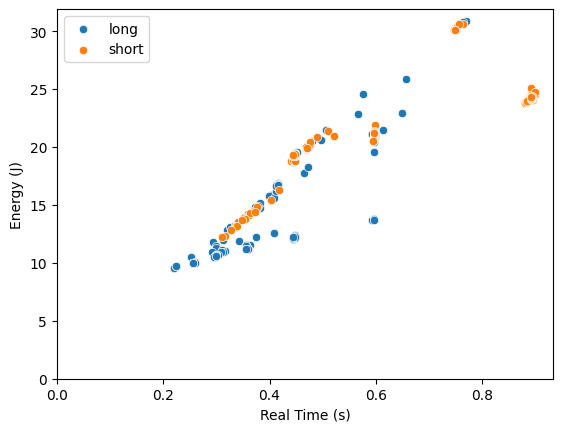

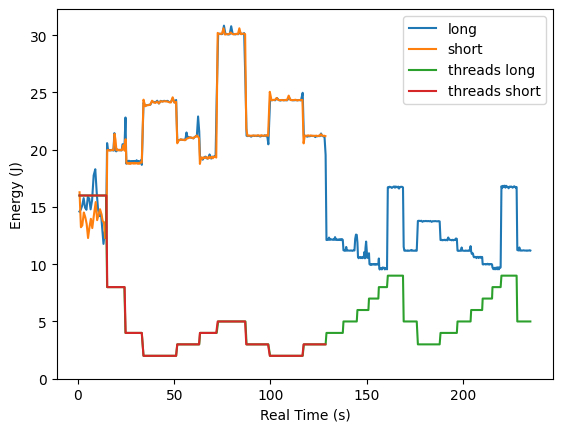

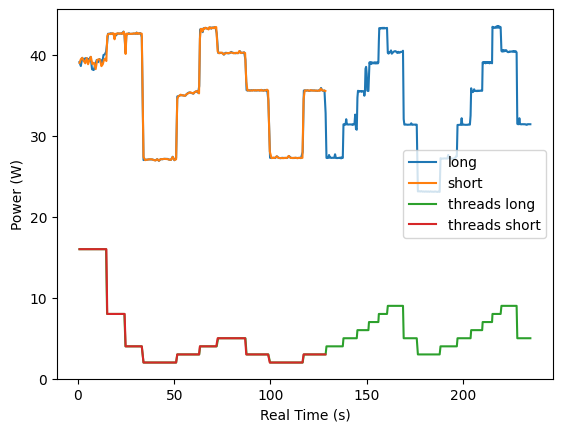

In [32]:
#real, user, energy, energy_user, est, t = getxy([(693720053, 360468947, 28307483, 693720053, 16), (534282496, 267494026, 22644718, 534282496, 16), (547991995, 274027230, 23156923, 547991995, 16), (507997328, 252214273, 21668218, 507997328, 16), (595987390, 301816461, 25068296, 595987390, 16), (523983291, 261196383, 22233158, 523983291, 16), (559964178, 291024648, 23133974, 559964178, 16), (551990397, 279198289, 22655764, 551990397, 16), (643993907, 325905707, 26225824, 643993907, 16), (648026707, 341025535, 26719842, 648026707, 16), (619994614, 318984854, 25713618, 619994614, 16), (631993630, 324216848, 26178400, 631993630, 16), (617934365, 312850796, 25573726, 617934365, 16), (610054717, 305729978, 25354244, 610054717, 16), (635980335, 321876291, 26395257, 635980335, 16), (611964955, 317946778, 24654173, 611964955, 16), (663995539, 346696617, 26895500, 663995539, 16), (643991618, 330873978, 26124201, 643991618, 16), (627995059, 329975365, 25239987, 627995059, 16), (616025467, 316085497, 25657283, 616025467, 16), (646196528, 330625454, 26728875, 646196528, 16), (649757398, 342930824, 26229242, 649757398, 16), (636053395, 321086573, 26661247, 636053395, 16), (599971325, 308619142, 25036741, 599971325, 16), (647998716, 318518252, 27334402, 647998716, 16), (579991531, 278440419, 24316100, 579991531, 16), (526432089, 256888826, 22117436, 526432089, 16), (619333755, 293499413, 26103144, 619333755, 16), (598192135, 280356673, 24757078, 598192135, 16), (587963531, 300131912, 23911559, 587963531, 16), (631508682, 306668389, 25882502, 631508682, 16), (620028551, 296985904, 25915522, 620028551, 16), (589777658, 289513255, 24718870, 589777658, 16), (620437525, 306585660, 25951593, 620437525, 16), (637731701, 312690974, 26282343, 637731701, 16), (603990597, 297731418, 25054257, 603990597, 16), (596028390, 299391970, 25236874, 596028390, 16), (695118810, 336670013, 29244249, 695118810, 16), (688876718, 333808187, 28910387, 688876718, 16), (776531031, 378937753, 31672649, 776531031, 16), (759405149, 358194385, 30282149, 759405149, 16), (728017288, 360732719, 29670456, 728017288, 16), (707999668, 331992322, 28820544, 707999668, 16), (639991483, 307187277, 26818779, 639991483, 16), (594365989, 308509478, 25038755, 594365989, 16), (605639983, 315584311, 25530025, 605639983, 16), (561941872, 290376987, 23682434, 561941872, 16), (566037014, 299569407, 23960083, 566037014, 16), (631948944, 319687294, 26163629, 631948944, 16), (639992278, 324905548, 26238580, 639992278, 16), (607990834, 312491987, 25011655, 607990834, 16), (584003708, 297498657, 24280211, 584003708, 16), (624033909, 297192521, 26738762, 624033909, 16), (679976522, 332242692, 28285084, 679976522, 16), (575994870, 279995071, 24329893, 575994870, 16), (535960354, 267976937, 22601322, 535960354, 16), (512027303, 255980781, 22326420, 512027303, 16), (511996824, 255475130, 22340519, 511996824, 16), (511951231, 257148412, 21816777, 511951231, 16), (527991888, 263126518, 22318669, 527991888, 16), (532021080, 509612344, 23111452, 532021080, 8), (468850561, 468080347, 20570748, 468850561, 8), (470533929, 468292481, 20771920, 470533929, 8), (470935979, 471853953, 20803963, 470935979, 8), (471730371, 471877782, 20873787, 471730371, 8), (471502420, 471907673, 20859199, 471502420, 8), (470858901, 471783058, 20770455, 470858901, 8), (471210579, 468391692, 20867683, 471210579, 8), (468953524, 471602901, 20730050, 468953524, 8), (469963504, 468241609, 20770759, 469963504, 8), (469487993, 471584323, 20728524, 469487993, 8), (469225499, 468125686, 20735421, 469225499, 8), (470511418, 468290588, 20812202, 470511418, 8), (468874593, 471514444, 20724740, 468874593, 8), (470742057, 468341088, 20836311, 470742057, 8), (471919807, 471980800, 20854500, 471919807, 8), (469557941, 471618016, 20781197, 469557941, 8), (469184238, 468076493, 20696114, 469184238, 8), (469465505, 468174672, 20773567, 469465505, 8), (468962277, 471611047, 20709847, 468962277, 8), (490248787, 487689774, 21594793, 490248787, 8), (468920285, 468106787, 20728158, 468920285, 8), (469627128, 471655640, 20730965, 469627128, 8), (469276054, 468073518, 20764290, 469276054, 8), (469064363, 468119255, 20722725, 469064363, 8), (469790939, 471702041, 20763558, 469790939, 8), (469121848, 468113992, 20716133, 469121848, 8), (470586123, 471759114, 20788948, 470586123, 8), (469216204, 468140132, 20699716, 469216204, 8), (469229896, 468064586, 20727059, 469229896, 8), (479743671, 483749562, 20425058, 479743671, 4), (447010125, 447749283, 19754588, 447010125, 4), (445889827, 447468378, 19698802, 445889827, 4), (446091622, 444511428, 19718943, 446091622, 4), (446316868, 447577238, 19764171, 446316868, 4), (446044287, 444502350, 19696666, 446044287, 4), (446100922, 447522797, 19723765, 446100922, 4), (445768109, 444433833, 19696910, 445768109, 4), (446015795, 447497687, 19722911, 446015795, 4), (445969821, 444486077, 19732005, 445969821, 4), (446089111, 447521295, 19697277, 446089111, 4), (445985468, 444493603, 19721324, 445985468, 4), (445812134, 447445233, 19734873, 445812134, 4), (446042562, 444507345, 19696849, 446042562, 4), (446463305, 447607430, 19732982, 446463305, 4), (445980657, 444492664, 19723277, 445980657, 4), (486483240, 487604814, 21054451, 486483240, 4), (446179970, 444540496, 19603648, 446179970, 4), (445960480, 447483869, 19729808, 445960480, 4), (446110684, 444522222, 19720470, 446110684, 4), (445845379, 447448781, 19712291, 445845379, 4), (446049430, 444504975, 19731639, 446049430, 4), (446021207, 447502673, 19710948, 446021207, 4), (446199125, 447543888, 19715525, 446199125, 4), (445901290, 444469003, 19733104, 445901290, 4), (480120370, 480017150, 21222541, 480120370, 4), (445863416, 447462605, 19722362, 445863416, 4), (447080826, 444761723, 19759532, 447080826, 4), (446046911, 447506122, 19739573, 446046911, 4), (447290261, 447813411, 19759105, 447290261, 4), (891697830, 892277770, 25371212, 891697830, 2), (891516166, 889675175, 24878537, 891516166, 2), (891549166, 891722083, 24793455, 891549166, 2), (891569492, 891748767, 24808652, 891569492, 2), (909321668, 901845516, 25261349, 909321668, 2), (891577507, 889705156, 24671629, 891577507, 2), (891826660, 891825583, 24797421, 891826660, 2), (891615956, 891743926, 24630308, 891615956, 2), (891697355, 891786320, 24708127, 891697355, 2), (891590983, 891743691, 24883481, 891590983, 2), (891457495, 891683535, 24798399, 891457495, 2), (894752824, 895313997, 25504146, 894752824, 2), (891874470, 891881485, 24933469, 891874470, 2), (891684900, 891772216, 24702024, 891684900, 2), (891610368, 889748873, 24617735, 891610368, 2), (891591259, 891732513, 24593443, 891591259, 2), (891713674, 891807384, 24860776, 891713674, 2), (891809235, 891849824, 24720335, 891809235, 2), (891704661, 891795004, 24783872, 891704661, 2), (891675402, 891788113, 24511412, 891675402, 2), (891673898, 891755765, 24652952, 891673898, 2), (891695897, 891771635, 24461485, 891695897, 2), (891878016, 891849895, 24590697, 891878016, 2), (891666651, 891766677, 24424192, 891666651, 2), (891501642, 891698608, 24726622, 891501642, 2), (891468953, 891706880, 24608762, 891468953, 2), (891668909, 891780812, 24614806, 891668909, 2), (891758540, 889830123, 24630552, 891758540, 2), (891395359, 891653708, 24597532, 891395359, 2), (891766194, 891833755, 24593260, 891766194, 2), (595203932, 594712306, 20778694, 595203932, 3), (595456272, 595812133, 21440741, 595456272, 3), (616189426, 616041960, 22365421, 616189426, 3), (595600372, 595849364, 21489020, 595600372, 3), (595320582, 595764935, 21507086, 595320582, 3), (595568780, 595844625, 21487432, 595568780, 3), (595393149, 593119689, 21531562, 595393149, 3), (595247701, 595738120, 21525701, 595247701, 3), (595451379, 595801655, 21553839, 595451379, 3), (595408655, 595789034, 21505743, 595408655, 3), (595173187, 595716461, 21519477, 595173187, 3), (595391133, 595783685, 21570074, 595391133, 3), (595340748, 593107009, 21520880, 595340748, 3), (595338004, 595768533, 21560125, 595338004, 3), (595335308, 595773182, 21582159, 595335308, 3), (595393739, 595778414, 21539923, 595393739, 3), (595249272, 595737574, 21533698, 595249272, 3), (595309259, 595760232, 21534063, 595309259, 3), (595338862, 593096257, 21544745, 595338862, 3), (595199065, 595728805, 21551885, 595199065, 3), (595327456, 595772487, 21574713, 595327456, 3), (595495924, 595826419, 21618536, 595495924, 3), (595377342, 595777817, 21590155, 595377342, 3), (595531732, 595837356, 21599676, 595531732, 3), (595604312, 595865953, 21601751, 595604312, 3), (595373971, 593115189, 21639532, 595373971, 3), (595344550, 595777283, 21603461, 595344550, 3), (595353968, 595781624, 21628423, 595353968, 3), (596255369, 596070840, 21672369, 596255369, 3), (595434015, 595799855, 21625738, 595434015, 3), (446096371, 446965403, 18889783, 446096371, 4), (445988774, 444492316, 19713939, 445988774, 4), (446110373, 447524654, 19720714, 446110373, 4), (446115128, 444512751, 19743052, 446115128, 4), (446107193, 447520947, 19679821, 446107193, 4), (446077903, 444516143, 19712413, 446077903, 4), (445980503, 447492888, 19728160, 445980503, 4), (446441613, 444590876, 19714122, 446441613, 4), (446182359, 447543025, 19727672, 446182359, 4), (446251243, 444552013, 19752940, 446251243, 4), (446027580, 447505208, 19691661, 446027580, 4), (446150893, 444531314, 19708628, 446150893, 4), (445986520, 447484586, 19716075, 445986520, 4), (446126952, 444529472, 19710216, 446126952, 4), (446209812, 447546332, 19719432, 446209812, 4), (446019093, 447500130, 19714976, 446019093, 4), (447508508, 444863575, 19780772, 447508508, 4), (446119916, 447525459, 19693004, 446119916, 4), (445887685, 444467446, 19715465, 445887685, 4), (446205481, 447543346, 19727794, 446205481, 4), (446440747, 447604779, 16174336, 446440747, 4), (445951600, 444470776, 12488249, 445951600, 4), (445876470, 447465230, 12481474, 445876470, 4), (445827265, 444452677, 12446197, 445827265, 4), (445874227, 444465084, 12445891, 445874227, 4), (445992635, 447486945, 12413847, 445992635, 4), (445850565, 444455004, 12409697, 445850565, 4), (445931495, 447478712, 12401641, 445931495, 4), (445980958, 444492701, 12389128, 445980958, 4), (449899726, 451470204, 12535369, 449899726, 4), (390484547, 391376231, 12378569, 390484547, 5), (356927753, 356184538, 11355562, 356927753, 5), (356814361, 356159371, 11353181, 356814361, 5), (356752161, 356146348, 11363741, 356752161, 5), (356936913, 356184225, 11341096, 356936913, 5), (356942245, 359372672, 11378023, 356942245, 5), (356773352, 356148749, 11352876, 356773352, 5), (356755015, 356149517, 11382112, 356755015, 5), (356811912, 356158096, 11382600, 356811912, 5), (356914041, 356177809, 11382051, 356914041, 5), (356713042, 359339703, 11338045, 356713042, 5), (356728009, 356142570, 11374544, 356728009, 5), (356744830, 356143266, 11387727, 356744830, 5), (356659434, 356129312, 11346284, 356659434, 5), (356806435, 356160642, 11358370, 356806435, 5), (356851368, 359364318, 11372773, 356851368, 5), (356780245, 356151825, 11382845, 356780245, 5), (356826492, 356158856, 11362275, 356826492, 5), (356820349, 356163223, 11362886, 356820349, 5), (356684049, 356132162, 11337618, 356684049, 5), (356651386, 356125603, 11371980, 356651386, 5), (356802759, 359359219, 11361177, 356802759, 5), (356734525, 356141847, 11368257, 356734525, 5), (356802604, 356154522, 11343782, 356802604, 5), (356712526, 356140225, 11363130, 356712526, 5), (356758583, 356150580, 11358186, 356758583, 5), (356835150, 359361114, 11371553, 356835150, 5), (356709994, 356138530, 11341036, 356709994, 5), (356717529, 356137141, 11373506, 356717529, 5), (356979187, 356191082, 11380281, 356979187, 5), (332255594, 331528309, 11589264, 332255594, 6), (298821573, 299801770, 10855136, 298821573, 6), (298777064, 299791677, 10861972, 298777064, 6), (298818969, 296467381, 10862582, 298818969, 6), (300348936, 303385528, 11356355, 300348936, 6), (310691045, 308444553, 11252291, 310691045, 6), (309159598, 308191386, 11196565, 309159598, 6), (310527934, 311750806, 11220614, 310527934, 6), (308794895, 308130789, 11211091, 308794895, 6), (298787216, 299796411, 10886203, 298787216, 6), (298837020, 299799449, 10875522, 298837020, 6), (298837283, 296462691, 10882723, 298837283, 6), (324346822, 323140766, 11557038, 324346822, 6), (298805035, 296464754, 10841220, 298805035, 6), (298816873, 299801586, 10848056, 298816873, 6), (298929620, 299818753, 10868136, 298929620, 6), (298961222, 296491108, 10875461, 298961222, 6), (298834818, 299797011, 10851351, 298834818, 6), (298886149, 299812110, 10876071, 298886149, 6), (298827691, 299802334, 10870883, 298827691, 6), (298824133, 296469078, 10878390, 298824133, 6), (300088794, 300012619, 10913729, 300088794, 6), (304005518, 303998183, 11030734, 304005518, 6), (298831649, 299803504, 10876315, 298831649, 6), (298808488, 299791588, 10879061, 298808488, 6), (298790622, 296463776, 10872531, 298790622, 6), (298827987, 299799165, 10844760, 298827987, 6), (298844878, 299805437, 10873385, 298844878, 6), (298855992, 299807398, 10876559, 298855992, 6), (298937786, 296486548, 10876071, 298937786, 6), (256544626, 255631293, 10253880, 256544626, 7), (256512543, 259500543, 10208775, 256512543, 7), (256712331, 256101301, 10246312, 256712331, 7), (256437370, 256059586, 10218846, 256437370, 7), (256508138, 256071234, 10246372, 256508138, 7), (256450331, 256063506, 10220128, 256450331, 7), (256532188, 256069478, 10252171, 256532188, 7), (256407981, 256057427, 10217442, 256407981, 7), (256519939, 256070397, 10254307, 256519939, 7), (256610635, 259508719, 10217381, 256610635, 7), (256600449, 256085267, 10250829, 256600449, 7), (256533974, 256074415, 10247776, 256533974, 7), (256516229, 256071779, 10420384, 256516229, 7), (256692897, 256097721, 10941683, 256692897, 7), (257157368, 256163020, 11299227, 257157368, 7), (261223812, 263601016, 11218721, 261223812, 7), (257273124, 256172368, 11412324, 257273124, 7), (256661814, 256084064, 11371614, 256661814, 7), (256699707, 256097724, 11364900, 256699707, 7), (256875900, 259543785, 11402193, 256875900, 7), (256852536, 256117346, 11391389, 256852536, 7), (275005912, 275855683, 11837921, 275005912, 7), (277943183, 276273631, 12055267, 277943183, 7), (257479100, 256206221, 10626804, 257479100, 7), (256628529, 259505172, 10665134, 256628529, 7), (256567752, 256077993, 10226841, 256567752, 7), (256347044, 256049065, 10250585, 256347044, 7), (256417707, 256053006, 10219456, 256417707, 7), (256465930, 256065426, 10212132, 256465930, 7), (256548361, 256076994, 10262059, 256548361, 7), (223026636, 223503294, 9862645, 223026636, 8), (223027278, 223873498, 9875463, 223027278, 8), (222980717, 220368955, 9873876, 222980717, 8), (223099650, 223884782, 9880346, 223099650, 8), (223065726, 223881528, 9971349, 223065726, 8), (223023078, 223877067, 9886205, 223023078, 8), (223122924, 223885087, 9866308, 223122924, 8), (223079528, 220383735, 9871923, 223079528, 8), (223075557, 223882663, 9915746, 223075557, 8), (223042260, 223877892, 9873327, 223042260, 8), (231711481, 231960323, 10307102, 231711481, 8), (249232414, 248143786, 10920566, 249232414, 8), (223332583, 223913851, 9905553, 223332583, 8), (223594292, 223946673, 9869359, 223594292, 8), (223074300, 223878426, 9948705, 223074300, 8), (223111587, 220387894, 9897863, 223111587, 8), (223085317, 223884422, 9889257, 223085317, 8), (223088542, 223884253, 9903173, 223088542, 8), (223135284, 223884272, 9943029, 223135284, 8), (223009088, 220370754, 9924352, 223009088, 8), (222982660, 223870713, 9939855, 222982660, 8), (222977415, 223871038, 9893773, 222977415, 8), (223173052, 223895419, 9902380, 223173052, 8), (223005226, 223872079, 9889501, 223005226, 8), (223020436, 220375405, 9885228, 223020436, 8), (223046700, 223880303, 9874182, 223046700, 8), (223083623, 223882178, 9914952, 223083623, 8), (223052510, 223879155, 9878027, 223052510, 8), (223904330, 223984419, 9928685, 223904330, 8), (223576508, 220438403, 9940893, 223576508, 8), (415513427, 415523696, 16951678, 415513427, 9), (415841388, 416006464, 17223344, 415841388, 9), (415164226, 415982970, 17353044, 415164226, 9), (414675214, 415921880, 16931964, 414675214, 9), (416408390, 416039639, 17099870, 416408390, 9), (416018382, 415998444, 16944781, 416018382, 9), (415505397, 415941217, 16914019, 415505397, 9), (429786253, 428196759, 17522111, 429786253, 9), (417765672, 419748221, 17028216, 417765672, 9), (415592251, 415943275, 16911151, 415592251, 9), (415251831, 412359160, 16955156, 415251831, 9), (415975173, 415994023, 16908893, 415975173, 9), (416141863, 416014006, 16976336, 416141863, 9), (414809195, 415859602, 16910662, 414809195, 9), (415825819, 415977336, 16929522, 415825819, 9), (432162779, 432013487, 17581193, 432162779, 9), (415618712, 415955877, 16981096, 415618712, 9), (415376901, 415926684, 16958941, 415376901, 9), (416126278, 415997573, 17007525, 416126278, 9), (415003525, 415887986, 16923175, 415003525, 9), (415406591, 412373156, 16950335, 415406591, 9), (415717071, 415967627, 17025041, 415717071, 9), (415306347, 415918348, 16962970, 415306347, 9), (414693813, 415849368, 16945757, 414693813, 9), (415224569, 415910447, 16949847, 415224569, 9), (415950277, 415993283, 17014361, 415950277, 9), (414789597, 412309090, 16964800, 414789597, 9), (415018056, 415886690, 16956622, 415018056, 9), (415865162, 415976101, 16987078, 415865162, 9), (416656297, 416070589, 17019609, 416656297, 9), (356873904, 358650002, 11527559, 356873904, 5), (356844202, 359367873, 11518098, 356844202, 5), (357814924, 356359421, 11552460, 357814924, 5), (356945293, 356178827, 11517427, 356945293, 5), (356791230, 359356094, 11509919, 356791230, 5), (356785379, 356155188, 11479280, 356785379, 5), (356651070, 356128744, 11512727, 356651070, 5), (356723671, 356141240, 11511811, 356723671, 5), (356718002, 356140382, 11481965, 356718002, 5), (356900377, 359367366, 11521028, 356900377, 5), (356832576, 356161997, 11516511, 356832576, 5), (356903312, 356177344, 11512971, 356903312, 5), (356799915, 356158126, 11515657, 356799915, 5), (356788043, 356152127, 11511750, 356788043, 5), (356806989, 359358337, 11514497, 356806989, 5), (356731346, 356141575, 11486482, 356731346, 5), (356862576, 356167213, 11643219, 356862576, 5), (357090177, 356213293, 12957060, 357090177, 5), (357282703, 359451207, 12616605, 357282703, 5), (357153422, 356222985, 11709626, 357153422, 5), (356936858, 356181362, 11516694, 356936858, 5), (356817009, 356157149, 11485261, 356817009, 5), (356861506, 359365426, 11509309, 356861506, 5), (356834295, 356166228, 11506929, 356834295, 5), (356909688, 356177182, 11509858, 356909688, 5), (357024983, 356200997, 11504121, 357024983, 5), (356769893, 356149846, 11509492, 356769893, 5), (356858756, 359366531, 11505037, 356858756, 5), (356817497, 356161377, 11486359, 356817497, 5), (357005320, 356200353, 11540071, 357005320, 5), (595340408, 597323395, 14306055, 595340408, 3), (595404270, 595787567, 14310083, 595404270, 3), (595338047, 595772596, 14319909, 595338047, 3), (595396509, 593122255, 14290003, 595396509, 3), (595789304, 595925545, 14574975, 595789304, 3), (595613922, 595859069, 14281518, 595613922, 3), (595163628, 595716136, 14307520, 595163628, 3), (595403630, 595786047, 14296960, 595403630, 3), (595301778, 595756936, 14286585, 595301778, 3), (595541253, 595838198, 14320398, 595541253, 3), (595477710, 595814205, 14318139, 595477710, 3), (596945741, 596309675, 14453882, 596945741, 3), (595456824, 595809488, 14301355, 595456824, 3), (595333745, 593103388, 14279260, 595333745, 3), (595426360, 595798680, 14288293, 595426360, 3), (595538288, 595833875, 14299219, 595538288, 3), (595347796, 595780115, 14286341, 595347796, 3), (595524519, 595830275, 14277979, 595524519, 3), (595420821, 595798466, 14270532, 595420821, 3), (595454249, 595807930, 14296167, 595454249, 3), (595190271, 593050670, 14276758, 595190271, 3), (595595190, 595856571, 14289576, 595595190, 3), (595491634, 595820011, 14272668, 595491634, 3), (595620218, 595871184, 14304834, 595620218, 3), (595446917, 595799504, 14806786, 595446917, 3), (595592075, 595853895, 14335534, 595592075, 3), (595542879, 595838045, 14278956, 595542879, 3), (595537256, 595826907, 14294397, 595537256, 3), (595300974, 593080434, 14272302, 595300974, 3), (595309606, 595756866, 14296716, 595309606, 3), (445991265, 446665032, 12310577, 445991265, 4), (445904642, 444463869, 12396147, 445904642, 4), (446067041, 447511471, 12391509, 446067041, 4), (446018672, 444497645, 12391448, 446018672, 4), (446049778, 447510584, 12353850, 446049778, 4), (445932319, 444478049, 12405425, 445932319, 4), (446147241, 447525739, 12383269, 446147241, 4), (446161817, 444534675, 12347563, 446161817, 4), (446011417, 447494815, 12382049, 446011417, 4), (445943623, 444484127, 12363677, 445943623, 4), (445971258, 447482806, 12384184, 445971258, 4), (446099340, 444522015, 12337066, 446099340, 4), (446222867, 447552353, 12345488, 446222867, 4), (446061073, 444507809, 12362456, 446061073, 4), (445972944, 447488802, 12362456, 445972944, 4), (446009561, 444489326, 12394622, 446009561, 4), (445908111, 447470650, 12367522, 445908111, 4), (446269685, 447558985, 12394805, 446269685, 4), (445991838, 444495272, 12365325, 445991838, 4), (445971837, 447479338, 12343352, 445971837, 4), (445962158, 444484304, 12364287, 445962158, 4), (446003037, 447496571, 12346709, 446003037, 4), (446227613, 444555525, 12384612, 446227613, 4), (445912463, 447475629, 12353667, 445912463, 4), (445961917, 444475776, 12380034, 445961917, 4), (446017334, 447499804, 12378387, 446017334, 4), (446058199, 444509024, 12389372, 446058199, 4), (447357316, 447836577, 12564116, 447357316, 4), (446124041, 444524894, 12347197, 446124041, 4), (446105447, 447516634, 12334686, 446105447, 4), (356886144, 355803294, 11252717, 356886144, 5), (356734774, 356141670, 11259737, 356734774, 5), (356873768, 359373585, 11266390, 356873768, 5), (369664100, 368318932, 11868927, 369664100, 5), (356794474, 356151301, 11312654, 356794474, 5), (356787144, 356155108, 11309358, 356787144, 5), (356828394, 359359636, 11329317, 356828394, 5), (356763261, 356148883, 11306123, 356763261, 5), (356725365, 356141250, 11319551, 356725365, 5), (356832112, 356162125, 11331881, 356832112, 5), (356779586, 356149590, 11360566, 356779586, 5), (356680772, 359332463, 11322237, 356680772, 5), (356906338, 356179185, 11355256, 356906338, 5), (356807060, 356156348, 11333956, 356807060, 5), (356725227, 356141169, 11335664, 356725227, 5), (356722217, 356137465, 11325777, 356722217, 5), (356747484, 359344098, 11297334, 356747484, 5), (356826582, 356160776, 11321199, 356826582, 5), (356810696, 356158252, 11325045, 356810696, 5), (356783530, 356154970, 11329316, 356783530, 5), (356665059, 356129093, 11303865, 356665059, 5), (356717299, 356137718, 11309725, 356717299, 5), (356871715, 359372223, 11329133, 356871715, 5), (356780986, 356155443, 11336275, 356780986, 5), (356754242, 356146016, 11344697, 356754242, 5), (356882719, 356173480, 11331209, 356882719, 5), (356760464, 356146345, 11307589, 356760464, 5), (356775428, 356148546, 11348603, 356775428, 5), (356751938, 356146575, 11367891, 356751938, 5), (356757993, 356150139, 11335542, 356757993, 5), (299299185, 299487562, 10841342, 299299185, 6), (298685519, 299777384, 10829134, 298685519, 6), (298927368, 296482801, 10815097, 298927368, 6), (298816212, 299798354, 10820223, 298816212, 6), (298913988, 299816956, 10858432, 298913988, 6), (298871357, 296477997, 10847140, 298871357, 6), (298821931, 299802959, 10857944, 298821931, 6), (298970682, 299824110, 10864901, 298970682, 6), (298810716, 299797648, 10850375, 298810716, 6), (298789815, 296459566, 10852939, 298789815, 6), (298866415, 299806666, 10826144, 298866415, 6), (298758583, 299789017, 10857028, 298758583, 6), (298801818, 296465818, 10852450, 298801818, 6), (298949048, 299822968, 10868746, 298949048, 6), (298974942, 299823359, 10856479, 298974942, 6), (298753127, 299790588, 10866916, 298753127, 6), (298927248, 296483753, 10865450, 298927248, 6), (298814052, 299798439, 10837619, 298814052, 6), (298717476, 299784210, 10878207, 298717476, 6), (327219379, 327866908, 12655974, 327219379, 6)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(632034006, 301590536, 25880793, 632034006, 16), (567928065, 284612819, 23513795, 567928065, 16), (576021189, 288187246, 24253417, 576021189, 16), (512002630, 256988179, 21901982, 512002630, 16), (607993614, 295000082, 25498409, 607993614, 16), (503954213, 249238913, 20889412, 503954213, 16), (603993003, 292610331, 24777158, 603993003, 16), (620016900, 306889208, 25990961, 620016900, 16), (659997309, 314793203, 27332450, 659997309, 16), (631963837, 308293191, 25534724, 631963837, 16), (651992942, 313245121, 26469659, 651992942, 16), (646421282, 318389789, 26711052, 646421282, 16), (649567727, 320485229, 26443353, 649567727, 16), (647988098, 323482517, 26497430, 647988098, 16), (663991911, 325106321, 26985344, 663991911, 16), (640025061, 304084829, 26653069, 640025061, 16), (636006172, 308412033, 26239191, 636006172, 16), (619950764, 304813615, 25099850, 619950764, 16), (636036053, 299856581, 26442010, 636036053, 16), (627993452, 309742063, 26040582, 627993452, 16), (631944774, 303646318, 25749019, 631944774, 16), (607992460, 288453928, 24698606, 607992460, 16), (695999138, 319258657, 28184376, 695999138, 16), (592040035, 282493279, 25038449, 592040035, 16), (627933659, 320273413, 25948542, 627933659, 16), (611992366, 314249573, 24616636, 611992366, 16), (555989937, 291230785, 22981509, 555989937, 16), (668026960, 354416962, 27647451, 668026960, 16), (667999023, 334810833, 27965565, 667999023, 16), (623982877, 321239308, 26046809, 623982877, 16), (627930778, 326220154, 25757990, 627930778, 16), (619990609, 314249585, 25408870, 619990609, 16), (639990260, 324750220, 26345147, 639990260, 16), (599991693, 304360566, 24932066, 599991693, 16), (544037824, 273625374, 23142458, 544037824, 16), (575988342, 287573759, 24319029, 575988342, 16), (632012233, 314179633, 26491571, 632012233, 16), (655981704, 314801152, 27637868, 655981704, 16), (775992747, 393332049, 31934672, 775992747, 16), (751942765, 377318825, 30457869, 751942765, 16), (767982191, 388940918, 31010907, 767982191, 16), (759993444, 397468568, 30593672, 759993444, 16), (596029519, 315245375, 24878965, 596029519, 16), (559956050, 278837376, 23061769, 559956050, 16), (588001436, 281244878, 24314391, 588001436, 16), (612017631, 293212817, 25673152, 612017631, 16), (583997261, 276227924, 24804990, 583997261, 16), (567989625, 275722141, 24064330, 567989625, 16), (639990252, 318924773, 26784173, 639990252, 16), (611991570, 297110057, 25616877, 611991570, 16), (631963313, 306489333, 26102900, 631963313, 16), (536048145, 269541573, 22860720, 536048145, 16), (655938261, 337385989, 27409659, 655938261, 16), (612015291, 314742473, 25388057, 612015291, 16), (524008490, 265967985, 22473820, 524008490, 16), (491975390, 245740037, 21308295, 491975390, 16), (491988835, 246231244, 21457953, 491988835, 16), (483998959, 242217124, 21133185, 483998959, 16), (499996316, 248045231, 21791937, 499996316, 16), (479989927, 250477950, 20806953, 479989927, 16), (515984383, 510076914, 22405399, 515984383, 8), (468899547, 468069924, 20724984, 468899547, 8), (468854080, 468084342, 20715401, 468854080, 8), (469043640, 468104003, 20728279, 469043640, 8), (468448945, 468008111, 20695199, 468448945, 8), (468761527, 471580081, 20726876, 468761527, 8), (468584661, 468061556, 20729805, 468584661, 8), (469271731, 468108904, 20729683, 469271731, 8), (469151763, 468102519, 20731453, 469151763, 8), (469105842, 471603272, 20726205, 469105842, 8), (468822707, 468071180, 20734749, 468822707, 8), (469173812, 468135321, 20724861, 469173812, 8), (469315832, 468132564, 20726998, 469315832, 8), (468921723, 471580676, 20733223, 468921723, 8), (469144033, 468104138, 20784493, 469144033, 8), (468783471, 468062241, 20723519, 468783471, 8), (469106866, 468124580, 20771126, 469106866, 8), (468602210, 471546764, 20664193, 468602210, 8), (469039105, 468057023, 20730110, 469039105, 8), (468974444, 468090685, 20709969, 468974444, 8), (468407811, 468031616, 20693551, 468407811, 8), (468971547, 468110407, 20665474, 468971547, 8), (468882318, 471596381, 20727242, 468882318, 8), (468802416, 468060113, 20718270, 468802416, 8), (469022915, 468120293, 20717293, 469022915, 8), (469191811, 468129951, 20732552, 469191811, 8), (468811770, 471584435, 20670235, 468811770, 8), (468816777, 468074013, 20748482, 468816777, 8), (469182713, 468136710, 20701119, 469182713, 8), (468950709, 468037321, 20739815, 468950709, 8), (500374730, 503375724, 21353644, 500374730, 4), (448721955, 451176936, 19806773, 448721955, 4), (448375720, 448086784, 19832957, 448375720, 4), (448667205, 448154130, 19813426, 448667205, 4), (448665114, 448164509, 19846141, 448665114, 4), (448800649, 448197034, 19835887, 448800649, 4), (448743846, 448181742, 19850535, 448743846, 4), (448487367, 451112723, 19790171, 448487367, 4), (448629557, 448155352, 19859569, 448629557, 4), (448285320, 448066989, 19812754, 448285320, 4), (447797617, 447948001, 19788340, 447797617, 4), (448030662, 448002253, 19810863, 448030662, 4), (447779092, 447934875, 19820567, 447779092, 4), (447719904, 447926934, 19747386, 447719904, 4), (448744794, 448179192, 19859812, 448744794, 4), (448720579, 448171054, 19854258, 448720579, 4), (491546806, 491873244, 21116340, 491546806, 4), (447957193, 447988036, 19813121, 447957193, 4), (447602733, 447897834, 19821177, 447602733, 4), (447333460, 447830948, 19759960, 447333460, 4), (447740470, 447924075, 19797434, 447740470, 4), (447726725, 444922159, 19825023, 447726725, 4), (448426404, 451104914, 19803233, 448426404, 4), (447296212, 444820585, 19794627, 447296212, 4), (447837322, 447953724, 19783213, 447837322, 4), (448156483, 448033178, 19846080, 448156483, 4), (447967213, 447986918, 19809764, 447967213, 4), (447369698, 447838001, 19763560, 447369698, 4), (447729229, 447928264, 19827525, 447729229, 4), (447427014, 447834170, 19502391, 447427014, 4), (895008075, 897581765, 25167233, 895008075, 2), (894405939, 893163339, 24954587, 894405939, 2), (894987805, 895468500, 24880308, 894987805, 2), (894499528, 895208359, 24890500, 894499528, 2), (915123032, 905531311, 25333004, 915123032, 2), (895498417, 893669183, 24916318, 895498417, 2), (895176726, 895531393, 24855649, 895176726, 2), (894288327, 895094134, 24715696, 894288327, 2), (895033351, 895484519, 24793577, 895033351, 2), (894382393, 893144909, 24963559, 894382393, 2), (895180289, 895553487, 24907102, 895180289, 2), (898089940, 897005837, 25605769, 898089940, 2), (895105963, 895505352, 24998471, 895105963, 2), (894290997, 895090465, 24789427, 894290997, 2), (895080456, 895490971, 24695432, 895080456, 2), (894392257, 893149113, 24719419, 894392257, 2), (895114108, 895510862, 24951657, 895114108, 2), (894551068, 895228223, 24768919, 894551068, 2), (895405111, 893661023, 24897519, 895405111, 2), (895296566, 895630759, 24619078, 895296566, 2), (895447433, 895675139, 24754026, 895447433, 2), (894507865, 895213060, 24519346, 894507865, 2), (895305002, 895600955, 24675047, 895305002, 2), (894749881, 893333172, 24526121, 894749881, 2), (895420385, 895667308, 24859434, 895420385, 2), (894695177, 895306721, 24686887, 894695177, 2), (895351830, 895631546, 24737669, 895351830, 2), (894624922, 893270238, 24681943, 894624922, 2), (895340940, 895624154, 24730711, 895340940, 2), (894644525, 895295520, 25178280, 894644525, 2), (597782298, 596148069, 21481024, 597782298, 3), (597490641, 599157987, 21604315, 597490641, 3), (600993177, 600321916, 21705328, 600993177, 3), (597407023, 596464817, 21577825, 597407023, 3), (597821789, 599272341, 21605109, 597821789, 3), (597309615, 596432903, 21552252, 597309615, 3), (597832815, 596608371, 21617437, 597832815, 3), (597269365, 599087560, 21596258, 597269365, 3), (597755092, 596578166, 21626715, 597755092, 3), (597323963, 599106895, 21582403, 597323963, 3), (597827967, 596605841, 21623358, 597827967, 3), (605015317, 604336057, 21900762, 605015317, 3), (597840372, 599278727, 21640386, 597840372, 3), (597372507, 596454874, 21627386, 597372507, 3), (597834188, 599276046, 21648504, 597834188, 3), (597364240, 596446624, 21641608, 597364240, 3), (597845091, 596611998, 21615850, 597845091, 3), (597363268, 599119495, 21626287, 597363268, 3), (597797377, 596594389, 21632696, 597797377, 3), (597357923, 596447588, 21636847, 597357923, 3), (597791924, 599260774, 21684332, 597791924, 3), (597125657, 596371812, 21659124, 597125657, 3), (597826257, 599270158, 21682989, 597826257, 3), (597185892, 596391954, 21649542, 597185892, 3), (597477279, 596490728, 21681402, 597477279, 3), (597017032, 599002167, 21671514, 597017032, 3), (597461392, 596483310, 21712591, 597461392, 3), (597250626, 596408083, 21682134, 597250626, 3), (597514452, 599163297, 21738165, 597514452, 3), (597672624, 596550747, 22360904, 597672624, 3), (447744899, 447329775, 19785838, 447744899, 4), (447292005, 447817796, 19763011, 447292005, 4), (447544983, 447883534, 19804271, 447544983, 4), (447233363, 447804775, 19763743, 447233363, 4), (447621505, 444901899, 19804332, 447621505, 4), (447228031, 447801020, 19756419, 447228031, 4), (447615241, 447898972, 19805369, 447615241, 4), (447336184, 447828310, 19774181, 447336184, 4), (447722021, 447926967, 19808970, 447722021, 4), (447368817, 447833391, 19752269, 447368817, 4), (447818156, 447950836, 19817637, 447818156, 4), (447255957, 447809210, 19751109, 447255957, 4), (447733088, 444931312, 19810069, 447733088, 4), (447334418, 447830014, 19755259, 447334418, 4), (447878067, 447967902, 19803356, 447878067, 4), (447997778, 447994071, 19799082, 447997778, 4), (456122322, 456024385, 20121042, 456122322, 4), (447660948, 447914024, 19809764, 447660948, 4), (447788634, 447942570, 19797374, 447788634, 4), (447402100, 447848264, 19778208, 447402100, 4)])

#real, user, energy, energy_user, w, t = getxy([(702606924, 396801371, 28462634, 16), (715935090, 378466962, 28218800, 16), (611981098, 318206030, 24631284, 16), (623995804, 300184254, 25028562, 16), (587987970, 287497907, 23686341, 16), (655991737, 311994434, 26400384, 16), (649852647, 303605918, 26583489, 16), (634173746, 297624838, 25948481, 16), (679974717, 317004894, 27781728, 16), (707988736, 326732657, 28764026, 16), (699975380, 338687293, 28060292, 16), (723990280, 350865798, 28622364, 16), (771994570, 385066904, 30288741, 16), (723997993, 358487844, 28476978, 16), (584022053, 291722529, 23867675, 16), (635990429, 308017605, 26168207, 16), (619987694, 287502392, 25576351, 16), (610323291, 302830246, 24997556, 16), (621636916, 319223836, 25168331, 16), (647993848, 338786685, 26099603, 16), (487086430, 475799981, 20930001, 8), (470349251, 471785967, 20428475, 8), (470856134, 471846098, 20402231, 8), (470404961, 468265815, 20383858, 8), (470965531, 471822127, 20408457, 8), (470576933, 471813240, 20411385, 8), (470627163, 468303657, 20387521, 8), (470335210, 471821663, 20406564, 8), (506802235, 503114440, 21519537, 8), (482369478, 479799684, 20906502, 8), (469038208, 468119555, 20361642, 8), (469196012, 471626766, 20356210, 8), (469204567, 468138104, 20323679, 8), (468700358, 468070140, 20347726, 8), (469206814, 468144285, 20360055, 8), (468920483, 471570717, 20353037, 8), (469002864, 468107336, 20336557, 8), (468731399, 468079647, 20355416, 8), (468511491, 468055952, 20303293, 8), (468818022, 467851811, 20322641, 8), (565978108, 571296790, 22528690, 4), (441998860, 440485972, 19155651, 4), (491842845, 491958724, 21188728, 4), (492102299, 492014649, 21183112, 4), (492016621, 491995589, 21190498, 4), (492139799, 495025525, 21196479, 4), (492337553, 492081273, 21233893, 4), (492129341, 492020032, 21179999, 4), (491256657, 488811626, 21140510, 4), (491358004, 491834007, 21141792, 4), (492596932, 492147460, 21236090, 4), (492436071, 495106088, 21192512, 4), (491551723, 488878080, 21203254, 4), (491405823, 491847087, 21158515, 4), (492444746, 492107547, 21242377, 4), (493001471, 495244120, 21247627, 4), (492522728, 492126570, 21191169, 4), (443153859, 443785200, 19251049, 4), (442096217, 440517830, 17057146, 4), (442028361, 443504332, 15744467, 4), (339652935, 336818042, 14126734, 6), (296889011, 296139494, 12864163, 6), (296964306, 296155134, 12853971, 6), (296893432, 296146597, 12876188, 6), (296640425, 296104281, 12879972, 6), (300689635, 303445235, 12996122, 6), (300488306, 300078632, 12976590, 6), (300749032, 300117863, 13044706, 6), (299973112, 299995685, 12991727, 6), (300008287, 300001429, 12989468, 6), (300778477, 300125619, 13018644, 6), (299824265, 299965662, 12995389, 6), (300124079, 300017701, 13034757, 6), (300099504, 300011011, 13005398, 6), (300508690, 300076471, 13000822, 6), (300166266, 300022628, 12976285, 6), (299704700, 299946316, 13004727, 6), (300421636, 300066576, 12996549, 6), (300555213, 300091145, 13008756, 6), (300462675, 303407078, 12967618, 6), (531985010, 531967295, 21990057, 7), (531388867, 528478437, 22008305, 7), (533338100, 535616655, 22017461, 7), (532389411, 532053762, 22031376, 7), (550299204, 548318813, 22655033, 7), (531568927, 531932684, 21921941, 7), (531671838, 531949719, 21962407, 7), (532283144, 532036188, 21977422, 7), (531864636, 531974724, 21901677, 7), (535084386, 535866068, 21984929, 7), (532682642, 532089834, 22020879, 7), (531478997, 531918920, 21996953, 7), (532130615, 532012055, 22019963, 7), (531634569, 531942907, 21916814, 7), (533118509, 532157572, 22066228, 7), (532637628, 532086617, 22090092, 7), (532322078, 535469678, 22039067, 7), (533026728, 532139890, 22014653, 7), (532218997, 532028407, 22059575, 7), (532917597, 532123693, 21990727, 7), (448551032, 449868644, 15957540, 4), (447568681, 447885277, 17459855, 4), (447268464, 447809505, 17501542, 4), (447453599, 447860006, 17499711, 4), (447483261, 447866490, 17585832, 4), (447764237, 447936908, 17529130, 4), (448368331, 448086432, 17535783, 4), (448716948, 448175730, 17644303, 4), (448448696, 448104668, 17667801, 4), (448055744, 448008104, 17508927, 4), (448015686, 447992064, 17560319, 4), (448383079, 448093786, 17635880, 4), (447607229, 447897385, 17564470, 4), (447685568, 447917411, 17576981, 4), (447664967, 447905880, 17584244, 4), (447433498, 447856658, 17573869, 4), (448393486, 448093422, 17678727, 4), (447536379, 447878376, 17580033, 4), (447958804, 447982982, 17602616, 4), (448312264, 448075729, 17630265, 4), (598450514, 597173017, 21367011, 3), (596935623, 598978772, 21296637, 3), (597662522, 596542750, 21326789, 3), (598721591, 599571294, 21315802, 3), (623192886, 616508774, 22719485, 3), (598201005, 596717721, 21708807, 3), (598216434, 599397542, 23383668, 3), (597969497, 596640336, 23520997, 3), (597090581, 596363924, 23487184, 3), (599275311, 599751541, 23684937, 3), (599633049, 599870971, 24253050, 3), (611244394, 611743473, 25646846, 3), (610032255, 608658409, 24061828, 3), (597897555, 599284927, 23621827, 3), (597433421, 596469375, 23550172, 3), (597507903, 599164665, 23538208, 3), (598404130, 596794407, 23565675, 3), (598296214, 599418890, 23609742, 3), (598414478, 596801785, 23595948, 3), (598499603, 599488333, 23653381, 3), (448205025, 447454926, 19768993, 4), (448306815, 448066655, 19449657, 4), (452654712, 452163845, 19058118, 4), (448462562, 448103127, 18983838, 4), (448379872, 451092364, 19329113, 4), (448075490, 448015106, 18623549, 4), (448426209, 448100277, 19383678, 4), (447837538, 447954028, 18878003, 4), (448209746, 448047725, 19011548, 4), (448429484, 448101045, 19099683, 4), (447795520, 447942339, 18641737, 4), (448296876, 448072807, 19500621, 4), (447719506, 447923962, 18799574, 4), (448219118, 448050171, 19100964, 4), (448228906, 448053828, 19238598, 4), (447398367, 447841576, 18633620, 4), (447458936, 447858186, 19455150, 4), (448004929, 447989867, 18767347, 4), (448288774, 448062819, 19113293, 4), (448359806, 448080764, 19227429, 4), (745445645, 744035375, 30410872, 5), (747418989, 747880778, 30673994, 5), (747710320, 747923451, 30708661, 5), (747567180, 747901827, 30714582, 5), (748090394, 748014140, 30762312, 5), (747303978, 747850916, 30726056, 5), (747128276, 744621225, 30682295, 5), (748764201, 751341778, 30782209, 5), (657465393, 656286145, 26821525, 5), (358010486, 359597356, 15818868, 5), (358841721, 356563289, 15789999, 5), (358376122, 359669787, 15860677, 5), (358091639, 356414734, 15830465, 5), (357799821, 359556658, 15826925, 5), (360465080, 360090619, 15910726, 5), (358048234, 356402187, 15821126, 5), (358372226, 359672150, 15832968, 5), (358724992, 359736366, 15834676, 5), (358555237, 356506966, 15864461, 5), (358676374, 359729489, 15827352, 5), (624168141, 623649711, 26320978, 6), (627524422, 627912429, 26428826, 6), (626474591, 627740406, 26427056, 6), (624483284, 624077552, 26264215, 6), (625602999, 624260198, 26361627, 6), (627093619, 627842187, 26423211, 6), (627832358, 627965245, 26466363, 6), (625993093, 624324421, 26390924, 6), (627170933, 627857948, 26429864, 6), (626741560, 627781511, 26421990, 6), (627165321, 627854925, 26427057, 6), (628291102, 628039353, 26472649, 6), (532345553, 532046524, 22141240, 6), (300343298, 300054255, 13272854, 6), (300441055, 300071528, 13236050, 6), (300400524, 300064029, 13288235, 6), (300412101, 300064213, 13252713, 6), (300364062, 300058778, 13297451, 6), (300139337, 300016670, 13254056, 6), (299825447, 299965575, 13219509, 6), (597249469, 602214226, 19039197, 3), (597170812, 596384366, 18917188, 3), (597399122, 596460490, 18910047, 3), (597523783, 599167978, 18941968, 3), (597298769, 596421015, 18886304, 3), (597860587, 596620666, 19035962, 3), (597417014, 599121659, 18873426, 3), (597519223, 596495692, 18907972, 3), (597249822, 596395678, 18861951, 3), (597388044, 599119640, 18883252, 3), (597143110, 596369582, 18866224, 3), (597505998, 596485491, 18860059, 3), (597548421, 599175411, 18895887, 3), (597690015, 596553979, 18878736, 3), (597251795, 599070645, 18897412, 3), (597318214, 596435578, 18854444, 3), (597188222, 596377880, 18859266, 3), (597503040, 599165427, 18879895, 3), (598464151, 596809861, 19021131, 3), (597386602, 599117371, 18984570, 3), (894809444, 893559738, 24580321, 2), (900109890, 900038596, 24948178, 2), (894723042, 895331880, 24529356, 2), (894587114, 895274611, 24559996, 2), (894934074, 893450475, 28137684, 2), (894915362, 895435579, 28222951, 2), (894801220, 895380332, 28272876, 2), (894882874, 895418009, 28229787, 2), (894990080, 893485132, 28273975, 2), (895341317, 895643570, 28473255, 2), (896725211, 896337507, 29730331, 2), (895654288, 895793829, 28917590, 2), (894643031, 895295086, 28233265, 2), (894849793, 895397217, 28256031, 2), (894841829, 893401246, 28233632, 2), (894968254, 895458523, 28261829, 2), (896894650, 896439658, 28302113, 2), (896458330, 896212460, 21304999, 2), (894932255, 895448821, 17610856, 2), (894461257, 895206530, 17571610, 2), (597200139, 596046635, 13943568, 3), (597160653, 596379179, 14085901, 3), (597281080, 599086708, 14065455, 3), (597370553, 596450858, 14045008, 3), (597190695, 596387499, 14074671, 3), (598613210, 599527125, 15373740, 3), (598845214, 599605101, 14950889, 3), (597965876, 596640359, 14086756, 3), (598967230, 599643521, 14234705, 3), (598524503, 599502807, 14059412, 3), (597078445, 596346095, 13992457, 3), (597152748, 596374907, 14000269, 3), (613672778, 609823184, 14269800, 3), (597041170, 596336353, 13896327, 3), (597118526, 596358781, 14029932, 3), (597266904, 596421183, 13964808, 3), (597138840, 599037008, 13964137, 3), (597446071, 596469415, 13952601, 3), (597213325, 596397353, 13972804, 3), (597044310, 599004963, 13953516, 3), (447471806, 444756904, 12201690, 4), (447315833, 447822179, 12225555, 4), (448200695, 448044285, 12491850, 4), (447743329, 447931355, 12201690, 4), (447127308, 447778085, 12231048, 4), (447399244, 447846982, 12198821, 4), (447322986, 447818798, 12202667, 4), (447188914, 447793867, 12202605, 4), (447343128, 444828334, 12232269, 4), (447304023, 447823245, 12199126, 4), (447407742, 447843230, 12232085, 4), (447443643, 447857795, 12200348, 4), (447208196, 447802279, 12207610, 4), (447292944, 447816632, 12196624, 4), (447297158, 444822838, 12227630, 4), (447362863, 447834497, 12199493, 4), (447626366, 447902789, 12231475, 4), (447229987, 447799554, 12201018, 4), (447288985, 447820212, 12213226, 4), (447287072, 447814907, 12230010, 4), (358616625, 356442200, 11241426, 5), (359035015, 359805360, 11265352, 5), (358592464, 359712802, 11273348, 5), (358053404, 356409126, 11260530, 5), (358183349, 359634926, 11266451, 5), (357849092, 356364816, 11260591, 5), (357913238, 359579331, 11262239, 5), (357787423, 356356412, 11260286, 5), (357820775, 359557581, 11257174, 5), (357803081, 356359285, 11238985, 5), (357814665, 356361315, 11264314, 5), (357811230, 359556671, 11261629, 5), (358144250, 356428978, 11260713, 5), (357695826, 359537227, 11265352, 5), (357846796, 356363837, 11260470, 5), (357702136, 359539206, 11233247, 5), (357792330, 356356027, 11258150, 5), (358072670, 359608068, 11264742, 5), (357821519, 356363549, 11255952, 5), (357802607, 359555195, 11261019, 5), (300567913, 299989922, 10702060, 6), (300001305, 299999043, 10715549, 6), (299660160, 299941507, 10667758, 6), (299718987, 299948803, 10688205, 6), (299656758, 299942923, 10692172, 6), (299687987, 296611823, 10665378, 6), (299727429, 299949404, 10690036, 6), (299677051, 299945138, 10695041, 6), (299697372, 299948976, 10657627, 6), (299729849, 299952049, 10701694, 6), (299594854, 299925617, 10693820, 6), (299903987, 299984144, 10699741, 6), (299733345, 299949785, 10654025, 6), (300499976, 300080745, 10718479, 6), (300468622, 300076407, 10688815, 6), (300483727, 300079471, 10724521, 6), (299861749, 299975313, 10684543, 6), (299648550, 299938704, 10658176, 6), (299700092, 299949171, 10686984, 6), (299739815, 299951785, 10697299, 6), (290836575, 291486244, 11003146, 7), (257536901, 256218378, 10109288, 7), (257122701, 256159524, 10072911, 7), (257186582, 259597125, 10067540, 7), (257231315, 256169462, 10119909, 7), (257167020, 256166256, 10116551, 7), (257158361, 259591913, 10117772, 7), (257164204, 256163355, 10125645, 7), (257204947, 256168627, 10110082, 7), (257197795, 259598342, 10126256, 7), (257124490, 256158910, 10157322, 7), (257255545, 256178345, 10120824, 7), (257425538, 259629098, 10120213, 7), (257462011, 256209113, 10155126, 7), (257218954, 256172370, 10130101, 7), (257204185, 256168471, 10141758, 7), (257273098, 259606403, 10161046, 7), (257216560, 256174104, 10146581, 7), (257188571, 256168589, 10151890, 7), (257360578, 259617158, 10149632, 7), (271768134, 271843980, 11257723, 8), (223692358, 223961190, 9830175, 8), (224046756, 224003927, 9872045, 8), (224088272, 224009546, 9897314, 8), (224123272, 224014024, 9892552, 8), (224528974, 224064512, 9897192, 8), (224168315, 224019162, 9933995, 8), (224244302, 224028305, 9876013, 8), (223858188, 223979233, 9875707, 8), (223700015, 223960532, 9901403, 8), (223673222, 223958268, 9839879, 8), (223939179, 223990103, 9878637, 8), (224368421, 224045053, 9934972, 8), (224229976, 224026114, 9899877, 8), (223894604, 223984847, 9895361, 8), (223754330, 223967489, 9846837, 8), (237422295, 236176613, 10463474, 8), (239509088, 239932969, 10468174, 8), (224401808, 224048945, 9918371, 8), (224260371, 224029050, 9900182, 8), (415099006, 415590801, 16847735, 9), (415427814, 415930757, 16917315, 9), (415040251, 415891095, 16846637, 9), (415054092, 412337522, 16836505, 9), (415704232, 415963884, 16895647, 9), (416115073, 416009227, 16951678, 9), (415264688, 415915621, 16887530, 9), (416142334, 416013206, 16917071, 9), (415077517, 415891170, 16863116, 9), (415399265, 415929976, 16870135, 9), (415874795, 415984284, 16917865, 9), (416866430, 416093228, 16993120, 9), (415445404, 415936575, 16927874, 9), (416240663, 416023412, 16956500, 9), (415049463, 415891415, 16887164, 9), (415580596, 415951392, 16881792, 9), (415690319, 412408546, 16934833, 9), (416337455, 419583395, 17039079, 9), (414957419, 412324530, 16921222, 9), (415221583, 415902868, 16886858, 9), (358639407, 361670534, 11431734, 5), (358564916, 356507169, 11401216, 5), (358119254, 359619395, 11344514, 5), (357929990, 356383723, 11346773, 5), (357867295, 359568132, 11326814, 5), (358709012, 359737216, 11374849, 5), (358267604, 356447888, 11317476, 5), (358351954, 359667722, 11307405, 5), (358336872, 356460635, 11329927, 5), (358974789, 359793117, 11322969, 5), (358359540, 359662191, 11301241, 5), (357960951, 356392581, 11305879, 5), (357827430, 359560866, 11304659, 5), (357901337, 356376823, 11301606, 5), (357989947, 359596853, 11309542, 5), (357888122, 356373711, 11274629, 5), (382177185, 383628101, 12587065, 5), (358703336, 356533093, 12914701, 5), (357916208, 359578152, 12900907, 5), (386667740, 384525625, 13953760, 5), (598678494, 602003293, 15538474, 3), (597342176, 596432061, 14273950, 3), (597183994, 599049164, 14260034, 3), (597404949, 596455395, 14271814, 3), (597271384, 596409857, 14242518, 3), (597209164, 599061588, 14222314, 3), (597106036, 596363684, 14248682, 3), (597115621, 596360726, 14240991, 3), (597419607, 599135250, 14248316, 3), (597083779, 596350896, 14199488, 3), (597208478, 596401808, 14337060, 3), (597129953, 596363081, 14207788, 3), (597154285, 599040291, 14218714, 3), (597615232, 596535226, 14210108, 3), (597160712, 596373906, 14121851, 3), (597092587, 599027068, 14193506, 3), (597149617, 596372696, 14187036, 3), (597052391, 596342543, 14176905, 3), (597416306, 599135276, 14160364, 3), (597260518, 596405288, 14163660, 3), (447166926, 447330363, 12204681, 4), (447292130, 447812711, 12243621, 4), (447402206, 444845433, 12241424, 4), (447720842, 447926751, 12371062, 4), (447864022, 447960030, 12437041, 4), (447741714, 447931469, 12251311, 4), (447410149, 447843904, 12279876, 4), (447316110, 447826919, 12348662, 4), (447465198, 447853919, 12478789, 4), (447281777, 447820765, 12267058, 4), (447322977, 444824893, 12278045, 4), (447589871, 447889581, 12306853, 4), (447360184, 447832487, 12264922, 4), (447422451, 447849975, 12272796, 4), (447303807, 447823580, 12245208, 4), (447313062, 447823678, 12256072, 4), (447227719, 447804094, 12239898, 4), (447418108, 444843039, 12299529, 4), (447533425, 447881930, 12274261, 4), (447352483, 447833409, 12294768, 4), (358621079, 359235112, 11249849, 5), (358769805, 356551878, 11288851, 5), (358195940, 359635761, 11264986, 5), (358975476, 359792922, 11292390, 5), (358549698, 356499288, 11316560, 5), (358883576, 359773882, 11286348, 5), (358870239, 359772273, 11285189, 5), (358514188, 356500772, 11252107, 5), (358613110, 359715789, 11293184, 5), (358703307, 359738731, 11254549, 5), (358648047, 356520998, 11311128, 5), (358705331, 359738992, 11314547, 5), (358750785, 359748464, 11296296, 5), (358018862, 356402278, 11260714, 5), (358638583, 359724976, 11264070, 5), (358667937, 359725788, 11287264, 5), (358804390, 356556814, 12549467, 5), (359683450, 359932783, 12688749, 5), (358450046, 359678989, 11784211, 5), (358118645, 356418671, 11278718, 5), (299745979, 299334567, 10694919, 6), (299729539, 299948633, 10715122, 6), (299848012, 299972808, 10689426, 6), (299995820, 299994503, 10708102, 6), (299740138, 299954236, 10718234, 6), (299831069, 299969380, 10738681, 6), (300359684, 300059623, 10739475, 6), (300444944, 300071869, 10760837, 6), (299893666, 299975787, 10717990, 6), (299665553, 299942691, 10694369, 6), (299672030, 299941013, 10718723, 6), (299598420, 299928023, 10726962, 6), (299677782, 299941634, 10699069, 6), (299944224, 299983697, 10731418, 6), (299730060, 299953110, 10740024, 6), (299679535, 299940002, 10756137, 6), (299855379, 299970750, 10732883, 6), (299736095, 299950435, 10706698, 6), (299611086, 299932044, 10743259, 6), (299693458, 299947514, 10694736, 6), (257221537, 256135698, 10128331, 7), (257245698, 256176979, 10101659, 7), (257268955, 256178257, 10170384, 7), (257287998, 259612019, 10213231, 7), (257567359, 256219944, 10195591, 7), (257212255, 259600256, 10195470, 7), (257358319, 256189029, 10253453, 7), (257211680, 256171067, 10208775, 7), (257144701, 256161319, 10216465, 7), (257135771, 259586673, 10214086, 7), (257167752, 256164117, 10238804, 7), (257285707, 256183265, 10210423, 7), (257268334, 259605547, 10224156, 7), (257147117, 256160355, 10223179, 7), (257387460, 256197811, 10261571, 7), (257294103, 259611946, 10230442, 7), (257502518, 256212447, 10214269, 7), (257453696, 256202678, 10258091, 7), (257941774, 259704630, 10361973, 7), (257973356, 256280936, 10329258, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(800001802, 335571594, 32337564, 16), (723965286, 345730013, 28958849, 16), (659969415, 316298497, 26463739, 16), (598051228, 317332339, 24437499, 16), (621964130, 318083456, 25674861, 16), (607982051, 321676546, 24819028, 16), (583994769, 310489543, 23956360, 16), (628011415, 333443069, 25713984, 16), (606315475, 320856067, 24916379, 16), (650442752, 348889264, 26467218, 16), (651178664, 337665649, 26415276, 16), (712027748, 369992772, 28696032, 16), (771954963, 387966727, 30626631, 16), (735992584, 371209587, 29133043, 16), (672029292, 340658517, 27350394, 16), (619987970, 318203292, 25521236, 16), (635995485, 338674847, 26166620, 16), (671957554, 337532060, 26997673, 16), (679995179, 332851761, 27456290, 16), (599995185, 288424684, 24491514, 16), (472533840, 471040324, 20400461, 8), (470670671, 468201182, 20381723, 8), (470936621, 471855346, 20446480, 8), (470413777, 471781136, 20383920, 8), (471145274, 468368032, 20408640, 8), (470557398, 471799136, 20410348, 8), (470845899, 471835576, 20387765, 8), (470386775, 468243077, 20410348, 8), (504536236, 503143869, 21439703, 8), (469423214, 468140520, 20386118, 8), (469189958, 468114763, 20316110, 8), (469473097, 471638824, 20362802, 8), (469612181, 468160453, 20368356, 8), (468936374, 468100055, 20343820, 8), (469334362, 471595577, 20359140, 8), (468922108, 468094414, 20321481, 8), (469036527, 468095505, 20330149, 8), (468936399, 468097935, 20355477, 8), (469484528, 471625607, 20394357, 8), (483262490, 478491702, 20897896, 8), (563225947, 567337101, 22418644, 4), (443741526, 443930159, 19245800, 4), (443621377, 443900260, 19235791, 4), (444028925, 444004297, 19123364, 4), (444274387, 444060924, 19104199, 4), (443416555, 443850809, 19069653, 4), (443607557, 443897274, 19107495, 4), (444071251, 444014187, 19115064, 4), (443689110, 443918669, 19093701, 4), (444720075, 444174654, 19103955, 4), (443906904, 443967067, 19108777, 4), (443676310, 443914487, 19114392, 4), (443644480, 443908150, 19202526, 4), (444193060, 444040983, 19159985, 4), (445233798, 444304880, 19164685, 4), (443548020, 443881791, 19118787, 4), (443485607, 443869593, 19085644, 4), (443459816, 443861664, 19097058, 4), (443767769, 443936567, 19117261, 4), (444010318, 443999005, 19213329, 4), (926836861, 920080731, 34310398, 2), (887031140, 885503644, 38160486, 2), (887424781, 887699040, 38472314, 2), (888395419, 888186586, 38462853, 2), (890108648, 891042971, 38573387, 2), (894813608, 893392736, 38778893, 2), (894846120, 895401300, 38747337, 2), (894663645, 895317214, 38195337, 2), (894585048, 895274636, 37334804, 2), (894525849, 893251745, 36514860, 2), (894653765, 895310268, 36980558, 2), (892651544, 892309719, 37233242, 2), (892526066, 892255374, 36330046, 2), (892915593, 892442775, 36815335, 2), (892788726, 894380711, 37272305, 2), (892617596, 892298272, 36532621, 2), (892626905, 892306424, 36963895, 2), (892741200, 892355810, 37301601, 2), (892516235, 892240985, 36610502, 2), (892432898, 892199059, 33896520, 2), (595758538, 594866781, 23332337, 3), (595706189, 595899165, 23341799, 3), (595681932, 595889077, 23326112, 3), (595827563, 595937056, 23296083, 3), (595747715, 595909620, 23335634, 3), (620317952, 620090935, 24407286, 3), (596052590, 596007871, 23360963, 3), (595963450, 595983116, 23441407, 3), (595886197, 595956939, 23364626, 3), (595840634, 595935812, 23392518, 3), (595933391, 595969444, 23420167, 3), (595886866, 595956572, 23441896, 3), (595929710, 595962257, 23437317, 3), (595964735, 595981091, 23447023, 3), (595872956, 595946089, 21720403, 3), (596797597, 596254196, 21289924, 3), (595942367, 595970989, 21263983, 3), (595856287, 595947159, 21208137, 3), (599617109, 599862150, 22014348, 3), (595777412, 595919804, 21118965, 3), (474734982, 475274770, 18350661, 4), (446449465, 444607501, 17503556, 4), (446187787, 447541491, 17549576, 4), (446525170, 444622943, 17595598, 4), (446955260, 447731038, 17608231, 4), (446154277, 447534879, 17754837, 4), (484762125, 484185819, 19674144, 4), (453076003, 452255919, 19155164, 4), (446610491, 447638961, 17836868, 4), (446315963, 444572549, 17587723, 4), (446299841, 447572784, 17625505, 4), (446348806, 447580169, 17605484, 4), (446478907, 444605508, 17605119, 4), (446995812, 447745578, 17589921, 4), (446201804, 444540483, 17575577, 4), (446249928, 447553402, 17591813, 4), (446249188, 447551899, 17619706, 4), (446275206, 444564517, 17584916, 4), (446325529, 447579175, 17638260, 4), (446373838, 444591531, 19721691, 4), (748403423, 747411250, 31801249, 5), (748566167, 751306207, 31737101, 5), (749152892, 748225851, 31900065, 5), (748771011, 748142416, 31787028, 5), (769871862, 767348849, 32574379, 5), (748801867, 748157595, 31765666, 5), (748636028, 748120548, 31869303, 5), (748558367, 748103328, 31809672, 5), (748624531, 748118105, 31835429, 5), (748892805, 748171776, 31860087, 5), (749233894, 751442280, 31834513, 5), (748765359, 748149190, 31557720, 5), (748762848, 748148743, 30755353, 5), (749011438, 748195877, 30760419, 5), (748920561, 751378956, 30745405, 5), (749095161, 748215659, 30758344, 5), (749155683, 748228571, 30855085, 5), (749051082, 748204310, 30765546, 5), (749097423, 751416667, 30780317, 5), (748610156, 748111903, 30771650, 5), (629683993, 629504962, 26818901, 3), (595824939, 595937997, 26359979, 3), (595846174, 595945055, 26339532, 3), (595951366, 595978379, 26331109, 3), (595891629, 595961388, 26330316, 3), (596149678, 596038899, 26336358, 3), (595844676, 595943715, 26312433, 3), (595738550, 595910930, 25050961, 3), (595712360, 595900524, 25012265, 3), (595788572, 595927559, 25057675, 3), (597924450, 596636956, 25196591, 3), (596181711, 598721306, 25156918, 3), (595752353, 593245206, 25163266, 3), (596367061, 598781096, 25176266, 3), (596078508, 596024876, 25211483, 3), (595931920, 595974091, 25142697, 3), (595783680, 593255528, 25177243, 3), (595766275, 595920093, 25169308, 3), (595618355, 595865646, 25191830, 3), (595738267, 595910397, 25111935, 3), (892370166, 893743927, 38204919, 2), (892824111, 894401733, 39450217, 2), (892587993, 892289827, 34820834, 2), (892565355, 892274981, 28298633, 2), (892657699, 892324334, 28278187, 2), (892427510, 892209589, 28243214, 2), (893245128, 892617237, 28363636, 2), (892663341, 894323287, 28223927, 2), (892429765, 892206862, 28178577, 2), (892691307, 892334762, 28208180, 2), (892359250, 892176031, 28186451, 2), (892735308, 892363189, 28227589, 2), (892585689, 892284019, 28231129, 2), (892643137, 892310335, 28156483, 2), (892538976, 894261321, 28218007, 2), (892605905, 892297868, 28297962, 2), (892330777, 892161132, 24528501, 2), (892811781, 892396770, 24757200, 2), (892680388, 892332179, 24470152, 2), (892469244, 892227123, 24507079, 2), (595834359, 594767991, 18785718, 3), (595766976, 595916836, 18744398, 3), (595988782, 595987749, 18793653, 3), (595803921, 595926752, 18832411, 3), (595951521, 595982244, 18826978, 3), (595925399, 595972040, 18808179, 3), (595744395, 595909280, 18836378, 3), (595922733, 595967407, 18827527, 3), (596104400, 596029774, 19023694, 3), (598329626, 599434616, 19953623, 3), (597071362, 596351277, 19551098, 3), (596078076, 596020755, 19080700, 3), (595768515, 595917976, 18805677, 3), (596019013, 596003198, 18815016, 3), (595675927, 595888184, 18802686, 3), (595698422, 595893057, 18808301, 3), (595880953, 595958934, 18806166, 3), (596013964, 596001320, 18795850, 3), (596400281, 596126127, 18841749, 3), (595782236, 595923984, 18814649, 3)])

#real, user, energy, energy_user, w, t = getxy([(787928576, 376145929, 30885175, 16), (567965900, 303942018, 23110537, 16), (577440436, 301933430, 23510865, 16), (574545130, 305154276, 23603150, 16), (575989446, 296247597, 23495057, 16), (631987816, 317859269, 25708980, 16), (655962965, 331471825, 26043390, 16), (663988850, 332485993, 26076472, 16), (623993063, 308184594, 24932004, 16), (599992906, 292485282, 24009582, 16), (607991387, 300493298, 24214720, 16), (643994593, 296706012, 25472957, 16), (691789613, 338652685, 27763662, 16), (608219862, 302465854, 24875364, 16), (707963626, 344874139, 28117664, 16), (631987802, 326256551, 25254819, 16), (672041228, 324459685, 27226737, 16), (615941298, 300221663, 24531981, 16), (636032866, 312735552, 25870844, 16), (615962518, 316969919, 24633421, 16), (536606708, 511538434, 22540165, 8), (538756258, 536334448, 22830935, 8), (539082596, 539875887, 22899844, 8), (538495171, 539755979, 22882937, 8), (539601580, 532619818, 23002443, 8), (540767831, 534538330, 23228456, 8), (569190342, 546077132, 23998169, 8), (725818038, 677426436, 30392744, 8), (531569589, 520343009, 21969732, 8), (512124352, 496528339, 21886479, 8), (475640338, 466918101, 20294443, 8), (475095028, 472139827, 20338083, 8), (474887204, 472823417, 20310983, 8), (469881608, 467959410, 20112192, 8), (470211692, 471666110, 20184885, 8), (469593144, 468192374, 20105906, 8), (469801571, 471662770, 20163522, 8), (469580830, 468124030, 20184702, 8), (469657444, 471602814, 20148935, 8), (469433528, 468172319, 19807506, 8), (513498928, 514419988, 20471444, 4), (446848664, 447707166, 19157116, 4), (446669431, 447660629, 19258252, 4), (446819992, 444698238, 19156262, 4), (446892449, 447720177, 19309093, 4), (446852861, 447709319, 19307324, 4), (446833425, 447694994, 19282543, 4), (446873190, 444711737, 19409069, 4), (446958420, 447734722, 19388623, 4), (446666763, 447660445, 19388988, 4), (446717908, 444676569, 19364452, 4), (446693252, 447668498, 19408581, 4), (446955246, 447730662, 19409985, 4), (447014608, 447750335, 19405284, 4), (446820913, 444700870, 19398266, 4), (446813976, 447693405, 19387524, 4), (447920763, 447973326, 19373852, 4), (446619348, 447652994, 19349132, 4), (446655462, 444660607, 19383801, 4), (446640404, 447652670, 17995803, 4), (910129167, 905481669, 24600767, 2), (894617923, 893296455, 24333312, 2), (894613470, 895292252, 24397337, 2), (894458482, 893211704, 24361877, 2), (895508567, 895742812, 24395445, 2), (899301303, 899630955, 24483946, 2), (899245319, 899608481, 24482176, 2), (899437355, 899697620, 24483702, 2), (899126623, 899550823, 24480467, 2), (898997662, 897479201, 24487608, 2), (899379595, 899674354, 24481566, 2), (898753434, 899358324, 24483397, 2), (898767590, 899378647, 24486387, 2), (899492756, 897725227, 24468627, 2), (899564373, 899760925, 25089779, 2), (907766175, 907870946, 26912712, 2), (899521370, 899735676, 24484923, 2), (899159672, 899565968, 24525816, 2), (898573497, 899256993, 24487364, 2), (898642226, 897306043, 25413509, 2), (599643748, 598802873, 21214362, 3), (599503672, 599822606, 21324408, 3), (599537897, 599836956, 21303413, 3), (599619347, 599855037, 21349799, 3), (599445307, 599795576, 21320319, 3), (599353806, 599779300, 21360968, 3), (599994029, 599986009, 21368842, 3), (601234956, 600404120, 21393072, 3), (601308583, 600431315, 21409613, 3), (601971052, 603318136, 21412726, 3), (601319764, 600429334, 21436713, 3), (600998151, 600323067, 21412299, 3), (599567831, 599851479, 21347723, 3), (599392035, 599786438, 21392768, 3), (599332443, 599771758, 21358954, 3), (599800766, 599922897, 21386908, 3), (599465093, 599816479, 21334357, 3), (600161639, 600048300, 21623419, 3), (599859820, 599937897, 21357734, 3), (599774321, 599920416, 22280216, 3), (449579398, 448238854, 19455761, 4), (450024206, 451504374, 19416332, 4), (450197306, 448546254, 19444591, 4), (450364625, 451588400, 19443249, 4), (448715276, 448172359, 19427501, 4), (449602463, 448395080, 19467419, 4), (449036194, 451257153, 19427196, 4), (450053795, 448506735, 19457897, 4), (449432613, 448349179, 19428112, 4), (449988810, 451493047, 19468334, 4), (450504939, 451619795, 19512828, 4), (449894643, 448454535, 19477978, 4), (449974464, 448484698, 19473827, 4), (449219672, 451298742, 19436168, 4), (449451322, 448357256, 19434338, 4), (450232546, 451555355, 19469677, 4), (462511012, 460624621, 20138498, 4), (450299548, 451562516, 19471569, 4), (450104937, 448520518, 19458995, 4), (778501324, 779617101, 31879863, 4), (748890635, 747689849, 30216536, 5), (748575110, 748102444, 30183333, 5), (750524657, 751696879, 30338118, 5), (750311014, 751654128, 30279586, 5), (771367251, 767429966, 30949323, 5), (748490861, 748089071, 30200789, 5), (749175926, 748224666, 30219344, 5), (749710185, 748333206, 30291976, 5), (750147098, 751623317, 30255660, 5), (749149252, 748218866, 30253035, 5), (749931698, 751575086, 30262923, 5), (749109225, 748217640, 30260665, 5), (749409579, 748273113, 30274580, 5), (750322281, 751654724, 30311446, 5), (748498270, 748098743, 30246200, 5), (748762813, 748148833, 30260908, 5), (749542478, 751505022, 30321212, 5), (748449383, 748078331, 30253463, 5), (750185297, 748429216, 30351606, 5), (469491684, 471490688, 19196057, 5), (599506888, 600216907, 21349372, 3), (599595882, 597186830, 21304755, 3), (599552735, 599840288, 21334662, 3), (599557115, 599842895, 21310004, 3), (599668481, 599877789, 21337470, 3), (599312759, 599767010, 21293830, 3), (600737382, 600236892, 21355292, 3), (601717756, 603233838, 21534246, 3), (601252187, 600411054, 21355292, 3), (600657223, 600202247, 21358161, 3), (599432179, 599801919, 21301276, 3), (600739947, 600240799, 21356635, 3), (601174400, 600380773, 21346564, 3), (599421099, 599794016, 21340949, 3), (599561014, 599844823, 21303351, 3), (599462076, 599818048, 21308661, 3), (599313516, 599763555, 21300788, 3), (599550100, 599844927, 21303046, 3), (599581677, 599849006, 21339972, 3), (599151400, 597043319, 19709300, 3), (898754118, 901179361, 24475768, 2), (898633293, 899303402, 24476072, 2), (898763895, 897361599, 24441710, 2), (898980795, 899473984, 24461791, 2), (898482135, 899223445, 24463194, 2), (899563562, 899754974, 24854184, 2), (898670713, 897324938, 24445555, 2), (898491811, 899214791, 24464659, 2), (898816178, 899404041, 24457152, 2), (898787527, 897370155, 24483763, 2), (898507966, 899244582, 24483153, 2), (898739220, 899339527, 24450987, 2), (898868438, 897416690, 24466856, 2), (898713605, 899339635, 24471312, 2), (898311730, 899135070, 24449828, 2), (898792515, 897378153, 24474668, 2), (898492086, 899219234, 24478270, 2), (898606467, 899284873, 24462767, 2), (898714218, 897336921, 24489195, 2), (898977320, 899470875, 26249323, 2), (599545043, 599017143, 21308966, 3), (599788311, 599924951, 21298896, 3), (599468110, 599814235, 21326239, 3), (599712809, 599897872, 21331611, 3), (599700133, 599885895, 21296942, 3), (599563818, 599844925, 21335456, 3), (599610334, 597201678, 21299201, 3), (599637137, 599866087, 21366888, 3), (599485733, 599821874, 21339057, 3), (599280608, 599755059, 21302924, 3), (599312698, 599757111, 21304755, 3), (599571613, 599852393, 21332953, 3), (599448325, 599807075, 21299262, 3), (599386526, 597125245, 21341010, 3), (599398563, 599787386, 21299140, 3), (599280532, 599756244, 21294257, 3), (599335886, 599770915, 21340949, 3), (599764941, 599911595, 21302435, 3), (599461537, 599814635, 21344977, 3), (600613809, 600198478, 16206502, 3), (450104324, 448036546, 12251800, 4), (449806277, 451445393, 12200530, 4), (449793922, 448444626, 12269622, 4), (449858955, 451460538, 13106900, 4), (448912896, 448218583, 12771085, 4), (448519394, 448124269, 12750639, 4), (448506551, 448115862, 12600126, 4), (448426140, 448104024, 12187225, 4), (448411760, 451091486, 12206756, 4), (448436134, 448102005, 12193023, 4), (448576196, 448132474, 12210235, 4), (448313107, 448074141, 12186492, 4), (448626615, 448152994, 12212615, 4), (448665615, 448163823, 12185821, 4), (448368700, 448086244, 12209625, 4), (448589275, 448139568, 12182647, 4), (448602955, 451148744, 12203704, 4), (448576978, 448138380, 12206695, 4), (448557324, 448132626, 12182280, 4), (448687927, 448164805, 12202362, 4), (358983460, 359325048, 11241975, 5), (358948568, 359789811, 11247713, 5), (359000733, 356596892, 11237948, 5), (359247462, 359844904, 11243745, 5), (359660046, 359921836, 11275057, 5), (359762658, 359949148, 11247530, 5), (359703997, 359938464, 11271333, 5), (359693900, 359936851, 11277498, 5), (358853335, 359763024, 11253939, 5), (358858569, 356566704, 11256013, 5), (358806937, 359760686, 11229036, 5), (358827422, 359758193, 11262484, 5), (358704274, 356541116, 11254365, 5), (358906113, 359780586, 11252535, 5), (358901037, 359774808, 11261568, 5), (358707694, 356537876, 11263399, 5), (358945123, 359783407, 11286958, 5), (358824969, 359761929, 11230196, 5), (358711860, 359742473, 11251924, 5), (358895442, 356574502, 11263460, 5), (339025933, 339272770, 11582551, 6), (300571830, 300093569, 10692234, 6), (300565221, 300087823, 10672519, 6), (300481076, 300078269, 10693698, 6), (300435283, 303405925, 10662204, 6), (300568839, 300094239, 10688449, 6), (300598811, 300095095, 10661350, 6), (300605673, 300099047, 10696323, 6), (300607456, 300097214, 10664401, 6), (300542910, 300087277, 10691013, 6), (300554927, 300091328, 10701633, 6), (300125847, 303354145, 10669040, 6), (320035396, 316792350, 11211275, 6), (300552791, 300086878, 10656344, 6), (300541869, 300086312, 10696995, 6), (300660388, 300106394, 10697299, 6), (300519611, 300082481, 10673312, 6), (300528407, 300088245, 10670993, 6), (300507857, 300084803, 10699070, 6), (300588643, 303427064, 10694736, 6), (287159143, 284437031, 11214876, 7), (258647090, 259803126, 10061009, 7), (258531643, 259788453, 10094274, 7), (258588874, 256367245, 10089085, 7), (258590393, 259797355, 10060338, 7), (258635171, 259803982, 10089757, 7), (258142288, 256300186, 10062108, 7), (257967656, 259705617, 10071263, 7), (258125656, 256297020, 10078038, 7), (258161012, 259733874, 10077611, 7), (258240635, 256316791, 10092626, 7), (258382536, 259764552, 10059728, 7), (258566824, 256365922, 10095127, 7), (258509567, 259784211, 10061742, 7), (258039630, 259716720, 10066808, 7), (258485186, 256351754, 10092076, 7), (258587585, 259795399, 10069188, 7), (258588411, 259794299, 10098241, 7), (258533935, 256360588, 10056737, 7), (258344056, 259759660, 10099217, 7), (224893019, 223985903, 9737890, 8), (224809893, 224100407, 9712866, 8), (224520187, 224062366, 9740942, 8), (224649807, 224077740, 9735632, 8), (224884291, 227604413, 9707617, 8), (224492017, 224059568, 9744726, 8), (236451804, 236051924, 10139805, 8), (224869330, 224106273, 9743200, 8), (224440133, 224053609, 9729895, 8), (224815748, 224100998, 9701147, 8), (224741106, 227588873, 9751867, 8), (224615075, 224074802, 9744177, 8), (224844139, 224104150, 9740820, 8), (224996154, 224122707, 9756505, 8), (224308319, 224035720, 9708533, 8), (224981638, 227621904, 9762121, 8), (224813180, 224097842, 9752477, 8), (224402011, 224049097, 9712683, 8), (224943138, 224116734, 9751073, 8), (224831227, 224100855, 9749609, 8), (415046796, 415519756, 16761188, 9), (415488084, 415935794, 16699542, 9), (415538352, 415947390, 16811725, 9), (415890121, 415985498, 16803790, 9), (415582100, 415952020, 16810870, 9), (415485315, 415941223, 16784686, 9), (415110656, 412343210, 16812213, 9), (415328676, 415923792, 16816851, 9), (415745761, 415969784, 16749957, 9), (415940881, 415992911, 16766681, 9), (415716339, 415962833, 16785296, 9), (415175989, 415906226, 16747577, 9), (415420968, 415933203, 16745990, 9), (415367253, 415928157, 16771258, 9), (414963576, 412326407, 16764606, 9), (415314838, 415921288, 16717608, 9), (415865688, 415983628, 16820270, 9), (415054497, 415892367, 16750262, 9), (415320434, 415922868, 16793902, 9), (415582087, 415947842, 16779315, 9), (360028008, 360293609, 11327608, 5), (359412947, 356674041, 11273348, 5), (359211965, 359836227, 11307527, 5), (359900125, 359976545, 11296602, 5), (359797050, 359955891, 11278413, 5), (359500004, 359894108, 11300508, 5), (359035660, 359800313, 11267367, 5), (358827539, 359761312, 11272920, 5), (358875250, 356574040, 11266267, 5), (359166305, 359830838, 11271334, 5), (359795574, 359951960, 11307832, 5), (359841138, 359956450, 11263643, 5), (359500790, 359892689, 11299593, 5), (359878513, 359973261, 11301241, 5), (359768984, 359951791, 11296785, 5), (359793631, 359956647, 11292817, 5), (359351259, 359865565, 11313875, 5), (359148586, 356625735, 11478181, 5), (359436155, 359881823, 11271212, 5), (359759758, 359948074, 11296052, 5), (600481974, 601813899, 13984156, 3), (600067796, 600006619, 14209925, 3), (598737532, 599568116, 13884181, 3), (598621871, 599539352, 13902003, 3), (598723459, 596898708, 13917323, 3), (598955539, 599639744, 13889979, 3), (598691318, 599559774, 13865382, 3), (598872460, 596945364, 13902491, 3), (599277916, 599749858, 14191675, 3), (598807194, 599589923, 13864466, 3), (598788204, 599589233, 13895167, 3), (598786429, 596920459, 13889919, 3), (598647138, 599534173, 13880945, 3), (598662804, 599550966, 13869594, 3), (598878938, 596948224, 13880152, 3), (598613851, 599530771, 13891994, 3), (598815881, 599595655, 13880152, 3), (598853232, 596942736, 13885218, 3), (598993690, 599659025, 13876796, 3), (598845096, 599606752, 13855738, 3), (448737053, 447751883, 12219940, 4), (448715377, 448171067, 12237456, 4), (448451957, 448108855, 12215545, 4), (448504303, 451118065, 12226714, 4), (448524293, 448130140, 12203338, 4), (448753244, 448179549, 12812895, 4), (448620960, 448144297, 12231536, 4), (448611732, 448146474, 12205962, 4), (448665540, 448159603, 12226837, 4), (448635739, 448153605, 12231047, 4), (448555025, 451128594, 12197479, 4), (448648006, 448154701, 12230010, 4), (448621809, 448145489, 12201263, 4), (448357539, 448089692, 12230315, 4), (448522608, 448126974, 12200103, 4), (448474593, 448112117, 12232635, 4), (448577830, 448140249, 12198699, 4), (448434429, 451100739, 12225555, 4), (448538297, 448134928, 12207976, 4), (478409993, 476590250, 13631862, 4), (392968572, 394750608, 12608611, 5), (359990275, 359996728, 11747467, 5), (360584447, 360108687, 12403411, 5), (359921615, 359982732, 11446565, 5), (359897583, 359971957, 11281465, 5), (359851646, 359969231, 11317354, 5), (359380845, 356670007, 11257234, 5), (359285487, 359853553, 11286776, 5), (359836302, 359965336, 11468720, 5), (360068922, 360009419, 11347017, 5), (358976828, 359783529, 11248812, 5), (358823673, 359760473, 11237520, 5), (359064672, 356609135, 11287691, 5), (359849447, 359965600, 11263520, 5), (358850323, 359768159, 11283724, 5), (358790042, 359756858, 11277010, 5), (358756085, 359746148, 11281221, 5), (358800005, 356558694, 11279451, 5), (358754890, 359746787, 11276338, 5), (358657412, 359727273, 11283785, 5), (300424895, 300006386, 10709140, 6), (300634661, 300102760, 10712558, 6), (300475011, 300072700, 10684360, 6), (300400965, 300066122, 10715121, 6), (300488172, 300077606, 10676365, 6), (300463225, 300074368, 10713595, 6), (300454286, 300072410, 10679782, 6), (300521741, 303420204, 10712375, 6), (300558106, 300091486, 10673252, 6), (300493461, 300078275, 10709628, 6), (300757252, 300122425, 10715671, 6), (300457016, 300074680, 10677463, 6), (300543263, 300090165, 10708224, 6), (300490529, 300079453, 10677280, 6), (300582057, 303430288, 10716159, 6), (300450282, 300070852, 10677280, 6), (300522998, 300083199, 10740390, 6), (300520238, 300085959, 10680942, 6), (300402812, 300065159, 10712009, 6), (300468843, 300075619, 10687350, 6), (258028933, 259351803, 10076085, 7), (257862641, 256266667, 10078527, 7), (278785145, 279819810, 10993807, 7), (258392566, 256340442, 10086034, 7), (257816348, 259685505, 10087682, 7), (258180472, 256309820, 10086827, 7), (258618474, 259801299, 10125035, 7), (258497473, 259782335, 10085057, 7), (258625537, 256372201, 10127721, 7), (258343672, 259759074, 10087071, 7), (258644731, 259799768, 10123753, 7), (258453569, 256348867, 10126317, 7), (258589601, 259797322, 10091649, 7), (258466073, 256347687, 10129735, 7), (258545456, 259791155, 10103673, 7), (258407651, 259770632, 10126012, 7), (258571385, 256365640, 10103245, 7), (258444105, 259770503, 10096410, 7), (257983422, 256283259, 10091405, 7), (258389654, 259767051, 10095677, 7), (224793070, 223809780, 9761694, 8), (224846511, 224104509, 9817480, 8), (224890151, 227610379, 9902989, 8), (224857399, 224106292, 9788611, 8), (225015518, 224126244, 9857457, 8), (224744384, 224089962, 9907873, 8), (224278668, 224033904, 9801000, 8), (224586605, 227566350, 9907934, 8), (224968742, 224120165, 9813024, 8), (224949452, 224117708, 9897069, 8), (224884259, 224107621, 9844213, 8), (224907370, 227612516, 9910803, 8), (224990726, 224123286, 9847509, 8), (224877344, 224108875, 9925633, 8), (224651331, 224078766, 9794104, 8), (224262624, 224030905, 9851659, 8), (224205173, 224025114, 9809545, 8), (227093024, 227883222, 9934728, 8), (224834644, 224103618, 9885656, 8), (224940006, 224115070, 9864355, 8), (415131472, 415468148, 16754168, 9), (415325402, 415924228, 16705829, 9), (415474019, 415935133, 16787921, 9), (415095125, 415897446, 16717303, 9), (415476076, 415939836, 16739765, 9), (415760225, 415971892, 16734454, 9), (415314782, 412364648, 16705768, 9), (415708140, 415965922, 16724261, 9), (415287172, 415917746, 16701678, 9), (415635240, 415957502, 16782489, 9), (415309306, 415922734, 16723773, 9), (415503073, 415942279, 16774066, 9), (415412499, 415928072, 16713764, 9), (415490661, 412382308, 16809527, 9), (415376759, 415929592, 16806903, 9), (415293274, 415920130, 16765032, 9), (415310150, 415916783, 16827411, 9), (415556253, 415950180, 16732501, 9), (415403467, 415929034, 16847430, 9), (415159932, 415905651, 16778094, 9), (360224654, 360064161, 11331881, 5), (359361494, 356662131, 11292329, 5), (358580487, 359712375, 11300447, 5), (358926933, 359781119, 11297029, 5), (358737695, 356545780, 11316378, 5), (358625851, 359725384, 11278352, 5), (358816729, 359758884, 11302584, 5), (358662207, 356530807, 11298188, 5), (358768800, 359751580, 11280855, 5), (358708788, 359734206, 11313631, 5), (358715831, 359742353, 11301180, 5), (358604604, 356520333, 11276277, 5), (358732170, 359740652, 11306917, 5), (358775699, 359749487, 11301484, 5), (358689978, 356537598, 11304903, 5), (358674367, 359727708, 11274141, 5), (358568625, 359712756, 11304048, 5), (358705473, 356541428, 11310091, 5), (358739045, 359743197, 11279451, 5), (358643895, 359728038, 11307955, 5)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(715966467, 355037386, 27716603, 16), (607988192, 284869513, 24665891, 16), (558261846, 263609937, 22895327, 16), (597740549, 285349481, 24386351, 16), (558854088, 269420536, 22916140, 16), (613136571, 306685198, 24803587, 16), (607998218, 300457199, 24576170, 16), (608002596, 305703474, 24446226, 16), (643965266, 325761518, 26032465, 16), (624015707, 317740112, 25397335, 16), (599997476, 307973272, 24431517, 16), (679988218, 362985198, 27382864, 16), (623984859, 316550848, 25143063, 16), (704007921, 355795573, 28552234, 16), (692000473, 337536030, 27971181, 16), (623974939, 304557518, 25396847, 16), (647972189, 333990999, 25777094, 16), (647992244, 333200032, 25882075, 16), (608022867, 305233815, 24840573, 16), (586480113, 294863618, 23873047, 16), (470724004, 472402102, 20059458, 8), (469574405, 468162861, 20037058, 8), (471883704, 471951284, 19995615, 8), (468391311, 467984590, 19876292, 8), (472180065, 472012947, 20015025, 8), (482215056, 476857398, 20576302, 8), (673790978, 601923700, 28644885, 8), (570131218, 526012381, 24278930, 8), (641028474, 609526274, 26259210, 8), (485471666, 476993374, 20587594, 8), (501366919, 492188594, 21289985, 8), (479526427, 474939270, 20571969, 8), (494874733, 485379220, 21139777, 8), (473807438, 474063932, 20292306, 8), (469511993, 468124512, 20135020, 8), (470419718, 471689688, 20135507, 8), (469605959, 468108511, 20154917, 8), (469829171, 471716099, 20182321, 8), (469976184, 468149657, 20185495, 8), (469735040, 471697297, 20128977, 8), (648298918, 648844004, 26075861, 4), (442767850, 440687690, 18846388, 4), (442608689, 443645003, 19026562, 4), (442339904, 443577068, 19020642, 4), (442809532, 440697211, 19128675, 4), (442460274, 443608091, 19076062, 4), (442618099, 443647503, 19074719, 4), (442445336, 440601731, 19215405, 4), (442803445, 443698440, 19179882, 4), (442044192, 443505061, 19159497, 4), (442612346, 440649520, 19200512, 4), (442859235, 443710318, 19223889, 4), (442750296, 443681736, 19235974, 4), (442883171, 440718396, 19234448, 4), (442816973, 443699537, 19195324, 4), (442375990, 443590009, 19208203, 4), (474313091, 472570897, 20520211, 4), (442728202, 443677945, 19196850, 4), (442615244, 443647817, 19206555, 4), (442501965, 440619256, 19182995, 4), (913509435, 902736481, 26250299, 2), (899447163, 897714196, 24369567, 2), (884168411, 884075602, 24090209, 2), (884418800, 886201609, 24124450, 2), (901144558, 900564474, 24527159, 2), (896521129, 896243880, 24412413, 2), (896035873, 896012646, 24418334, 2), (896185000, 896085957, 24400267, 2), (896230507, 896107270, 24399107, 2), (896109484, 896041788, 24404906, 2), (896608169, 896296561, 24431944, 2), (895379625, 895682007, 24372558, 2), (895386811, 895685493, 24373472, 2), (895223176, 895605124, 24393004, 2), (895727910, 895850960, 24375182, 2), (900988147, 900491782, 27267936, 2), (895996884, 895985295, 24432798, 2), (895316200, 895652754, 24402648, 2), (895658999, 895817015, 24421202, 2), (895102183, 893546798, 24375487, 2), (597416315, 597832666, 20147348, 3), (597596068, 596530375, 21219001, 3), (598063405, 599350883, 21264228, 3), (597566709, 596520731, 21272712, 3), (597641159, 599206792, 21283575, 3), (597874318, 596618142, 21289375, 3), (597775608, 596590380, 21256049, 3), (597744239, 599242997, 21291327, 3), (597512574, 596498682, 21295295, 3), (597396473, 599125374, 21268256, 3), (598193993, 596727806, 21293097, 3), (597730863, 599232749, 21303351, 3), (597892708, 596628237, 21303596, 3), (597445070, 596478023, 21282904, 3), (597538537, 599172040, 21323798, 3), (601192696, 600392875, 21425849, 3), (610352842, 611446759, 21731206, 3), (598673830, 596879041, 21589728, 3), (598172639, 599389294, 21318121, 3), (598273318, 599421496, 21337043, 3), (448239237, 448035931, 18263686, 4), (447908157, 447969252, 19360058, 4), (447345224, 444829108, 19302075, 4), (447649439, 447905250, 19346691, 4), (447433364, 447851624, 19320629, 4), (447443092, 447855417, 19387218, 4), (447713647, 447920564, 19343457, 4), (447718986, 447926154, 19380321, 4), (447298052, 447821014, 19326184, 4), (447298114, 447823480, 19383678, 4), (448171019, 448036827, 19383129, 4), (447261246, 444810905, 19345104, 4), (447740733, 447932985, 19394177, 4), (447288869, 447818676, 19342907, 4), (447565861, 447887202, 19387951, 4), (447953820, 447964004, 19386120, 4), (447446242, 447855969, 19352245, 4), (459946923, 459981479, 19996348, 4), (447955580, 447975177, 19391307, 4), (447629729, 447902746, 19367688, 4), (748622507, 747882975, 30142623, 5), (748389075, 748065557, 30204268, 5), (748485206, 748084787, 30187850, 5), (748844120, 748163775, 30258468, 5), (768550150, 767199935, 30972332, 5), (748582871, 748109211, 30051986, 5), (748415141, 748079277, 30242904, 5), (748813827, 748147295, 30184493, 5), (748349365, 748061014, 30221969, 5), (748434752, 748084372, 30161361, 5), (748319427, 748060283, 30255232, 5), (748334820, 748064532, 30185592, 5), (748575348, 748111048, 30260176, 5), (748357565, 751264810, 30209762, 5), (748500484, 748096078, 30215987, 5), (748574218, 748109669, 30262374, 5), (748442247, 748082723, 30261946, 5), (747893418, 747970424, 30238814, 5), (748403240, 748067666, 30287337, 5), (748605719, 748113588, 30245528, 5), (597890543, 601158685, 23409792, 3), (597966436, 596649518, 21270148, 3), (597559000, 599182277, 21261969, 3), (597930620, 596635456, 21274909, 3), (597803514, 596594100, 21262702, 3), (597744720, 599245340, 21231757, 3), (597905283, 596632858, 21261420, 3), (613228772, 615062713, 21929998, 3), (598502526, 596827426, 21280829, 3), (597895464, 599293758, 21244758, 3), (598303772, 596760672, 21258552, 3), (597873669, 599279649, 21258795, 3), (598304143, 596754946, 21246589, 3), (598166703, 599380728, 21255927, 3), (598271268, 599410998, 21299323, 3), (613189790, 612391278, 21769536, 3), (597811481, 596599821, 21271247, 3), (597860394, 599275407, 21261420, 3), (598801446, 596930826, 21301460, 3), (597647246, 599212475, 21239386, 3), (895949384, 896751759, 26021113, 2), (895810819, 895897368, 24392454, 2), (895824963, 895904428, 24390380, 2), (895734636, 895856802, 24377989, 2), (895795552, 895891971, 24359618, 2), (895244243, 893613382, 24385374, 2), (899160615, 899571175, 24830564, 2), (895669327, 895822621, 24357970, 2), (895399024, 895688531, 24390502, 2), (912038624, 912005626, 24832822, 2), (895668520, 895829768, 24409361, 2), (895282160, 895630916, 24369933, 2), (895931611, 895951885, 24385558, 2), (895790845, 895890670, 24389586, 2), (895242156, 895613775, 24367186, 2), (895544496, 893768021, 24370238, 2), (896038468, 896004039, 24386229, 2), (895191384, 895588499, 24406126, 2), (895666142, 895823913, 24380614, 2), (895688394, 895837031, 24411070, 2), (597274173, 595618574, 19412548, 3), (597530587, 599166574, 21248481, 3), (598056548, 596682274, 21261237, 3), (597826486, 599274223, 21261848, 3), (598024316, 596662786, 21257697, 3), (597996810, 599328722, 21262580, 3), (597959336, 596651300, 21261542, 3), (642102628, 643361168, 22859560, 3), (598136205, 596702844, 21267219, 3), (597988021, 599325320, 21268439, 3), (597657657, 596549497, 21267829, 3), (598206876, 599393699, 21264838, 3), (597598186, 596525882, 21229926, 3), (597631336, 599209113, 21264289, 3), (598403755, 596789373, 21266608, 3), (598257118, 599414463, 21297187, 3), (597460584, 596485641, 21225959, 3), (597836666, 599273246, 21274848, 3), (597606740, 596532117, 21264533, 3), (598561679, 599517279, 21273505, 3)])

real, user, energy, energy_user, w, t = getxy([(770165553, 373322953, 30115706, 16), (721367020, 382643345, 27857656, 16), (720026811, 381847850, 28539478, 16), (751989605, 401379126, 29553574, 16), (727987070, 377431473, 28805346, 16), (707989869, 372579803, 28038808, 16), (719993747, 402030919, 28434375, 16), (735992179, 398810985, 29030687, 16), (711992303, 372188892, 28300526, 16), (759960702, 407490081, 29043078, 16), (831987428, 465758314, 31717509, 16), (836034989, 471947554, 32405434, 16), (751978670, 412443091, 29608018, 16), (723973883, 376953055, 28303638, 16), (720016436, 359635139, 28428272, 16), (747996862, 368379790, 29414658, 16), (687948982, 335487502, 26859185, 16), (636035739, 294466411, 25431514, 16), (672001393, 320677018, 26912773, 16), (667983342, 324730372, 26974358, 16), (531238393, 497052194, 21989811, 8), (468642791, 468065064, 19966441, 8), (469309147, 471609187, 19984263, 8), (468857910, 468084921, 19987375, 8), (468470379, 468037727, 19989878, 8), (469257386, 468140132, 19990855, 8), (468769843, 471550361, 19988902, 8), (469601568, 468102539, 19985544, 8), (509757291, 506583813, 21582586, 8), (476196043, 469430464, 20207468, 8), (469235857, 468136680, 19900767, 8), (469176068, 468027816, 19991221, 8), (468722113, 468079321, 19993479, 8), (468958273, 471605960, 19991465, 8), (469015064, 468096038, 19990977, 8), (468203113, 467973829, 19958994, 8), (468582717, 468066367, 19959055, 8), (484218256, 479220841, 20693246, 8), (484136203, 476165807, 20755684, 8), (471134056, 471024596, 20074778, 8), (566104693, 566268700, 22811831, 4), (442800437, 443684201, 18774976, 4), (446329673, 447574319, 18993177, 4), (446212601, 444545095, 19001233, 4), (446118242, 447524833, 19038952, 4), (446055115, 444511953, 19003248, 4), (446121690, 447522560, 18996289, 4), (446135447, 444526600, 19005689, 4), (446105530, 447517673, 19005383, 4), (446169447, 444518734, 19013562, 4), (446086815, 447514187, 19016553, 4), (446036682, 447507070, 19006299, 4), (446069849, 444504204, 19003980, 4), (446259524, 447555691, 19081006, 4), (446284997, 444566762, 19011120, 4), (446091614, 447514052, 19014966, 4), (446395620, 444587162, 19040662, 4), (442238254, 443543118, 18881360, 4), (448391471, 448095437, 19096082, 4), (442732297, 443672159, 18676954, 4), (899547108, 892278397, 24294738, 2), (883045795, 881448239, 23890991, 2), (883171365, 883507060, 23889526, 2), (882856558, 883366992, 23914429, 2), (883370496, 883650902, 23928161, 2), (895193089, 893545402, 24244140, 2), (894668118, 895304952, 24173095, 2), (894558572, 895229321, 24124816, 2), (895302172, 895611865, 24280699, 2), (894598851, 893251995, 24070251, 2), (894687464, 895290837, 24264709, 2), (894295978, 893094627, 24242491, 2), (893632044, 894791605, 24268554, 2), (893668925, 892789882, 24260070, 2), (893898715, 894923740, 24268187, 2), (894012851, 892959632, 24184630, 2), (893949897, 894921494, 24166626, 2), (894493068, 893200563, 24525205, 2), (894140891, 895030532, 24127868, 2), (894172397, 893032720, 24374633, 2), (596627110, 596193054, 20799751, 3), (596749323, 596240508, 20835518, 3), (596543679, 596175311, 20847359, 3), (596546355, 596176309, 20909492, 3), (596726190, 596222376, 20892891, 3), (596631881, 596199489, 20879402, 3), (596570294, 598852393, 20866707, 3), (596535401, 596167635, 20851448, 3), (614193289, 612719055, 21558966, 3), (596654064, 596212360, 21040168, 3), (596536760, 598838822, 21081184, 3), (596941448, 596305728, 21104560, 3), (596625991, 596203655, 21064521, 3), (596672726, 596211830, 21045845, 3), (596576106, 596183402, 21003120, 3), (596688086, 596220648, 21116767, 3), (596730620, 598898222, 21169258, 3), (597349672, 596447897, 21203742, 3), (649434739, 648459702, 22937319, 3), (596958585, 598976091, 21576178, 3), (446993891, 444620070, 19275036, 4), (446885516, 447716601, 19310375, 4), (446910280, 447713093, 19263134, 4), (446867065, 447713470, 19127880, 4), (447222008, 444794643, 19358899, 4), (446848032, 447706267, 19308239, 4), (447702582, 447916043, 19391979, 4), (447041562, 447755729, 19371227, 4), (447042893, 444754887, 19331311, 4), (446877625, 444712042, 19320629, 4), (446829928, 447700169, 19312695, 4), (452192677, 452043328, 19592051, 4), (446919253, 447721444, 19393139, 4), (446906982, 444721074, 19322705, 4), (446827332, 447704012, 19379772, 4), (446988238, 447742731, 19387584, 4), (447367156, 447838273, 19385022, 4), (447547460, 447880161, 19440807, 4), (447611328, 447896612, 19388500, 4), (579033403, 576750741, 24705686, 4), (748698608, 747498333, 30125717, 5), (748661120, 751329560, 30138411, 5), (748672201, 748126195, 30112533, 5), (748543235, 748100512, 30122848, 5), (774273578, 770469864, 30987103, 5), (748816047, 748148125, 30139449, 5), (748747701, 748143932, 30132430, 5), (748805740, 748155970, 30088607, 5), (748679439, 748130998, 30105087, 5), (762656507, 763716473, 30784589, 5), (748755971, 748133783, 30143417, 5), (748646624, 748122798, 30123152, 5), (748707483, 748138679, 30093856, 5), (748567946, 751304314, 30115036, 5), (748561814, 748103246, 30111861, 5), (749329854, 748257636, 30321517, 5), (748652137, 748118696, 30118453, 5), (748857210, 748167340, 30135055, 5), (748568962, 751305002, 30181197, 5), (657539724, 656301054, 25906672, 5), (595318676, 597120742, 21220587, 3), (595414433, 595791686, 21186409, 3), (595492892, 595821636, 21224005, 3), (595728212, 595898855, 21191719, 3), (595415430, 593133211, 21222663, 3), (595451394, 595807469, 21200995, 3), (595546749, 595845221, 21228461, 3), (595547552, 595838155, 21196479, 3), (595527672, 595831801, 21220161, 3), (595418428, 595798875, 21190619, 3), (595615860, 595856565, 21226264, 3), (595498207, 595829058, 21194831, 3), (595323252, 593103060, 21228523, 3), (595513694, 595827479, 21199775, 3), (595487703, 595820927, 21220099, 3), (595597543, 595853098, 21188972, 3), (596423407, 596127220, 21272101, 3), (595414055, 595801339, 21180793, 3), (595574466, 595846490, 21245063, 3), (595399440, 595797509, 20471017, 3), (891983639, 892380733, 24338560, 2), (892332495, 892082068, 24323119, 2), (892220440, 892074658, 24353026, 2), (892120076, 892013618, 24316222, 2), (893440903, 892675754, 24536497, 2), (892208430, 892054660, 24342589, 2), (891929031, 891919494, 24292724, 2), (892253568, 892080385, 24347350, 2), (891998071, 891980091, 24322081, 2), (892109921, 892010369, 24322142, 2), (892057513, 891984821, 24318542, 2), (892707112, 894314128, 24551756, 2), (892177145, 892036880, 24356199, 2), (892238653, 892069552, 24321716, 2), (892176383, 892032304, 24319334, 2), (891958708, 891928019, 24331359, 2), (892144803, 892016514, 24320250, 2), (892244308, 892071916, 24341491, 2), (891970225, 891940445, 24302672, 2), (892334513, 892115895, 24975400, 2), (595442591, 595250663, 21191413, 3), (595448858, 595809702, 21215460, 3), (595595904, 595858239, 21185310, 3), (595612840, 593197247, 21221137, 3), (595432829, 595803079, 21181403, 3), (595488523, 595807772, 21177375, 3), (595418707, 595803268, 21193915, 3), (595472292, 595819578, 21211433, 3), (595398018, 595792687, 21191535, 3), (595465346, 595813065, 21206794, 3), (595432970, 593127448, 21181464, 3), (595874684, 595953793, 21199287, 3), (595477127, 595811496, 21171942, 3), (595376688, 595785978, 21208320, 3), (595360737, 595784464, 21182746, 3), (597081087, 596342755, 21442328, 3), (595479512, 595823338, 21196357, 3), (595498683, 595819615, 21171882, 3), (595479809, 595818109, 21196235, 3), (595928071, 595912485, 19543590, 3), (446122331, 444141713, 12166778, 4), (446151540, 447532900, 12162383, 4), (446018488, 444498245, 12164642, 4), (446065640, 447502562, 12326018, 4), (446046426, 444510717, 12170135, 4), (446245131, 447546326, 12187713, 4), (446033819, 447499452, 12161163, 4), (446213992, 444539598, 12178191, 4), (446036469, 447498132, 12169647, 4), (446145954, 444530488, 12169768, 4), (446051012, 447505687, 12365813, 4), (446224729, 444548154, 12164642, 4), (446108965, 447523555, 12161102, 4), (446041994, 444505793, 12156341, 4), (446025059, 447495138, 12165679, 4), (446029320, 444501712, 12159454, 4), (446108726, 447517234, 12187530, 4), (446001252, 444491225, 12136077, 4), (446017387, 447497435, 12196502, 4), (446118703, 444524626, 12168182, 4), (356929190, 358704575, 11214754, 5), (356924558, 356180222, 11221773, 5), (356822742, 356159777, 11188387, 5), (356961200, 356188959, 11211458, 5), (359105452, 359814170, 11509675, 5), (356784348, 356152146, 11204378, 5), (356983309, 356187163, 11214144, 5), (356880181, 359370169, 11201570, 5), (356840604, 356162500, 11207003, 5), (356990727, 356191550, 11210420, 5), (356837786, 356165700, 11207857, 5), (356885041, 359372054, 11208712, 5), (356966510, 356183709, 11211214, 5), (356875217, 356173227, 11186433, 5), (356942001, 356182099, 11218722, 5), (356922408, 359378150, 11208894, 5), (356879789, 356175252, 11216524, 5), (375066683, 374196589, 12234893, 5), (409262912, 408248835, 12621123, 5), (410185052, 408431366, 12613981, 5), (342500876, 343158509, 11889679, 6), (298758639, 299791381, 10625827, 6), (298915670, 296480429, 10612339, 6), (299169830, 299854043, 10603672, 6), (298824884, 299799189, 10616977, 6), (298806817, 299798632, 10616062, 6), (298875050, 296475486, 10616366, 6), (298796104, 299792073, 10586277, 6), (298798795, 299798141, 10616428, 6), (298840614, 296467386, 10613620, 6), (298950919, 299819749, 10613926, 6), (298899799, 299813835, 10614352, 6), (318431977, 316486814, 11129977, 6), (298993881, 296491722, 10603793, 6), (298989188, 299830345, 11447664, 6), (310943438, 311821068, 11977691, 6), (299681468, 299940905, 11290865, 6), (298845453, 296466264, 10634494, 6), (298789271, 299796721, 10619114, 6), (298979560, 299818670, 10625522, 6), (293569752, 292021404, 11015414, 7), (256527435, 256068907, 10023411, 7), (256516449, 256071789, 9982458, 7), (256473376, 259492464, 10023717, 7), (256512653, 256064630, 9974584, 7), (256466322, 256061648, 10020726, 7), (256436306, 256060293, 9985326, 7), (256507311, 256067514, 10014928, 7), (256449659, 256061789, 9991063, 7), (256500097, 256070904, 10012914, 7), (256477489, 256067642, 9991002, 7), (256582289, 259505762, 10022558, 7), (256511475, 256069899, 9992955, 7), (256533748, 256075829, 10021398, 7), (256484988, 256067280, 9987218, 7), (256654553, 256089302, 10018895, 7), (256532318, 256070589, 9994237, 7), (256509818, 256072309, 10025548, 7), (256484775, 259496079, 9989660, 7), (256654947, 256085551, 10024693, 7), (252859835, 252000346, 10535313, 8), (222989824, 223872075, 9656469, 8), (223148220, 220391909, 9654150, 8), (223174591, 223893625, 9656409, 8), (223034018, 223877676, 9658788, 8), (223123016, 223888580, 9654700, 8), (223040149, 223878399, 9663061, 8), (223119924, 220387796, 9662573, 8), (223132385, 223888831, 9653662, 8), (224872270, 224106200, 9746374, 8), (223011256, 223875903, 9654638, 8), (223282938, 223906472, 9659582, 8), (223749306, 223964270, 9699011, 8), (223083931, 223882277, 9656164, 8), (223104128, 220384651, 9661047, 8), (223159020, 223894334, 9658301, 8), (223058990, 223881314, 9657019, 8), (223130258, 223882683, 9663000, 8), (223068358, 223878510, 9658117, 8), (223022548, 220375421, 9664404, 8), (415578643, 415606044, 16720966, 9), (415297066, 415919943, 16675677, 9), (415412274, 415933125, 16763202, 9), (415427756, 415926054, 16748126, 9), (415075710, 412339294, 16831072, 9), (415024103, 415887274, 16660847, 9), (415042463, 415887836, 16706927, 9), (415407464, 415932819, 16766620, 9), (415350599, 415921835, 16789446, 9), (414992570, 412330103, 16788837, 9), (415115688, 415899351, 16788470, 9), (415029339, 415891558, 16741046, 9), (415414482, 415930751, 16711993, 9), (415413876, 415926260, 16775836, 9), (415069733, 412339065, 16715656, 9), (415112011, 415899414, 16715533, 9), (415022358, 415884505, 16756122, 9), (415161146, 415903084, 16760821, 9), (415071120, 415891719, 16753070, 9), (415050823, 412335861, 16813678, 9), (358903811, 362331275, 11510651, 5), (357026732, 356190793, 11202608, 5), (356968767, 359376124, 11206393, 5), (356898140, 356168591, 11200777, 5), (356841040, 356148876, 11203645, 5), (356992975, 356174134, 11197909, 5), (357174734, 359409445, 11205965, 5), (357033176, 356190537, 11199068, 5), (357008010, 356180125, 11201021, 5), (356965801, 356174981, 11206453, 5), (356985561, 359376119, 11204683, 5), (358181458, 356410892, 11299898, 5), (357038189, 356190363, 11204988, 5), (357102827, 359397348, 11199801, 5), (357016864, 356183756, 11205293, 5), (357035697, 356190875, 11204684, 5), (357026448, 356186883, 11204317, 5), (356921291, 359364410, 11204683, 5), (356894269, 356161875, 11198702, 5), (357008659, 356184869, 11203523, 5), (595679956, 597400066, 13776332, 3), (595550522, 595818478, 13796046, 3), (595468372, 595796539, 13766384, 3), (595462312, 595789515, 13795619, 3), (595352814, 593089125, 13756495, 3), (595547799, 595835154, 13775783, 3), (595531393, 595810573, 13755275, 3), (595479391, 595795428, 13779078, 3), (595567005, 595822820, 13753566, 3), (595449847, 595784232, 13772975, 3), (595529077, 595806581, 13746852, 3), (595500434, 595804432, 13778651, 3), (595359997, 593088009, 13751491, 3), (595591579, 595828802, 13761256, 3), (595473057, 595796034, 13749538, 3), (595416799, 595777919, 13768641, 3), (595308026, 595740007, 13750331, 3), (595626717, 595846389, 13745021, 3), (595529685, 595811000, 13763515, 3), (595493365, 595802633, 13739894, 3), (446221436, 444448300, 12154937, 4), (446144682, 447513552, 12129852, 4), (446102731, 444501799, 12132598, 4), (446179933, 447522247, 12127045, 4), (446024873, 444481930, 12138824, 4), (446173066, 447519511, 12138823, 4), (446171890, 444520399, 12136870, 4), (446289243, 447548522, 12136871, 4), (446099542, 444503384, 12129730, 4), (446242691, 447531400, 12334258, 4), (446151106, 447514105, 12155303, 4), (446204469, 444522625, 12170562, 4), (446037499, 447484999, 12125763, 4), (446254012, 444539155, 12135589, 4), (446272002, 447543097, 12130096, 4), (446151067, 444515956, 12131805, 4), (446049838, 447487176, 12132171, 4), (446246892, 444538788, 12158233, 4), (446149892, 447522112, 12249907, 4), (446265624, 444543347, 12261382, 4), (356924530, 358611793, 11188998, 5), (357091055, 356210698, 11191499, 5), (356957656, 356173427, 11194125, 5), (357101876, 356199968, 11200654, 5), (356899864, 359362413, 11195895, 5), (357011949, 356192901, 11196443, 5), (357220800, 356222019, 11492830, 5), (357024026, 359393116, 11195345, 5), (356974180, 356175152, 11205598, 5), (356952079, 356179744, 11198458, 5), (356926310, 356162461, 11199129, 5), (356950259, 356169301, 11193941, 5), (357062384, 359405060, 11198885, 5), (356838081, 356158464, 11195772, 5), (356967862, 356168538, 11197054, 5), (356963685, 356175864, 11195711, 5), (356855859, 359361806, 11210359, 5), (356967823, 356183501, 11203036, 5), (356931686, 356169431, 11200350, 5), (356998870, 356186608, 11603608, 5), (309948937, 311059532, 11118990, 6), (309606113, 308254215, 10952669, 6), (309332324, 311538310, 10978061, 6), (310882689, 308461924, 11007174, 6), (300909089, 303476848, 10685397, 6), (299020380, 296485966, 10689487, 6), (298967866, 299807219, 10636325, 6), (299168752, 299842764, 10629612, 6), (299090889, 299833911, 10634372, 6), (299087124, 296499044, 10625217, 6), (299026757, 299828428, 10637607, 6), (299146296, 299842982, 10627170, 6), (298995761, 299815029, 10638034, 6), (299075321, 296493520, 10628818, 6), (298996164, 299813447, 10633823, 6), (298969420, 299813362, 10628086, 6), (298941834, 299804090, 10640902, 6), (298939857, 296474799, 10634556, 6), (298970873, 299822850, 10631503, 6), (298972093, 299813201, 10632847, 6), (256650141, 255845341, 10028416, 7), (256568904, 256068476, 9995397, 7), (256614148, 256072637, 10032018, 7), (256594439, 259511021, 10007360, 7), (256607208, 256071285, 10035863, 7), (256740070, 256093163, 10030186, 7), (256590830, 256070816, 9995702, 7), (256699744, 256083900, 10037633, 7), (256734472, 256088162, 10037389, 7), (256540929, 256071135, 10005529, 7), (256563668, 259502138, 10037022, 7), (256669775, 256079586, 10031774, 7), (256553208, 256066566, 10002843, 7), (256643758, 256076835, 10035069, 7), (256599149, 256074536, 9995825, 7), (256618724, 256073321, 10034092, 7), (256558775, 259500827, 10009191, 7), (256599214, 256069332, 10037511, 7), (256670846, 256082599, 10039220, 7), (256607140, 256073600, 9996678, 7), (223136483, 223611976, 9699561, 8), (223015926, 223875145, 9674230, 8), (223045727, 220379722, 9681738, 8), (223045127, 223877122, 9671667, 8), (223036004, 223875131, 9677649, 8), (223219019, 223897458, 9679418, 8), (223151274, 220392977, 9669043, 8), (223110966, 223888047, 9673193, 8), (223110594, 223886634, 9687536, 8), (223022950, 223877047, 9701941, 8), (223098600, 223886454, 9676245, 8), (223090041, 220385383, 9670812, 8), (223097776, 223885110, 9720495, 8), (223143067, 223888538, 9693213, 8), (223076889, 223882583, 9704626, 8), (223125831, 220389259, 9670629, 8), (223065003, 223880867, 9704199, 8), (223115322, 223888166, 9694006, 8), (223021844, 223873146, 9689795, 8), (223907002, 223987754, 9721593, 8), (415246479, 415825450, 16810504, 9), (415139847, 412344351, 16769977, 9), (414945318, 415880931, 16845599, 9), (414922239, 415878003, 16769732, 9), (415428479, 415934833, 16857074, 9), (415070911, 412338532, 16796588, 9), (415075438, 415892174, 16842547, 9), (414956001, 415880580, 16772784, 9), (414991991, 415882826, 16741290, 9), (415301490, 412365468, 16751239, 9), (415010301, 415884577, 16774066, 9), (414889192, 415873045, 16749957, 9), (415245455, 415914495, 16784808, 9), (414949327, 415881654, 16762897, 9), (415018846, 412334784, 16788104, 9), (415012266, 415884785, 16756671, 9), (415289981, 415918647, 16804095, 9), (414971649, 415883718, 16755511, 9), (414963579, 412323630, 16782489, 9), (415243019, 415913676, 16732806, 9), (356908953, 358192607, 11238009, 5), (356956957, 359372476, 11220796, 5), (356943621, 356170887, 11221956, 5), (357526339, 356288812, 11503328, 5), (356975310, 356178491, 11219759, 5), (356906445, 359373947, 11225191, 5), (356945869, 356166723, 11214326, 5), (357067716, 356191922, 11221407, 5), (356874135, 356156631, 11220675, 5), (356908777, 359371530, 11214937, 5), (356862977, 356155938, 11220918, 5), (356963625, 356170781, 11214998, 5), (356890540, 356161593, 11216646, 5), (356882458, 359366185, 11195773, 5), (356898097, 356160227, 11192476, 5), (356865088, 356157622, 11218843, 5), (356940506, 356167840, 11220064, 5), (356932429, 356166721, 11216341, 5), (356944851, 359381982, 11222017, 5), (356904204, 356162739, 11217989, 5)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(820023823, 417404340, 31988871, 16), (718202338, 335056619, 28358692, 16), (718209261, 337944913, 28458972, 16), (791536336, 369994902, 31057477, 16), (751975058, 362234871, 29296312, 16), (724009825, 341116066, 28681018, 16), (719974387, 316315813, 27966969, 16), (720024610, 335995147, 28333851, 16), (739990996, 351164843, 29422410, 16), (735963400, 338453300, 28608447, 16), (836017027, 365750503, 32623696, 16), (931972077, 403430884, 35637787, 16), (756027194, 351797264, 29759323, 16), (759983652, 363457404, 29988815, 16), (735995361, 375787544, 28994189, 16), (735967224, 372337050, 28412952, 16), (679991126, 354216816, 26404413, 16), (631993422, 347487917, 24882078, 16), (603992182, 310488527, 23875733, 16), (630393608, 327986692, 24734129, 16), (472334651, 472054601, 19979197, 8), (469494671, 471626497, 19983530, 8), (469093974, 468124409, 19981150, 8), (468699713, 468062493, 19946238, 8), (468879194, 468016086, 19990671, 8), (469113068, 471635913, 19986277, 8), (468551535, 468055889, 19987681, 8), (468747152, 468035707, 19990610, 8), (514657477, 510033185, 21575263, 8), (498360981, 489521792, 21226019, 8), (469429308, 468102168, 19997874, 8), (469468632, 471662886, 20026377, 8), (468945091, 468069197, 19994150, 8), (469299889, 468159635, 19987681, 8), (468730639, 471577413, 19996348, 8), (468196455, 468019199, 19959299, 8), (468925524, 468011225, 20002147, 8), (478825412, 475265693, 20396615, 8), (491686173, 476725581, 21069770, 8), (468958292, 471375430, 19912974, 8), (522007358, 521454857, 20938423, 4), (442083652, 443511197, 18833631, 4), (442440277, 440600282, 18865918, 4), (442206180, 443544900, 18827101, 4), (441979040, 440492607, 18833631, 4), (442098157, 443521759, 18828687, 4), (441935048, 440474680, 18825940, 4), (441985195, 443486060, 18830091, 4), (442341414, 443581192, 18833692, 4), (441842280, 440458775, 18840406, 4), (442183887, 443543251, 18854749, 4), (441902069, 440473827, 18842665, 4), (442066174, 443510153, 18833692, 4), (441864430, 440462153, 18875439, 4), (441887216, 440470276, 18834425, 4), (441525037, 443374550, 18839429, 4), (442096848, 440522566, 18833814, 4), (442602850, 443648687, 18876051, 4), (443216437, 443800774, 18892957, 4), (442757179, 443682637, 18868543, 4), (896092308, 889762206, 24542417, 2), (883186013, 881521911, 23840882, 2), (883185923, 883549587, 23888183, 2), (882484716, 883162677, 23893372, 2), (883241318, 883583741, 23942016, 2), (896025528, 895985701, 24279418, 2), (894029939, 892969632, 24147643, 2), (893813979, 894855639, 24093444, 2), (893768849, 892838998, 24229736, 2), (893819959, 892861858, 24069213, 2), (893659731, 894801392, 24237731, 2), (893047878, 892473713, 24217589, 2), (892892797, 892389836, 24242797, 2), (892927200, 894422328, 24228576, 2), (892805785, 892354101, 24217101, 2), (892772610, 892337370, 24155883, 2), (892928781, 892409104, 24140808, 2), (897180764, 898547479, 24575803, 2), (893203921, 892561691, 24126159, 2), (893198245, 892549518, 24205078, 2), (596253883, 595206351, 20595284, 3), (596310597, 596093582, 20802193, 3), (596166550, 596049866, 20845527, 3), (595961470, 595982167, 20907295, 3), (596183602, 596057137, 20863167, 3), (596377367, 596119302, 20878426, 3), (596226901, 598733934, 20835640, 3), (596157888, 596045736, 20839973, 3), (596446013, 596140146, 20963081, 3), (596162937, 596046182, 20988960, 3), (596138302, 596040906, 21039680, 3), (595895032, 595955102, 21076790, 3), (596177314, 596049045, 21063056, 3), (596668760, 596213379, 21055061, 3), (596176894, 596056284, 20998909, 3), (596645960, 596207513, 21105109, 3), (596368772, 596116685, 21128608, 3), (597860136, 599280289, 21248054, 3), (596967189, 596307826, 21164801, 3), (596117363, 596033861, 21006172, 3), (446613138, 447159952, 18758985, 4), (446595747, 444643202, 19287854, 4), (447288966, 447810969, 19321056, 4), (447815482, 447948989, 19210339, 4), (447211862, 447799463, 19333447, 4), (446612150, 447650495, 19292309, 4), (446666851, 444660173, 19359875, 4), (446637146, 447656966, 19347790, 4), (447240491, 447808076, 19348217, 4), (446739655, 444674575, 19313976, 4), (446475372, 447614426, 19261120, 4), (446639574, 447648832, 19394177, 4), (446628169, 444655582, 19337230, 4), (446649169, 447654728, 19321972, 4), (446819295, 447703038, 19384106, 4), (446701798, 444671002, 19340893, 4), (446686975, 447668472, 19343945, 4), (446678482, 447667787, 19398632, 4), (447496372, 447861098, 19389965, 4), (446588570, 444645326, 19396557, 4), (748583063, 747544846, 30240767, 5), (748831587, 751363520, 30096114, 5), (748698905, 748132977, 30153366, 5), (748469256, 748092020, 30137740, 5), (766692680, 764135506, 30709394, 5), (748246021, 748041490, 30065536, 5), (748751802, 748141478, 30106551, 5), (748776334, 748151081, 30112106, 5), (748858889, 748166209, 30131026, 5), (750314474, 751644972, 30234664, 5), (748532779, 748099891, 30137374, 5), (748604740, 748116847, 30085799, 5), (748892127, 748169313, 30129623, 5), (748503702, 748097402, 30132430, 5), (748491742, 751293747, 30084701, 5), (756306975, 756051524, 30612897, 5), (748595465, 748115775, 30111435, 5), (748860313, 748166941, 30153670, 5), (748595478, 748105053, 30152144, 5), (748686872, 748134677, 30118332, 5), (596237667, 598218945, 21870976, 3), (595977829, 595989211, 21226020, 3), (595904205, 595965999, 21222602, 3), (596131979, 596038763, 21230659, 3), (596030265, 596000186, 21221137, 3), (596515919, 598835332, 21228888, 3), (596135218, 596037146, 21235053, 3), (595905569, 595959984, 21239570, 3), (596030479, 596002904, 21216193, 3), (595960568, 595982436, 21228706, 3), (597607174, 596528794, 21295050, 3), (596497707, 596164163, 21258246, 3), (596045472, 596009944, 21202400, 3), (596122426, 596035114, 21272223, 3), (597188408, 596390441, 21249763, 3), (596342486, 596109571, 21225653, 3), (596233234, 598741202, 21240486, 3), (596113711, 596031016, 21213507, 3), (596178310, 596056563, 21281623, 3), (596230570, 596074343, 21215034, 3), (892892292, 892781172, 25057125, 2), (893321291, 892602583, 24347167, 2), (892775382, 892341753, 24349974, 2), (892803979, 894356852, 24354064, 2), (893000449, 892449377, 24532774, 2), (892978257, 892438277, 24349486, 2), (892919268, 892411127, 24343627, 2), (892914197, 894409046, 24340819, 2), (892695506, 892301298, 24319762, 2), (892890728, 892402098, 24359801, 2), (892766913, 892335739, 24339537, 2), (898434994, 899163523, 24723447, 2), (892848299, 892384848, 24350280, 2), (892997105, 892445423, 24345458, 2), (892751778, 892335900, 24348692, 2), (892690009, 894318944, 24361571, 2), (892671551, 892294870, 24314208, 2), (892668317, 892291146, 24348143, 2), (892764065, 892335873, 24352660, 2), (892863075, 892391705, 24354430, 2), (596101554, 594845426, 20595650, 3), (596094804, 596028540, 21222236, 3), (595977814, 595989035, 21217963, 3), (595989934, 595991087, 21218940, 3), (596837703, 598940179, 21257819, 3), (597619225, 596535455, 21243842, 3), (596183584, 596057713, 21254157, 3), (596208180, 596061300, 21221137, 3), (596147855, 596045359, 21222297, 3), (596232263, 596068868, 21213996, 3), (596060146, 596013026, 21210639, 3), (596828662, 596264873, 21245063, 3), (596147811, 596040191, 21198798, 3), (596212991, 598732324, 21217902, 3), (596439152, 596142890, 21214179, 3), (596084169, 596022881, 21354438, 3), (596215148, 596069425, 21257270, 3), (596073185, 596010361, 21207648, 3), (596288523, 596092892, 21227119, 3), (596276286, 596081033, 21190985, 3)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short), y=w_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - No Dynamic Adaptation

- With mt_pth but with number of iterations set to 9999999
- This means that we include overhead of the tool
- (But it allows us to print the energy values)

Energy: 8444.940727 Real time: 196.214034307 User time: 132.590634514
Energy: 5288.424329 Real time: 125.562021751 User time: 63.037202553


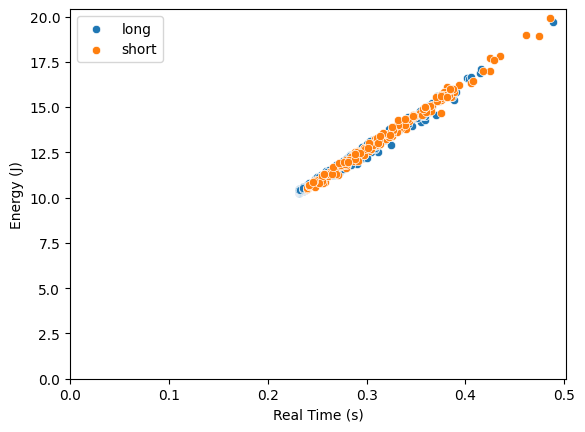

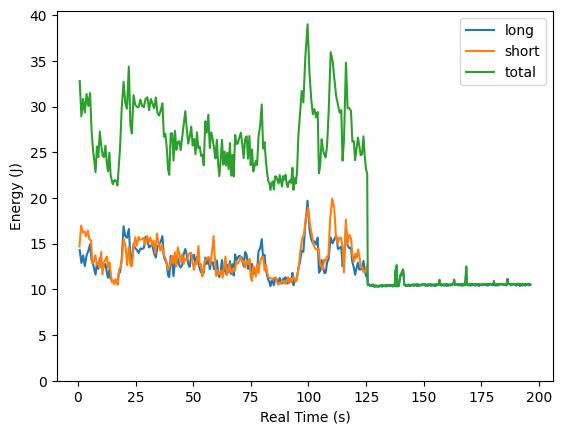

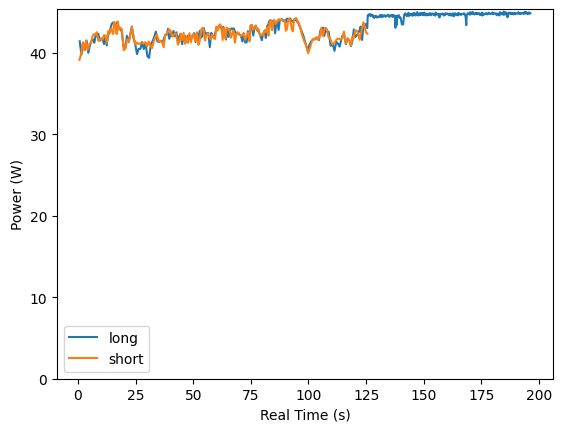

In [33]:
#real, user, energy, energy_user, est, t = getxy([(746238429, 377328315, 30093673, 30093673, 16), (745723677, 379604637, 29633958, 29633958, 16), (644036935, 334497533, 26533990, 26533990, 16), (671942538, 347722031, 27071708, 27071708, 16), (607995512, 299972155, 24741209, 24741209, 16), (579989617, 293352239, 23860840, 23860839, 16), (603991768, 298521138, 24651365, 24651365, 16), (629341513, 311841349, 26120111, 26120111, 16), (610681775, 299306457, 25438167, 25438166, 16), (675955341, 315107662, 27536124, 27536124, 16), (659992072, 302918195, 26596489, 26596488, 16), (668044303, 326224939, 27540091, 27540091, 16), (643987486, 336862498, 26722526, 26722525, 16), (651949144, 333262345, 26658135, 26658135, 16), (563989719, 281188568, 23215150, 23215150, 16), (528047081, 263991542, 22327518, 22327517, 16), (651978970, 326487874, 27147209, 27147209, 16), (599951931, 314591800, 24477354, 24477354, 16), (648042687, 333979094, 26889213, 26889213, 16), (675946836, 335084326, 27452262, 27452262, 16), (672031395, 329983753, 27789724, 27789724, 16), (603964957, 289389082, 24835080, 24835080, 16), (623983770, 300011139, 25160275, 25160274, 16), (580022896, 280900289, 24466978, 24466977, 16), (628006773, 314555295, 26194635, 26194635, 16), (598742856, 302142688, 25059079, 25059078, 16), (581250787, 302143675, 24601805, 24601805, 16), (560005902, 298741168, 23613953, 23613953, 16), (579963512, 308730788, 24514402, 24514402, 16), (548001676, 284190337, 22853274, 22853274, 16), (599943274, 307998805, 24609251, 24609250, 16), (647996195, 321211794, 26818352, 26818351, 16), (616030018, 311227720, 26035395, 26035395, 16), (636008962, 321666162, 26546563, 26546563, 16), (615990163, 321580508, 25728084, 25728084, 16), (631947605, 323962647, 26174310, 26174309, 16), (532016772, 270651386, 22410587, 22410586, 16), (623996425, 315206870, 26227655, 26227655, 16), (664008408, 340217982, 27628958, 27628957, 16), (671991438, 333449973, 28072072, 28072072, 16), (639955230, 321238231, 26627556, 26627556, 16), (655991449, 312232647, 26762566, 26762565, 16), (639991766, 318991908, 26184870, 26184869, 16), (568037176, 283713831, 24293090, 24293090, 16), (751947868, 384259459, 30510847, 30510847, 16), (684021518, 324635556, 28829883, 28829883, 16), (615999537, 294224276, 26126520, 26126520, 16), (672003895, 332402225, 28312427, 28312426, 16), (631983685, 319436254, 26487725, 26487725, 16), (627958482, 327269175, 26000056, 26000055, 16), (620042743, 304103872, 26143365, 26143365, 16), (703967650, 356378572, 28942004, 28942004, 16), (723992655, 364457048, 29901596, 29901595, 16), (695376030, 347682739, 28367664, 28367664, 16), (640591407, 312005336, 26425836, 26425836, 16), (639988177, 304734256, 25950434, 25950434, 16), (568030446, 272535737, 24253722, 24253721, 16), (700002454, 352947015, 29392869, 29392869, 16), (719985485, 383771465, 29815231, 29815231, 16), (691954157, 336285119, 27682241, 27682240, 16), (676039178, 348045814, 28009816, 28009816, 16), (627944507, 318309526, 26029596, 26029595, 16), (643990687, 326963773, 26377985, 26377985, 16), (596035537, 308655917, 25101682, 25101682, 16), (571948857, 289493153, 23760559, 23760559, 16), (591988888, 289577311, 24596861, 24596861, 16), (612152932, 290054671, 26045161, 26045161, 16), (559865038, 270985678, 23794861, 23794860, 16), (659989547, 309893244, 27918752, 27918752, 16), (683992140, 316571040, 28413440, 28413440, 16), (559989491, 262653000, 23861084, 23861084, 16), (620008853, 307367432, 26224176, 26224176, 16), (580002316, 283292830, 24652952, 24652952, 16), (543949582, 269301448, 22595340, 22595339, 16), (656032038, 323430163, 27752370, 27752370, 16), (563953850, 279278704, 23385682, 23385682, 16), (507995003, 253622530, 21561590, 21561590, 16), (512042804, 254471420, 22339176, 22339176, 16), (479985353, 240994427, 21013740, 21013740, 16), (511954257, 257054150, 21786870, 21786870, 16), (567993018, 278788404, 23881714, 23881714, 16), (504033159, 252921198, 21850042, 21850042, 16), (503959364, 251462346, 21349554, 21349554, 16), (488031026, 244440807, 21211005, 21211005, 16), (511990423, 256242090, 22322086, 22322086, 16), (511990941, 255571554, 22298100, 22298100, 16), (516002192, 259089039, 22449283, 22449283, 16), (507960200, 254521634, 21497199, 21497199, 16), (512027790, 255424256, 22373539, 22373539, 16), (499948941, 249361361, 21267768, 21267768, 16), (485989198, 242372293, 21374152, 21374151, 16), (505999511, 254100610, 21534307, 21534307, 16), (508035465, 252745665, 22150884, 22150884, 16), (511991895, 256273554, 22339176, 22339176, 16), (559959518, 271091103, 23892151, 23892151, 16), (514034670, 253088331, 22110784, 22110784, 16), (517945969, 261223646, 21947148, 21947148, 16), (515994066, 257116356, 21986760, 21986759, 16), (507994567, 254480327, 21525336, 21525336, 16), (536032729, 269467618, 23266237, 23266237, 16), (495956728, 247053426, 21126533, 21126532, 16), (532978117, 262731652, 23175295, 23175295, 16), (487046510, 244917817, 21358404, 21358404, 16), (515990489, 257928374, 22501103, 22501103, 16), (539956675, 271795868, 22980348, 22980348, 16), (492032339, 244749830, 21538092, 21538092, 16), (480006479, 240768480, 21067695, 21067695, 16), (503989762, 252960000, 21988041, 21988041, 16), (511999630, 255587293, 22455021, 22455021, 16), (519982364, 259086538, 22685489, 22685489, 16), (507998467, 254494629, 22188481, 22188481, 16), (507992391, 252207108, 22177982, 22177982, 16), (511993851, 257022826, 22316289, 22316289, 16), (511983399, 255991777, 22302616, 22302615, 16), (511992600, 256491393, 22413456, 22413456, 16), (512003384, 255080201, 22418704, 22418703, 16), (507955743, 254451776, 21527594, 21527594, 16), (543994969, 269738672, 23112246, 23112245, 16), (508034753, 255427028, 22183659, 22183658, 16), (503981815, 251736836, 22029302, 22029302, 16), (535962949, 267128574, 22706668, 22706667, 16), (511994539, 255497587, 21744756, 21744756, 16), (507995540, 255021288, 21704778, 21704778, 16), (528032207, 263955042, 22948305, 22948304, 16), (543991083, 270441018, 23629090, 23629089, 16), (568458129, 274955003, 24442809, 24442809, 16), (751500533, 368908315, 31013470, 31013470, 16), (687989111, 335455194, 28592395, 28592395, 16), (763988402, 341197944, 31474407, 31474407, 16), (751978213, 352232545, 30296858, 30296858, 16), (716026999, 351475269, 29733018, 29733018, 16), (719986597, 359481179, 29877548, 29877548, 16), (652017383, 326116508, 27176871, 27176871, 16), (607944186, 303984588, 25217648, 25217648, 16), (676024222, 340795624, 28630969, 28630969, 16), (639961693, 328200643, 26590753, 26590753, 16), (595990977, 295233210, 24629209, 24629209, 16), (671994433, 331212074, 27635366, 27635366, 16), (580033091, 297485362, 24811765, 24811764, 16), (551956072, 281345996, 23442628, 23442628, 16), (552037034, 276237223, 23703613, 23703613, 16), (655944787, 328136182, 26893852, 26893852, 16), (583995353, 299864148, 24498412, 24498412, 16), (563991262, 282711096, 23790894, 23790894, 16), (512028158, 256247583, 22520512, 22520512, 16), (515957236, 256024051, 22233646, 22233646, 16), (504031878, 253053450, 22024357, 22024357, 16), (519960845, 259816352, 22623355, 22623355, 16), (768000031, 402419907, 31759989, 31759989, 16), (716008196, 364502715, 29768051, 29768051, 16), (672010523, 336681655, 28022389, 28022389, 16), (651948953, 320761656, 27182426, 27182426, 16), (648038237, 299617945, 27387503, 27387503, 16), (675944309, 311683350, 28172658, 28172658, 16), (655996503, 307495513, 27454031, 27454031, 16), (639990631, 304742316, 26698479, 26698479, 16), (624000365, 294498163, 25680476, 25680476, 16), (617963164, 290111833, 26237115, 26237115, 16), (626047760, 298088172, 26478448, 26478448, 16), (617288710, 297430858, 26173273, 26173273, 16), (638669795, 300302932, 26624505, 26624505, 16), (614017658, 301669820, 26255609, 26255608, 16), (518564704, 258798747, 22574771, 22574771, 16), (607455564, 286153178, 26119257, 26119257, 16), (619924880, 297973456, 25744258, 25744258, 16), (588034684, 288497871, 25323177, 25323177, 16), (575951760, 283466731, 24112487, 24112487, 16), (568034537, 278466493, 24450316, 24450316, 16), (548009532, 270741503, 23729187, 23729187, 16), (603978904, 301036078, 25770198, 25770197, 16), (603952506, 289998926, 25224727, 25224727, 16), (612047872, 306743604, 26143427, 26143427, 16), (635937743, 321227554, 26530450, 26530450, 16), (727991690, 350133745, 29581772, 29581772, 16), (740032919, 356122398, 30666974, 30666973, 16), (747992566, 369899806, 30929670, 30929670, 16), (714836183, 366161076, 29767868, 29767867, 16), (773113893, 397261116, 31629069, 31629069, 16), (744023619, 364034432, 30800519, 30800519, 16), (723959489, 362067319, 29537461, 29537461, 16), (712013375, 348870851, 29738755, 29738754, 16), (636026353, 338957737, 27076652, 27076651, 16), (615942204, 319858583, 26023737, 26023737, 16), (740017927, 375019768, 30673750, 30673750, 16), (727994076, 368734587, 30302413, 30302413, 16), (723991803, 361389538, 30092513, 30092513, 16), (735995295, 365384279, 30565535, 30565535, 16), (660018477, 318537811, 27517324, 27517323, 16), (611983210, 305267549, 25994929, 25994929, 16), (635983785, 319904063, 27096122, 27096121, 16), (543990479, 276092249, 23737549, 23737549, 16), (588001804, 292746465, 25145260, 25145260, 16), (564001289, 288592799, 24426695, 24426695, 16), (603954758, 305477844, 25607479, 25607479, 16), (649655503, 328676443, 27680471, 27680471, 16), (626333788, 316836080, 26197138, 26197137, 16), (595989840, 297520449, 24838498, 24838498, 16), (468573550, 267755273, 20036265, 20036265, 16), (241929214, 240097607, 10746799, 10746799, 16), (241856696, 243863218, 10749057, 10749057, 16), (241946041, 240099386, 10746127, 10746127, 16), (241811138, 243819121, 10729892, 10729892, 16), (241925972, 240110866, 10745761, 10745761, 16), (241866080, 240112634, 10776217, 10776217, 16), (241890490, 243850246, 10767856, 10767856, 16), (241857164, 240108021, 10720005, 10720005, 16), (241876955, 243864424, 10743319, 10743319, 16), (241831953, 240110943, 10725620, 10725620, 16), (241864049, 243851528, 10763583, 10763583, 16), (241885098, 240104245, 10804355, 10804355, 16), (241891367, 243854613, 10746310, 10746310, 16), (241888580, 240114730, 10766574, 10766574, 16), (241926196, 243854094, 10700046, 10700046, 16), (241873973, 240086780, 10742404, 10742404, 16), (241848351, 243854335, 10703952, 10703952, 16), (241856215, 240099699, 10749362, 10749361, 16), (241881494, 243860330, 10745273, 10745273, 16), (241859609, 240112547, 10773043, 10773043, 16), (241887140, 243844056, 10766635, 10766635, 16), (241868635, 240091819, 10752658, 10752658, 16), (241870294, 240107359, 10753818, 10753818, 16), (241888235, 243853845, 10769382, 10769382, 16), (241863724, 240107960, 10742282, 10742282, 16), (241893278, 243864926, 10723239, 10723239, 16), (241829654, 240111473, 10749545, 10749544, 16), (241895750, 243855106, 10757541, 10757541, 16), (241868708, 240080081, 10767245, 10767245, 16), (241861947, 243859948, 10732456, 10732456, 16), (241827612, 240110129, 10744052, 10744052, 16), (241831751, 243853172, 10735385, 10735385, 16), (241843024, 240112037, 10750949, 10750949, 16), (241902180, 243812420, 10750155, 10750155, 16), (241926716, 240058960, 10782199, 10782198, 16), (241963552, 243825896, 10778537, 10778537, 16), (241937581, 240116777, 10757419, 10757419, 16), (241912326, 243848399, 10782138, 10782138, 16), (241897134, 240113418, 10780246, 10780246, 16), (241886493, 240108943, 10759494, 10759493, 16), (241894247, 243811566, 10758944, 10758944, 16), (241859073, 240114782, 10737705, 10737704, 16), (241867812, 243862282, 10775851, 10775851, 16), (241969606, 240116006, 10775851, 10775851, 16), (241906239, 243879794, 10782321, 10782321, 16), (244113217, 243910854, 10870029, 10870029, 16), (245483785, 243839099, 10956637, 10956637, 16), (241816479, 243851825, 10775119, 10775119, 16), (241854857, 240113472, 10722628, 10722628, 16), (241799566, 243860144, 10774631, 10774631, 16), (241901063, 240114189, 10781772, 10781771, 16), (241885853, 243859518, 10757296, 10757296, 16), (250196667, 244608701, 11151156, 11151156, 16), (261625596, 259614156, 11615205, 11615205, 16), (471877584, 443796349, 19450023, 19450023, 16), (371941418, 348724771, 15320640, 15320640, 16), (396002379, 371220949, 16468647, 16468647, 16), (333341421, 311041093, 14362023, 14362022, 16), (303816845, 294898437, 13194058, 13194057, 16), (242141451, 237496278, 10875095, 10875095, 16), (244879272, 243153616, 11011446, 11011446, 16), (242780155, 237754220, 10895907, 10895907, 16), (243549657, 240785569, 10920321, 10920321, 16), (274440702, 267926092, 12106049, 12106049, 16), (240831042, 237914212, 10830782, 10830782, 16), (243492964, 240980626, 10912997, 10912997, 16), (241264609, 237756744, 10834934, 10834934, 16), (241092086, 238323920, 10823458, 10823458, 16), (246386462, 245223475, 11060702, 11060702, 16), (245416680, 241857125, 10986971, 10986971, 16), (242242546, 243327159, 10843539, 10843539, 16), (241872473, 240035019, 10856235, 10856234, 16), (242354366, 243883280, 10808810, 10808810, 16), (242393177, 243836715, 10824252, 10824252, 16), (242302030, 240087750, 10852023, 10852023, 16), (242367195, 243890766, 10810214, 10810214, 16), (242402970, 240134909, 10799899, 10799899, 16), (242353974, 243879274, 10828952, 10828952, 16), (242361043, 243895305, 10812106, 10812106, 16), (242316338, 240122139, 10816257, 10816257, 16), (242343071, 243893438, 10832980, 10832980, 16), (242387505, 240137551, 10804659, 10804659, 16), (242387084, 243886582, 10802036, 10802036, 16), (242334535, 243878502, 10857821, 10857821, 16), (242436414, 240142891, 10808627, 10808627, 16), (242371723, 243890888, 10825473, 10825473, 16), (242409988, 240134786, 10802585, 10802584, 16), (242319782, 243861569, 10778292, 10778292, 16), (242421107, 243898719, 10839511, 10839511, 16), (242273465, 240141516, 10786166, 10786166, 16), (242365196, 243881323, 10812168, 10812168, 16), (242352164, 240143505, 10843173, 10843173, 16), (242374515, 243878790, 10832858, 10832858, 16), (242417732, 240142950, 10806429, 10806429, 16), (242412463, 243884232, 10782321, 10782321, 16), (242368610, 243894624, 10824252, 10824252, 16), (242334687, 240138364, 10860324, 10860323, 16), (242330763, 243890004, 10833469, 10833469, 16), (242404843, 240141036, 10832613, 10832613, 16), (242403780, 243848952, 10843845, 10843845, 16), (242361279, 243891594, 10829501, 10829501, 16), (242297209, 240141762, 10861788, 10861787, 16), (242361824, 243886297, 10812229, 10812229, 16), (242368169, 240132470, 10806124, 10806124, 16), (242364652, 243892908, 10861118, 10861118, 16), (242372632, 243887714, 10808444, 10808444, 16), (242409323, 240143656, 10819979, 10819979, 16), (242321713, 243877215, 10845431, 10845431, 16), (242321767, 240139914, 10843723, 10843723, 16), (242434131, 243899364, 10830721, 10830721, 16), (242406668, 243892892, 10824435, 10824435, 16), (310848696, 302140148, 13392117, 13392117, 16), (242383762, 243888644, 10827609, 10827609, 16), (242303322, 240128644, 10832797, 10832796, 16), (242264091, 243831246, 10847262, 10847262, 16), (242283071, 243887444, 10810763, 10810763, 16), (242353619, 240142035, 10816684, 10816684, 16), (242339109, 243882224, 10851535, 10851535, 16), (242303160, 240141117, 10811679, 10811679, 16), (242311979, 243878583, 10821444, 10821444, 16), (242285524, 240120259, 10863315, 10863315, 16), (242313648, 243891688, 10809664, 10809664, 16), (242305766, 243888224, 10804477, 10804477, 16), (242278786, 240131733, 10850985, 10850985, 16), (242343552, 243849248, 10838291, 10838291, 16), (242346475, 240122440, 10814486, 10814486, 16), (242284510, 243889125, 10847018, 10847018, 16), (242340576, 243888016, 10810947, 10810947, 16), (242343781, 240142959, 10807040, 10807040, 16), (242342923, 243894168, 10859652, 10859652, 16), (242313311, 240143653, 10810825, 10810825, 16), (242339579, 243888148, 10824313, 10824313, 16), (242314407, 240138456, 10862582, 10862582, 16), (242324849, 243883738, 10823886, 10823886, 16), (242304408, 243884720, 10838900, 10838900, 16), (242242977, 240118522, 10819980, 10819980, 16), (242322942, 243858413, 10873446, 10873446, 16), (242302070, 240102987, 10833224, 10833224, 16), (252149440, 251747794, 11214205, 11214205, 16), (242308091, 243880786, 10848971, 10848971, 16), (242262160, 243859966, 10831210, 10831210, 16), (242274266, 240135361, 10837070, 10837070, 16), (242361454, 243895812, 10847445, 10847445, 16), (242275626, 240140829, 10827975, 10827975, 16), (242370735, 243859064, 10822177, 10822177, 16), (242327041, 240135146, 10833224, 10833223, 16), (242373717, 243876794, 10879123, 10879123, 16), (242347781, 243886925, 10826022, 10826022, 16), (242240936, 240107765, 10828341, 10828341, 16), (242286136, 243887263, 10873264, 10873264, 16), (242261143, 240138214, 10845309, 10845308, 16), (242339787, 243657188, 10838900, 10838900, 16), (243473230, 243366718, 10921786, 10921786, 16), (267670480, 260541533, 11882782, 11882782, 16), (266156928, 257755803, 11892670, 11892670, 16), (273404797, 273630836, 12008819, 12008819, 16), (276433810, 275810506, 12141998, 12141997, 16), (276131228, 275774955, 12082061, 12082061, 16), (275065083, 272157148, 12053680, 12053679, 16), (247824927, 247400228, 11063815, 11063815, 16), (242437699, 243829334, 10853244, 10853244, 16), (242372600, 243891389, 10820162, 10820162, 16), (242416812, 240142742, 10872348, 10872348, 16), (242343117, 243881514, 10834445, 10834445, 16), (242368897, 240144611, 10863925, 10863925, 16), (242364800, 243886270, 10825595, 10825595, 16), (242436691, 243874682, 10828646, 10828646, 16), (242389152, 240126014, 10866550, 10866550, 16), (242422825, 243886286, 10841891, 10841891, 16), (242366246, 240144624, 10861239, 10861239, 16), (242426796, 243897206, 10840487, 10840487, 16), (242367602, 243891389, 10822360, 10822360, 16), (242342251, 240097816, 10891574, 10891573, 16), (242314395, 243878343, 10840243, 10840243, 16), (242378316, 240143602, 10845676, 10845676, 16), (242342571, 243873678, 10869540, 10869540, 16), (242337889, 243871401, 10851046, 10851046, 16), (242404629, 240146654, 10833713, 10833713, 16), (242440761, 243887693, 10870333, 10870333, 16), (242383582, 240139740, 10826999, 10826999, 16), (242437580, 243899256, 10899813, 10899813, 16), (242360255, 243872481, 10842990, 10842990, 16), (242399990, 240144584, 10845920, 10845920, 16), (242409518, 243897229, 10852938, 10852938, 16), (242356328, 240120252, 10839328, 10839328, 16), (242379609, 243867474, 10882845, 10882845, 16), (241261374, 239707602, 10786899, 10786899, 16), (240235542, 239981301, 10726962, 10726962, 16), (240195531, 239985361, 10742099, 10742099, 16), (240168803, 240007523, 10707798, 10707798, 16), (240252519, 240009065, 10758273, 10758273, 16), (240244387, 240011101, 10708469, 10708469, 16), (240180656, 240009625, 10733493, 10733493, 16), (240270662, 239999809, 10709811, 10709810, 16), (240194391, 239999127, 10755466, 10755466, 16), (240246030, 240012225, 10729831, 10729831, 16), (240224123, 239958539, 10732333, 10732333, 16), (240203996, 239977885, 10725192, 10725192, 16), (240198034, 240007440, 10769931, 10769931, 16), (240158273, 240013778, 10737766, 10737766, 16), (249350474, 247941926, 11061678, 11061678, 16), (240339396, 239987819, 10723361, 10723360, 16), (240289318, 240016395, 10764438, 10764438, 16), (240257916, 243760788, 10726230, 10726230, 16), (240251136, 240009061, 10724765, 10724764, 16), (240224862, 240005510, 10726047, 10726047, 16), (240229049, 239997747, 10765658, 10765658, 16), (240940608, 240026705, 10760226, 10760226, 16), (240236221, 239985384, 10747715, 10747714, 16), (240208598, 240012958, 10726046, 10726046, 16), (240354493, 239981881, 10740146, 10740146, 16), (240202211, 240009759, 10761325, 10761325, 16), (240272435, 240013339, 10730380, 10730380, 16), (240210605, 240004798, 10724460, 10724460, 16), (240211002, 240010676, 10737094, 10737094, 16), (240223990, 240221000, 10736911, 10736911, 16), (240207386, 243539980, 10781406, 10781406, 16), (240218285, 240003526, 10739413, 10739413, 16), (240309413, 239994105, 10743320, 10743320, 16), (240178401, 240009651, 10748447, 10748447, 16), (240239861, 240001548, 10779757, 10779757, 16), (240179138, 239999247, 10737705, 10737705, 16), (240184621, 239962215, 10745150, 10745150, 16), (240274100, 240012909, 10742038, 10742038, 16), (240235310, 240011490, 10759067, 10759067, 16), (240252452, 240012140, 10726535, 10726535, 16), (240387806, 240015389, 10739780, 10739780, 16), (240219209, 240012028, 10768588, 10768588, 16), (240203241, 240003080, 10746859, 10746859, 16), (240191918, 239987308, 10750095, 10750095, 16), (240226212, 240012530, 10754794, 10754794, 16), (240213704, 240008024, 10754672, 10754672, 16), (240244117, 240012371, 10768283, 10768283, 16), (240218234, 243746284, 10793674, 10793674, 16), (280673554, 272917642, 12316802, 12316802, 16), (240168198, 239978598, 10781833, 10781832, 16), (240225108, 240006642, 10757662, 10757662, 16), (240239271, 239965026, 10735447, 10735447, 16), (240169705, 240002411, 10751132, 10751132, 16), (240128781, 239983966, 10766208, 10766208, 16), (240206492, 240008741, 10794039, 10794039, 16), (240149535, 239994836, 10732761, 10732761, 16), (240204058, 240010152, 10735324, 10735324, 16), (240183545, 239980870, 10738681, 10738681, 16), (240208572, 240010784, 10721774, 10721774, 16), (240167563, 240008781, 10764255, 10764254, 16), (240201267, 240002521, 10725192, 10725192, 16), (240214390, 239980830, 10739658, 10739658, 16), (240196827, 240003427, 10737521, 10737521, 16), (240183566, 240009833, 10738437, 10738437, 16), (240105942, 239995803, 10751743, 10751743, 16), (240198141, 239988406, 10777621, 10777621, 16), (240232856, 243760952, 10743808, 10743808, 16), (240248450, 240012843, 10767367, 10767366, 16), (240183557, 240004923, 10733432, 10733431, 16), (240150218, 240000467, 10745517, 10745517, 16), (240188409, 240000390, 10771091, 10771091, 16), (240189431, 240009678, 10778781, 10778780, 16), (240178703, 240008509, 10754733, 10754733, 16), (240243900, 239981286, 10728671, 10728671, 16), (240226115, 240000779, 10778293, 10778293, 16), (240227469, 240012250, 10753085, 10753084, 16), (240199031, 239995733, 10742099, 10742099, 16), (240182017, 240007568, 10756076, 10756076, 16), (240251849, 239981599, 10740878, 10740878, 16), (240247057, 240010072, 10787815, 10787815, 16), (240216952, 240012136, 10749118, 10749118, 16), (240224147, 240006366, 10751986, 10751986, 16), (240224822, 240003959, 10735507, 10735507, 16), (240222477, 240012100, 10782199, 10782199, 16), (240203576, 243761417, 10739170, 10739170, 16), (240172361, 239991601, 10735263, 10735263, 16), (240172401, 239959488, 10732699, 10732699, 16), (240222239, 240008711, 10742343, 10742343, 16), (240206076, 240009939, 10779636, 10779636, 16), (240180883, 240009350, 10738437, 10738437, 16), (240203746, 240009879, 10736850, 10736850, 16), (240220078, 239951759, 10759494, 10759494, 16), (240231376, 239953936, 10744845, 10744845, 16), (240164475, 239966249, 10794345, 10794345, 16), (240214338, 240009365, 10758151, 10758151, 16), (240200360, 240001093, 10734836, 10734836, 16), (240166343, 240006890, 10757114, 10757114, 16), (240277430, 240006001, 10766818, 10766818, 16), (240211663, 239960537, 10749362, 10749362, 16), (240184170, 239999601, 10746921, 10746921, 16), (240189533, 240009941, 10767245, 10767245, 16), (240221157, 240008497, 10742404, 10742404, 16), (240177686, 240001651, 10784213, 10784213, 16), (240176145, 240002675, 10742160, 10742160, 16), (240208868, 243758530, 10761936, 10761936, 16), (240216280, 240012722, 10770846, 10770846, 16), (240210639, 240004176, 10777316, 10777316, 16), (240168740, 239970683, 10739047, 10739047, 16), (240232557, 240012023, 10801364, 10801363, 16), (240241990, 240013508, 10761753, 10761753, 16), (240247727, 240007557, 10770419, 10770419, 16), (240297278, 239986230, 10752231, 10752230, 16), (240244276, 240003547, 10749179, 10749178, 16), (240258638, 240014941, 10759555, 10759555, 16), (240197989, 240004981, 10765353, 10765353, 16), (240238302, 240005958, 10794223, 10794223, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(771997712, 378233088, 30666364, 30666364, 16), (704018267, 345472932, 28425342, 28425341, 16), (663990141, 319473174, 27335379, 27335378, 16), (663994096, 321975556, 27145255, 27145255, 16), (659965875, 333308442, 26815239, 26815239, 16), (652024430, 326485947, 27097465, 27097465, 16), (644848588, 322372347, 26859489, 26859489, 16), (639111794, 317766824, 26042780, 26042779, 16), (599990261, 319097143, 24406371, 24406371, 16), (652000835, 344819736, 26340569, 26340569, 16), (644025452, 347656364, 26564141, 26564141, 16), (635981001, 313133378, 26366815, 26366815, 16), (619992118, 299689038, 25780879, 25780879, 16), (623974289, 308708101, 25160824, 25160824, 16), (599991746, 302379021, 24716123, 24716122, 16), (563995207, 280824281, 23509523, 23509523, 16), (603993619, 298637466, 24529722, 24529722, 16), (616026269, 294249680, 25744502, 25744502, 16), (656004618, 319728716, 27169059, 27169059, 16), (651952383, 326347672, 26418145, 26418145, 16), (596019609, 306735580, 24706297, 24706297, 16), (608004823, 315992711, 25471431, 25471431, 16), (611034530, 314411170, 25541500, 25541500, 16), (604943673, 315148029, 25427852, 25427852, 16), (619988440, 306655112, 25905268, 25905267, 16), (602405199, 299323007, 25216244, 25216244, 16), (625596019, 298345416, 26385980, 26385980, 16), (591984469, 277743573, 25033811, 25033810, 16), (712000025, 333183692, 29850387, 29850387, 16), (587990968, 288994741, 24899106, 24899105, 16), (560000193, 274239897, 23655152, 23655152, 16), (543967007, 270246487, 22235112, 22235111, 16), (616021724, 307821134, 25776301, 25776301, 16), (595964207, 295123210, 24353331, 24353330, 16), (630617219, 298896490, 26413018, 26413017, 16), (681372298, 330084931, 27888479, 27888479, 16), (592034194, 296357604, 25237606, 25237606, 16), (639986156, 316293565, 26755730, 26755730, 16), (603959910, 295442530, 24547544, 24547544, 16), (608034646, 306232058, 25268002, 25268002, 16), (623996366, 313991604, 26161981, 26161980, 16), (635954137, 332483866, 25818843, 25818843, 16), (623993774, 309994732, 25693537, 25693537, 16), (607991018, 294489606, 25266049, 25266049, 16), (644029519, 317143136, 26427606, 26427606, 16), (567997686, 294077918, 24133483, 24133483, 16), (571953208, 304741854, 23738648, 23738648, 16), (584029930, 290489828, 24770505, 24770504, 16), (619993243, 316324484, 25855220, 25855220, 16), (567987596, 274496301, 24043823, 24043823, 16), (631985087, 308975314, 26400994, 26400994, 16), (687968202, 347323593, 28252430, 28252430, 16), (714184956, 350378504, 29408372, 29408372, 16), (749328577, 377331447, 30581526, 30581526, 16), (672464557, 340585735, 27467520, 27467520, 16), (647998591, 337904315, 26676507, 26676507, 16), (563990290, 292211075, 23366090, 23366090, 16), (560540668, 287927927, 23928162, 23928162, 16), (663500859, 299046247, 27713003, 27713003, 16), (647931961, 312087004, 25945734, 25945734, 16), (700038075, 356882598, 28958177, 28958177, 16), (659978942, 321645155, 27344474, 27344474, 16), (659988960, 326395155, 27589468, 27589468, 16), (619996980, 300729736, 25980890, 25980890, 16), (627988535, 304296033, 26479974, 26479974, 16), (623972287, 310154098, 25973139, 25973139, 16), (572032875, 296999321, 24215087, 24215087, 16), (583991314, 309373888, 24681456, 24681456, 16), (559953345, 286560793, 23401490, 23401490, 16), (651994601, 355886809, 26478203, 26478203, 16), (592025711, 310516612, 24755735, 24755734, 16), (587960522, 315017888, 24604490, 24604489, 16), (608035291, 303137002, 25693171, 25693171, 16), (596003309, 302270715, 25357663, 25357663, 16), (567979951, 289221207, 24383238, 24383238, 16), (603960221, 307018518, 24796995, 24796995, 16), (512027088, 256401115, 22059758, 22059757, 16), (504000626, 252867277, 21983281, 21983281, 16), (511989578, 256687576, 22302372, 22302371, 16), (499962172, 250302074, 21395026, 21395026, 16), (524026371, 260316903, 22777286, 22777286, 16), (539961493, 274088508, 22648196, 22648196, 16), (512027026, 255932380, 22329777, 22329777, 16), (539961887, 269239806, 22980959, 22980959, 16), (508003162, 254295960, 21606756, 21606755, 16), (508017815, 254228434, 22149724, 22149724, 16), (511996788, 256409516, 22284061, 22284061, 16), (515961798, 256373821, 21812627, 21812627, 16), (495994232, 247912900, 21152473, 21152472, 16), (491993981, 245440818, 21089362, 21089361, 16), (480033148, 240469241, 21066779, 21066778, 16), (511988149, 255742932, 22392582, 22392582, 16), (511998593, 256768454, 22304753, 22304753, 16), (495958826, 249476972, 21219489, 21219489, 16), (512028988, 255471634, 22284367, 22284367, 16), (584005375, 295287619, 25151241, 25151241, 16), (499948081, 250508530, 21333381, 21333381, 16), (503994071, 252714518, 21378852, 21378852, 16), (507992410, 252465989, 21484564, 21484564, 16), (512027453, 255974835, 22321049, 22321049, 16), (511993970, 255519899, 22216678, 22216678, 16), (511962873, 256722857, 21903753, 21903753, 16), (496031800, 250436819, 21607977, 21607977, 16), (503992592, 252063309, 22082951, 22082950, 16), (491961380, 245408336, 20930915, 20930915, 16), (513857545, 255664003, 22273197, 22273197, 16), (506163163, 252826129, 22178166, 22178166, 16), (512001573, 254667836, 22450016, 22450016, 16), (479994288, 241023327, 21037482, 21037482, 16), (487993029, 245107589, 21353217, 21353217, 16), (507957565, 252892690, 21661383, 21661383, 16), (515994156, 258276127, 21848028, 21848028, 16), (488028276, 244488190, 21375007, 21375007, 16), (503960771, 251916416, 21379278, 21379278, 16), (511995138, 255749279, 21697698, 21697698, 16), (484025534, 241485466, 21262152, 21262152, 16), (492016827, 247498604, 21603766, 21603765, 16), (515990439, 257510949, 22489322, 22489322, 16), (519989135, 261484738, 22622623, 22622623, 16), (511989158, 255250396, 22287968, 22287968, 16), (511951484, 256739142, 21737615, 21737615, 16), (504036003, 253283907, 22038518, 22038518, 16), (499994317, 249783040, 21776739, 21776739, 16), (483990095, 242000131, 21227057, 21227057, 16), (524001324, 260464408, 22853396, 22853396, 16), (515950957, 257025286, 21769232, 21769232, 16), (628040597, 309807866, 27047599, 27047598, 16), (775945521, 378555858, 31951273, 31951273, 16), (704564587, 342995075, 29404527, 29404526, 16), (685949405, 367433514, 28721118, 28721118, 16), (781440755, 424573732, 31681132, 31681132, 16), (712030993, 361499365, 29527146, 29527146, 16), (731986268, 364494018, 30357283, 30357283, 16), (707993459, 354009522, 29464524, 29464523, 16), (603958247, 301233168, 25273190, 25273190, 16), (592031270, 294217428, 25217038, 25217038, 16), (591990802, 284949628, 25235348, 25235348, 16), (663995551, 337741694, 27869130, 27869130, 16), (595956746, 300740051, 24889035, 24889034, 16), (580025378, 286489633, 24621030, 24621030, 16), (535957940, 263147262, 22534550, 22534550, 16), (588038672, 292467013, 25238033, 25238033, 16), (671953035, 334294672, 28303334, 28303334, 16), (595993247, 290796016, 25287899, 25287898, 16), (556036449, 276013620, 23916870, 23916869, 16), (481530024, 240069107, 20956001, 20956001, 16), (482442560, 242114706, 21256659, 21256659, 16), (524002957, 263477326, 22885745, 22885745, 16), (503959034, 250200697, 21657965, 21657965, 16), (660040101, 315776328, 28281543, 28281543, 16), (727944866, 345416650, 29646348, 29646347, 16), (714869580, 353796897, 29609604, 29609604, 16), (637117326, 326692662, 26374627, 26374627, 16), (647993760, 340291246, 26622002, 26622002, 16), (600034750, 326045922, 25413509, 25413509, 16), (551982681, 293724737, 23405336, 23405336, 16), (620012022, 324742458, 26286065, 26286065, 16), (615945257, 327216991, 25521297, 25521297, 16), (631995995, 334948286, 26119135, 26119135, 16), (644020000, 341729925, 27225516, 27225516, 16), (608008631, 315482373, 25850581, 25850581, 16), (659992879, 343458240, 27834096, 27834096, 16), (587991225, 306989493, 25046079, 25046078, 16), (563958454, 285399631, 23591981, 23591981, 16), (548040563, 266980435, 24053527, 24053527, 16), (667947174, 354524159, 27645742, 27645742, 16), (550545193, 283139938, 23570069, 23570069, 16), (585436790, 296318908, 24558897, 24558897, 16), (580025783, 296960265, 24905271, 24905270, 16), (563960512, 287223651, 23758850, 23758849, 16), (595995648, 299716661, 25426510, 25426510, 16), (584027019, 295426808, 24890073, 24890073, 16), (543997832, 282235938, 23388368, 23388368, 16), (579981801, 285739197, 24825132, 24825132, 16), (632004719, 316492610, 26738762, 26738762, 16), (743961713, 384413630, 30077315, 30077314, 16), (756023537, 395211728, 31304424, 31304424, 16), (739968244, 372043756, 30143966, 30143966, 16), (720031101, 348958216, 29996383, 29996382, 16), (731994510, 354269295, 30107345, 30107344, 16), (731951158, 375275700, 29658188, 29658187, 16), (735992243, 367245143, 29963241, 29963241, 16), (650895532, 332591608, 27252006, 27252006, 16), (593137828, 278582683, 25374080, 25374080, 16), (583993294, 279725510, 25095151, 25095150, 16), (711946124, 352246736, 28305958, 28305958, 16), (712024927, 345773635, 29539414, 29539413, 16), (699959049, 349339314, 28698230, 28698230, 16), (707992970, 364084035, 29088853, 29088852, 16), (707995132, 361920185, 29163256, 29163256, 16), (623992635, 317194863, 26025751, 26025751, 16), (607995017, 299005072, 25564327, 25564327, 16), (524019620, 259002391, 22560977, 22560977, 16), (616006639, 302879188, 26493585, 26493585, 16), (552140667, 271141204, 23859313, 23859312, 16), (547832880, 272487437, 23745057, 23745057, 16), (619966985, 300143839, 26233697, 26233696, 16), (618051716, 300635812, 26238946, 26238946, 16), (637932500, 322465338, 26483880, 26483879, 16), (603993365, 301574777, 25422909, 25422909, 16)])

real, user, energy, energy_user, w, t = getxy([(792005373, 345622826, 32785682, 16), (727951130, 324232944, 28928637, 16), (748032760, 332729311, 30839642, 16), (727947730, 311068516, 29353563, 16), (756042006, 329988711, 31373210, 16), (751944710, 354692958, 30059494, 16), (767990482, 364234186, 31482402, 16), (660022746, 318327189, 27374442, 16), (607959907, 307039878, 25320675, 16), (583989262, 296033119, 24071838, 16), (542335872, 275994511, 22818667, 16), (609651895, 307556618, 25630733, 16), (578314274, 289062566, 24475829, 16), (657672687, 323962672, 27271658, 16), (616024042, 311196529, 25717220, 16), (591962202, 295873407, 24628599, 16), (595991871, 304716208, 24468016, 16), (612030928, 303799662, 25724849, 16), (583956638, 290466058, 23878723, 16), (543996980, 267486331, 22926516, 16), (588014866, 286770096, 24954099, 16), (523990950, 259471637, 22554386, 16), (503997763, 251901207, 21940678, 16), (492002760, 246936694, 21496039, 16), (502202988, 248776051, 21906865, 16), (505786220, 254598256, 21952215, 16), (499984681, 249990132, 21793096, 16), (488001235, 245180060, 21368597, 16), (543994993, 272828506, 23365175, 16), (595998498, 277118875, 25578182, 16), (699951893, 311965658, 29833908, 16), (802486782, 414756683, 32710671, 16), (749492337, 390309461, 30395858, 16), (707996209, 371689451, 29785324, 16), (831987703, 401912027, 34376621, 16), (661645361, 324055538, 28002797, 16), (626369841, 301709657, 27064018, 16), (747993207, 357693434, 31250774, 16), (735989622, 353814570, 30211227, 16), (751957047, 359220995, 29949508, 16), (739994277, 345492777, 29941574, 16), (759999895, 357829307, 30760175, 16), (728033093, 348828017, 30066268, 16), (739944726, 359236329, 29924240, 16), (748033552, 382314351, 30830244, 16), (783953352, 388330318, 31021039, 16), (751994217, 370425516, 29599412, 16), (752029026, 360959082, 30840070, 16), (731977745, 355594246, 30302107, 16), (712018443, 332328854, 29817368, 16), (727944378, 316466760, 30999554, 16), (708017089, 354390227, 29291368, 16), (702036108, 360120484, 29017748, 16), (713960447, 367242873, 29585373, 16), (735989541, 383956423, 30343245, 16), (639989136, 325542596, 26692071, 16), (639993675, 311227712, 27023734, 16), (603990222, 303323373, 25492428, 16), (539991766, 268990797, 23179079, 16), (539960492, 271733834, 22520267, 16), (640021985, 322985839, 27067802, 16), (643994816, 306860659, 27063529, 16), (564559244, 267860168, 24083191, 16), (651436201, 312918639, 27346915, 16), (594506340, 300991462, 25266414, 16), (629460593, 322154817, 26120051, 16), (623999188, 300326196, 26216852, 16), (596014691, 292426672, 25226986, 16), (647943503, 308448070, 26590020, 16), (665950150, 328695071, 28043019, 16), (702073579, 343080987, 29496812, 16), (663954360, 331820335, 27454886, 16), (616033858, 302962571, 25949641, 16), (639955483, 298025226, 26734429, 16), (664036994, 330258829, 27806996, 16), (611986127, 316369998, 25749019, 16), (623980676, 325120337, 26454522, 16), (599969889, 308624584, 24787900, 16), (640022999, 318733665, 27186698, 16), (611982994, 308743590, 25436580, 16), (599996609, 286482754, 25609737, 16), (587971695, 282777252, 24607481, 16), (587988979, 288486809, 24736082, 16), (548022475, 274473557, 23571107, 16), (671994511, 318820551, 28390064, 16), (639989349, 301247326, 27136894, 16), (686326076, 318580620, 29098802, 16), (625636106, 299945053, 25445247, 16), (640029902, 307383170, 27164603, 16), (627994153, 308117986, 26416559, 16), (607953867, 292242443, 25391536, 16), (572020504, 287205455, 24322753, 16), (611997927, 305493610, 26360589, 16), (551989767, 277345318, 23738831, 16), (515992139, 261367490, 22380008, 16), (556000989, 276735058, 24058349, 16), (615983852, 308592703, 26363214, 16), (547994923, 276127510, 23651063, 16), (586223673, 293888766, 25062802, 16), (565731986, 280600075, 23540101, 16), (580030662, 294725396, 24945188, 16), (551952241, 281871375, 23141908, 16), (609782444, 306825727, 26016169, 16), (522243235, 271877771, 22439701, 16), (575986900, 297329332, 24715024, 16), (519997394, 267747799, 22351628, 16), (631996289, 324613596, 26903678, 16), (611999784, 312420079, 25890132, 16), (612865281, 317512928, 26024714, 16), (631116242, 323845470, 26639824, 16), (643991608, 322118515, 27137626, 16), (623955774, 323729354, 25817744, 16), (574406264, 295144867, 24349608, 16), (641580588, 341457656, 26470635, 16), (647997690, 333879552, 26741875, 16), (570021557, 287121172, 24303771, 16), (645960719, 317618983, 26779289, 16), (544037173, 275219824, 23580629, 16), (584001055, 294935992, 25317806, 16), (543940100, 276321235, 22905032, 16), (544029030, 276398117, 23449403, 16), (555996105, 279094445, 24076110, 16), (551986925, 281731370, 23600098, 16), (628013284, 332704540, 26760308, 16), (660011644, 342008165, 27848745, 16), (727925159, 373095285, 30231184, 16), (600011514, 315988046, 25394100, 16), (612016123, 323124252, 26095514, 16), (575945996, 292103434, 24080627, 16), (527998763, 266755778, 22821535, 16), (503990367, 254483942, 21879217, 16), (492015691, 246245345, 21602423, 16), (474783964, 235660716, 20887519, 16), (493194753, 249323691, 21634100, 16), (499988935, 248970562, 21813177, 16), (475998860, 237459397, 20934517, 16), (527957401, 265522840, 22371952, 16), (512033129, 256480396, 22320500, 16), (499994360, 248782920, 21941716, 16), (503950632, 252468482, 21568121, 16), (512035852, 255965040, 22504215, 16), (495987296, 247247149, 21855656, 16), (481769893, 241031774, 21250984, 16), (510211575, 254686119, 22385379, 16), (499981855, 251592532, 22002324, 16), (515986807, 259453900, 22535770, 16), (488413395, 245380807, 21566107, 16), (479594303, 240799360, 21187385, 16), (495989747, 245975103, 21781011, 16), (495984738, 249130843, 21921514, 16), (491993710, 245415898, 21642400, 16), (531995807, 269250826, 23303835, 16), (475992086, 238077537, 20888557, 16), (503992880, 250231454, 22155888, 16), (487987697, 245872387, 21577032, 16), (519964005, 257539688, 22794376, 16), (616032826, 282881306, 26876640, 16), (675981859, 300197757, 29167222, 16), (744034109, 333973980, 31700664, 16), (723952465, 335220644, 30453962, 16), (859993288, 415614192, 35437410, 16), (967985760, 488928617, 39007285, 16), (821835158, 404081021, 33683569, 16), (745358584, 374293365, 30856427, 16), (701249745, 362074789, 29173204, 16), (713498965, 366018033, 29726792, 16), (689691200, 356915755, 28824450, 16), (705763428, 375575415, 29405747, 16), (546513309, 284571124, 22702457, 16), (552027121, 282281890, 23553407, 16), (615989121, 307753961, 26425164, 16), (588012354, 290377109, 25325558, 16), (587937184, 280242530, 24731626, 16), (568030686, 274515778, 24439086, 16), (604000901, 303714426, 25707697, 16), (687954186, 312852484, 29295763, 16), (879992765, 383950393, 35942718, 16), (851144302, 365894109, 34970675, 16), (816827862, 386446136, 32852760, 16), (752029600, 385474004, 31093914, 16), (735952341, 350766595, 30255599, 16), (719995536, 356234940, 29334275, 16), (712033994, 352952380, 29620712, 16), (571994159, 297441503, 24084411, 16), (623957829, 314584857, 26336603, 16), (848018774, 405854253, 34813387, 16), (713873275, 354210708, 29805771, 16), (718116586, 349088309, 29829270, 16), (723960969, 357190739, 29544846, 16), (631995565, 312705770, 26171808, 16), (612020545, 289394092, 26226191, 16), (575964494, 276428505, 24139159, 16), (603991541, 292488671, 25416622, 16), (628022278, 305240416, 26607537, 16), (601149819, 284874646, 25655391, 16), (570836860, 281913032, 24667234, 16), (595971001, 294186074, 24774900, 16), (618409283, 303131986, 26739982, 16), (565604538, 280665889, 24573180, 16), (531992850, 262844920, 23142458, 16), (526903027, 271838853, 22665530, 16), (236824543, 234824037, 10556247, 16), (234970214, 235763962, 10469700, 16), (235001552, 235885935, 10502476, 16), (235149873, 235935576, 10516818, 16), (234966646, 232180714, 10494908, 16), (234854381, 235921987, 10445163, 16), (234373436, 235865564, 10479832, 16), (234909688, 235928990, 10478488, 16), (235156712, 232192476, 10482640, 16), (234677030, 235914735, 10471714, 16), (237728220, 235747245, 10545810, 16), (233420853, 235813151, 10386814, 16), (233699697, 232089673, 10344822, 16), (233521982, 235839988, 10373570, 16), (234339512, 232078476, 10410862, 16), (234317010, 235848353, 10433262, 16), (234141010, 232123268, 10408237, 16), (233685501, 235843365, 10352818, 16), (233533570, 232090171, 10368015, 16), (233425994, 232082158, 10360752, 16), (233387147, 235822571, 10369847, 16), (233431490, 232078536, 10357456, 16), (234091380, 235864826, 10412999, 16), (233831448, 232098105, 10433445, 16), (234251228, 235884829, 10402072, 16), (233845680, 232103918, 10398839, 16), (234254538, 235886040, 10455295, 16), (233837274, 232092005, 10375096, 16), (234041918, 235829052, 10395176, 16), (234442618, 232150876, 10444370, 16), (233906955, 235864598, 10411594, 16), (233708387, 232089242, 10419529, 16), (234067397, 235838821, 10428440, 16), (233797892, 232104427, 10381505, 16), (234740468, 235916610, 10444919, 16), (234505135, 232154621, 10440281, 16), (233728890, 235831586, 10408482, 16), (234709993, 235760037, 10483188, 16), (234190970, 232117327, 10440037, 16), (234715416, 235913164, 10458408, 16), (236981839, 235782189, 10519688, 16), (234484138, 235899252, 10424961, 16), (233772340, 232104764, 10428501, 16), (234114030, 235856661, 10434482, 16), (233534139, 232092415, 10417210, 16), (234332918, 235884857, 10447971, 16), (234187540, 232135653, 10394566, 16), (233998739, 235844378, 10441685, 16), (234436542, 232109797, 10453891, 16), (234198080, 235882490, 10410985, 16), (234051055, 232125611, 10423069, 16), (280620660, 280866685, 12082915, 16), (233690401, 232098485, 10383519, 16), (291680413, 284729550, 12656950, 16), (234668835, 235898666, 10453769, 16), (234842757, 232173488, 10438633, 16), (234310489, 235881075, 10429417, 16), (233846031, 232073394, 10428684, 16), (243026979, 243757919, 10764194, 16), (260156284, 254117129, 11533296, 16), (261971314, 258781408, 11612458, 16), (264616885, 262281438, 11635468, 16), (273382357, 271954822, 11886567, 16), (276138557, 275910278, 12022735, 16), (280048643, 279651937, 12168548, 16), (260052408, 259485868, 11460176, 16), (234920771, 235926477, 10492832, 16), (234861177, 235905172, 10485629, 16), (234051553, 232093902, 10494114, 16), (234509526, 235898536, 10487461, 16), (235017700, 232175934, 10480198, 16), (234572207, 235908084, 10431431, 16), (235114054, 235931450, 10489170, 16), (234067609, 232112573, 10483676, 16), (234111633, 235874556, 10511875, 16), (234510437, 235904578, 10432347, 16), (234345741, 232135079, 10459446, 16), (234388125, 235933110, 10492771, 16), (234360767, 232065758, 10466526, 16), (235045720, 235909830, 10492771, 16), (234573620, 235898986, 10492465, 16), (235613120, 235954910, 10491795, 16), (235194055, 232196584, 10538730, 16), (234706413, 235917244, 10463718, 16), (234496900, 235898393, 10521458, 16), (234468347, 232136441, 10479221, 16), (234340067, 235887991, 10501133, 16), (235083482, 235933982, 10473850, 16), (235128089, 235943167, 10514133, 16), (234274115, 232135629, 10477818, 16), (234679460, 235858727, 10555271, 16), (234948945, 235931920, 10530551, 16), (235417349, 232211401, 10488133, 16), (234681422, 235914873, 10501010, 16), (234434632, 235898421, 10461521, 16), (234450603, 232143330, 10515415, 16), (235324605, 235956343, 10505528, 16), (234336504, 235894108, 10465854, 16), (234547965, 232095970, 10528660, 16), (234561054, 235896100, 10482883, 16), (235132924, 235932863, 10552036, 16), (236669260, 236030530, 10554660, 16), (235961754, 235974198, 10552036, 16), (234463030, 235867102, 10535008, 16), (236736221, 236037863, 10558933, 16), (235133488, 232194327, 10507358, 16), (234698211, 235903939, 10460422, 16), (234702238, 235909059, 10515537, 16), (234547017, 232156543, 10501011, 16), (236361385, 239769884, 10536716, 16), (235073834, 232190164, 10508946, 16), (235355635, 235937850, 10505527, 16), (233973583, 235869664, 10487034, 16), (235962936, 235989184, 10549167, 16), (235380290, 235958841, 10549595, 16), (235645537, 232209396, 10505466, 16), (234988236, 235903461, 10523593, 16), (235084027, 235938088, 10514622, 16), (234586492, 235910362, 10513035, 16), (234601446, 232159048, 10501438, 16), (235262199, 235892133, 10500339, 16), (235011488, 235876633, 10513584, 16), (234817789, 235901086, 10509006, 16), (234520319, 232145894, 10444981, 16), (234451512, 235886314, 10533115, 16), (234316394, 232140583, 10475559, 16), (235551253, 235968614, 10536655, 16), (235273368, 235940583, 10513096, 16), (235738930, 235952343, 10544040, 16), (234590256, 235907126, 10481174, 16), (236460526, 236006660, 10576267, 16), (249166839, 247961824, 11043185, 16), (235080140, 235905268, 10517856, 16), (235121399, 235932263, 10521946, 16), (235812827, 235987364, 10558933, 16), (235662274, 232227303, 10533237, 16), (234910683, 235927994, 10503452, 16), (234428752, 235892910, 10506626, 16), (235756403, 235974521, 10549351, 16), (235377002, 235960408, 10488315, 16), (234598386, 232156980, 10489719, 16), (234834321, 235847595, 10472813, 16), (235425332, 235960161, 10555881, 16), (235929762, 235986212, 10562534, 16), (234425482, 232144367, 10488377, 16), (233957508, 235862034, 10483981, 16), (235552173, 235961681, 10547398, 16), (234830175, 232168774, 10505710, 16), (234526832, 235905371, 10457493, 16), (234641728, 235887685, 10503879, 16), (235717237, 235978433, 10526646, 16), (234052795, 232125247, 10486301, 16), (236469620, 236026649, 10537510, 16), (235602114, 235952467, 10537631, 16), (234675654, 235881709, 10460911, 16), (235918491, 235984405, 10532200, 16), (236259006, 236015539, 10595065, 16), (240951873, 239964893, 10715000, 16), (248602653, 247827576, 11063021, 16), (234253088, 235883516, 10479404, 16), (235620771, 235974864, 10565708, 16), (235850788, 235989087, 10553806, 16), (235445414, 235962208, 10506199, 16), (236053672, 235992239, 10546664, 16), (235629256, 235955006, 10552952, 16), (236413443, 236022811, 10535862, 16), (234313033, 232121816, 10515781, 16), (234616375, 235864415, 10489292, 16), (236282070, 236014881, 10581333, 16), (235970773, 235997565, 10539890, 16), (235277358, 235940987, 10506870, 16), (234187033, 232127551, 10478427, 16), (235318245, 235947872, 10517918, 16), (236457934, 236026254, 10582492, 16), (234358337, 235889591, 10480869, 16), (234088312, 232105896, 10488377, 16), (234876433, 235926782, 10512180, 16), (236543776, 236028103, 10597751, 16), (234720635, 235919258, 10461521, 16), (250302636, 249718897, 11142428, 16), (288356978, 283522874, 12508818, 16), (236055440, 235970254, 10536594, 16), (235776862, 235975740, 10548313, 16), (235093448, 232139329, 10543857, 16), (234732171, 235917144, 10519688, 16), (235119136, 235920579, 10519809, 16), (236443025, 236025114, 10564548, 16), (234436497, 235890288, 10542637, 16), (235471855, 232208622, 10526157, 16), (235055283, 235923724, 10526462, 16), (235582036, 235970076, 10585300, 16), (234513159, 235887416, 10501927, 16), (235236603, 232163946, 10582370, 16), (234980666, 235934109, 10522007, 16), (235118162, 235923249, 10533359, 16), (236243555, 235994983, 10557468, 16), (234039870, 235872311, 10490818, 16), (235299743, 232204149, 10526645, 16), (235542196, 235961048, 10569675, 16), (234728809, 235911815, 10525974, 16), (235567978, 235953071, 10531101, 16), (235001155, 235931143, 10537815, 16), (235061976, 232187730, 10533970, 16), (236378959, 235996990, 10595859, 16), (234619765, 232158678, 10488010, 16), (234854829, 235889986, 10525547, 16), (235423438, 235931557, 10505771, 16), (235652668, 235969023, 10513584, 16), (235841937, 235981253, 10550998, 16), (234710670, 232159083, 10541904, 16), (236331963, 236018901, 10528049, 16), (235571089, 235967640, 10552403, 16), (235898635, 235980145, 10569614, 16), (234813572, 235923080, 10494235, 16), (236060541, 236000470, 10557896, 16), (236507024, 236021255, 10591342, 16), (234996816, 235926345, 10520908, 16), (235008158, 235875566, 10541294, 16), (235338231, 232205616, 10540440, 16), (236523734, 239780766, 10572971, 16), (236262921, 236014188, 10570224, 16), (234146444, 232129427, 10508213, 16), (235564388, 235928326, 10576206, 16), (235562781, 235972466, 10558749, 16), (236322358, 236006650, 10570957, 16), (235520208, 235926719, 10545261, 16), (235021969, 235933360, 10525669, 16), (235846123, 235988653, 10566318, 16), (235389930, 232200482, 10574863, 16), (235561293, 235968873, 10542088, 16), (234806276, 235888532, 10538852, 16), (243677487, 241659134, 10917636, 16), (234233624, 235859978, 10493137, 16), (235834546, 235969399, 10568576, 16), (234227231, 232104522, 10497715, 16), (235040109, 235935301, 10533298, 16), (235314522, 235954864, 10491612, 16), (236333042, 236015129, 10583225, 16), (234313811, 232115536, 10493198, 16), (235784423, 235973954, 10556125, 16), (235178079, 235948330, 10505650, 16), (236557112, 236020121, 10540561, 16), (235186375, 235938762, 10575779, 16), (234908554, 235893782, 10545078, 16), (236384270, 236018704, 10567538, 16), (235678998, 235976884, 10554661, 16), (236141061, 236005146, 10562168, 16), (234925581, 235930188, 10538913, 16), (236265339, 236014790, 10553562, 16), (234447575, 232127451, 10561374, 16), (236429446, 236016601, 10560886, 16), (234391707, 235883291, 10508885, 16), (235227612, 235949275, 10514621, 16), (235342587, 235900687, 10581455, 16), (234666758, 232158490, 10527500, 16), (234510994, 235868441, 10506260, 16), (251067923, 251662557, 11132173, 16), (237275548, 236034739, 10617405, 16), (235638788, 235963084, 10576755, 16), (235806689, 235957409, 10590854, 16), (235855732, 235987223, 10583591, 16), (235507474, 235967738, 10535862, 16), (235340395, 232207617, 10569126, 16), (236033036, 235996776, 10574619, 16), (234649722, 235894013, 10499912, 16), (236589126, 236033038, 10604159, 16), (235758780, 235974851, 10584751, 16), (235535203, 235959660, 10527805, 16), (235014403, 235851390, 10543919, 16), (236608471, 236024399, 10611240, 16), (235519763, 235958883, 10529575, 16), (234772287, 235921096, 10524265, 16), (235080950, 232186523, 10533603, 16), (234097769, 235872804, 10496983, 16), (236424226, 236013363, 10601413, 16), (235421244, 235943566, 10543552, 16), (236331359, 235986546, 10627109, 16), (235326188, 235941956, 10546482, 16), (234545703, 232156619, 10500339, 16), (236386500, 239770483, 10600315, 16), (235649016, 232204954, 10548007, 16), (234782643, 235888512, 10516636, 16), (235734614, 235972348, 10576023, 16), (234805121, 235916286, 10538669, 16), (234271401, 232130343, 10494541, 16), (235848372, 235977334, 10581150, 16), (236406785, 236018928, 10587070, 16), (234746878, 235920239, 10561740, 16), (235018136, 235937996, 10544102, 16), (234348903, 232140814, 10494846, 16), (235413957, 235955061, 10595127, 16), (235697833, 235963306, 10587436, 16), (235397534, 235948201, 10541477, 16), (235755939, 235974810, 10574192, 16), (234865718, 235895397, 10512180, 16), (236313661, 236013688, 10618198, 16), (234798163, 232163940, 10547275, 16), (234302597, 235880138, 10492099, 16), (234479276, 235893028, 10512669, 16)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(671554735, 375739353, 26259149, 16), (759983108, 425218591, 30321029, 16), (708016905, 393220150, 29215867, 16), (715961968, 405402510, 28848925, 16), (678861262, 380873060, 28151173, 16), (737125599, 407384895, 29749130, 16), (712019304, 376935768, 29238817, 16), (723989731, 372889785, 29795089, 16), (596010342, 306071384, 25028623, 16), (637935483, 307946890, 26966911, 16), (650039638, 325686236, 27432241, 16), (611989815, 298742328, 26021235, 16), (623964962, 311340204, 25885920, 16), (591990016, 297333218, 24634336, 16), (672030472, 337731603, 28029165, 16), (559956690, 279674946, 23288636, 16), (628027597, 306657200, 26470147, 16), (624010253, 314421703, 26270074, 16), (659950351, 330241948, 27187308, 16), (568019743, 289716483, 24217834, 16), (595993309, 304957015, 25264767, 16), (539994232, 273001910, 23217531, 16), (507948962, 252819097, 21665593, 16), (515994735, 257504636, 21820195, 16), (480030933, 240833200, 21019417, 16), (511988970, 255997488, 22202763, 16), (511960616, 255745437, 21651678, 16), (482129404, 239405077, 21123237, 16), (569889994, 283752346, 24405638, 16), (564003804, 286230769, 24298400, 16), (631921531, 308348750, 27086600, 16), (812018122, 385322273, 32737465, 16), (783985832, 363483237, 31786906, 16), (715993021, 303754912, 29806504, 16), (775986508, 353965628, 32127054, 16), (668051878, 297054207, 28306812, 16), (639968973, 290976491, 27599660, 16), (712265366, 347409124, 29899521, 16), (743700990, 382602617, 30506025, 16), (690690865, 358123570, 28477528, 16), (722659236, 383141182, 29677719, 16), (710651209, 374899603, 29219530, 16), (707967638, 375343973, 29210679, 16), (732004119, 379885779, 30115402, 16), (727985334, 360558255, 30051437, 16), (796008737, 388370045, 32445046, 16), (700426513, 365757697, 28977953, 16), (739565865, 383703507, 30230636, 16), (727938689, 365144785, 29520798, 16), (713429605, 370823538, 29503892, 16), (666559500, 332601009, 27915822, 16), (758264991, 381214544, 32023417, 16), (745760530, 363981838, 30868390, 16), (710639868, 343254753, 29465501, 16), (741325389, 359686571, 30643903, 16), (707965303, 339628277, 28790088, 16), (620041253, 319384495, 26136713, 16), (611985495, 309269180, 25845270, 16), (575993368, 286235296, 24516356, 16), (575991166, 289900316, 24690244, 16), (611987070, 300992833, 26131708, 16), (639986676, 325844064, 26862236, 16), (572023080, 304895954, 24104370, 16), (635959729, 331968639, 26941154, 16), (594556215, 295306907, 25148556, 16), (721391960, 355717216, 29566941, 16), (651991986, 334884755, 26976798, 16), (600023778, 306803495, 25399227, 16), (639963375, 332983957, 26582635, 16), (588022787, 300883692, 24958615, 16), (651961497, 325976140, 26787834, 16), (624030524, 313965273, 26198785, 16), (655956215, 330641215, 27027641, 16), (616055621, 329732003, 26110834, 16), (671925280, 339306167, 27745657, 16), (638637135, 310711916, 26901359, 16), (619785023, 287098557, 26195612, 16), (621554178, 313325960, 25752986, 16), (612042509, 301068465, 25982233, 16), (723942926, 359955262, 29655137, 16), (583994803, 302741703, 24212157, 16), (560029240, 297583740, 23944763, 16), (527987135, 265070785, 22725406, 16), (552000064, 277948617, 23649414, 16), (619950712, 319392335, 25722774, 16), (588026587, 311736535, 24799009, 16), (599989511, 318707599, 25408016, 16), (608366290, 320230037, 25553462, 16), (579590792, 304525824, 24145385, 16), (644022125, 332247613, 27193229, 16), (724024165, 378561894, 30299605, 16), (623932879, 311710908, 26004877, 16), (532031998, 265498623, 22980349, 16), (567983022, 283139306, 24262817, 16), (548003428, 272017769, 23642151, 16), (539992338, 267595789, 23482057, 16), (559979680, 279470925, 24153380, 16), (543967835, 271141058, 22609622, 16), (584028005, 290051298, 25139828, 16), (651957308, 325474167, 27201408, 16), (532021982, 268234401, 22915774, 16), (571994099, 276242186, 24541624, 16), (588014353, 297312094, 25248776, 16), (599940509, 287444662, 25098934, 16), (571992223, 279242078, 24198852, 16), (598535884, 288289346, 25574947, 16), (601454342, 291324247, 24798032, 16), (637326155, 306757725, 26982109, 16), (609112594, 301734842, 25880732, 16), (641581710, 309866271, 27160209, 16), (643982353, 321345013, 27090507, 16), (638564132, 307641848, 26921501, 16), (637425448, 310321131, 26991691, 16), (635956035, 297384772, 26465325, 16), (644032548, 312673134, 27100700, 16), (611986682, 300593575, 25994684, 16), (631958463, 322211727, 26145014, 16), (532035815, 263489818, 22989443, 16), (506043620, 251375479, 21972050, 16), (597928218, 293108482, 25593197, 16), (576000547, 284253543, 24822324, 16), (527989412, 262856132, 22884951, 16), (604010700, 297735696, 25874384, 16), (595987119, 274238412, 25571529, 16), (647991001, 308985643, 27282706, 16), (688000918, 320377717, 29043688, 16), (680003908, 321200769, 28662463, 16), (595948643, 282278059, 25482967, 16), (612015099, 298345679, 26011775, 16), (551962574, 273673255, 23800048, 16), (543962105, 268997604, 22906131, 16), (512026855, 256240396, 22409061, 16), (507991284, 254723458, 22332890, 16), (527963822, 261475134, 22576114, 16), (504032870, 253699761, 22062688, 16), (515981856, 256352409, 22690677, 16), (519994169, 259833977, 22628238, 16), (495990827, 249310539, 21682378, 16), (482759272, 239316767, 21232856, 16), (481233172, 241815932, 21232307, 16), (483989375, 241744091, 21261115, 16), (487992709, 245170389, 21480780, 16), (495993698, 248878995, 21832463, 16), (487996677, 242800711, 21458808, 16), (495985123, 246694225, 21802434, 16), (499979579, 248225816, 21342414, 16), (511990391, 254530820, 21962224, 16), (516031598, 257417866, 22715396, 16), (479991070, 241593105, 21217170, 16), (511992148, 254660949, 22504764, 16), (503962286, 252269889, 21640021, 16), (531993481, 264917777, 22667423, 16), (512037574, 256599089, 22578738, 16), (499979855, 246634435, 22078191, 16), (487987359, 246083267, 21588384, 16), (536038415, 266420051, 23522767, 16), (574176385, 288032982, 25006528, 16), (665770762, 331319566, 28661182, 16), (751962486, 369792433, 31678385, 16), (755985929, 384494654, 31386150, 16), (875992947, 435203641, 35912322, 16), (967987141, 474254919, 38655663, 16), (819988505, 418200262, 33314673, 16), (784023721, 386977740, 32437478, 16), (739988664, 356985347, 30878278, 16), (712009820, 347994835, 29625169, 16), (719983848, 341898351, 30176863, 16), (731992456, 348345846, 30459761, 16), (635965624, 306556264, 26774956, 16), (584042644, 290183439, 25148434, 16), (571940867, 288717751, 24041443, 16), (600038329, 310431471, 25661494, 16), (587987171, 302945243, 25303768, 16), (631999526, 316744911, 27099906, 16), (655947834, 324361049, 27498954, 16), (780045005, 424571108, 32544290, 16), (879985705, 485612646, 36108672, 16), (864001185, 460983593, 35536408, 16), (763951663, 378085064, 31709513, 16), (715992780, 359310710, 29882248, 16), (736239742, 375611576, 30685774, 16), (727742376, 375415572, 30301131, 16), (716013664, 346803150, 30007735, 16), (571946718, 278096499, 24359008, 16), (820043276, 428569338, 33708287, 16), (715970233, 359600589, 29834214, 16), (747995767, 384237305, 31103069, 16), (751956354, 381484770, 30717756, 16), (647993996, 327229632, 27213309, 16), (595988600, 311327703, 24911862, 16), (620042744, 325257605, 26499688, 16), (611991192, 313968574, 26133173, 16), (656003674, 339224362, 27778555, 16), (615931004, 323912383, 25605525, 16), (579989397, 293738537, 24560790, 16), (569333955, 287992266, 24555174, 16), (530696858, 272011705, 23210329, 16), (551993321, 277151251, 23853271, 16), (555949509, 281119049, 23614808, 16), (607988410, 301291997, 25737239, 16)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=energy, label='total', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short), y=w_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - No dynamic adaptation, in order

* pth_long is run only after pth_short has completed

Energy: 5246.590999 Real time: 120.102272325 User time: 119.677127137
Energy: 2151.860277 Real time: 48.790801466 User time: 48.544871995


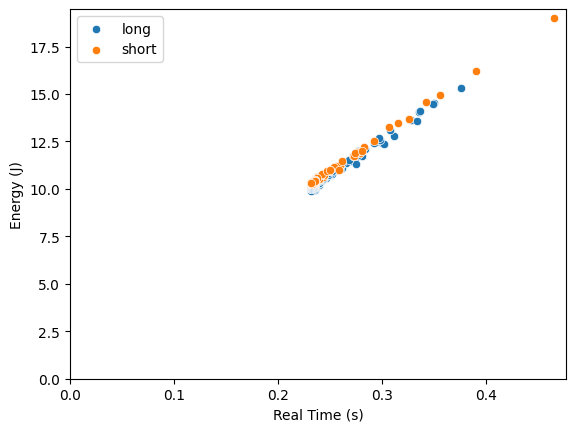

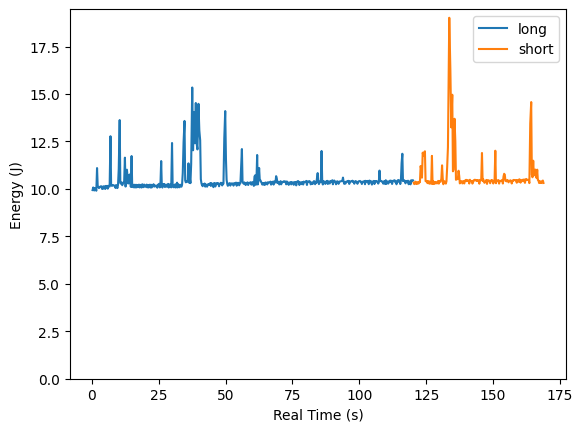

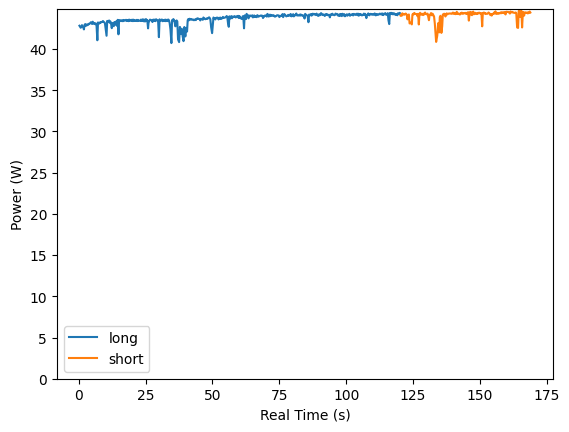

In [36]:
real, user, energy, energy_user, w, t = getxy([(234731575, 232009558, 10053807, 16), (236200366, 235998553, 10084874, 16), (234027802, 235861136, 9966711, 16), (234196577, 232133693, 10007786, 16), (234139382, 235876326, 10045202, 16), (234122014, 235871589, 10001622, 16), (234809489, 232150467, 10017003, 16), (265829648, 261834105, 11266878, 16), (241234781, 236534932, 10358616, 16), (237169929, 234989491, 10204807, 16), (234543836, 235729173, 10043004, 16), (234556185, 235895218, 10079320, 16), (236405771, 235961077, 10136998, 16), (235805959, 235960072, 10137731, 16), (235850343, 235977820, 10133946, 16), (234182365, 232125866, 10087926, 16), (234917656, 235900851, 10117650, 16), (234226747, 232123095, 10104466, 16), (234459063, 235893406, 10141637, 16), (234215291, 235878284, 10117100, 16), (235424898, 232226919, 10132421, 16), (234440883, 235860881, 10156346, 16), (234800425, 235900186, 10135838, 16), (236099164, 235989106, 10165440, 16), (234391018, 232114861, 10110570, 16), (236221592, 236008570, 10160863, 16), (235878297, 235987129, 10167576, 16), (236175002, 236007893, 10132482, 16), (312089844, 311072747, 12817472, 16), (237996884, 236093195, 10289646, 16), (235832690, 235979109, 10163365, 16), (236351475, 236000344, 10186254, 16), (236105156, 236000597, 10207981, 16), (236329039, 236003903, 10205113, 16), (235082786, 235905113, 10170384, 16), (234666248, 235899425, 10161779, 16), (234470720, 232139936, 10149876, 16), (235186448, 235909914, 10206273, 16), (234126854, 235871010, 10134373, 16), (235534059, 232219162, 10186925, 16), (236704982, 239782706, 10215367, 16), (264184531, 259925162, 11233247, 16), (349754749, 327450632, 14555505, 16), (240803943, 237603447, 10455295, 16), (240485955, 237436655, 10404088, 16), (238870441, 239241364, 10340854, 16), (234502122, 235902349, 10194188, 16), (239838401, 238101107, 10359776, 16), (241531915, 238376140, 10470859, 16), (244878147, 241523357, 10549595, 16), (277076681, 273798771, 11785736, 16), (239303638, 234548445, 10329258, 16), (245381387, 245908270, 10576572, 16), (262824857, 257458314, 11241732, 16), (249123762, 245124245, 10783664, 16), (241656928, 237822835, 10451511, 16), (252210563, 250005741, 10828647, 16), (237429209, 239781910, 10301182, 16), (252463174, 251756127, 10808017, 16), (234359796, 232126062, 10205418, 16), (280717774, 280873760, 11731354, 16), (234950930, 232127246, 10220067, 16), (234493026, 235876683, 10204136, 16), (235051261, 235938298, 10215977, 16), (235137810, 232166745, 10202855, 16), (234981308, 235919283, 10219578, 16), (234901028, 235913655, 10208653, 16), (234254640, 232129724, 10162023, 16), (234624341, 235861939, 10214085, 16), (234357796, 235891857, 10178624, 16), (235014362, 232175206, 10214756, 16), (234786231, 235913661, 10212377, 16), (234731180, 235911309, 10223423, 16), (234498711, 232123263, 10178624, 16), (234536261, 235887978, 10208592, 16), (234597952, 235905798, 10206029, 16), (234299682, 232141469, 10165684, 16), (235099033, 235934268, 10245213, 16), (234462906, 235899408, 10180577, 16), (234649227, 232161237, 10200413, 16), (234893271, 235908690, 10229283, 16), (234239302, 235879402, 10170201, 16), (234639534, 232137556, 10221593, 16), (234090406, 235871775, 10156529, 16), (234771300, 235902964, 10227086, 16), (234218480, 232132446, 10172520, 16), (234777202, 235880291, 10211216, 16), (234351677, 232136476, 10173253, 16), (234302606, 235875400, 10176671, 16), (234767841, 235920823, 10222081, 16), (234136377, 232111623, 10160862, 16), (234697316, 235915347, 10219151, 16), (234244028, 232124752, 10166234, 16), (234264722, 235881136, 10177098, 16), (234085417, 235871160, 10172398, 16), (236396585, 236014777, 10263035, 16), (234725587, 232166559, 10229710, 16), (234527079, 235906514, 10183385, 16), (234298436, 235883709, 10170933, 16), (235116281, 232151078, 10256261, 16), (234390440, 235883225, 10172459, 16), (234415849, 232137991, 10162816, 16), (234588044, 235909217, 10223729, 16), (234344612, 235891576, 10160740, 16), (235383619, 235938303, 10270482, 16), (234289685, 232128069, 10171238, 16), (235058809, 235939887, 10224095, 16), (276418788, 269728624, 11751374, 16), (234459672, 235894588, 10171605, 16), (234420121, 232142599, 10169896, 16), (235054072, 235938608, 10240757, 16), (234582785, 235860713, 10215489, 16), (235725243, 235933505, 10259312, 16), (234667150, 232160294, 10207494, 16), (234932067, 235900132, 10167393, 16), (234737185, 235906577, 10224827, 16), (234522976, 232149665, 10218053, 16), (234294312, 235877798, 10170384, 16), (235594239, 235963210, 10265660, 16), (234756637, 232166642, 10184910, 16), (234571005, 235904922, 10229405, 16), (235031581, 235934203, 10233189, 16), (235003842, 235929138, 10222081, 16), (234360265, 232127221, 10178258, 16), (301165700, 299628209, 12482206, 16), (235156491, 232171608, 10254247, 16), (234374498, 235879444, 10175816, 16), (234403035, 232147918, 10180577, 16), (234321852, 235886917, 10209752, 16), (234885080, 235922461, 10235813, 16), (234643202, 232159829, 10179173, 16), (234700279, 235917146, 10216222, 16), (238003159, 239621284, 10329319, 16), (234455471, 232137236, 10178136, 16), (235059387, 235924314, 10243748, 16), (234468230, 235879079, 10171238, 16), (235238754, 232195067, 10218541, 16), (234602946, 235880657, 10219212, 16), (234484983, 235900164, 10175267, 16), (234451509, 232141732, 10217808, 16), (235186971, 235946426, 10229283, 16), (256982435, 251103790, 11092257, 16), (302780858, 293808076, 12836881, 16), (353680617, 333472676, 14403894, 16), (246000251, 240156203, 10701633, 16), (238951686, 238141315, 10382115, 16), (240296843, 238032441, 10486240, 16), (239921519, 238147788, 10442844, 16), (245050195, 241816393, 10601597, 16), (270052792, 265322598, 11548616, 16), (242579390, 237982934, 10526280, 16), (245321248, 243544455, 10666049, 16), (242982049, 237685715, 10533787, 16), (276739599, 274779715, 11394197, 16), (399992774, 375638121, 16337360, 16), (299678896, 281929686, 12792692, 16), (352666025, 335706022, 14754112, 16), (307620086, 292083055, 13065152, 16), (372207043, 349672797, 15462912, 16), (319769301, 302370780, 13098355, 16), (299988979, 283070585, 12802213, 16), (374338327, 348698659, 15547751, 16), (325892747, 307307757, 13872890, 16), (315700791, 298166286, 13300625, 16), (241739755, 243129623, 10512729, 16), (235956644, 235992808, 10297520, 16), (234407925, 235888982, 10194615, 16), (235420053, 232208018, 10283543, 16), (234863341, 235921921, 10249241, 16), (234846318, 235879114, 10230565, 16), (235723964, 235978480, 10283787, 16), (234561964, 232120903, 10225621, 16), (234845226, 235919007, 10236424, 16), (234338431, 235881399, 10194432, 16), (235196348, 232177037, 10248570, 16), (234999135, 235933281, 10223851, 16), (235354910, 235948056, 10257725, 16), (234681397, 235905538, 10212071, 16), (235043650, 235916724, 10266331, 16), (236037235, 235995136, 10305332, 16), (235352506, 232191384, 10292943, 16), (235901767, 235951276, 10303745, 16), (234947255, 235892584, 10256627, 16), (234959346, 235911448, 10252293, 16), (234696438, 232152115, 10202855, 16), (235904297, 235991013, 10302891, 16), (236243993, 239750846, 10312229, 16), (235130093, 232179444, 10254918, 16), (234853891, 235922889, 10228550, 16), (235032296, 235931782, 10302159, 16), (236108611, 235959668, 10313389, 16), (234917167, 235929336, 10261510, 16), (236011620, 235996667, 10295078, 16), (234665181, 232140575, 10249059, 16), (234940960, 235925084, 10268955, 16), (234900882, 235884493, 10253819, 16), (236081117, 235982708, 10328404, 16), (235599134, 235964395, 10307530, 16), (234947167, 232155365, 10304295, 16), (234887008, 235923914, 10280430, 16), (235633490, 235963282, 10276280, 16), (308395067, 297127853, 13146633, 16), (350057694, 336261038, 14679406, 16), (278441903, 268125978, 11984894, 16), (239929812, 239054939, 10516697, 16), (234893978, 236025068, 10256382, 16), (234159179, 232214401, 10247593, 16), (235533554, 236000984, 10268041, 16), (235091066, 235989914, 10285374, 16), (235276837, 236016250, 10306553, 16), (234031697, 232175354, 10255039, 16), (234819573, 235904393, 10269200, 16), (236138497, 236001463, 10294957, 16), (234890865, 235900368, 10288059, 16), (235121557, 235933118, 10276219, 16), (234558471, 232157440, 10278416, 16), (236117997, 236005194, 10306126, 16), (234585805, 235900592, 10258519, 16), (235215049, 235947455, 10287571, 16), (235340542, 235909133, 10331944, 16), (234610109, 232152512, 10274754, 16), (235150642, 235886382, 10297215, 16), (235513324, 235926089, 10318760, 16), (235282130, 235930048, 10315953, 16), (234774870, 232130493, 10305210, 16), (234148015, 235867275, 10304661, 16), (234851219, 235916205, 10303013, 16), (261738853, 258327394, 11293001, 16), (288573140, 283320761, 12323394, 16), (236201551, 235995134, 10385777, 16), (236167302, 235998163, 10320225, 16), (234447299, 235855748, 10267246, 16), (235068595, 235905229, 10342381, 16), (235054818, 235936167, 10280552, 16), (235568562, 232212703, 10350865, 16), (235027970, 235936820, 10309422, 16), (234846215, 235912645, 10317234, 16), (235117141, 235840292, 10344151, 16), (234652875, 232152511, 10315342, 16), (235000168, 235936202, 10301365, 16), (235007761, 235916770, 10315037, 16), (234876458, 235924477, 10333653, 16), (235971641, 235998029, 10353245, 16), (234916329, 232157166, 10343785, 16), (235473282, 235954325, 10304783, 16), (235440764, 235890066, 10359287, 16), (234517643, 235901679, 10281224, 16), (234629766, 232142648, 10268834, 16), (244154455, 243869056, 10663181, 16), (245465694, 247675134, 10714877, 16), (234919405, 232175027, 10332432, 16), (234908270, 235930585, 10322789, 16), (277239337, 277242803, 11787506, 16), (234490246, 232140252, 10337681, 16), (237569018, 239445716, 10426304, 16), (263699438, 254399254, 11506990, 16), (239606062, 236451507, 10608249, 16), (237382870, 238552742, 10456699, 16), (235332556, 235950196, 10377659, 16), (236019710, 235979052, 10320408, 16), (234502344, 232146448, 10332859, 16), (234202537, 235871209, 10294164, 16), (234381533, 232124976, 10329197, 16), (234235011, 235876295, 10311924, 16), (234273804, 232134169, 10302769, 16), (234438447, 235872428, 10337925, 16), (234848268, 235891823, 10296361, 16), (234949066, 235931484, 10323948, 16), (234685078, 232154284, 10345676, 16), (235826624, 235986851, 10350133, 16), (235415127, 235920143, 10344944, 16), (234875110, 235921715, 10335911, 16), (236247310, 236013692, 10364109, 16), (235365467, 235912597, 10382542, 16), (234088262, 232127912, 10311558, 16), (235275083, 235947966, 10335118, 16), (234860858, 235917868, 10338535, 16), (235981554, 235985322, 10383518, 16), (234696372, 232160525, 10339024, 16), (235804850, 235975714, 10394017, 16), (234739601, 235909084, 10339451, 16), (234727528, 235910577, 10338108, 16), (243839693, 243915141, 10672214, 16), (242588461, 240066778, 10667270, 16), (234548203, 235907966, 10310581, 16), (235572298, 235973272, 10382481, 16), (234993268, 235934682, 10353611, 16), (234904934, 232141272, 10357274, 16), (235054956, 235924873, 10327610, 16), (235096088, 235930669, 10407200, 16), (234503021, 232141794, 10344334, 16), (236093163, 236003448, 10375706, 16), (234347315, 235888741, 10351108, 16), (235631204, 235975571, 10365025, 16), (235515070, 235966938, 10400974, 16), (235919558, 235957795, 10387608, 16), (236123090, 235986181, 10406590, 16), (235373636, 235940164, 10364658, 16), (234794356, 232172977, 10356724, 16), (235696303, 235975554, 10394688, 16), (234224866, 235857679, 10301487, 16), (235249685, 235950066, 10334935, 16), (235010190, 232187751, 10336765, 16), (234803430, 235922086, 10330540, 16), (234424191, 235883397, 10336461, 16), (234919545, 235918763, 10360447, 16), (235453577, 232212189, 10380344, 16), (234825089, 235919208, 10350010, 16), (235677148, 236014199, 10341649, 16), (234717742, 235809308, 10333225, 16), (235242942, 232201053, 10350010, 16), (235064265, 235927548, 10357579, 16), (235105006, 235933087, 10352207, 16), (234306145, 235882838, 10367588, 16), (234775259, 232162140, 10300389, 16), (234963393, 235933377, 10352574, 16), (235084855, 235901702, 10402073, 16), (236103269, 236001373, 10416233, 16), (235279510, 235945875, 10371311, 16), (234318935, 232140694, 10301548, 16), (235095771, 235942580, 10348057, 16), (234925994, 235901445, 10340611, 16), (234616139, 232150280, 10358433, 16), (234888082, 235926802, 10347203, 16), (234767201, 235915760, 10365635, 16), (234275873, 232140020, 10325169, 16), (234646919, 235911531, 10385166, 16), (235392266, 235951719, 10352085, 16), (235377049, 235957394, 10354405, 16), (235578456, 235966839, 10389439, 16), (235581583, 235926834, 10420810, 16), (235601855, 232205125, 10358983, 16), (236141355, 235994221, 10397312, 16), (235106011, 235938449, 10381565, 16), (235080133, 235906404, 10371617, 16), (235000705, 235934921, 10413913, 16), (235270477, 235952802, 10370396, 16), (234836833, 232175580, 10356968, 16), (234396616, 235896087, 10328831, 16), (234464078, 235890375, 10337376, 16), (234523080, 232147301, 10360936, 16), (234406874, 235891543, 10328709, 16), (235432935, 235963090, 10407017, 16), (235972439, 235992649, 10401950, 16), (234944170, 232182334, 10368321, 16), (234993605, 235933715, 10361180, 16), (234641954, 235876385, 10319919, 16), (239823051, 239897235, 10568821, 16), (249311095, 247857968, 10896212, 16), (234332660, 235884741, 10374486, 16), (235164348, 232193186, 10383823, 16), (235016638, 235915095, 10374058, 16), (236106044, 236000201, 10407749, 16), (235308499, 235944709, 10348240, 16), (282051815, 277370489, 12201141, 16), (235931028, 235891887, 10425388, 16), (234793446, 232154876, 10347386, 16), (235630517, 235973277, 10408054, 16), (234749523, 235869323, 10387303, 16), (235466599, 235930922, 10374302, 16), (235058647, 232184873, 10389317, 16), (234526970, 235897131, 10389316, 16), (234522570, 235901115, 10365391, 16), (235509249, 235961994, 10425511, 16), (234646753, 232142465, 10369175, 16), (235169055, 235935345, 10392612, 16), (234515955, 235899743, 10348424, 16), (234546909, 232156195, 10390720, 16), (235796270, 235982882, 10418003, 16), (236467637, 236027233, 10414341, 16), (236196324, 235991938, 10399204, 16), (236450713, 239776029, 10457493, 16), (235560294, 232175581, 10392063, 16), (235274327, 235931875, 10381566, 16), (235425993, 235949738, 10443210, 16), (234580983, 235902498, 10389073, 16), (235094806, 235938210, 10384006, 16), (234531961, 232151574, 10348607, 16), (234686055, 235917811, 10374973, 16), (235776545, 235981410, 10403843, 16), (235015603, 235928982, 10344700, 16), (235673199, 232219051, 10419468, 16), (234735428, 235900278, 10386204, 16), (235136132, 235939215, 10378147, 16), (235157259, 235916355, 10398961, 16), (237821467, 235869250, 10489108, 16), (236217687, 236007653, 10426793, 16), (236263005, 236014587, 10433994, 16), (241679636, 243255384, 10596897, 16), (235016016, 235928848, 10376865, 16), (234532547, 232141939, 10372959, 16), (234487406, 235902550, 10357152, 16), (234403950, 232138590, 10381626, 16), (235084994, 235918679, 10383152, 16), (235307119, 235949092, 10388523, 16), (235213304, 235950291, 10374668, 16), (236080091, 235989255, 10425206, 16), (235252146, 235886149, 10422336, 16), (235124081, 232175638, 10392125, 16), (234804397, 235912726, 10394138, 16), (234901031, 235888826, 10392796, 16), (236352613, 236018951, 10415256, 16), (236284435, 236014532, 10405247, 16), (236389873, 236015895, 10447910, 16), (235645259, 235976427, 10374302, 16), (234685752, 235915515, 10386937, 16), (234465047, 232149528, 10374851, 16), (235978957, 235829899, 10382603, 16), (235165309, 235944934, 10414097, 16), (235096588, 235930730, 10387302, 16), (235275147, 235908197, 10367894, 16), (234824637, 232171356, 10387790, 16), (235581604, 235973506, 10360692, 16), (235773995, 235974675, 10404758, 16), (235975054, 235971594, 10405064, 16), (235604188, 235972113, 10418979, 16), (235683017, 235952588, 10382176, 16), (234878908, 235913377, 10374912, 16), (234748999, 232168960, 10372044, 16), (234508011, 235898778, 10382237, 16), (235534025, 235969093, 10373447, 16), (234800310, 235924741, 10360875, 16), (235881196, 235989897, 10421055, 16), (235257672, 232168504, 10382725, 16), (235688315, 235961141, 10426242, 16), (235569469, 235970347, 10383763, 16), (234837884, 235919295, 10396274, 16), (235569099, 235969110, 10421238, 16), (235025992, 235926781, 10383153, 16), (235393354, 232166434, 10391636, 16), (236088378, 235999136, 10442539, 16), (235240918, 235932104, 10419834, 16), (234429982, 235889027, 10341953, 16), (234702842, 235899445, 10395237, 16), (234917523, 232174045, 10347447, 16), (234635130, 235884497, 10379917, 16), (234936621, 235907069, 10374180, 16), (235591346, 235969125, 10420567, 16), (235041165, 232178446, 10383091, 16), (236296061, 236016659, 10416355, 16), (234998241, 236093071, 10371495, 16), (235879524, 235807473, 10420383, 16), (234764773, 235919773, 10400547, 16), (235027010, 235895075, 10374852, 16), (234736558, 232167628, 10393162, 16), (234753546, 235904395, 10351841, 16), (250612638, 251722969, 10965487, 16), (238011868, 236027595, 10510471, 16), (236387805, 235986287, 10436436, 16), (234478791, 235890742, 10394199, 16), (235666081, 235956476, 10398228, 16), (234896632, 235917624, 10358066, 16), (234430599, 232145143, 10376011, 16), (234926311, 235923032, 10399937, 16), (235007073, 235936556, 10396641, 16), (235514806, 232217019, 10400120, 16), (236432374, 239776236, 10456516, 16), (235180790, 232174529, 10397679, 16), (234416485, 235886552, 10349582, 16), (234627710, 235907454, 10398717, 16), (234784373, 232155724, 10396091, 16), (235581736, 235938728, 10385716, 16), (234703244, 235904286, 10385166, 16), (236394977, 236023526, 10457615, 16), (234629260, 235911017, 10355869, 16), (236033777, 235995132, 10429722, 16), (235177598, 232185864, 10392246, 16), (234766706, 235895204, 10398900, 16), (235628307, 235971590, 10434421, 16), (236367890, 236021379, 10448582, 16), (236557397, 236030115, 10480503, 16), (234431285, 235890893, 10355686, 16), (234629237, 235905173, 10398411, 16), (234602843, 232154360, 10352024, 16), (234998598, 235890064, 10396641, 16), (235958318, 235984640, 10447666, 16), (236196283, 236010110, 10478733, 16), (234661381, 235909676, 10367649, 16), (235822163, 235966715, 10438206, 16), (235299815, 232201251, 10392491, 16), (235545119, 235964431, 10448276, 16), (261069191, 261925245, 11354463, 16), (282510535, 275395815, 12157989, 16), (234562730, 235903034, 10409275, 16), (236432642, 236002026, 10462315, 16), (235542942, 235926006, 10457981, 16), (235128528, 235911089, 10404392, 16), (234543070, 232154141, 10399571, 16), (235576326, 236094055, 10414158, 16), (234922261, 235796335, 10415683, 16), (234544881, 235908319, 10397374, 16), (236288465, 235910933, 10448337, 16), (234401993, 232137149, 10345188, 16), (234377732, 235884347, 10368198, 16), (234915676, 235918007, 10395665, 16), (234803265, 232171352, 10355869, 16), (235737218, 235981405, 10455784, 16), (235759679, 235964162, 10448887, 16), (235338801, 235954487, 10414219, 16), (235443565, 235910821, 10444980, 16)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(234420169, 234841089, 10329686, 16), (234790972, 232139761, 10370701, 16), (234264095, 235861839, 10318760, 16), (234117447, 235881057, 10380344, 16), (234405030, 232139821, 10364354, 16), (233972336, 235868145, 10336094, 16), (233976305, 232118909, 10354649, 16), (234403306, 235897961, 10359043, 16), (234867330, 232174030, 10406712, 16), (234486871, 235879972, 10382358, 16), (234479569, 235894472, 10353428, 16), (259168256, 256956606, 11301668, 16), (257483387, 249843135, 11351045, 16), (246319860, 239670177, 10887424, 16), (276221644, 279132727, 11908111, 16), (273890924, 271882094, 11827912, 16), (276284604, 275881587, 11939056, 16), (278703829, 279570958, 11982208, 16), (236669932, 235684830, 10457005, 16), (234744650, 235894791, 10394627, 16), (235690377, 235972373, 10418430, 16), (234430959, 232148348, 10405430, 16), (234771635, 235899253, 10393894, 16), (235261565, 235919330, 10412327, 16), (235065287, 232186806, 10400547, 16), (234525365, 235899936, 10378392, 16), (233956556, 235855881, 10293186, 16), (234807565, 232127929, 10396946, 16), (273113544, 273408021, 11740143, 16), (234012381, 232115884, 10344884, 16), (234486585, 235890125, 10411899, 16), (234107341, 232128656, 10349095, 16), (234018657, 235867136, 10340855, 16), (234535379, 232135512, 10388828, 16), (234666706, 235896246, 10362278, 16), (234168239, 235863601, 10333165, 16), (235681450, 232188408, 10442600, 16), (234042866, 235873457, 10349033, 16), (234542003, 235906080, 10421788, 16), (234836440, 232173154, 10396335, 16), (235477567, 235946979, 10421238, 16), (235367746, 235956206, 10404393, 16), (234296150, 235886377, 10380100, 16), (243316999, 240133886, 10683078, 16), (258388483, 259653539, 11241121, 16), (239536593, 239831275, 10572117, 16), (234374553, 232147209, 10344578, 16), (234729832, 235917909, 10410740, 16), (234442001, 235896142, 10396641, 16), (234893786, 235893403, 10356174, 16), (234474622, 232143837, 10381688, 16), (235987205, 235806674, 10410251, 16), (260725801, 253681346, 11463594, 16), (289748624, 282947617, 12488310, 16), (497448474, 465277315, 20331125, 16), (417201291, 390006433, 17368608, 16), (324393839, 306988280, 13992335, 16), (377650780, 356002640, 15871419, 16), (252306936, 249070175, 11068514, 16), (254627247, 250262338, 11213228, 16), (335403516, 326382419, 14074671, 16), (302866017, 292220380, 12956876, 16), (240607713, 237160869, 10634189, 16), (238763471, 237566012, 10559483, 16), (239037966, 237412657, 10586887, 16), (238987069, 238074823, 10577121, 16), (253906286, 249304944, 11159579, 16), (241915327, 241645438, 10700534, 16), (234896184, 232102497, 10413425, 16), (235478951, 235938660, 10407628, 16), (234871249, 235889784, 10399631, 16), (234982566, 235930925, 10408238, 16), (234726403, 232147449, 10402805, 16), (234206345, 235871063, 10376255, 16), (234907203, 235919414, 10412083, 16), (235263004, 232196195, 10420872, 16), (235219594, 235949111, 10415500, 16), (235897956, 235988019, 10462132, 16), (235833310, 236112500, 10477939, 16), (235090972, 235785479, 10408238, 16), (235591291, 235967188, 10457798, 16), (235147473, 235927025, 10420566, 16), (236430929, 235978070, 10458897, 16), (235066574, 232146443, 10411228, 16), (235422160, 235961253, 10481724, 16), (235339830, 235918371, 10415684, 16), (234772239, 235909897, 10409824, 16), (235415208, 235959585, 10416355, 16), (234995066, 232181346, 10404270, 16), (234192177, 235873202, 10349217, 16), (235722337, 235963968, 10454746, 16), (235847815, 235979919, 10453648, 16), (236647704, 236036566, 10512607, 16), (236532613, 236032129, 10475498, 16), (235793280, 235975357, 10463108, 16), (235049175, 235901301, 10416539, 16), (236228714, 235994021, 10474521, 16), (235699040, 235976374, 10462925, 16), (234622989, 235885100, 10412632, 16), (234351059, 232143798, 10371067, 16), (235947166, 235971640, 10474217, 16), (236426362, 236022625, 10474643, 16), (235417757, 235962433, 10470676, 16), (278917115, 273686522, 12120148, 16), (235568887, 235958147, 10415317, 16), (236357866, 236018174, 10521946, 16), (234867587, 235923386, 10380528, 16), (235044404, 232124102, 10451877, 16), (234879056, 235857628, 10360752, 16), (234899032, 235926529, 10416478, 16), (235110399, 235933968, 10474033, 16), (234776226, 232168708, 10381382, 16), (235762871, 235968643, 10451023, 16), (234787688, 235919146, 10426182, 16), (236348872, 236003445, 10462742, 16), (235160723, 235927999, 10406467, 16), (234696276, 232162799, 10410679, 16), (235176751, 235942501, 10410801, 16), (235737110, 235982628, 10467930, 16), (234828075, 235905935, 10418369, 16), (235151227, 235946087, 10444004, 16), (235263066, 232151544, 10423252, 16), (235007014, 235808314, 10416600, 16), (234741361, 235912088, 10412509, 16), (282484367, 280900935, 12078949, 16), (235363785, 232188733, 10441563, 16), (235027050, 235935040, 10437900, 16), (234977802, 235934842, 10440342, 16), (235518967, 235956864, 10432224, 16), (235841069, 235974313, 10464634, 16), (235043336, 232175144, 10405735, 16), (235367447, 235940860, 10420201, 16), (235135194, 235932079, 10412144, 16), (235397239, 235930115, 10428318, 16), (234743655, 235907843, 10431858, 16), (235971342, 235995924, 10473789, 16), (235205048, 232198586, 10417454, 16), (241343573, 243235774, 10647433, 16), (245232340, 243971354, 10852390, 16), (243926609, 243808783, 10748446, 16), (237661119, 235862218, 10504490, 16), (235089743, 235917176, 10413242, 16), (234957625, 235908787, 10397679, 16), (235609756, 235901204, 10471103, 16), (235437337, 235962331, 10438267, 16), (234172415, 232118849, 10438450, 16), (235407816, 235896763, 10424229, 16), (234951065, 235910376, 10417820, 16), (236369886, 236011307, 10469394, 16), (234522077, 235855601, 10409214, 16), (235444358, 232214221, 10427891, 16), (235191203, 235936412, 10431614, 16), (235069374, 235930446, 10423679, 16), (235645081, 235976533, 10472386, 16), (236301390, 236016288, 10478061, 16), (235387697, 235948434, 10467564, 16), (235453392, 235957053, 10452915, 16), (235592319, 235967567, 10464512, 16), (234893732, 232168598, 10446445, 16), (236036281, 235958583, 10468784, 16), (234840344, 235922156, 10442601, 16), (234756012, 235921299, 10376377, 16), (235960387, 235985695, 10505527, 16), (235437644, 235938603, 10482883, 16), (235312888, 232192045, 10469639, 16), (234856922, 235915619, 10456028, 16), (235101685, 235929993, 10454197, 16), (236519628, 236020276, 10503452, 16), (234831702, 235906444, 10405613, 16), (235431719, 235961704, 10491062, 16), (235775127, 235984757, 10490025, 16), (235233574, 232171668, 10453891, 16), (235806718, 235982798, 10496433, 16), (236800417, 239779337, 10524326, 16), (236222507, 236005108, 10491245, 16), (236365114, 236012871, 10490391, 16), (236879932, 236052673, 10517246, 16), (235269273, 235937017, 10455906, 16), (234854840, 232175270, 10424412, 16), (327444963, 315476889, 13956446, 16), (359244731, 342382393, 15292624, 16), (242663631, 240903385, 10831394, 16), (239258849, 237845886, 10677340, 16), (269026194, 261721095, 11806611, 16), (243646985, 241324715, 10813082, 16), (243196609, 241899798, 10858981, 16), (264660593, 258553945, 11280123, 16), (253398521, 247517954, 11196505, 16), (238146248, 237707090, 10597141, 16), (252027130, 250007921, 11102511, 16), (236661533, 235796460, 10509616, 16), (234910121, 235930389, 10443577, 16), (234985980, 232181065, 10434788, 16), (234243704, 235869767, 10399570, 16), (233891166, 232109139, 10395603, 16), (234419396, 235859225, 10390416, 16), (234099964, 232117676, 10402561, 16), (234078488, 235855665, 10395847, 16), (234332828, 235881631, 10440159, 16), (234053299, 232114419, 10399022, 16)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short, offset=sum(real)), y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short, offset=sum(real)), y=w_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()